## Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import shuffle
import cv2
import os
import tensorflow as tf

In [2]:
df = pd.read_csv('Training_labels.csv')
df

asset_id  T1_smooth  T1_features_disk  T1_star_artifact  \
0              3      0.216             0.736             0.000   
1              4      0.216             0.736             0.000   
2              5      0.773             0.029             0.114   
3              6      0.152             0.639             0.009   
4              7      0.152             0.639             0.009   
...          ...        ...               ...               ...   
267062    295294      0.000             1.000             0.000   
267063    295295      0.800             0.146             0.073   
267064    295296      0.800             0.146             0.073   
267065    295304      0.089             0.892             0.010   
267066    295305      0.089             0.892             0.010   

        T2_edgeon_yes  T2_edgeon_no    T3_bar  T3_no_bar  T4_spiral  \
0            0.000000      1.000000  0.376434   0.541040   0.751993   
1            0.000000      1.000000  0.376434   0.541040   0.751993   
2            0.000000      1.000000  0.000000   1.000000   0.000000   
3            0.000000      1.000000  0.000000   1.000000   0.692553   
4            0.000000      1.000000  0.000000   1.000000   0.692553   
...               ...           ...       ...        ...        ...   
267062       0.000000      1.000000  0.912724   0.049065   1.000000   
267063       0.126668      0.836558  0.000000   1.000000   0.993507   
267064       0.126668      0.836558  0.000000   1.000000   0.993507   
267065       0.343208      0.668841  0.228637   0.750691   0.982358   
267066       0.343208      0.668841  0.228637   0.750691   0.982358   

        T4_no_spiral  ...  T9_bulge_no  T10_arms_tight  T10_arms_medium  \
0       3.489199e-02  ...      0.00000        0.000000         0.000000   
1       3.489199e-02  ...      0.00000        0.000000         0.000000   
2       1.000000e+00  ...      0.00000        0.000000         0.000000   
3       2.628765e-01  ...      0.00000        1.000000         0.000000   
4       2.628765e-01  ...      0.00000        1.000000         0.000000   
...              ...  ...          ...             ...              ...   
267062  0.000000e+00  ...      0.00000        0.395750         0.516223   
267063  2.460000e-27  ...      0.00000        0.000000         1.000000   
267064  2.460000e-27  ...      0.00000        0.000000         1.000000   
267065  6.400000e-06  ...      0.58578        0.313458         0.266263   
267066  6.400000e-06  ...      0.58578        0.313458         0.266263   

        T10_arms_loose  T11_arms_1  T11_arms_2  T11_arms_3  T11_arms_4  \
0             1.000000    0.000000    0.000000     0.00000     0.00000   
1             1.000000    0.000000    0.000000     0.00000     0.00000   
2             0.000000    0.000000    0.000000     0.00000     0.00000   
3             0.000000    1.000000    0.000000     0.00000     0.00000   
4             0.000000    1.000000    0.000000     0.00000     0.00000   
...                ...         ...         ...         ...         ...   
267062        0.080662    0.000000    0.068418     0.05868     0.50517   
267063        0.000000    0.000000    0.000000     0.00000     0.00000   
267064        0.000000    0.000000    0.000000     0.00000     0.00000   
267065        0.361677    0.075168    0.115436     0.00000     0.00000   
267066        0.361677    0.075168    0.115436     0.00000     0.00000   

        T11_arms_4+  T11_arms_no  
0          0.000000     1.000000  
1          0.000000     1.000000  
2          0.000000     0.000000  
3          0.000000     0.000000  
4          0.000000     0.000000  
...             ...          ...  
267062     0.419035     0.029496  
267063     0.000000     1.000000  
267064     0.000000     1.000000  
267065     0.000000     0.692101  
267066     0.000000     0.692101  

[267067 rows x 38 columns]

In [3]:
df.dtypes

asset_id                 int64
T1_smooth              float64
T1_features_disk       float64
T1_star_artifact       float64
T2_edgeon_yes          float64
T2_edgeon_no           float64
T3_bar                 float64
T3_no_bar              float64
T4_spiral              float64
T4_no_spiral           float64
T5_no_bulge            float64
T5_noticeable_bulge    float64
T5_obvious_bulge       float64
T5_dominant_bulge      float64
T6_odd_yes             float64
T6_odd_no              float64
T7_round               float64
T7_inbetween           float64
T7_cigar               float64
T8_odd_ring            float64
T8_odd_lens_arc        float64
T8_odd_disturbed       float64
T8_odd_irregular       float64
T8_odd_other           float64
T8_odd_merger          float64
T8_odd_dustlane        float64
T9_bulge_round         float64
T9_bulge_boxy          float64
T9_bulge_no            float64
T10_arms_tight         float64
T10_arms_medium        float64
T10_arms_loose         float64
T11_arms

In [4]:
df.isnull().any()

asset_id               False
T1_smooth              False
T1_features_disk       False
T1_star_artifact       False
T2_edgeon_yes          False
T2_edgeon_no            True
T3_bar                 False
T3_no_bar               True
T4_spiral              False
T4_no_spiral            True
T5_no_bulge            False
T5_noticeable_bulge    False
T5_obvious_bulge       False
T5_dominant_bulge       True
T6_odd_yes              True
T6_odd_no              False
T7_round                True
T7_inbetween           False
T7_cigar               False
T8_odd_ring            False
T8_odd_lens_arc        False
T8_odd_disturbed       False
T8_odd_irregular       False
T8_odd_other           False
T8_odd_merger          False
T8_odd_dustlane         True
T9_bulge_round          True
T9_bulge_boxy           True
T9_bulge_no            False
T10_arms_tight         False
T10_arms_medium        False
T10_arms_loose         False
T11_arms_1              True
T11_arms_2              True
T11_arms_3    

In [5]:
df = df.dropna()

In [6]:
#Chaning the id to a path to remove rows more easily
df['asset_id_path'] = 'C:/python_lessons/January_Project/images/' + df['asset_id'].astype(str) + '.jpg'
df

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_23168\3318997013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['asset_id_path'] = 'C:/python_lessons/January_Project/images/' + df['asset_id'].astype(str) + '.jpg'


asset_id  T1_smooth  T1_features_disk  T1_star_artifact  \
0              3      0.216             0.736             0.000   
1              4      0.216             0.736             0.000   
2              5      0.773             0.029             0.114   
3              6      0.152             0.639             0.009   
4              7      0.152             0.639             0.009   
...          ...        ...               ...               ...   
267062    295294      0.000             1.000             0.000   
267063    295295      0.800             0.146             0.073   
267064    295296      0.800             0.146             0.073   
267065    295304      0.089             0.892             0.010   
267066    295305      0.089             0.892             0.010   

        T2_edgeon_yes  T2_edgeon_no    T3_bar  T3_no_bar  T4_spiral  \
0            0.000000      1.000000  0.376434   0.541040   0.751993   
1            0.000000      1.000000  0.376434   0.541040   0.751993   
2            0.000000      1.000000  0.000000   1.000000   0.000000   
3            0.000000      1.000000  0.000000   1.000000   0.692553   
4            0.000000      1.000000  0.000000   1.000000   0.692553   
...               ...           ...       ...        ...        ...   
267062       0.000000      1.000000  0.912724   0.049065   1.000000   
267063       0.126668      0.836558  0.000000   1.000000   0.993507   
267064       0.126668      0.836558  0.000000   1.000000   0.993507   
267065       0.343208      0.668841  0.228637   0.750691   0.982358   
267066       0.343208      0.668841  0.228637   0.750691   0.982358   

        T4_no_spiral  ...  T10_arms_tight  T10_arms_medium  T10_arms_loose  \
0       3.489199e-02  ...        0.000000         0.000000        1.000000   
1       3.489199e-02  ...        0.000000         0.000000        1.000000   
2       1.000000e+00  ...        0.000000         0.000000        0.000000   
3       2.628765e-01  ...        1.000000         0.000000        0.000000   
4       2.628765e-01  ...        1.000000         0.000000        0.000000   
...              ...  ...             ...              ...             ...   
267062  0.000000e+00  ...        0.395750         0.516223        0.080662   
267063  2.460000e-27  ...        0.000000         1.000000        0.000000   
267064  2.460000e-27  ...        0.000000         1.000000        0.000000   
267065  6.400000e-06  ...        0.313458         0.266263        0.361677   
267066  6.400000e-06  ...        0.313458         0.266263        0.361677   

        T11_arms_1  T11_arms_2  T11_arms_3  T11_arms_4  T11_arms_4+  \
0         0.000000    0.000000     0.00000     0.00000     0.000000   
1         0.000000    0.000000     0.00000     0.00000     0.000000   
2         0.000000    0.000000     0.00000     0.00000     0.000000   
3         1.000000    0.000000     0.00000     0.00000     0.000000   
4         1.000000    0.000000     0.00000     0.00000     0.000000   
...            ...         ...         ...         ...          ...   
267062    0.000000    0.068418     0.05868     0.50517     0.419035   
267063    0.000000    0.000000     0.00000     0.00000     0.000000   
267064    0.000000    0.000000     0.00000     0.00000     0.000000   
267065    0.075168    0.115436     0.00000     0.00000     0.000000   
267066    0.075168    0.115436     0.00000     0.00000     0.000000   

        T11_arms_no                                      asset_id_path  
0          1.000000     C:/python_lessons/January_Project/images/3.jpg  
1          1.000000     C:/python_lessons/January_Project/images/4.jpg  
2          0.000000     C:/python_lessons/January_Project/images/5.jpg  
3          0.000000     C:/python_lessons/January_Project/images/6.jpg  
4          0.000000     C:/python_lessons/January_Project/images/7.jpg  
...             ...                                                ...  
267062     0.029496  C:/python_lessons/January_Pr

In [8]:
#Removing all the rows which do not have a corresponding image
        
for index, sample in df.iterrows():
    if not os.path.isfile(sample['asset_id_path']):
        df = df.drop(index)
        
        if index % 100 == 0:
            print(index)

2100
5800
6400
7000
7700
8900
10900
11800
13700
15500
15900
18300
20900
21000
22500
24700
27800
28500
29200
31000
31400
33100
33800
34000
35000
35500
35700
36600
37100
38100
38300
38400
39800
39900
41600
43700
44000
44100
44400
45000
45600
47800
47900
48200
53100
54000
54900
57100
58800
60200
60300
61000
63300
65400
66200
66400
66800
68200
68700
69700
70200
71300
71500
72100
75500
76300
78100
79200
82100
82800
83100
83200
84000
85100
86800
86900
88100
88800
89500
92600
94100
96300
98600
100700
103500
103700
106400
107100
114600
118500
122500
123800
124200
125900
126000
127000
130000
130300
130400
130900
131200
132700
133500
140000
143400
143900
149000
152500
152800
153300
154400
154900
156400
156700
160400
160500
161000
162300
165700
166200
168000
170900
173200
175200
177600
177900
178000
178600
180900
182400
183500
184800
187500
188200
189500
190000
190300
190400
191400
191600
192100
192200
192300
192600
197300
197800
197900
198000
201900
203600
205800
208600
211200
211400
211700
2118

In [14]:
#df.to_csv('Traininglabels_cleaned.csv', index=False)

In [4]:
df = pd.read_csv('Traininglabels_cleaned.csv')
df['asset_id_path'] = df['asset_id'].astype(str) + '.jpg'
df.head() 

asset_id  T1_smooth  T1_features_disk  T1_star_artifact  T2_edgeon_yes  \
0         3      0.216             0.736             0.000            0.0   
1         4      0.216             0.736             0.000            0.0   
2         5      0.773             0.029             0.114            0.0   
3         6      0.152             0.639             0.009            0.0   
4         7      0.152             0.639             0.009            0.0   

   T2_edgeon_no    T3_bar  T3_no_bar  T4_spiral  T4_no_spiral  ...  \
0           1.0  0.376434    0.54104   0.751993      0.034892  ...   
1           1.0  0.376434    0.54104   0.751993      0.034892  ...   
2           1.0  0.000000    1.00000   0.000000      1.000000  ...   
3           1.0  0.000000    1.00000   0.692553      0.262876  ...   
4           1.0  0.000000    1.00000   0.692553      0.262876  ...   

   T10_arms_tight  T10_arms_medium  T10_arms_loose  T11_arms_1  T11_arms_2  \
0             0.0              0.0             1.0         0.0         0.0   
1             0.0              0.0             1.0         0.0         0.0   
2             0.0              0.0             0.0         0.0         0.0   
3             1.0              0.0             0.0         1.0         0.0   
4             1.0              0.0             0.0         1.0         0.0   

   T11_arms_3  T11_arms_4  T11_arms_4+  T11_arms_no  asset_id_path  
0         0.0         0.0          0.0          1.0          3.jpg  
1         0.0         0.0          0.0          1.0          4.jpg  
2         0.0         0.0          0.0          0.0          5.jpg  
3         0.0         0.0          0.0          0.0          6.jpg  
4         0.0         0.0          0.0          0.0          7.jpg  

[5 rows x 39 columns]

In [7]:
list_files = df["asset_id_path"].values.tolist()
#Putting the filenames into a list

In [8]:
#There are more files in the directory than there is informantion about them, so deleting all the files which are not in the dataframe

data_path = "C:/python_lessons/January_Project/images/"

for filename in os.listdir(data_path):
    print(filename)
    if filename not in list_files:
        os.remove(os.path.join(data_path,filename))
    

100.jpg
1000.jpg
10000.jpg
100000.jpg
100001.jpg
100002.jpg
100003.jpg
100004.jpg
100005.jpg
100006.jpg
100007.jpg
100008.jpg
10001.jpg
100010.jpg
100011.jpg
100012.jpg
100013.jpg
100014.jpg
100015.jpg
100016.jpg
100017.jpg
100018.jpg
100019.jpg
10002.jpg
100020.jpg
100021.jpg
100022.jpg
100023.jpg
100024.jpg
100025.jpg
100026.jpg
100027.jpg
100028.jpg
100029.jpg
10003.jpg
100030.jpg
100031.jpg
100032.jpg
100033.jpg
100034.jpg
100035.jpg
100036.jpg
100038.jpg
100039.jpg
10004.jpg
100040.jpg
100041.jpg
100042.jpg
100043.jpg
100045.jpg
100046.jpg
100047.jpg
100048.jpg
100049.jpg
10005.jpg
100050.jpg
100051.jpg
100052.jpg
100054.jpg
100055.jpg
100057.jpg
100058.jpg
100059.jpg
10006.jpg
100060.jpg
100061.jpg
100062.jpg
100063.jpg
100064.jpg
100066.jpg
100067.jpg
100068.jpg
100069.jpg
100071.jpg
100072.jpg
100073.jpg
100074.jpg
100075.jpg
100076.jpg
100077.jpg
100078.jpg
100079.jpg
10008.jpg
100080.jpg
100081.jpg
100082.jpg
100083.jpg
100084.jpg
100085.jpg
100086.jpg
100087.jpg
100088.jpg
1

100785.jpg
100786.jpg
100787.jpg
100788.jpg
100789.jpg
10079.jpg
100790.jpg
100791.jpg
100792.jpg
100793.jpg
100794.jpg
100795.jpg
100796.jpg
100797.jpg
100798.jpg
100799.jpg
1008.jpg
10080.jpg
100800.jpg
100801.jpg
100802.jpg
100803.jpg
100804.jpg
100805.jpg
100806.jpg
100807.jpg
100808.jpg
100809.jpg
10081.jpg
100810.jpg
100811.jpg
100812.jpg
100813.jpg
100814.jpg
100815.jpg
100816.jpg
100817.jpg
100818.jpg
100819.jpg
10082.jpg
100820.jpg
100821.jpg
100822.jpg
100823.jpg
100824.jpg
100825.jpg
100826.jpg
100827.jpg
100828.jpg
100829.jpg
10083.jpg
100830.jpg
100831.jpg
100832.jpg
100833.jpg
100834.jpg
100835.jpg
100836.jpg
100837.jpg
100838.jpg
100839.jpg
10084.jpg
100840.jpg
100841.jpg
100842.jpg
100843.jpg
100844.jpg
100845.jpg
100846.jpg
100847.jpg
100848.jpg
100849.jpg
10085.jpg
100850.jpg
100852.jpg
100853.jpg
100854.jpg
100855.jpg
100856.jpg
100857.jpg
100858.jpg
10086.jpg
100861.jpg
100862.jpg
100863.jpg
100864.jpg
100865.jpg
100866.jpg
100867.jpg
100869.jpg
10087.jpg
100870.jpg

101566.jpg
101567.jpg
101568.jpg
101569.jpg
10157.jpg
101570.jpg
101571.jpg
101572.jpg
101573.jpg
101574.jpg
101576.jpg
101577.jpg
101578.jpg
101579.jpg
10158.jpg
101580.jpg
101581.jpg
101582.jpg
101583.jpg
101584.jpg
101585.jpg
101586.jpg
101587.jpg
101588.jpg
101589.jpg
10159.jpg
101590.jpg
101592.jpg
101593.jpg
101594.jpg
101595.jpg
101596.jpg
101597.jpg
101598.jpg
101599.jpg
1016.jpg
10160.jpg
101600.jpg
101601.jpg
101602.jpg
101603.jpg
101604.jpg
101605.jpg
101606.jpg
101607.jpg
101608.jpg
10161.jpg
101610.jpg
101611.jpg
101612.jpg
101613.jpg
101614.jpg
101615.jpg
101616.jpg
101617.jpg
101618.jpg
101619.jpg
10162.jpg
101620.jpg
101621.jpg
101622.jpg
101623.jpg
101624.jpg
101625.jpg
101626.jpg
101627.jpg
101628.jpg
101629.jpg
10163.jpg
101630.jpg
101631.jpg
101632.jpg
101633.jpg
101634.jpg
101635.jpg
101636.jpg
101637.jpg
101638.jpg
101639.jpg
10164.jpg
101640.jpg
101641.jpg
101642.jpg
101643.jpg
101644.jpg
101645.jpg
101647.jpg
101648.jpg
101649.jpg
10165.jpg
101650.jpg
101651.jpg

102346.jpg
102347.jpg
102348.jpg
102349.jpg
10235.jpg
102350.jpg
102351.jpg
102353.jpg
102354.jpg
102355.jpg
102356.jpg
102357.jpg
102358.jpg
102359.jpg
10236.jpg
102360.jpg
102361.jpg
102362.jpg
102363.jpg
102364.jpg
102365.jpg
102366.jpg
102368.jpg
102369.jpg
10237.jpg
102370.jpg
102371.jpg
102372.jpg
102373.jpg
102375.jpg
102376.jpg
102377.jpg
102378.jpg
102379.jpg
10238.jpg
102380.jpg
102381.jpg
102382.jpg
102383.jpg
102384.jpg
102385.jpg
102388.jpg
102389.jpg
10239.jpg
102390.jpg
102391.jpg
102392.jpg
102393.jpg
102394.jpg
102395.jpg
102396.jpg
102398.jpg
102399.jpg
10240.jpg
102400.jpg
102401.jpg
102402.jpg
102403.jpg
102404.jpg
102406.jpg
102408.jpg
102409.jpg
102410.jpg
102411.jpg
102412.jpg
102413.jpg
102414.jpg
102415.jpg
102416.jpg
102417.jpg
102418.jpg
102419.jpg
10242.jpg
102420.jpg
102421.jpg
102422.jpg
102423.jpg
102424.jpg
102425.jpg
102426.jpg
102427.jpg
102428.jpg
102429.jpg
10243.jpg
102430.jpg
102431.jpg
102432.jpg
102433.jpg
102434.jpg
102435.jpg
102436.jpg
102438.

103179.jpg
10318.jpg
103180.jpg
103181.jpg
103182.jpg
103183.jpg
103184.jpg
103185.jpg
103186.jpg
103187.jpg
103188.jpg
103189.jpg
103190.jpg
103191.jpg
103192.jpg
103193.jpg
103194.jpg
103195.jpg
103196.jpg
103197.jpg
103198.jpg
103199.jpg
1032.jpg
103200.jpg
103201.jpg
103202.jpg
103204.jpg
103205.jpg
103208.jpg
103209.jpg
103210.jpg
103211.jpg
103212.jpg
103213.jpg
103214.jpg
103215.jpg
103217.jpg
103218.jpg
103219.jpg
103221.jpg
103223.jpg
103224.jpg
103226.jpg
10323.jpg
103230.jpg
103231.jpg
103232.jpg
103233.jpg
103234.jpg
103235.jpg
103236.jpg
103237.jpg
103238.jpg
103239.jpg
10324.jpg
103240.jpg
103241.jpg
103242.jpg
103244.jpg
103247.jpg
103248.jpg
103249.jpg
10325.jpg
103250.jpg
103252.jpg
103253.jpg
103254.jpg
103255.jpg
103256.jpg
103257.jpg
103259.jpg
10326.jpg
103260.jpg
103261.jpg
103262.jpg
103264.jpg
103265.jpg
103266.jpg
103268.jpg
103269.jpg
103270.jpg
103272.jpg
103274.jpg
103276.jpg
103278.jpg
103279.jpg
10328.jpg
103280.jpg
103281.jpg
103283.jpg
103284.jpg
103285.

105357.jpg
105358.jpg
105359.jpg
10536.jpg
105360.jpg
105361.jpg
105362.jpg
105363.jpg
105364.jpg
105365.jpg
105366.jpg
105367.jpg
105368.jpg
105369.jpg
10537.jpg
105370.jpg
105371.jpg
105372.jpg
105373.jpg
105374.jpg
105375.jpg
105376.jpg
105377.jpg
105379.jpg
10538.jpg
105380.jpg
105381.jpg
105382.jpg
105383.jpg
105384.jpg
105385.jpg
105386.jpg
105387.jpg
105388.jpg
105389.jpg
10539.jpg
105390.jpg
105391.jpg
105392.jpg
105393.jpg
105394.jpg
105395.jpg
105396.jpg
105397.jpg
105398.jpg
105399.jpg
1054.jpg
10540.jpg
105400.jpg
105401.jpg
105402.jpg
105403.jpg
105404.jpg
105405.jpg
105406.jpg
105407.jpg
105408.jpg
105409.jpg
105410.jpg
105411.jpg
105412.jpg
105413.jpg
105415.jpg
105416.jpg
105417.jpg
105418.jpg
105419.jpg
10542.jpg
105420.jpg
105421.jpg
105422.jpg
105423.jpg
105424.jpg
105426.jpg
105427.jpg
105428.jpg
10543.jpg
105430.jpg
105431.jpg
105432.jpg
105433.jpg
105434.jpg
105435.jpg
105436.jpg
105438.jpg
105439.jpg
10544.jpg
105440.jpg
105441.jpg
105442.jpg
105443.jpg
105444.jp

106169.jpg
10617.jpg
106170.jpg
106171.jpg
106172.jpg
106173.jpg
106174.jpg
106176.jpg
106178.jpg
106179.jpg
10618.jpg
106180.jpg
106181.jpg
106182.jpg
106183.jpg
106184.jpg
106185.jpg
106186.jpg
106187.jpg
106188.jpg
106189.jpg
10619.jpg
106190.jpg
106191.jpg
106192.jpg
106193.jpg
106194.jpg
106195.jpg
106197.jpg
106198.jpg
106199.jpg
1062.jpg
10620.jpg
106200.jpg
106201.jpg
106202.jpg
106203.jpg
106204.jpg
106205.jpg
106206.jpg
106207.jpg
106208.jpg
106209.jpg
10621.jpg
106210.jpg
106211.jpg
106212.jpg
106213.jpg
106214.jpg
106216.jpg
106218.jpg
106219.jpg
106220.jpg
106221.jpg
106222.jpg
106223.jpg
106224.jpg
106225.jpg
106226.jpg
106227.jpg
106228.jpg
106229.jpg
10623.jpg
106230.jpg
106231.jpg
106232.jpg
106233.jpg
106234.jpg
106235.jpg
106236.jpg
106238.jpg
106239.jpg
10624.jpg
106240.jpg
106241.jpg
106242.jpg
106243.jpg
106244.jpg
106245.jpg
106246.jpg
106247.jpg
106248.jpg
106249.jpg
10625.jpg
106250.jpg
106251.jpg
106253.jpg
106254.jpg
106256.jpg
106257.jpg
106258.jpg
106259.jp

106981.jpg
106982.jpg
106983.jpg
106984.jpg
106985.jpg
106986.jpg
106987.jpg
106988.jpg
106989.jpg
10699.jpg
106990.jpg
106992.jpg
106994.jpg
106995.jpg
106996.jpg
106997.jpg
106998.jpg
107.jpg
1070.jpg
107000.jpg
107002.jpg
107003.jpg
107004.jpg
107005.jpg
107006.jpg
107007.jpg
107008.jpg
10701.jpg
107010.jpg
107011.jpg
107012.jpg
107013.jpg
107014.jpg
107015.jpg
107017.jpg
107018.jpg
107019.jpg
10702.jpg
107020.jpg
107021.jpg
107022.jpg
107023.jpg
107024.jpg
107025.jpg
107026.jpg
107027.jpg
107028.jpg
10703.jpg
107030.jpg
107031.jpg
107032.jpg
107034.jpg
107035.jpg
107036.jpg
107037.jpg
107038.jpg
107039.jpg
10704.jpg
107040.jpg
107041.jpg
107042.jpg
107043.jpg
107044.jpg
107045.jpg
107046.jpg
107047.jpg
107048.jpg
107049.jpg
10705.jpg
107050.jpg
107051.jpg
107052.jpg
107054.jpg
107055.jpg
107056.jpg
107057.jpg
107058.jpg
107059.jpg
107060.jpg
107062.jpg
107064.jpg
107065.jpg
107066.jpg
107067.jpg
107068.jpg
107069.jpg
10707.jpg
107071.jpg
107072.jpg
107073.jpg
107074.jpg
107075.jpg


107854.jpg
107856.jpg
107857.jpg
107858.jpg
107859.jpg
10786.jpg
107861.jpg
107863.jpg
107864.jpg
107865.jpg
107866.jpg
107867.jpg
107868.jpg
107869.jpg
10787.jpg
107870.jpg
107873.jpg
107874.jpg
107876.jpg
107877.jpg
107878.jpg
107879.jpg
10788.jpg
107880.jpg
107881.jpg
107882.jpg
107883.jpg
107884.jpg
107885.jpg
107886.jpg
107889.jpg
10789.jpg
107892.jpg
107893.jpg
107894.jpg
107895.jpg
107896.jpg
107897.jpg
107898.jpg
107899.jpg
1079.jpg
10790.jpg
107900.jpg
107901.jpg
107903.jpg
107904.jpg
107906.jpg
107907.jpg
107908.jpg
10791.jpg
107910.jpg
107911.jpg
107912.jpg
107913.jpg
107914.jpg
107916.jpg
107917.jpg
107918.jpg
107919.jpg
10792.jpg
107921.jpg
107922.jpg
107923.jpg
107924.jpg
107926.jpg
107927.jpg
107928.jpg
107929.jpg
10793.jpg
107930.jpg
107931.jpg
107932.jpg
107934.jpg
107935.jpg
107936.jpg
107937.jpg
107938.jpg
107939.jpg
107940.jpg
107941.jpg
107942.jpg
107943.jpg
107944.jpg
107945.jpg
107946.jpg
107947.jpg
107948.jpg
107949.jpg
107950.jpg
107951.jpg
107952.jpg
107953.jp

108697.jpg
108698.jpg
108699.jpg
1087.jpg
10870.jpg
108701.jpg
108702.jpg
108703.jpg
108705.jpg
108706.jpg
108707.jpg
108708.jpg
108709.jpg
10871.jpg
108710.jpg
108711.jpg
108713.jpg
108714.jpg
108715.jpg
108716.jpg
108717.jpg
108718.jpg
108719.jpg
10872.jpg
108720.jpg
108722.jpg
108723.jpg
108724.jpg
108725.jpg
108726.jpg
108727.jpg
108728.jpg
108729.jpg
10873.jpg
108730.jpg
108731.jpg
108732.jpg
108733.jpg
108734.jpg
108735.jpg
108736.jpg
108737.jpg
108738.jpg
108739.jpg
10874.jpg
108740.jpg
108741.jpg
108742.jpg
108743.jpg
108744.jpg
108745.jpg
108746.jpg
108747.jpg
108748.jpg
108749.jpg
10875.jpg
108750.jpg
108751.jpg
108752.jpg
108753.jpg
108754.jpg
108755.jpg
108756.jpg
108757.jpg
108758.jpg
108759.jpg
108761.jpg
108762.jpg
108763.jpg
108765.jpg
108767.jpg
108769.jpg
10877.jpg
108770.jpg
108771.jpg
108772.jpg
108773.jpg
108774.jpg
108776.jpg
108778.jpg
108779.jpg
10878.jpg
108780.jpg
108781.jpg
108782.jpg
108783.jpg
108784.jpg
108785.jpg
108787.jpg
108788.jpg
108789.jpg
10879.jpg

109552.jpg
109553.jpg
109554.jpg
109555.jpg
109556.jpg
109557.jpg
109558.jpg
109559.jpg
10956.jpg
109560.jpg
109561.jpg
109562.jpg
109564.jpg
109565.jpg
109566.jpg
109568.jpg
109569.jpg
10957.jpg
109570.jpg
109572.jpg
109573.jpg
109574.jpg
109576.jpg
109577.jpg
109578.jpg
109579.jpg
10958.jpg
109580.jpg
109581.jpg
109583.jpg
109585.jpg
109586.jpg
109587.jpg
109589.jpg
109590.jpg
109591.jpg
109592.jpg
109594.jpg
109595.jpg
109596.jpg
109599.jpg
1096.jpg
10960.jpg
109600.jpg
109601.jpg
109602.jpg
109603.jpg
109604.jpg
109605.jpg
109607.jpg
109609.jpg
109610.jpg
109611.jpg
109612.jpg
109613.jpg
109615.jpg
109616.jpg
109617.jpg
109618.jpg
109619.jpg
10962.jpg
109620.jpg
109621.jpg
109622.jpg
109623.jpg
109624.jpg
109625.jpg
109626.jpg
109627.jpg
109629.jpg
10963.jpg
109630.jpg
109631.jpg
109632.jpg
109633.jpg
109634.jpg
109635.jpg
109636.jpg
109637.jpg
109638.jpg
109639.jpg
10964.jpg
109640.jpg
109641.jpg
109642.jpg
109644.jpg
109646.jpg
109647.jpg
109648.jpg
109649.jpg
10965.jpg
109650.jp

11036.jpg
110360.jpg
110362.jpg
110363.jpg
110364.jpg
110365.jpg
110366.jpg
110367.jpg
110368.jpg
110369.jpg
11037.jpg
110370.jpg
110371.jpg
110372.jpg
110373.jpg
110375.jpg
110376.jpg
110377.jpg
110379.jpg
11038.jpg
110380.jpg
110382.jpg
110383.jpg
110384.jpg
110385.jpg
110386.jpg
110387.jpg
110388.jpg
110389.jpg
110390.jpg
110391.jpg
110392.jpg
110393.jpg
110394.jpg
110395.jpg
110396.jpg
110397.jpg
110398.jpg
110399.jpg
1104.jpg
11040.jpg
110400.jpg
110401.jpg
110402.jpg
110403.jpg
110404.jpg
110405.jpg
110406.jpg
110407.jpg
110408.jpg
110409.jpg
110410.jpg
110411.jpg
110412.jpg
110414.jpg
110415.jpg
110416.jpg
110417.jpg
110418.jpg
110419.jpg
11042.jpg
110420.jpg
110421.jpg
110423.jpg
110424.jpg
110425.jpg
110426.jpg
110427.jpg
110428.jpg
110429.jpg
11043.jpg
110430.jpg
110431.jpg
110433.jpg
110434.jpg
110436.jpg
110438.jpg
110439.jpg
11044.jpg
110440.jpg
110441.jpg
110442.jpg
110443.jpg
110444.jpg
110445.jpg
110446.jpg
110447.jpg
110448.jpg
110449.jpg
11045.jpg
110450.jpg
110451.jp

111166.jpg
111167.jpg
111168.jpg
111169.jpg
11117.jpg
111170.jpg
111172.jpg
111173.jpg
111175.jpg
111176.jpg
111177.jpg
111178.jpg
111179.jpg
11118.jpg
111180.jpg
111181.jpg
111182.jpg
111183.jpg
111184.jpg
111185.jpg
111186.jpg
111187.jpg
111188.jpg
111189.jpg
11119.jpg
111190.jpg
111191.jpg
111192.jpg
111193.jpg
111194.jpg
111195.jpg
111197.jpg
111198.jpg
111199.jpg
1112.jpg
11120.jpg
111201.jpg
111202.jpg
111203.jpg
111204.jpg
111205.jpg
111206.jpg
111208.jpg
111209.jpg
11121.jpg
111210.jpg
111212.jpg
111213.jpg
111214.jpg
111215.jpg
111217.jpg
111218.jpg
111219.jpg
11122.jpg
111220.jpg
111222.jpg
111223.jpg
111224.jpg
111225.jpg
111226.jpg
111227.jpg
111229.jpg
11123.jpg
111230.jpg
111232.jpg
111233.jpg
111234.jpg
111235.jpg
111236.jpg
111237.jpg
111238.jpg
111239.jpg
11124.jpg
111240.jpg
111241.jpg
111242.jpg
111243.jpg
111245.jpg
111246.jpg
111247.jpg
111248.jpg
111249.jpg
11125.jpg
111250.jpg
111251.jpg
111252.jpg
111253.jpg
111254.jpg
111255.jpg
111256.jpg
111257.jpg
111258.jpg

112001.jpg
112002.jpg
112003.jpg
112004.jpg
112005.jpg
112006.jpg
112007.jpg
112008.jpg
11201.jpg
112010.jpg
112011.jpg
112012.jpg
112013.jpg
112014.jpg
112015.jpg
112016.jpg
112017.jpg
112018.jpg
112019.jpg
112020.jpg
112021.jpg
112022.jpg
112023.jpg
112024.jpg
112025.jpg
112026.jpg
112027.jpg
112028.jpg
112029.jpg
11203.jpg
112030.jpg
112031.jpg
112032.jpg
112034.jpg
112035.jpg
112036.jpg
112037.jpg
112038.jpg
112039.jpg
11204.jpg
112040.jpg
112042.jpg
112043.jpg
112045.jpg
112046.jpg
112047.jpg
112048.jpg
112049.jpg
11205.jpg
112050.jpg
112051.jpg
112052.jpg
112053.jpg
112054.jpg
112055.jpg
112056.jpg
112058.jpg
11206.jpg
112060.jpg
112061.jpg
112062.jpg
112063.jpg
112064.jpg
112065.jpg
112066.jpg
112067.jpg
112068.jpg
112069.jpg
112070.jpg
112071.jpg
112072.jpg
112073.jpg
112074.jpg
112075.jpg
112076.jpg
112077.jpg
112078.jpg
11208.jpg
112080.jpg
112082.jpg
112083.jpg
112084.jpg
112085.jpg
112086.jpg
112087.jpg
112088.jpg
112089.jpg
11209.jpg
112090.jpg
112091.jpg
112092.jpg
112093

112823.jpg
112824.jpg
112825.jpg
112826.jpg
112827.jpg
112828.jpg
112829.jpg
11283.jpg
112830.jpg
112831.jpg
112832.jpg
112833.jpg
112834.jpg
112835.jpg
112836.jpg
112837.jpg
112838.jpg
112839.jpg
11284.jpg
112840.jpg
112841.jpg
112842.jpg
112843.jpg
112844.jpg
112845.jpg
112846.jpg
112847.jpg
112848.jpg
112849.jpg
11285.jpg
112850.jpg
112851.jpg
112852.jpg
112853.jpg
112854.jpg
112855.jpg
112856.jpg
112857.jpg
112858.jpg
112859.jpg
11286.jpg
112860.jpg
112862.jpg
112863.jpg
112864.jpg
112865.jpg
112866.jpg
112867.jpg
112868.jpg
112869.jpg
11287.jpg
112870.jpg
112871.jpg
112872.jpg
112873.jpg
112874.jpg
112875.jpg
112876.jpg
112877.jpg
112878.jpg
112879.jpg
11288.jpg
112880.jpg
112881.jpg
112882.jpg
112883.jpg
112884.jpg
112885.jpg
112886.jpg
112887.jpg
112888.jpg
112889.jpg
11289.jpg
112890.jpg
112891.jpg
112892.jpg
112893.jpg
112894.jpg
112895.jpg
112896.jpg
112897.jpg
112898.jpg
112899.jpg
1129.jpg
11290.jpg
112900.jpg
112901.jpg
112902.jpg
112903.jpg
112904.jpg
112905.jpg
112906.jp

113576.jpg
113577.jpg
11358.jpg
113580.jpg
113582.jpg
113583.jpg
113584.jpg
113586.jpg
113587.jpg
113589.jpg
11359.jpg
113590.jpg
113591.jpg
113592.jpg
113593.jpg
113594.jpg
113595.jpg
113596.jpg
113597.jpg
113598.jpg
1136.jpg
11360.jpg
113601.jpg
113602.jpg
113603.jpg
113604.jpg
113605.jpg
113606.jpg
113607.jpg
113608.jpg
113609.jpg
11361.jpg
113610.jpg
113611.jpg
113612.jpg
113613.jpg
113614.jpg
113615.jpg
113616.jpg
113617.jpg
113618.jpg
113619.jpg
11362.jpg
113620.jpg
113621.jpg
113622.jpg
113623.jpg
113624.jpg
113625.jpg
113626.jpg
113627.jpg
113628.jpg
113629.jpg
11363.jpg
113630.jpg
113631.jpg
113632.jpg
113633.jpg
113634.jpg
113635.jpg
113636.jpg
113637.jpg
113638.jpg
113639.jpg
113640.jpg
113641.jpg
113642.jpg
113643.jpg
113644.jpg
113645.jpg
113646.jpg
113647.jpg
113648.jpg
113649.jpg
11365.jpg
113651.jpg
113652.jpg
113653.jpg
113654.jpg
113655.jpg
113656.jpg
113657.jpg
113658.jpg
113659.jpg
11366.jpg
113660.jpg
113661.jpg
113662.jpg
113663.jpg
113664.jpg
113665.jpg
113666.jp

114395.jpg
114396.jpg
114397.jpg
114398.jpg
114399.jpg
1144.jpg
11440.jpg
114400.jpg
114401.jpg
114402.jpg
114403.jpg
114404.jpg
114405.jpg
114406.jpg
114407.jpg
114408.jpg
114409.jpg
11441.jpg
114410.jpg
114411.jpg
114412.jpg
114413.jpg
114414.jpg
114415.jpg
114416.jpg
114417.jpg
114418.jpg
114419.jpg
11442.jpg
114420.jpg
114421.jpg
114422.jpg
114423.jpg
114424.jpg
114425.jpg
114426.jpg
114427.jpg
114428.jpg
114429.jpg
11443.jpg
114430.jpg
114431.jpg
114432.jpg
114433.jpg
114435.jpg
114436.jpg
114437.jpg
114439.jpg
11444.jpg
114440.jpg
114441.jpg
114442.jpg
114445.jpg
114446.jpg
114447.jpg
114448.jpg
114449.jpg
11445.jpg
114450.jpg
114451.jpg
114452.jpg
114453.jpg
114454.jpg
114455.jpg
114456.jpg
114457.jpg
114458.jpg
114459.jpg
11446.jpg
114460.jpg
114461.jpg
114462.jpg
114463.jpg
114464.jpg
114466.jpg
114467.jpg
114468.jpg
114469.jpg
114470.jpg
114471.jpg
114472.jpg
114473.jpg
114474.jpg
114476.jpg
114477.jpg
114478.jpg
114479.jpg
11448.jpg
114480.jpg
114481.jpg
114482.jpg
114483.jp

115222.jpg
115223.jpg
115224.jpg
115225.jpg
115226.jpg
115227.jpg
115228.jpg
115229.jpg
11523.jpg
115230.jpg
115231.jpg
115232.jpg
115233.jpg
115234.jpg
115235.jpg
115236.jpg
115237.jpg
115238.jpg
11524.jpg
115240.jpg
115241.jpg
115242.jpg
115243.jpg
115244.jpg
115245.jpg
115246.jpg
115247.jpg
115248.jpg
115249.jpg
11525.jpg
115250.jpg
115251.jpg
115252.jpg
115253.jpg
115254.jpg
115255.jpg
115256.jpg
115257.jpg
115258.jpg
115259.jpg
11526.jpg
115260.jpg
115261.jpg
115262.jpg
115264.jpg
115265.jpg
115266.jpg
115267.jpg
115268.jpg
115269.jpg
11527.jpg
115270.jpg
115271.jpg
115272.jpg
115273.jpg
115274.jpg
115275.jpg
115276.jpg
115277.jpg
115278.jpg
115279.jpg
11528.jpg
115280.jpg
115281.jpg
115282.jpg
115283.jpg
115284.jpg
115285.jpg
115286.jpg
115287.jpg
115288.jpg
115289.jpg
11529.jpg
115290.jpg
115291.jpg
115292.jpg
115293.jpg
115294.jpg
115295.jpg
115296.jpg
115297.jpg
115298.jpg
115299.jpg
11530.jpg
115300.jpg
115301.jpg
115302.jpg
115303.jpg
115304.jpg
115305.jpg
115306.jpg
115307.

11602.jpg
116020.jpg
116021.jpg
116022.jpg
116023.jpg
116024.jpg
116025.jpg
116026.jpg
116027.jpg
116028.jpg
116029.jpg
11603.jpg
116030.jpg
116032.jpg
116033.jpg
116035.jpg
116036.jpg
116037.jpg
116039.jpg
11604.jpg
116040.jpg
116041.jpg
116042.jpg
116043.jpg
116044.jpg
116045.jpg
116047.jpg
116048.jpg
116049.jpg
11605.jpg
116050.jpg
116051.jpg
116053.jpg
116054.jpg
116055.jpg
116056.jpg
116057.jpg
116059.jpg
11606.jpg
116060.jpg
116061.jpg
116062.jpg
116063.jpg
116064.jpg
116065.jpg
116066.jpg
116067.jpg
116068.jpg
116069.jpg
11607.jpg
116070.jpg
116071.jpg
116072.jpg
116073.jpg
116075.jpg
116076.jpg
116077.jpg
116078.jpg
116079.jpg
11608.jpg
116080.jpg
116081.jpg
116082.jpg
116083.jpg
116084.jpg
116085.jpg
116086.jpg
116087.jpg
116088.jpg
116089.jpg
11609.jpg
116090.jpg
116091.jpg
116092.jpg
116093.jpg
116094.jpg
116095.jpg
116096.jpg
116097.jpg
116098.jpg
116099.jpg
11610.jpg
116100.jpg
116101.jpg
116103.jpg
116104.jpg
116105.jpg
116106.jpg
116107.jpg
116108.jpg
116109.jpg
11611.jp

116862.jpg
116864.jpg
116865.jpg
116866.jpg
116867.jpg
116868.jpg
116869.jpg
11687.jpg
116870.jpg
116871.jpg
116872.jpg
116873.jpg
116874.jpg
116875.jpg
116876.jpg
116877.jpg
116878.jpg
116879.jpg
11688.jpg
116880.jpg
116882.jpg
116884.jpg
116885.jpg
116886.jpg
116887.jpg
116888.jpg
116889.jpg
11689.jpg
116890.jpg
116892.jpg
116893.jpg
116894.jpg
116896.jpg
116897.jpg
116898.jpg
116899.jpg
11690.jpg
116900.jpg
116901.jpg
116902.jpg
116903.jpg
116904.jpg
116905.jpg
116906.jpg
116907.jpg
116908.jpg
116909.jpg
11691.jpg
116910.jpg
116911.jpg
116913.jpg
116914.jpg
116915.jpg
116916.jpg
116917.jpg
116918.jpg
116919.jpg
11692.jpg
116920.jpg
116922.jpg
116923.jpg
116925.jpg
116926.jpg
116927.jpg
116928.jpg
11693.jpg
116930.jpg
116931.jpg
116932.jpg
116933.jpg
116934.jpg
116935.jpg
116936.jpg
116937.jpg
116938.jpg
116939.jpg
116940.jpg
116941.jpg
116942.jpg
116943.jpg
116944.jpg
116945.jpg
116946.jpg
116947.jpg
116949.jpg
11695.jpg
116950.jpg
116951.jpg
116952.jpg
116955.jpg
116956.jpg
116957.

117708.jpg
117709.jpg
11771.jpg
117710.jpg
117711.jpg
117712.jpg
117713.jpg
117714.jpg
117715.jpg
117716.jpg
117717.jpg
117718.jpg
117719.jpg
11772.jpg
117720.jpg
117721.jpg
117722.jpg
117723.jpg
117724.jpg
117725.jpg
117726.jpg
117727.jpg
117728.jpg
117729.jpg
117730.jpg
117731.jpg
117732.jpg
117733.jpg
117734.jpg
117735.jpg
117736.jpg
117737.jpg
117738.jpg
117739.jpg
11774.jpg
117740.jpg
117741.jpg
117742.jpg
117743.jpg
117744.jpg
117745.jpg
117746.jpg
117747.jpg
117748.jpg
117749.jpg
11775.jpg
117750.jpg
117751.jpg
117752.jpg
117753.jpg
117754.jpg
117755.jpg
117756.jpg
117757.jpg
117758.jpg
11776.jpg
117760.jpg
117761.jpg
117762.jpg
117763.jpg
117764.jpg
117765.jpg
117766.jpg
117767.jpg
117768.jpg
11777.jpg
117770.jpg
117771.jpg
117772.jpg
117773.jpg
117774.jpg
117775.jpg
117776.jpg
117777.jpg
117778.jpg
117779.jpg
11778.jpg
117780.jpg
117781.jpg
117782.jpg
117783.jpg
117784.jpg
117785.jpg
117786.jpg
117787.jpg
117788.jpg
117789.jpg
11779.jpg
117790.jpg
117791.jpg
117792.jpg
117793.

118510.jpg
118511.jpg
118512.jpg
118513.jpg
118514.jpg
118515.jpg
118516.jpg
118517.jpg
118518.jpg
118519.jpg
11852.jpg
118520.jpg
118521.jpg
118522.jpg
118523.jpg
118524.jpg
118525.jpg
118526.jpg
118527.jpg
118528.jpg
11853.jpg
118530.jpg
118531.jpg
118532.jpg
118533.jpg
118534.jpg
118535.jpg
118536.jpg
118537.jpg
118538.jpg
118539.jpg
11854.jpg
118540.jpg
118541.jpg
118542.jpg
118544.jpg
118545.jpg
118546.jpg
118547.jpg
118548.jpg
118549.jpg
11855.jpg
118550.jpg
118551.jpg
118552.jpg
118553.jpg
118554.jpg
118555.jpg
118556.jpg
118557.jpg
118558.jpg
118559.jpg
11856.jpg
118560.jpg
118561.jpg
118563.jpg
118564.jpg
118565.jpg
118566.jpg
118567.jpg
118568.jpg
118569.jpg
118570.jpg
118571.jpg
118572.jpg
118573.jpg
118574.jpg
118575.jpg
118576.jpg
118577.jpg
118578.jpg
118579.jpg
11858.jpg
118580.jpg
118581.jpg
118582.jpg
118583.jpg
118584.jpg
118585.jpg
118586.jpg
118587.jpg
118588.jpg
118589.jpg
11859.jpg
118590.jpg
118592.jpg
118593.jpg
118594.jpg
118595.jpg
118596.jpg
118597.jpg
118598

119341.jpg
119342.jpg
119343.jpg
119344.jpg
119345.jpg
119346.jpg
119347.jpg
119348.jpg
119349.jpg
11935.jpg
119350.jpg
119351.jpg
119352.jpg
119353.jpg
119355.jpg
119356.jpg
119357.jpg
119358.jpg
119359.jpg
11936.jpg
119360.jpg
119361.jpg
119362.jpg
119363.jpg
119364.jpg
119365.jpg
119367.jpg
119368.jpg
119369.jpg
11937.jpg
119370.jpg
119371.jpg
119372.jpg
119373.jpg
119374.jpg
119375.jpg
119376.jpg
119377.jpg
119378.jpg
119379.jpg
11938.jpg
119380.jpg
119382.jpg
119383.jpg
119385.jpg
119386.jpg
119387.jpg
119388.jpg
119389.jpg
11939.jpg
119391.jpg
119392.jpg
119393.jpg
119394.jpg
119395.jpg
119396.jpg
119397.jpg
119399.jpg
11940.jpg
119400.jpg
119401.jpg
119402.jpg
119403.jpg
119404.jpg
119405.jpg
119406.jpg
119408.jpg
119409.jpg
11941.jpg
119410.jpg
119411.jpg
119412.jpg
119413.jpg
119414.jpg
119415.jpg
119416.jpg
119417.jpg
119418.jpg
119419.jpg
11942.jpg
119420.jpg
119421.jpg
119422.jpg
119423.jpg
119424.jpg
119426.jpg
119427.jpg
119428.jpg
119429.jpg
11943.jpg
119430.jpg
119431.j

120175.jpg
120176.jpg
120177.jpg
120178.jpg
120179.jpg
12018.jpg
120180.jpg
120182.jpg
120183.jpg
120184.jpg
120185.jpg
120186.jpg
120189.jpg
12019.jpg
120190.jpg
120192.jpg
120193.jpg
120194.jpg
120195.jpg
120196.jpg
120197.jpg
120198.jpg
120199.jpg
1202.jpg
12020.jpg
120200.jpg
120201.jpg
120202.jpg
120203.jpg
120204.jpg
120205.jpg
120206.jpg
120207.jpg
120208.jpg
120209.jpg
12021.jpg
120210.jpg
120212.jpg
120213.jpg
120214.jpg
120215.jpg
120216.jpg
120217.jpg
120218.jpg
120219.jpg
12022.jpg
120220.jpg
120221.jpg
120223.jpg
120224.jpg
120225.jpg
120227.jpg
120228.jpg
120230.jpg
120231.jpg
120232.jpg
120233.jpg
120234.jpg
120235.jpg
120236.jpg
120237.jpg
120238.jpg
120239.jpg
120240.jpg
120241.jpg
120242.jpg
120243.jpg
120246.jpg
120247.jpg
120248.jpg
120249.jpg
12025.jpg
120252.jpg
120253.jpg
120254.jpg
120255.jpg
120256.jpg
120257.jpg
120258.jpg
120259.jpg
120260.jpg
120262.jpg
120263.jpg
120264.jpg
120265.jpg
120266.jpg
120267.jpg
120268.jpg
120269.jpg
12027.jpg
120270.jpg
120271.j

121007.jpg
121008.jpg
121009.jpg
12101.jpg
121010.jpg
121011.jpg
121012.jpg
121013.jpg
121014.jpg
121015.jpg
121016.jpg
121017.jpg
121018.jpg
121019.jpg
12102.jpg
121020.jpg
121021.jpg
121022.jpg
121023.jpg
121024.jpg
121025.jpg
121026.jpg
121027.jpg
121028.jpg
121029.jpg
12103.jpg
121030.jpg
121032.jpg
121033.jpg
121035.jpg
121036.jpg
121037.jpg
121038.jpg
121039.jpg
12104.jpg
121040.jpg
121041.jpg
121042.jpg
121043.jpg
121044.jpg
121045.jpg
121046.jpg
121047.jpg
121048.jpg
121049.jpg
12105.jpg
121050.jpg
121051.jpg
121052.jpg
121053.jpg
121054.jpg
121055.jpg
121056.jpg
121057.jpg
121058.jpg
121059.jpg
12106.jpg
121060.jpg
121061.jpg
121062.jpg
121063.jpg
121064.jpg
121065.jpg
121066.jpg
121067.jpg
121069.jpg
12107.jpg
121070.jpg
121071.jpg
121072.jpg
121074.jpg
121075.jpg
121076.jpg
121077.jpg
121078.jpg
121079.jpg
12108.jpg
121080.jpg
121081.jpg
121084.jpg
121085.jpg
121086.jpg
121087.jpg
121088.jpg
12109.jpg
121090.jpg
121091.jpg
121093.jpg
121094.jpg
121096.jpg
121097.jpg
121098.j

12193.jpg
121930.jpg
121931.jpg
121932.jpg
121933.jpg
121934.jpg
121935.jpg
121936.jpg
121937.jpg
121938.jpg
121939.jpg
12194.jpg
121940.jpg
121941.jpg
121942.jpg
121943.jpg
121944.jpg
121946.jpg
121947.jpg
121948.jpg
121949.jpg
12195.jpg
121950.jpg
121951.jpg
121952.jpg
121953.jpg
121954.jpg
121955.jpg
121956.jpg
121957.jpg
121958.jpg
121959.jpg
121960.jpg
121961.jpg
121962.jpg
121963.jpg
121964.jpg
121965.jpg
121966.jpg
121967.jpg
121968.jpg
121969.jpg
12197.jpg
121970.jpg
121971.jpg
121972.jpg
121973.jpg
121974.jpg
121976.jpg
121977.jpg
121978.jpg
121979.jpg
12198.jpg
121980.jpg
121981.jpg
121982.jpg
121983.jpg
121984.jpg
121985.jpg
121987.jpg
121988.jpg
121989.jpg
12199.jpg
121990.jpg
121991.jpg
121992.jpg
121993.jpg
121994.jpg
121995.jpg
121996.jpg
121997.jpg
121999.jpg
1220.jpg
12200.jpg
122000.jpg
122001.jpg
122002.jpg
122003.jpg
122004.jpg
122005.jpg
122006.jpg
122007.jpg
122008.jpg
122009.jpg
12201.jpg
122010.jpg
122011.jpg
122012.jpg
122013.jpg
122014.jpg
122015.jpg
122016.jp

122699.jpg
1227.jpg
122700.jpg
122701.jpg
122703.jpg
122704.jpg
122705.jpg
122706.jpg
122707.jpg
122708.jpg
122709.jpg
12271.jpg
122710.jpg
122711.jpg
122712.jpg
122713.jpg
122714.jpg
122715.jpg
122716.jpg
122717.jpg
122718.jpg
122719.jpg
12272.jpg
122720.jpg
122721.jpg
122722.jpg
122723.jpg
122724.jpg
122725.jpg
122726.jpg
122727.jpg
122728.jpg
122729.jpg
12273.jpg
122730.jpg
122731.jpg
122732.jpg
122733.jpg
122734.jpg
122735.jpg
122736.jpg
122737.jpg
122738.jpg
122739.jpg
12274.jpg
122740.jpg
122741.jpg
122742.jpg
122743.jpg
122744.jpg
122745.jpg
122746.jpg
122747.jpg
122748.jpg
122749.jpg
12275.jpg
122750.jpg
122751.jpg
122752.jpg
122753.jpg
122754.jpg
122755.jpg
122756.jpg
122757.jpg
122758.jpg
122759.jpg
12276.jpg
122760.jpg
122761.jpg
122762.jpg
122763.jpg
122764.jpg
122765.jpg
122766.jpg
122767.jpg
122768.jpg
122769.jpg
12277.jpg
122770.jpg
122771.jpg
122772.jpg
122773.jpg
122774.jpg
122775.jpg
122776.jpg
122777.jpg
122778.jpg
122779.jpg
12278.jpg
122780.jpg
122782.jpg
122783.jp

123442.jpg
123443.jpg
123444.jpg
123445.jpg
123446.jpg
123447.jpg
123448.jpg
123449.jpg
12345.jpg
123450.jpg
123451.jpg
123452.jpg
123453.jpg
123454.jpg
123455.jpg
123456.jpg
123457.jpg
123458.jpg
123459.jpg
12346.jpg
123460.jpg
123461.jpg
123462.jpg
123463.jpg
123464.jpg
123465.jpg
123466.jpg
123467.jpg
123468.jpg
123469.jpg
12347.jpg
123470.jpg
123471.jpg
123472.jpg
123473.jpg
123474.jpg
123475.jpg
123476.jpg
123477.jpg
123478.jpg
123479.jpg
12348.jpg
123480.jpg
123481.jpg
123482.jpg
123483.jpg
123484.jpg
123485.jpg
123486.jpg
123487.jpg
123488.jpg
123489.jpg
12349.jpg
123490.jpg
123491.jpg
123492.jpg
123494.jpg
123495.jpg
123496.jpg
123497.jpg
123498.jpg
123499.jpg
1235.jpg
12350.jpg
123500.jpg
123501.jpg
123503.jpg
123504.jpg
123505.jpg
123506.jpg
123507.jpg
123508.jpg
123509.jpg
12351.jpg
123510.jpg
123511.jpg
123512.jpg
123513.jpg
123514.jpg
123515.jpg
123516.jpg
123517.jpg
123518.jpg
12352.jpg
123520.jpg
123521.jpg
123522.jpg
123523.jpg
123524.jpg
123526.jpg
123528.jpg
123529.jp

124213.jpg
124214.jpg
124215.jpg
124216.jpg
124217.jpg
124218.jpg
124219.jpg
12422.jpg
124221.jpg
124222.jpg
124223.jpg
124224.jpg
124225.jpg
124226.jpg
124227.jpg
124228.jpg
124229.jpg
12423.jpg
124230.jpg
124231.jpg
124233.jpg
124234.jpg
124235.jpg
124236.jpg
124237.jpg
124238.jpg
124239.jpg
12424.jpg
124240.jpg
124241.jpg
124243.jpg
124244.jpg
124246.jpg
124247.jpg
124248.jpg
124249.jpg
12425.jpg
124250.jpg
124251.jpg
124253.jpg
124254.jpg
124256.jpg
124257.jpg
124258.jpg
124259.jpg
12426.jpg
124260.jpg
124261.jpg
124262.jpg
124264.jpg
124265.jpg
124266.jpg
124268.jpg
124269.jpg
12427.jpg
124270.jpg
124271.jpg
124272.jpg
124273.jpg
124274.jpg
124275.jpg
124276.jpg
124277.jpg
124278.jpg
124279.jpg
12428.jpg
124280.jpg
124281.jpg
124282.jpg
124283.jpg
124284.jpg
124286.jpg
124287.jpg
124288.jpg
124289.jpg
12429.jpg
124290.jpg
124291.jpg
124292.jpg
124293.jpg
124294.jpg
124296.jpg
124297.jpg
124298.jpg
124299.jpg
12430.jpg
124300.jpg
124303.jpg
124304.jpg
124305.jpg
124306.jpg
124307.j

125023.jpg
125024.jpg
125025.jpg
125026.jpg
125027.jpg
125028.jpg
125029.jpg
12503.jpg
125030.jpg
125031.jpg
125032.jpg
125033.jpg
125034.jpg
125035.jpg
125036.jpg
125037.jpg
125038.jpg
125039.jpg
12504.jpg
125040.jpg
125041.jpg
125042.jpg
125043.jpg
125045.jpg
125046.jpg
125047.jpg
125049.jpg
125050.jpg
125052.jpg
125053.jpg
125054.jpg
125055.jpg
125056.jpg
125057.jpg
125058.jpg
125059.jpg
12506.jpg
125061.jpg
125062.jpg
125063.jpg
125064.jpg
125065.jpg
125066.jpg
125068.jpg
125069.jpg
125070.jpg
125071.jpg
125072.jpg
125073.jpg
125074.jpg
125075.jpg
125076.jpg
125077.jpg
125078.jpg
125079.jpg
125080.jpg
125081.jpg
125082.jpg
125083.jpg
125084.jpg
125085.jpg
125086.jpg
125087.jpg
125089.jpg
12509.jpg
125090.jpg
125091.jpg
125092.jpg
125093.jpg
125095.jpg
125096.jpg
125097.jpg
125098.jpg
125099.jpg
1251.jpg
12510.jpg
125100.jpg
125101.jpg
125102.jpg
125103.jpg
125104.jpg
125105.jpg
125106.jpg
125107.jpg
125108.jpg
125109.jpg
12511.jpg
125110.jpg
125111.jpg
125112.jpg
125113.jpg
125115.

125814.jpg
125815.jpg
125816.jpg
125817.jpg
125818.jpg
125819.jpg
12582.jpg
125820.jpg
125821.jpg
125822.jpg
125823.jpg
125824.jpg
125825.jpg
125826.jpg
125827.jpg
125828.jpg
125829.jpg
125830.jpg
125831.jpg
125832.jpg
125833.jpg
125834.jpg
125835.jpg
125836.jpg
125837.jpg
125839.jpg
12584.jpg
125840.jpg
125841.jpg
125842.jpg
125843.jpg
125844.jpg
125845.jpg
125846.jpg
125847.jpg
125848.jpg
125849.jpg
12585.jpg
125850.jpg
125851.jpg
125852.jpg
125853.jpg
125854.jpg
125855.jpg
125856.jpg
125857.jpg
125858.jpg
125859.jpg
12586.jpg
125860.jpg
125861.jpg
125863.jpg
125864.jpg
125865.jpg
125866.jpg
125867.jpg
125868.jpg
125869.jpg
12587.jpg
125870.jpg
125871.jpg
125872.jpg
125873.jpg
125874.jpg
125875.jpg
125876.jpg
125877.jpg
125878.jpg
125879.jpg
12588.jpg
125880.jpg
125881.jpg
125882.jpg
125883.jpg
125884.jpg
125885.jpg
125886.jpg
125887.jpg
125888.jpg
125889.jpg
12589.jpg
125890.jpg
125891.jpg
125892.jpg
125893.jpg
125894.jpg
125895.jpg
125896.jpg
125897.jpg
125898.jpg
125899.jpg
1259.j

126566.jpg
126567.jpg
126568.jpg
126569.jpg
12657.jpg
126571.jpg
126572.jpg
126573.jpg
126574.jpg
126575.jpg
126579.jpg
12658.jpg
126580.jpg
126582.jpg
126584.jpg
126585.jpg
126586.jpg
126587.jpg
126588.jpg
126589.jpg
12659.jpg
126590.jpg
126591.jpg
126592.jpg
126593.jpg
126594.jpg
126595.jpg
126596.jpg
126598.jpg
126599.jpg
1266.jpg
12660.jpg
126600.jpg
126601.jpg
126602.jpg
126603.jpg
126604.jpg
126605.jpg
126606.jpg
126607.jpg
126608.jpg
126609.jpg
12661.jpg
126610.jpg
126612.jpg
126613.jpg
126614.jpg
126615.jpg
126616.jpg
126617.jpg
126618.jpg
126619.jpg
12662.jpg
126620.jpg
126621.jpg
126622.jpg
126623.jpg
126624.jpg
126626.jpg
126627.jpg
126628.jpg
126629.jpg
126630.jpg
126631.jpg
126632.jpg
126633.jpg
126634.jpg
126635.jpg
126636.jpg
126637.jpg
126638.jpg
126639.jpg
12664.jpg
126640.jpg
126641.jpg
126642.jpg
126643.jpg
126645.jpg
126646.jpg
126649.jpg
12665.jpg
126651.jpg
126652.jpg
126653.jpg
126654.jpg
126655.jpg
126656.jpg
126657.jpg
126658.jpg
126659.jpg
12666.jpg
126660.jpg

127399.jpg
12740.jpg
127400.jpg
127401.jpg
127402.jpg
127403.jpg
127404.jpg
127405.jpg
127406.jpg
127409.jpg
12741.jpg
127410.jpg
127411.jpg
127412.jpg
127413.jpg
127414.jpg
127415.jpg
127416.jpg
127417.jpg
127418.jpg
127419.jpg
127420.jpg
127421.jpg
127422.jpg
127423.jpg
127424.jpg
127425.jpg
127426.jpg
127427.jpg
127428.jpg
127429.jpg
12743.jpg
127430.jpg
127431.jpg
127432.jpg
127433.jpg
127434.jpg
127435.jpg
127436.jpg
127437.jpg
127438.jpg
127439.jpg
12744.jpg
127440.jpg
127441.jpg
127442.jpg
127443.jpg
127444.jpg
127445.jpg
127446.jpg
127447.jpg
127448.jpg
127449.jpg
12745.jpg
127450.jpg
127452.jpg
127453.jpg
127454.jpg
127455.jpg
127456.jpg
127457.jpg
127459.jpg
12746.jpg
127460.jpg
127461.jpg
127462.jpg
127463.jpg
127464.jpg
127465.jpg
127466.jpg
127467.jpg
127468.jpg
127469.jpg
12747.jpg
127470.jpg
127471.jpg
127472.jpg
127473.jpg
127474.jpg
127475.jpg
127476.jpg
127477.jpg
127478.jpg
127479.jpg
12748.jpg
127480.jpg
127481.jpg
127482.jpg
127483.jpg
127484.jpg
127485.jpg
127486.

128142.jpg
128143.jpg
128144.jpg
128145.jpg
128146.jpg
128147.jpg
128148.jpg
128149.jpg
12815.jpg
128150.jpg
128151.jpg
128152.jpg
128153.jpg
128154.jpg
128155.jpg
128156.jpg
128157.jpg
128158.jpg
128159.jpg
12816.jpg
128161.jpg
128162.jpg
128163.jpg
128164.jpg
128165.jpg
128166.jpg
128167.jpg
128168.jpg
128169.jpg
12817.jpg
128170.jpg
128171.jpg
128172.jpg
128173.jpg
128174.jpg
128175.jpg
128176.jpg
128177.jpg
128178.jpg
128179.jpg
128180.jpg
128181.jpg
128182.jpg
128183.jpg
128184.jpg
128185.jpg
128186.jpg
128187.jpg
128188.jpg
128189.jpg
12819.jpg
128190.jpg
128191.jpg
128192.jpg
128193.jpg
128194.jpg
128195.jpg
128196.jpg
128197.jpg
128198.jpg
128199.jpg
1282.jpg
12820.jpg
128200.jpg
128201.jpg
128202.jpg
128203.jpg
128204.jpg
128205.jpg
128206.jpg
128207.jpg
128208.jpg
128209.jpg
12821.jpg
128210.jpg
128211.jpg
128212.jpg
128215.jpg
128216.jpg
128217.jpg
128218.jpg
128219.jpg
12822.jpg
128220.jpg
128221.jpg
128222.jpg
128223.jpg
128224.jpg
128225.jpg
128226.jpg
128227.jpg
128228.j

128934.jpg
128935.jpg
128936.jpg
128937.jpg
128938.jpg
128939.jpg
12894.jpg
128940.jpg
128941.jpg
128942.jpg
128943.jpg
128944.jpg
128945.jpg
128947.jpg
128948.jpg
128949.jpg
12895.jpg
128950.jpg
128951.jpg
128952.jpg
128953.jpg
128954.jpg
128955.jpg
128956.jpg
128957.jpg
128958.jpg
128959.jpg
12896.jpg
128961.jpg
128962.jpg
128963.jpg
128964.jpg
128965.jpg
128966.jpg
128967.jpg
128968.jpg
128969.jpg
12897.jpg
128970.jpg
128971.jpg
128972.jpg
128973.jpg
128974.jpg
128975.jpg
128976.jpg
128977.jpg
128978.jpg
128979.jpg
12898.jpg
128981.jpg
128982.jpg
128983.jpg
128984.jpg
128985.jpg
128987.jpg
128988.jpg
128989.jpg
128992.jpg
128993.jpg
128994.jpg
128995.jpg
128996.jpg
128997.jpg
128998.jpg
128999.jpg
129.jpg
1290.jpg
12900.jpg
129000.jpg
129001.jpg
129002.jpg
129003.jpg
129004.jpg
129005.jpg
129006.jpg
129009.jpg
12901.jpg
129010.jpg
129011.jpg
129012.jpg
129014.jpg
129015.jpg
129016.jpg
129017.jpg
129018.jpg
129019.jpg
12902.jpg
129020.jpg
129021.jpg
129022.jpg
129023.jpg
129024.jpg
1

129766.jpg
129767.jpg
129768.jpg
12977.jpg
129770.jpg
129771.jpg
129772.jpg
129773.jpg
129774.jpg
129775.jpg
129776.jpg
129777.jpg
129778.jpg
129779.jpg
12978.jpg
129780.jpg
129781.jpg
129782.jpg
129784.jpg
129785.jpg
129787.jpg
129789.jpg
12979.jpg
129790.jpg
129791.jpg
129794.jpg
129796.jpg
129798.jpg
129799.jpg
1298.jpg
12980.jpg
129800.jpg
129801.jpg
129802.jpg
129803.jpg
129804.jpg
129805.jpg
129806.jpg
129807.jpg
129808.jpg
129809.jpg
12981.jpg
129810.jpg
129812.jpg
129813.jpg
129814.jpg
129815.jpg
129816.jpg
129817.jpg
129818.jpg
129819.jpg
12982.jpg
129820.jpg
129821.jpg
129822.jpg
129823.jpg
129825.jpg
129826.jpg
129827.jpg
129828.jpg
129829.jpg
12983.jpg
129830.jpg
129831.jpg
129832.jpg
129833.jpg
129835.jpg
129836.jpg
129837.jpg
129838.jpg
129839.jpg
12984.jpg
129840.jpg
129841.jpg
129842.jpg
129843.jpg
129844.jpg
129845.jpg
129847.jpg
129848.jpg
129849.jpg
12985.jpg
129850.jpg
129851.jpg
129853.jpg
129854.jpg
129855.jpg
129856.jpg
129857.jpg
129858.jpg
129859.jpg
12986.jpg


130571.jpg
130572.jpg
130573.jpg
130574.jpg
130575.jpg
130576.jpg
130577.jpg
130578.jpg
130579.jpg
13058.jpg
130580.jpg
130581.jpg
130582.jpg
130583.jpg
130584.jpg
130585.jpg
130586.jpg
130587.jpg
130588.jpg
130589.jpg
130590.jpg
130591.jpg
130592.jpg
130593.jpg
130594.jpg
130595.jpg
130596.jpg
130597.jpg
130598.jpg
130599.jpg
1306.jpg
13060.jpg
130600.jpg
130602.jpg
130603.jpg
130604.jpg
130605.jpg
130606.jpg
130607.jpg
130608.jpg
130609.jpg
13061.jpg
130610.jpg
130611.jpg
130612.jpg
130613.jpg
130614.jpg
130615.jpg
130616.jpg
130617.jpg
130618.jpg
130619.jpg
13062.jpg
130620.jpg
130621.jpg
130622.jpg
130623.jpg
130624.jpg
130625.jpg
130626.jpg
130627.jpg
130628.jpg
130629.jpg
13063.jpg
130630.jpg
130631.jpg
130632.jpg
130633.jpg
130634.jpg
130635.jpg
130636.jpg
130637.jpg
130638.jpg
130639.jpg
13064.jpg
130641.jpg
130642.jpg
130643.jpg
130644.jpg
130645.jpg
130646.jpg
130647.jpg
130648.jpg
130649.jpg
13065.jpg
130650.jpg
130651.jpg
130652.jpg
130653.jpg
130654.jpg
130655.jpg
130656.j

131303.jpg
131304.jpg
131305.jpg
131306.jpg
131307.jpg
131308.jpg
131309.jpg
13131.jpg
131310.jpg
131311.jpg
131312.jpg
131313.jpg
131314.jpg
131315.jpg
131316.jpg
131317.jpg
131318.jpg
131319.jpg
13132.jpg
131320.jpg
131322.jpg
131323.jpg
131324.jpg
131325.jpg
131326.jpg
131327.jpg
131328.jpg
131329.jpg
13133.jpg
131330.jpg
131331.jpg
131332.jpg
131333.jpg
131334.jpg
131335.jpg
131336.jpg
131338.jpg
131340.jpg
131341.jpg
131342.jpg
131343.jpg
131344.jpg
131345.jpg
131346.jpg
131347.jpg
131348.jpg
131349.jpg
13135.jpg
131350.jpg
131352.jpg
131353.jpg
131354.jpg
131355.jpg
131356.jpg
131357.jpg
131358.jpg
131359.jpg
13136.jpg
131360.jpg
131361.jpg
131362.jpg
131363.jpg
131365.jpg
131366.jpg
131368.jpg
131369.jpg
13137.jpg
131370.jpg
131372.jpg
131373.jpg
131374.jpg
131375.jpg
131376.jpg
131377.jpg
131378.jpg
131379.jpg
13138.jpg
131380.jpg
131381.jpg
131382.jpg
131383.jpg
131384.jpg
131385.jpg
131387.jpg
131388.jpg
131389.jpg
13139.jpg
131390.jpg
131391.jpg
131394.jpg
131396.jpg
131397.

132084.jpg
132086.jpg
132087.jpg
13209.jpg
132090.jpg
132091.jpg
132092.jpg
132093.jpg
132096.jpg
132099.jpg
1321.jpg
13210.jpg
132100.jpg
132101.jpg
132102.jpg
132103.jpg
132104.jpg
132105.jpg
132106.jpg
132107.jpg
132108.jpg
132109.jpg
13211.jpg
132110.jpg
132111.jpg
132112.jpg
132113.jpg
132114.jpg
132115.jpg
132116.jpg
132117.jpg
132118.jpg
132119.jpg
13212.jpg
132120.jpg
132121.jpg
132122.jpg
132123.jpg
132126.jpg
132127.jpg
132128.jpg
132129.jpg
13213.jpg
132130.jpg
132131.jpg
132132.jpg
132133.jpg
132134.jpg
132137.jpg
132139.jpg
132140.jpg
132141.jpg
132142.jpg
132143.jpg
132144.jpg
132145.jpg
132146.jpg
132147.jpg
132148.jpg
132149.jpg
13215.jpg
132150.jpg
132151.jpg
132152.jpg
132153.jpg
132154.jpg
132155.jpg
132156.jpg
132157.jpg
132158.jpg
132159.jpg
13216.jpg
132160.jpg
132161.jpg
132162.jpg
132163.jpg
132164.jpg
132165.jpg
132166.jpg
132167.jpg
132169.jpg
13217.jpg
132171.jpg
132173.jpg
132174.jpg
132175.jpg
132176.jpg
132177.jpg
132178.jpg
132179.jpg
132180.jpg
132181.jp

132833.jpg
132834.jpg
132835.jpg
132836.jpg
132837.jpg
132838.jpg
132839.jpg
13284.jpg
132840.jpg
132841.jpg
132842.jpg
132844.jpg
132845.jpg
132846.jpg
132847.jpg
132848.jpg
132849.jpg
13285.jpg
132850.jpg
132851.jpg
132852.jpg
132853.jpg
132854.jpg
132855.jpg
132856.jpg
132857.jpg
132858.jpg
132859.jpg
13286.jpg
132860.jpg
132861.jpg
132862.jpg
132863.jpg
132864.jpg
132865.jpg
132866.jpg
132867.jpg
132868.jpg
132869.jpg
13287.jpg
132870.jpg
132871.jpg
132872.jpg
132873.jpg
132874.jpg
132875.jpg
132876.jpg
132877.jpg
132878.jpg
132879.jpg
13288.jpg
132880.jpg
132881.jpg
132882.jpg
132884.jpg
132885.jpg
132886.jpg
132887.jpg
132888.jpg
132889.jpg
13289.jpg
132890.jpg
132891.jpg
132892.jpg
132893.jpg
132894.jpg
132895.jpg
132896.jpg
132897.jpg
132898.jpg
132899.jpg
1329.jpg
132900.jpg
132902.jpg
132903.jpg
132904.jpg
132905.jpg
132907.jpg
132909.jpg
13291.jpg
132911.jpg
132912.jpg
132913.jpg
132914.jpg
132915.jpg
132916.jpg
132917.jpg
132919.jpg
13292.jpg
132920.jpg
132921.jpg
132922.jp

133588.jpg
133589.jpg
13359.jpg
133590.jpg
133592.jpg
133593.jpg
133594.jpg
133595.jpg
133596.jpg
133597.jpg
133598.jpg
133599.jpg
1336.jpg
133600.jpg
133601.jpg
133602.jpg
133603.jpg
133604.jpg
133606.jpg
133607.jpg
133608.jpg
133609.jpg
13361.jpg
133610.jpg
133611.jpg
133612.jpg
133613.jpg
133614.jpg
133615.jpg
133616.jpg
133617.jpg
133618.jpg
133619.jpg
13362.jpg
133620.jpg
133623.jpg
133624.jpg
133625.jpg
133626.jpg
133627.jpg
133628.jpg
133629.jpg
13363.jpg
133630.jpg
133631.jpg
133632.jpg
133633.jpg
133634.jpg
133635.jpg
133636.jpg
133637.jpg
133638.jpg
133639.jpg
13364.jpg
133640.jpg
133641.jpg
133642.jpg
133643.jpg
133644.jpg
133645.jpg
133646.jpg
133647.jpg
133648.jpg
133649.jpg
13365.jpg
133650.jpg
133653.jpg
133654.jpg
133655.jpg
133657.jpg
133658.jpg
133659.jpg
13366.jpg
133660.jpg
133662.jpg
133663.jpg
133664.jpg
133665.jpg
133666.jpg
133667.jpg
133668.jpg
133669.jpg
13367.jpg
133670.jpg
133671.jpg
133672.jpg
133673.jpg
133674.jpg
133675.jpg
133676.jpg
133677.jpg
133678.jp

134406.jpg
134407.jpg
134408.jpg
134409.jpg
134410.jpg
134411.jpg
134412.jpg
134413.jpg
134414.jpg
134415.jpg
134417.jpg
134418.jpg
134419.jpg
13442.jpg
134420.jpg
134421.jpg
134422.jpg
134424.jpg
134425.jpg
134426.jpg
134427.jpg
134428.jpg
13443.jpg
134430.jpg
134431.jpg
134432.jpg
134433.jpg
134434.jpg
134435.jpg
134436.jpg
134437.jpg
134438.jpg
134439.jpg
13444.jpg
134440.jpg
134441.jpg
134442.jpg
134443.jpg
134444.jpg
134445.jpg
134446.jpg
134447.jpg
134448.jpg
134449.jpg
13445.jpg
134450.jpg
134451.jpg
134452.jpg
134453.jpg
134454.jpg
134455.jpg
134456.jpg
134457.jpg
134459.jpg
13446.jpg
134460.jpg
134461.jpg
134462.jpg
134463.jpg
134464.jpg
134466.jpg
134467.jpg
134468.jpg
134469.jpg
134470.jpg
134471.jpg
134472.jpg
134473.jpg
134474.jpg
134475.jpg
134476.jpg
134477.jpg
134478.jpg
134479.jpg
13448.jpg
134480.jpg
134481.jpg
134482.jpg
134483.jpg
134484.jpg
134485.jpg
134486.jpg
134487.jpg
134488.jpg
13449.jpg
134490.jpg
134491.jpg
134492.jpg
134493.jpg
134494.jpg
134495.jpg
134496

135192.jpg
135193.jpg
135194.jpg
135195.jpg
135196.jpg
135197.jpg
135198.jpg
135199.jpg
1352.jpg
13520.jpg
135200.jpg
135201.jpg
135202.jpg
135203.jpg
135204.jpg
135205.jpg
135206.jpg
135207.jpg
135208.jpg
135209.jpg
13521.jpg
135210.jpg
135211.jpg
135212.jpg
135213.jpg
135214.jpg
135215.jpg
135216.jpg
135217.jpg
135218.jpg
135219.jpg
135220.jpg
135221.jpg
135222.jpg
135223.jpg
135224.jpg
135225.jpg
135226.jpg
135228.jpg
135229.jpg
13523.jpg
135230.jpg
135231.jpg
135232.jpg
135233.jpg
135234.jpg
135235.jpg
135236.jpg
135237.jpg
135238.jpg
135239.jpg
13524.jpg
135240.jpg
135241.jpg
135242.jpg
135243.jpg
135244.jpg
135245.jpg
135246.jpg
135247.jpg
135248.jpg
13525.jpg
135250.jpg
135251.jpg
135252.jpg
135253.jpg
135254.jpg
135256.jpg
135257.jpg
135258.jpg
135259.jpg
13526.jpg
135260.jpg
135261.jpg
135262.jpg
135263.jpg
135264.jpg
135265.jpg
135266.jpg
135267.jpg
135268.jpg
135269.jpg
13527.jpg
135270.jpg
135271.jpg
135272.jpg
135273.jpg
135274.jpg
135275.jpg
135277.jpg
135278.jpg
135279.j

136025.jpg
136026.jpg
136029.jpg
13603.jpg
136030.jpg
136031.jpg
136032.jpg
136033.jpg
136034.jpg
136035.jpg
136036.jpg
136037.jpg
136038.jpg
13604.jpg
136040.jpg
136041.jpg
136042.jpg
136043.jpg
136044.jpg
136045.jpg
136046.jpg
136047.jpg
136048.jpg
136049.jpg
13605.jpg
136050.jpg
136051.jpg
136053.jpg
136054.jpg
136055.jpg
136056.jpg
136057.jpg
136058.jpg
136059.jpg
13606.jpg
136060.jpg
136061.jpg
136062.jpg
136063.jpg
136064.jpg
136065.jpg
136066.jpg
136068.jpg
13607.jpg
136071.jpg
136072.jpg
136073.jpg
136074.jpg
136075.jpg
136076.jpg
136079.jpg
13608.jpg
136080.jpg
136081.jpg
136083.jpg
136085.jpg
136086.jpg
136087.jpg
136088.jpg
136089.jpg
13609.jpg
136090.jpg
136091.jpg
136092.jpg
136093.jpg
136094.jpg
136095.jpg
136096.jpg
136097.jpg
136098.jpg
136099.jpg
1361.jpg
13610.jpg
136100.jpg
136101.jpg
136102.jpg
136103.jpg
136104.jpg
136105.jpg
136106.jpg
136107.jpg
136108.jpg
136109.jpg
13611.jpg
136110.jpg
136111.jpg
136112.jpg
136113.jpg
136114.jpg
136115.jpg
136116.jpg
136117.jpg

136875.jpg
136876.jpg
136877.jpg
136878.jpg
136879.jpg
13688.jpg
136880.jpg
136881.jpg
136882.jpg
136883.jpg
136884.jpg
136885.jpg
136886.jpg
136887.jpg
136888.jpg
136889.jpg
13689.jpg
136890.jpg
136891.jpg
136892.jpg
136893.jpg
136894.jpg
136896.jpg
136897.jpg
136898.jpg
136899.jpg
1369.jpg
13690.jpg
136901.jpg
136902.jpg
136903.jpg
136904.jpg
136906.jpg
136908.jpg
136909.jpg
136911.jpg
136912.jpg
136913.jpg
136916.jpg
136917.jpg
136918.jpg
136919.jpg
13692.jpg
136920.jpg
136921.jpg
136922.jpg
136923.jpg
136924.jpg
136925.jpg
136926.jpg
136927.jpg
136928.jpg
136929.jpg
13693.jpg
136930.jpg
136932.jpg
136933.jpg
136934.jpg
136935.jpg
136936.jpg
136938.jpg
136939.jpg
13694.jpg
136941.jpg
136942.jpg
136943.jpg
136944.jpg
136945.jpg
136947.jpg
136948.jpg
136949.jpg
13695.jpg
136950.jpg
136951.jpg
136952.jpg
136953.jpg
136954.jpg
136955.jpg
136956.jpg
136957.jpg
136958.jpg
136959.jpg
13696.jpg
136960.jpg
136961.jpg
136962.jpg
136963.jpg
136964.jpg
136965.jpg
136966.jpg
136967.jpg
136968.jp

137697.jpg
137698.jpg
137699.jpg
1377.jpg
13770.jpg
137700.jpg
137701.jpg
137702.jpg
137703.jpg
137704.jpg
137706.jpg
137707.jpg
137708.jpg
137709.jpg
13771.jpg
137710.jpg
137711.jpg
137712.jpg
137713.jpg
137714.jpg
137715.jpg
137716.jpg
137717.jpg
137718.jpg
137719.jpg
13772.jpg
137720.jpg
137721.jpg
137722.jpg
137723.jpg
137724.jpg
137725.jpg
137727.jpg
137728.jpg
137729.jpg
13773.jpg
137730.jpg
137732.jpg
137733.jpg
137734.jpg
137735.jpg
137736.jpg
137737.jpg
137738.jpg
137739.jpg
13774.jpg
137740.jpg
137741.jpg
137742.jpg
137743.jpg
137744.jpg
137745.jpg
137746.jpg
137747.jpg
137748.jpg
137749.jpg
13775.jpg
137751.jpg
137752.jpg
137753.jpg
137754.jpg
137755.jpg
137756.jpg
137757.jpg
137758.jpg
137759.jpg
13776.jpg
137760.jpg
137761.jpg
137762.jpg
137763.jpg
137764.jpg
137765.jpg
137766.jpg
137767.jpg
137768.jpg
137769.jpg
13777.jpg
137770.jpg
137771.jpg
137773.jpg
137774.jpg
137775.jpg
137776.jpg
137777.jpg
137778.jpg
137779.jpg
13778.jpg
137781.jpg
137782.jpg
137784.jpg
137785.jpg

138466.jpg
138467.jpg
138468.jpg
138469.jpg
13847.jpg
138470.jpg
138471.jpg
138472.jpg
138473.jpg
138474.jpg
138475.jpg
138476.jpg
138477.jpg
138478.jpg
13848.jpg
138480.jpg
138481.jpg
138482.jpg
138483.jpg
138484.jpg
138485.jpg
138486.jpg
138487.jpg
138488.jpg
138489.jpg
13849.jpg
138490.jpg
138491.jpg
138492.jpg
138493.jpg
138494.jpg
138495.jpg
138496.jpg
138497.jpg
138498.jpg
138499.jpg
1385.jpg
13850.jpg
138501.jpg
138503.jpg
138505.jpg
138506.jpg
138507.jpg
138508.jpg
138509.jpg
13851.jpg
138510.jpg
138511.jpg
138512.jpg
138513.jpg
138515.jpg
138516.jpg
138518.jpg
138519.jpg
13852.jpg
138521.jpg
138522.jpg
138523.jpg
138524.jpg
138525.jpg
138526.jpg
138527.jpg
138528.jpg
138529.jpg
13853.jpg
138530.jpg
138531.jpg
138532.jpg
138533.jpg
138534.jpg
138535.jpg
138536.jpg
138537.jpg
138538.jpg
138539.jpg
13854.jpg
138540.jpg
138541.jpg
138542.jpg
138543.jpg
138544.jpg
138545.jpg
138546.jpg
138547.jpg
138548.jpg
138549.jpg
13855.jpg
138550.jpg
138551.jpg
138552.jpg
138553.jpg
138554.jpg

139247.jpg
139249.jpg
13925.jpg
139250.jpg
139251.jpg
139254.jpg
139255.jpg
139256.jpg
139258.jpg
139259.jpg
13926.jpg
139260.jpg
139261.jpg
139262.jpg
139263.jpg
139264.jpg
139265.jpg
139267.jpg
139268.jpg
13927.jpg
139270.jpg
139271.jpg
139272.jpg
139273.jpg
139274.jpg
139275.jpg
139276.jpg
139278.jpg
139279.jpg
13928.jpg
139280.jpg
139281.jpg
139282.jpg
139283.jpg
139284.jpg
139285.jpg
139286.jpg
139287.jpg
139288.jpg
139289.jpg
13929.jpg
139290.jpg
139291.jpg
139293.jpg
139294.jpg
139295.jpg
139296.jpg
139297.jpg
139298.jpg
1393.jpg
13930.jpg
139300.jpg
139301.jpg
139302.jpg
139303.jpg
139304.jpg
139305.jpg
139306.jpg
139307.jpg
139308.jpg
139309.jpg
13931.jpg
139310.jpg
139311.jpg
139312.jpg
139313.jpg
139314.jpg
139315.jpg
139316.jpg
139318.jpg
139319.jpg
13932.jpg
139322.jpg
139323.jpg
139324.jpg
139325.jpg
139326.jpg
139327.jpg
139328.jpg
139329.jpg
13933.jpg
139330.jpg
139332.jpg
139333.jpg
139334.jpg
139335.jpg
139336.jpg
139337.jpg
139338.jpg
139339.jpg
13934.jpg
139341.jpg


140005.jpg
140006.jpg
140007.jpg
140008.jpg
140009.jpg
14001.jpg
140010.jpg
140011.jpg
140012.jpg
140013.jpg
140014.jpg
140017.jpg
140018.jpg
140019.jpg
14002.jpg
140021.jpg
140022.jpg
140023.jpg
140025.jpg
140026.jpg
140027.jpg
140028.jpg
140029.jpg
14003.jpg
140030.jpg
140031.jpg
140032.jpg
140033.jpg
140034.jpg
140035.jpg
140036.jpg
140037.jpg
140038.jpg
140039.jpg
14004.jpg
140040.jpg
140041.jpg
140042.jpg
140043.jpg
140044.jpg
140045.jpg
140046.jpg
140047.jpg
140048.jpg
140049.jpg
14005.jpg
140051.jpg
140053.jpg
140054.jpg
140055.jpg
140056.jpg
140057.jpg
140058.jpg
140059.jpg
14006.jpg
140060.jpg
140061.jpg
140062.jpg
140063.jpg
140064.jpg
140065.jpg
140066.jpg
140067.jpg
140068.jpg
140069.jpg
14007.jpg
140070.jpg
140072.jpg
140073.jpg
140074.jpg
140075.jpg
140076.jpg
140078.jpg
140079.jpg
14008.jpg
140080.jpg
140081.jpg
140082.jpg
140083.jpg
140084.jpg
140085.jpg
140086.jpg
140087.jpg
140089.jpg
14009.jpg
140092.jpg
140093.jpg
140094.jpg
140095.jpg
140096.jpg
140097.jpg
140098.j

140765.jpg
140766.jpg
140767.jpg
140768.jpg
140769.jpg
14077.jpg
140770.jpg
140771.jpg
140772.jpg
140773.jpg
140775.jpg
140776.jpg
140777.jpg
140778.jpg
14078.jpg
140780.jpg
140781.jpg
140782.jpg
140783.jpg
140784.jpg
140785.jpg
140786.jpg
140787.jpg
140788.jpg
140789.jpg
14079.jpg
140790.jpg
140791.jpg
140792.jpg
140793.jpg
140794.jpg
140795.jpg
140796.jpg
140797.jpg
140798.jpg
140799.jpg
1408.jpg
14080.jpg
140800.jpg
140801.jpg
140803.jpg
140804.jpg
140805.jpg
140806.jpg
140807.jpg
140808.jpg
140809.jpg
14081.jpg
140810.jpg
140811.jpg
140813.jpg
140814.jpg
140816.jpg
140817.jpg
140818.jpg
140819.jpg
14082.jpg
140822.jpg
140823.jpg
140824.jpg
140825.jpg
140826.jpg
140827.jpg
140828.jpg
140829.jpg
14083.jpg
140830.jpg
140831.jpg
140832.jpg
140834.jpg
140835.jpg
140836.jpg
140837.jpg
140839.jpg
14084.jpg
140841.jpg
140842.jpg
140843.jpg
140845.jpg
140847.jpg
140848.jpg
140849.jpg
14085.jpg
140851.jpg
140852.jpg
140853.jpg
140854.jpg
140855.jpg
140856.jpg
140857.jpg
140858.jpg
140859.jpg

141546.jpg
141547.jpg
141548.jpg
141549.jpg
141550.jpg
141551.jpg
141555.jpg
141556.jpg
141557.jpg
141558.jpg
141559.jpg
141560.jpg
141561.jpg
141562.jpg
141563.jpg
141564.jpg
141565.jpg
141566.jpg
141567.jpg
141568.jpg
141569.jpg
14157.jpg
141571.jpg
141572.jpg
141573.jpg
141574.jpg
141575.jpg
141576.jpg
141577.jpg
141578.jpg
141579.jpg
141580.jpg
141581.jpg
141582.jpg
141583.jpg
141584.jpg
141585.jpg
141586.jpg
141587.jpg
141588.jpg
141589.jpg
14159.jpg
141590.jpg
141591.jpg
141592.jpg
141594.jpg
141595.jpg
141596.jpg
141597.jpg
141598.jpg
1416.jpg
14160.jpg
141600.jpg
141601.jpg
141602.jpg
141603.jpg
141604.jpg
141605.jpg
141606.jpg
141607.jpg
141608.jpg
141609.jpg
141610.jpg
141611.jpg
141612.jpg
141613.jpg
141615.jpg
141616.jpg
141617.jpg
141618.jpg
141619.jpg
14162.jpg
141620.jpg
141621.jpg
141622.jpg
141623.jpg
141624.jpg
141625.jpg
141626.jpg
141627.jpg
141628.jpg
141629.jpg
14163.jpg
141630.jpg
141631.jpg
141632.jpg
141633.jpg
141634.jpg
141635.jpg
141636.jpg
141637.jpg
141638

142356.jpg
142357.jpg
142358.jpg
142359.jpg
14236.jpg
142360.jpg
142361.jpg
142362.jpg
142363.jpg
142364.jpg
142366.jpg
142367.jpg
142368.jpg
142369.jpg
14237.jpg
142370.jpg
142371.jpg
142372.jpg
142373.jpg
142374.jpg
142375.jpg
142376.jpg
142377.jpg
142378.jpg
142379.jpg
14238.jpg
142380.jpg
142381.jpg
142382.jpg
142384.jpg
142385.jpg
142386.jpg
142387.jpg
14239.jpg
142390.jpg
142391.jpg
142392.jpg
142393.jpg
142394.jpg
142395.jpg
142396.jpg
142397.jpg
142398.jpg
142399.jpg
1424.jpg
14240.jpg
142400.jpg
142402.jpg
142403.jpg
142404.jpg
142405.jpg
142406.jpg
142407.jpg
142408.jpg
142409.jpg
14241.jpg
142411.jpg
142412.jpg
142413.jpg
142414.jpg
142415.jpg
142416.jpg
142417.jpg
142418.jpg
142419.jpg
14242.jpg
142420.jpg
142421.jpg
142422.jpg
142423.jpg
142424.jpg
142425.jpg
142426.jpg
142427.jpg
142429.jpg
14243.jpg
142430.jpg
142432.jpg
142433.jpg
142434.jpg
142435.jpg
142436.jpg
142437.jpg
142438.jpg
142439.jpg
14244.jpg
142440.jpg
142441.jpg
142442.jpg
142443.jpg
142444.jpg
142445.jpg

143097.jpg
143098.jpg
1431.jpg
14310.jpg
143100.jpg
143101.jpg
143102.jpg
143104.jpg
143105.jpg
143106.jpg
143107.jpg
143108.jpg
143109.jpg
14311.jpg
143110.jpg
143111.jpg
143112.jpg
143115.jpg
143116.jpg
143117.jpg
143118.jpg
143119.jpg
14312.jpg
143122.jpg
143123.jpg
143124.jpg
143125.jpg
143127.jpg
143128.jpg
143129.jpg
14313.jpg
143130.jpg
143131.jpg
143132.jpg
143133.jpg
143134.jpg
143135.jpg
143136.jpg
143137.jpg
143138.jpg
143139.jpg
14314.jpg
143140.jpg
143141.jpg
143142.jpg
143143.jpg
143144.jpg
143145.jpg
143146.jpg
143147.jpg
143148.jpg
143149.jpg
14315.jpg
143150.jpg
143151.jpg
143152.jpg
143153.jpg
143154.jpg
143155.jpg
143156.jpg
143158.jpg
143159.jpg
14316.jpg
143160.jpg
143161.jpg
143162.jpg
143163.jpg
143164.jpg
143165.jpg
143166.jpg
143167.jpg
143168.jpg
143169.jpg
14317.jpg
143170.jpg
143172.jpg
143173.jpg
143174.jpg
143175.jpg
143177.jpg
143178.jpg
143179.jpg
14318.jpg
143180.jpg
143181.jpg
143183.jpg
143184.jpg
143186.jpg
143187.jpg
143188.jpg
143189.jpg
14319.jpg


143903.jpg
143904.jpg
143905.jpg
143906.jpg
143907.jpg
143908.jpg
143909.jpg
14391.jpg
143910.jpg
143911.jpg
143912.jpg
143913.jpg
143914.jpg
143915.jpg
143916.jpg
143917.jpg
143918.jpg
143919.jpg
14392.jpg
143920.jpg
143921.jpg
143922.jpg
143923.jpg
143924.jpg
143925.jpg
143926.jpg
143927.jpg
143928.jpg
143929.jpg
14393.jpg
143930.jpg
143931.jpg
143932.jpg
143933.jpg
143934.jpg
143935.jpg
143936.jpg
143937.jpg
143938.jpg
143939.jpg
14394.jpg
143940.jpg
143941.jpg
143942.jpg
143943.jpg
143944.jpg
143945.jpg
143946.jpg
143947.jpg
143948.jpg
143949.jpg
14395.jpg
143950.jpg
143951.jpg
143952.jpg
143953.jpg
143954.jpg
143955.jpg
143956.jpg
143957.jpg
143958.jpg
143959.jpg
14396.jpg
143960.jpg
143961.jpg
143962.jpg
143963.jpg
143964.jpg
143965.jpg
143966.jpg
143967.jpg
143968.jpg
143969.jpg
143970.jpg
143971.jpg
143972.jpg
143973.jpg
143974.jpg
143975.jpg
143976.jpg
143977.jpg
143978.jpg
143979.jpg
14398.jpg
143980.jpg
143981.jpg
143982.jpg
143983.jpg
143984.jpg
143985.jpg
143986.jpg
143987

144693.jpg
144694.jpg
144695.jpg
144696.jpg
144697.jpg
144698.jpg
144699.jpg
1447.jpg
14470.jpg
144700.jpg
144701.jpg
144702.jpg
144703.jpg
144704.jpg
144705.jpg
144707.jpg
144709.jpg
14471.jpg
144710.jpg
144711.jpg
144712.jpg
144713.jpg
144714.jpg
144715.jpg
144716.jpg
144717.jpg
144718.jpg
144719.jpg
14472.jpg
144720.jpg
144721.jpg
144722.jpg
144723.jpg
144724.jpg
144725.jpg
144727.jpg
144728.jpg
144729.jpg
144730.jpg
144732.jpg
144733.jpg
144734.jpg
144735.jpg
144736.jpg
144737.jpg
144738.jpg
144739.jpg
14474.jpg
144740.jpg
144741.jpg
144742.jpg
144743.jpg
144745.jpg
144746.jpg
144747.jpg
144748.jpg
144749.jpg
14475.jpg
144750.jpg
144751.jpg
144752.jpg
144753.jpg
144754.jpg
144755.jpg
144756.jpg
144757.jpg
144758.jpg
144759.jpg
14476.jpg
144760.jpg
144761.jpg
144762.jpg
144763.jpg
144764.jpg
144765.jpg
144766.jpg
144767.jpg
144769.jpg
14477.jpg
144770.jpg
144771.jpg
144773.jpg
144774.jpg
144775.jpg
144776.jpg
144777.jpg
144778.jpg
144779.jpg
14478.jpg
144780.jpg
144781.jpg
144782.jp

145469.jpg
145470.jpg
145471.jpg
145472.jpg
145473.jpg
145474.jpg
145475.jpg
145476.jpg
145477.jpg
145479.jpg
14548.jpg
145480.jpg
145481.jpg
145482.jpg
145483.jpg
145484.jpg
145485.jpg
145486.jpg
145487.jpg
145489.jpg
14549.jpg
145490.jpg
145492.jpg
145493.jpg
145494.jpg
145495.jpg
145496.jpg
145497.jpg
145498.jpg
145499.jpg
1455.jpg
14550.jpg
145500.jpg
145501.jpg
145502.jpg
145503.jpg
145504.jpg
145505.jpg
145506.jpg
145507.jpg
145508.jpg
145509.jpg
14551.jpg
145510.jpg
145511.jpg
145512.jpg
145513.jpg
145514.jpg
145515.jpg
145516.jpg
145518.jpg
14552.jpg
145521.jpg
145523.jpg
145524.jpg
145527.jpg
145528.jpg
145529.jpg
14553.jpg
145530.jpg
145531.jpg
145532.jpg
145533.jpg
145534.jpg
145535.jpg
145536.jpg
145538.jpg
145539.jpg
145540.jpg
145541.jpg
145542.jpg
145543.jpg
145544.jpg
145545.jpg
145546.jpg
145547.jpg
145548.jpg
145549.jpg
14555.jpg
145550.jpg
145551.jpg
145552.jpg
145553.jpg
145554.jpg
145555.jpg
145556.jpg
145557.jpg
145559.jpg
14556.jpg
145560.jpg
145561.jpg
145562.jp

148365.jpg
148366.jpg
148367.jpg
148368.jpg
148369.jpg
148370.jpg
148371.jpg
148373.jpg
148374.jpg
148375.jpg
148376.jpg
148377.jpg
148378.jpg
148379.jpg
14838.jpg
148380.jpg
148381.jpg
148382.jpg
148383.jpg
148384.jpg
148385.jpg
148386.jpg
148387.jpg
148388.jpg
148389.jpg
14839.jpg
148390.jpg
148391.jpg
148392.jpg
148393.jpg
148394.jpg
148395.jpg
148396.jpg
148397.jpg
148398.jpg
148399.jpg
1484.jpg
14840.jpg
148400.jpg
148401.jpg
148402.jpg
148403.jpg
148404.jpg
148405.jpg
148406.jpg
148407.jpg
148408.jpg
148409.jpg
14841.jpg
148410.jpg
148411.jpg
148412.jpg
148413.jpg
148414.jpg
148415.jpg
148416.jpg
148417.jpg
148418.jpg
148419.jpg
14842.jpg
148420.jpg
148421.jpg
148422.jpg
148423.jpg
148424.jpg
148425.jpg
148426.jpg
148427.jpg
148428.jpg
148429.jpg
14843.jpg
148430.jpg
148431.jpg
148433.jpg
148434.jpg
148435.jpg
148436.jpg
148438.jpg
14844.jpg
148440.jpg
148441.jpg
148442.jpg
148443.jpg
148444.jpg
148445.jpg
148446.jpg
148447.jpg
14845.jpg
148450.jpg
148452.jpg
148453.jpg
148454.jp

149154.jpg
149155.jpg
149156.jpg
149157.jpg
149158.jpg
149159.jpg
14916.jpg
149160.jpg
149161.jpg
149162.jpg
149163.jpg
149164.jpg
149165.jpg
149167.jpg
149168.jpg
14917.jpg
149170.jpg
149171.jpg
149173.jpg
149174.jpg
149176.jpg
149178.jpg
149179.jpg
14918.jpg
149181.jpg
149182.jpg
149183.jpg
149184.jpg
149185.jpg
149186.jpg
149187.jpg
149188.jpg
149189.jpg
14919.jpg
149190.jpg
149191.jpg
149192.jpg
149194.jpg
149196.jpg
149197.jpg
149199.jpg
1492.jpg
14920.jpg
149200.jpg
149201.jpg
149202.jpg
149203.jpg
149204.jpg
149206.jpg
149207.jpg
149208.jpg
149209.jpg
14921.jpg
149210.jpg
149211.jpg
149212.jpg
149213.jpg
149214.jpg
149215.jpg
149216.jpg
149217.jpg
149218.jpg
149219.jpg
14922.jpg
149220.jpg
149221.jpg
149222.jpg
149223.jpg
149225.jpg
149226.jpg
149227.jpg
149228.jpg
149229.jpg
14923.jpg
149230.jpg
149231.jpg
149232.jpg
149233.jpg
149234.jpg
149235.jpg
149236.jpg
149237.jpg
149238.jpg
149239.jpg
14924.jpg
149240.jpg
149242.jpg
149243.jpg
149244.jpg
149245.jpg
149246.jpg
149247.jpg

149907.jpg
149908.jpg
149909.jpg
14991.jpg
149910.jpg
149911.jpg
149912.jpg
149913.jpg
149914.jpg
149915.jpg
149916.jpg
149917.jpg
149918.jpg
149919.jpg
14992.jpg
149920.jpg
149921.jpg
149922.jpg
149923.jpg
149924.jpg
149925.jpg
149926.jpg
149927.jpg
149928.jpg
149929.jpg
149930.jpg
149931.jpg
149932.jpg
149933.jpg
149934.jpg
149935.jpg
149936.jpg
149937.jpg
149938.jpg
149939.jpg
14994.jpg
149940.jpg
149941.jpg
149942.jpg
149943.jpg
149944.jpg
149945.jpg
149947.jpg
149948.jpg
149949.jpg
14995.jpg
149950.jpg
149952.jpg
149953.jpg
149954.jpg
149956.jpg
149957.jpg
149958.jpg
149959.jpg
14996.jpg
149961.jpg
149962.jpg
149963.jpg
149964.jpg
149965.jpg
149966.jpg
149967.jpg
149968.jpg
149969.jpg
14997.jpg
149970.jpg
149971.jpg
149972.jpg
149973.jpg
149974.jpg
149975.jpg
149976.jpg
149977.jpg
149978.jpg
149979.jpg
14998.jpg
149980.jpg
149982.jpg
149983.jpg
149985.jpg
149987.jpg
149988.jpg
14999.jpg
149991.jpg
149992.jpg
149993.jpg
149994.jpg
149995.jpg
149996.jpg
149997.jpg
149998.jpg
149999.

150645.jpg
150646.jpg
150647.jpg
150648.jpg
150649.jpg
15065.jpg
150650.jpg
150651.jpg
150652.jpg
150653.jpg
150654.jpg
150655.jpg
150656.jpg
150657.jpg
150658.jpg
150659.jpg
15066.jpg
150660.jpg
150661.jpg
150662.jpg
150663.jpg
150664.jpg
150665.jpg
150666.jpg
150667.jpg
150669.jpg
15067.jpg
150670.jpg
150671.jpg
150672.jpg
150673.jpg
150674.jpg
150675.jpg
150676.jpg
150677.jpg
150678.jpg
150679.jpg
15068.jpg
150680.jpg
150681.jpg
150682.jpg
150683.jpg
150684.jpg
150686.jpg
150687.jpg
150688.jpg
150689.jpg
15069.jpg
150690.jpg
150691.jpg
150692.jpg
150693.jpg
150694.jpg
150695.jpg
150696.jpg
150697.jpg
150698.jpg
150699.jpg
1507.jpg
15070.jpg
150700.jpg
150701.jpg
150702.jpg
150703.jpg
150704.jpg
150705.jpg
150706.jpg
150707.jpg
150708.jpg
150709.jpg
15071.jpg
150710.jpg
150711.jpg
150712.jpg
150713.jpg
150714.jpg
150715.jpg
150716.jpg
150717.jpg
150718.jpg
150719.jpg
15072.jpg
150721.jpg
150722.jpg
150723.jpg
150724.jpg
150725.jpg
150726.jpg
150727.jpg
150728.jpg
150729.jpg
15073.jpg

151376.jpg
151377.jpg
151378.jpg
151379.jpg
15138.jpg
151380.jpg
151381.jpg
151382.jpg
151383.jpg
151384.jpg
151385.jpg
151386.jpg
151387.jpg
151388.jpg
151389.jpg
15139.jpg
151390.jpg
151391.jpg
151392.jpg
151393.jpg
151394.jpg
151395.jpg
151396.jpg
151397.jpg
151398.jpg
151399.jpg
1514.jpg
151400.jpg
151401.jpg
151402.jpg
151403.jpg
151404.jpg
151405.jpg
151406.jpg
151407.jpg
151408.jpg
151409.jpg
15141.jpg
151410.jpg
151411.jpg
151412.jpg
151413.jpg
151415.jpg
151416.jpg
151417.jpg
151418.jpg
151419.jpg
15142.jpg
151420.jpg
151421.jpg
151422.jpg
151423.jpg
151424.jpg
151425.jpg
151426.jpg
151427.jpg
151428.jpg
151429.jpg
15143.jpg
151430.jpg
151432.jpg
151433.jpg
151434.jpg
151435.jpg
151436.jpg
151438.jpg
151439.jpg
15144.jpg
151440.jpg
151441.jpg
151442.jpg
151443.jpg
151444.jpg
151445.jpg
151446.jpg
151447.jpg
151448.jpg
151449.jpg
15145.jpg
151450.jpg
151451.jpg
151452.jpg
151453.jpg
151454.jpg
151455.jpg
151456.jpg
151457.jpg
151458.jpg
151459.jpg
15146.jpg
151461.jpg
151462.jp

152132.jpg
152133.jpg
152134.jpg
152135.jpg
152136.jpg
152137.jpg
152138.jpg
152139.jpg
15214.jpg
152140.jpg
152141.jpg
152142.jpg
152143.jpg
152144.jpg
152145.jpg
152146.jpg
152147.jpg
152148.jpg
152149.jpg
152150.jpg
152151.jpg
152152.jpg
152153.jpg
152154.jpg
152155.jpg
152157.jpg
152158.jpg
152159.jpg
15216.jpg
152160.jpg
152161.jpg
152162.jpg
152163.jpg
152164.jpg
152165.jpg
152166.jpg
152167.jpg
152168.jpg
152169.jpg
15217.jpg
152170.jpg
152171.jpg
152172.jpg
152173.jpg
152174.jpg
152175.jpg
152176.jpg
152177.jpg
152178.jpg
152179.jpg
15218.jpg
152180.jpg
152181.jpg
152182.jpg
152183.jpg
152185.jpg
152186.jpg
152187.jpg
152188.jpg
152189.jpg
152191.jpg
152192.jpg
152193.jpg
152194.jpg
152195.jpg
152196.jpg
152197.jpg
152198.jpg
152199.jpg
1522.jpg
15220.jpg
152200.jpg
152201.jpg
152202.jpg
152204.jpg
152205.jpg
152206.jpg
152207.jpg
152208.jpg
152210.jpg
152213.jpg
152214.jpg
152215.jpg
152216.jpg
152217.jpg
152218.jpg
152219.jpg
15222.jpg
152221.jpg
152222.jpg
152223.jpg
152224.

152874.jpg
152875.jpg
152876.jpg
152878.jpg
152879.jpg
15288.jpg
152880.jpg
152881.jpg
152882.jpg
152883.jpg
152884.jpg
152885.jpg
152886.jpg
152887.jpg
152888.jpg
152889.jpg
15289.jpg
152890.jpg
152891.jpg
152892.jpg
152893.jpg
152894.jpg
152896.jpg
152897.jpg
152898.jpg
152899.jpg
1529.jpg
15290.jpg
152900.jpg
152901.jpg
152902.jpg
152903.jpg
152904.jpg
152905.jpg
152906.jpg
152907.jpg
152908.jpg
152909.jpg
15291.jpg
152910.jpg
152911.jpg
152912.jpg
152913.jpg
152914.jpg
152915.jpg
152916.jpg
152917.jpg
152918.jpg
152919.jpg
152920.jpg
152921.jpg
152922.jpg
152923.jpg
152924.jpg
152925.jpg
152926.jpg
152927.jpg
152928.jpg
152929.jpg
15293.jpg
152930.jpg
152931.jpg
152932.jpg
152933.jpg
152934.jpg
152935.jpg
152936.jpg
152937.jpg
152938.jpg
152939.jpg
15294.jpg
152940.jpg
152941.jpg
152942.jpg
152943.jpg
152944.jpg
152945.jpg
152946.jpg
152947.jpg
152948.jpg
152949.jpg
152950.jpg
152951.jpg
152952.jpg
152953.jpg
152955.jpg
152956.jpg
152957.jpg
152958.jpg
152959.jpg
15296.jpg
152960.j

153603.jpg
153604.jpg
153605.jpg
153606.jpg
153607.jpg
153608.jpg
153609.jpg
15361.jpg
153610.jpg
153611.jpg
153612.jpg
153613.jpg
153614.jpg
153615.jpg
153616.jpg
153617.jpg
153618.jpg
153619.jpg
153620.jpg
153621.jpg
153623.jpg
153625.jpg
153626.jpg
153627.jpg
153628.jpg
153629.jpg
15363.jpg
153630.jpg
153631.jpg
153632.jpg
153633.jpg
153634.jpg
153635.jpg
153637.jpg
153638.jpg
15364.jpg
153640.jpg
153641.jpg
153642.jpg
153643.jpg
153644.jpg
153645.jpg
153646.jpg
153647.jpg
153648.jpg
153649.jpg
153652.jpg
153653.jpg
153654.jpg
153656.jpg
153657.jpg
153658.jpg
153659.jpg
15366.jpg
153661.jpg
153662.jpg
153663.jpg
153664.jpg
153665.jpg
153666.jpg
153667.jpg
153668.jpg
153669.jpg
153670.jpg
153671.jpg
153672.jpg
153674.jpg
153675.jpg
153676.jpg
153677.jpg
153678.jpg
15368.jpg
153680.jpg
153681.jpg
153683.jpg
153684.jpg
153685.jpg
153686.jpg
153687.jpg
153688.jpg
153689.jpg
15369.jpg
153690.jpg
153692.jpg
153693.jpg
153694.jpg
153695.jpg
153696.jpg
153697.jpg
153698.jpg
153699.jpg
1537.

154364.jpg
154365.jpg
154366.jpg
154367.jpg
154368.jpg
154369.jpg
15437.jpg
154370.jpg
154371.jpg
154372.jpg
154373.jpg
154374.jpg
154375.jpg
154376.jpg
154377.jpg
154378.jpg
154379.jpg
15438.jpg
154380.jpg
154381.jpg
154382.jpg
154384.jpg
154385.jpg
154386.jpg
154387.jpg
154388.jpg
154389.jpg
15439.jpg
154390.jpg
154391.jpg
154392.jpg
154393.jpg
154394.jpg
154395.jpg
154396.jpg
154397.jpg
154398.jpg
154399.jpg
1544.jpg
15440.jpg
154400.jpg
154401.jpg
154402.jpg
154403.jpg
154404.jpg
154405.jpg
154406.jpg
154407.jpg
154408.jpg
154409.jpg
15441.jpg
154410.jpg
154411.jpg
154413.jpg
154414.jpg
154415.jpg
154416.jpg
154417.jpg
154418.jpg
154419.jpg
154420.jpg
154421.jpg
154422.jpg
154423.jpg
154424.jpg
154425.jpg
154426.jpg
154427.jpg
154428.jpg
154429.jpg
15443.jpg
154430.jpg
154431.jpg
154432.jpg
154433.jpg
154434.jpg
154435.jpg
154436.jpg
154437.jpg
154438.jpg
154439.jpg
154440.jpg
154441.jpg
154442.jpg
154443.jpg
154444.jpg
154445.jpg
154446.jpg
154447.jpg
154448.jpg
154449.jpg
15445.j

155102.jpg
155103.jpg
155104.jpg
155105.jpg
155106.jpg
155107.jpg
155108.jpg
155109.jpg
15511.jpg
155110.jpg
155111.jpg
155112.jpg
155113.jpg
155114.jpg
155115.jpg
155116.jpg
155117.jpg
155118.jpg
155119.jpg
15512.jpg
155120.jpg
155121.jpg
155122.jpg
155123.jpg
155124.jpg
155125.jpg
155126.jpg
155127.jpg
155128.jpg
155129.jpg
15513.jpg
155130.jpg
155131.jpg
155132.jpg
155133.jpg
155135.jpg
155136.jpg
155137.jpg
155138.jpg
155139.jpg
15514.jpg
155140.jpg
155141.jpg
155142.jpg
155143.jpg
155144.jpg
155145.jpg
155146.jpg
155147.jpg
155148.jpg
155149.jpg
15515.jpg
155150.jpg
155151.jpg
155152.jpg
155153.jpg
155154.jpg
155155.jpg
155156.jpg
155157.jpg
155158.jpg
155159.jpg
155160.jpg
155161.jpg
155162.jpg
155163.jpg
155164.jpg
155165.jpg
155166.jpg
155167.jpg
155168.jpg
155169.jpg
15517.jpg
155170.jpg
155171.jpg
155172.jpg
155173.jpg
155174.jpg
155175.jpg
155176.jpg
155177.jpg
155178.jpg
155179.jpg
15518.jpg
155180.jpg
155181.jpg
155182.jpg
155183.jpg
155184.jpg
155185.jpg
155186.jpg
155187

155861.jpg
155862.jpg
155863.jpg
155864.jpg
155865.jpg
155866.jpg
155867.jpg
155868.jpg
155869.jpg
15587.jpg
155870.jpg
155871.jpg
155872.jpg
155873.jpg
155874.jpg
155875.jpg
155876.jpg
155877.jpg
155878.jpg
155879.jpg
155880.jpg
155881.jpg
155882.jpg
155883.jpg
155884.jpg
155885.jpg
155886.jpg
155887.jpg
155888.jpg
155889.jpg
15589.jpg
155890.jpg
155891.jpg
155892.jpg
155893.jpg
155894.jpg
155895.jpg
155896.jpg
155897.jpg
155898.jpg
155899.jpg
1559.jpg
15590.jpg
155900.jpg
155901.jpg
155902.jpg
155903.jpg
155905.jpg
155906.jpg
155907.jpg
155908.jpg
155909.jpg
155910.jpg
155911.jpg
155912.jpg
155913.jpg
155914.jpg
155915.jpg
155916.jpg
155917.jpg
155919.jpg
15592.jpg
155920.jpg
155921.jpg
155922.jpg
155923.jpg
155924.jpg
155925.jpg
155926.jpg
155927.jpg
155928.jpg
155929.jpg
15593.jpg
155930.jpg
155931.jpg
155932.jpg
155933.jpg
155934.jpg
155935.jpg
155936.jpg
155937.jpg
155938.jpg
155939.jpg
15594.jpg
155940.jpg
155941.jpg
155942.jpg
155943.jpg
155944.jpg
155946.jpg
155947.jpg
155948.

156593.jpg
156594.jpg
156595.jpg
156596.jpg
156597.jpg
156598.jpg
156599.jpg
15660.jpg
156600.jpg
156601.jpg
156602.jpg
156603.jpg
156606.jpg
156607.jpg
156608.jpg
156609.jpg
15661.jpg
156610.jpg
156611.jpg
156613.jpg
156614.jpg
156615.jpg
156616.jpg
156617.jpg
156618.jpg
156619.jpg
15662.jpg
156620.jpg
156621.jpg
156622.jpg
156623.jpg
156624.jpg
156625.jpg
156627.jpg
156628.jpg
156629.jpg
15663.jpg
156630.jpg
156631.jpg
156632.jpg
156633.jpg
156634.jpg
156636.jpg
156637.jpg
156638.jpg
156639.jpg
15664.jpg
156640.jpg
156641.jpg
156642.jpg
156643.jpg
156645.jpg
156646.jpg
156647.jpg
156648.jpg
15665.jpg
156650.jpg
156651.jpg
156653.jpg
156654.jpg
156655.jpg
156656.jpg
156657.jpg
156658.jpg
156659.jpg
15666.jpg
156660.jpg
156661.jpg
156662.jpg
156663.jpg
156664.jpg
156665.jpg
156666.jpg
156667.jpg
156668.jpg
156669.jpg
15667.jpg
156670.jpg
156671.jpg
156672.jpg
156673.jpg
156674.jpg
156675.jpg
156676.jpg
156677.jpg
156678.jpg
156679.jpg
15668.jpg
156680.jpg
156681.jpg
156682.jpg
156683.j

15740.jpg
157400.jpg
157401.jpg
157402.jpg
157404.jpg
157405.jpg
157406.jpg
157407.jpg
157408.jpg
157409.jpg
15741.jpg
157410.jpg
157411.jpg
157412.jpg
157413.jpg
157414.jpg
157415.jpg
157416.jpg
157417.jpg
157418.jpg
157419.jpg
15742.jpg
157420.jpg
157421.jpg
157422.jpg
157423.jpg
157424.jpg
157425.jpg
157426.jpg
157427.jpg
157428.jpg
157429.jpg
15743.jpg
157430.jpg
157432.jpg
157433.jpg
157434.jpg
157435.jpg
157436.jpg
157437.jpg
157438.jpg
157439.jpg
15744.jpg
157440.jpg
157441.jpg
157443.jpg
157444.jpg
157445.jpg
157446.jpg
157447.jpg
157448.jpg
157449.jpg
15745.jpg
157450.jpg
157451.jpg
157452.jpg
157453.jpg
157454.jpg
157455.jpg
157456.jpg
157457.jpg
157458.jpg
157459.jpg
15746.jpg
157460.jpg
157461.jpg
157462.jpg
157463.jpg
157464.jpg
157465.jpg
157466.jpg
157467.jpg
157468.jpg
157469.jpg
15747.jpg
157470.jpg
157471.jpg
157472.jpg
157473.jpg
157474.jpg
157475.jpg
157476.jpg
157477.jpg
157478.jpg
157479.jpg
15748.jpg
157480.jpg
157481.jpg
157482.jpg
157483.jpg
157484.jpg
157485.j

158112.jpg
158113.jpg
158114.jpg
158115.jpg
158116.jpg
158117.jpg
158118.jpg
158119.jpg
15812.jpg
158120.jpg
158121.jpg
158123.jpg
158124.jpg
158125.jpg
158126.jpg
158127.jpg
158128.jpg
158129.jpg
15813.jpg
158130.jpg
158131.jpg
158132.jpg
158133.jpg
158134.jpg
158135.jpg
158136.jpg
158137.jpg
158138.jpg
158139.jpg
15814.jpg
158140.jpg
158141.jpg
158142.jpg
158143.jpg
158144.jpg
158145.jpg
158146.jpg
158147.jpg
158148.jpg
158149.jpg
15815.jpg
158150.jpg
158151.jpg
158152.jpg
158153.jpg
158154.jpg
158155.jpg
158156.jpg
158157.jpg
158158.jpg
158159.jpg
15816.jpg
158160.jpg
158161.jpg
158162.jpg
158163.jpg
158164.jpg
158165.jpg
158166.jpg
158167.jpg
158168.jpg
158169.jpg
15817.jpg
158170.jpg
158171.jpg
158172.jpg
158173.jpg
158174.jpg
158175.jpg
158176.jpg
158177.jpg
158178.jpg
158179.jpg
15818.jpg
158180.jpg
158181.jpg
158182.jpg
158183.jpg
158184.jpg
158185.jpg
158186.jpg
158187.jpg
158188.jpg
158189.jpg
15819.jpg
158190.jpg
158191.jpg
158192.jpg
158193.jpg
158194.jpg
158195.jpg
158196.

158839.jpg
158840.jpg
158841.jpg
158842.jpg
158844.jpg
158845.jpg
158846.jpg
158847.jpg
158848.jpg
158849.jpg
15885.jpg
158850.jpg
158851.jpg
158852.jpg
158853.jpg
158854.jpg
158856.jpg
158857.jpg
158858.jpg
158859.jpg
15886.jpg
158860.jpg
158861.jpg
158862.jpg
158863.jpg
158865.jpg
158866.jpg
158867.jpg
158868.jpg
158869.jpg
15887.jpg
158870.jpg
158871.jpg
158873.jpg
158874.jpg
158875.jpg
158877.jpg
158878.jpg
158879.jpg
15888.jpg
158880.jpg
158881.jpg
158882.jpg
158883.jpg
158884.jpg
158885.jpg
158886.jpg
158887.jpg
158888.jpg
158889.jpg
15889.jpg
158890.jpg
158891.jpg
158892.jpg
158893.jpg
158894.jpg
158895.jpg
158896.jpg
158897.jpg
158898.jpg
158899.jpg
1589.jpg
15890.jpg
158900.jpg
158901.jpg
158902.jpg
158903.jpg
158904.jpg
158905.jpg
158906.jpg
158907.jpg
158908.jpg
158909.jpg
15891.jpg
158910.jpg
158911.jpg
158912.jpg
158913.jpg
158914.jpg
158915.jpg
158916.jpg
158917.jpg
158918.jpg
158919.jpg
15892.jpg
158920.jpg
158921.jpg
158922.jpg
158923.jpg
158924.jpg
158925.jpg
158926.jp

159623.jpg
159624.jpg
159625.jpg
159626.jpg
159627.jpg
159628.jpg
15963.jpg
159630.jpg
159631.jpg
159632.jpg
159633.jpg
159634.jpg
159635.jpg
159636.jpg
159637.jpg
159638.jpg
159639.jpg
15964.jpg
159640.jpg
159641.jpg
159642.jpg
159643.jpg
159644.jpg
159646.jpg
159647.jpg
159648.jpg
159649.jpg
15965.jpg
159651.jpg
159652.jpg
159654.jpg
159655.jpg
159656.jpg
159658.jpg
159659.jpg
15966.jpg
159660.jpg
159661.jpg
159662.jpg
159663.jpg
159664.jpg
159665.jpg
159666.jpg
159668.jpg
159669.jpg
15967.jpg
159670.jpg
159671.jpg
159672.jpg
159673.jpg
159674.jpg
159675.jpg
159676.jpg
159677.jpg
159678.jpg
159679.jpg
15968.jpg
159680.jpg
159681.jpg
159682.jpg
159683.jpg
159685.jpg
159686.jpg
159687.jpg
159688.jpg
159689.jpg
15969.jpg
159690.jpg
159691.jpg
159692.jpg
159693.jpg
159694.jpg
159695.jpg
159696.jpg
159698.jpg
159699.jpg
1597.jpg
15970.jpg
159702.jpg
159703.jpg
159705.jpg
159706.jpg
159709.jpg
15971.jpg
159710.jpg
159711.jpg
159712.jpg
159713.jpg
159714.jpg
159715.jpg
159716.jpg
159717.jpg

16037.jpg
160370.jpg
160371.jpg
160372.jpg
160373.jpg
160374.jpg
160375.jpg
160376.jpg
160377.jpg
160378.jpg
160379.jpg
16038.jpg
160380.jpg
160381.jpg
160382.jpg
160383.jpg
160384.jpg
160385.jpg
160387.jpg
160388.jpg
160389.jpg
16039.jpg
160390.jpg
160391.jpg
160392.jpg
160393.jpg
160394.jpg
160395.jpg
160396.jpg
160397.jpg
160398.jpg
160399.jpg
16040.jpg
160400.jpg
160401.jpg
160402.jpg
160403.jpg
160404.jpg
160405.jpg
160406.jpg
160407.jpg
160408.jpg
160409.jpg
16041.jpg
160410.jpg
160411.jpg
160412.jpg
160413.jpg
160414.jpg
160415.jpg
160416.jpg
160417.jpg
160418.jpg
160419.jpg
16042.jpg
160420.jpg
160421.jpg
160422.jpg
160423.jpg
160424.jpg
160425.jpg
160426.jpg
160427.jpg
160428.jpg
160429.jpg
16043.jpg
160430.jpg
160431.jpg
160433.jpg
160434.jpg
160435.jpg
160437.jpg
160439.jpg
16044.jpg
160440.jpg
160441.jpg
160443.jpg
160445.jpg
160446.jpg
160447.jpg
160448.jpg
16045.jpg
160450.jpg
160451.jpg
160452.jpg
160453.jpg
160455.jpg
160456.jpg
160457.jpg
160458.jpg
160459.jpg
16046.jp

161158.jpg
161159.jpg
16116.jpg
161160.jpg
161161.jpg
161162.jpg
161163.jpg
161164.jpg
161165.jpg
161166.jpg
161167.jpg
161168.jpg
161169.jpg
16117.jpg
161170.jpg
161171.jpg
161172.jpg
161173.jpg
161174.jpg
161175.jpg
161176.jpg
161177.jpg
161178.jpg
161179.jpg
16118.jpg
161180.jpg
161181.jpg
161182.jpg
161183.jpg
161184.jpg
161185.jpg
161186.jpg
161187.jpg
161188.jpg
161189.jpg
161190.jpg
161191.jpg
161193.jpg
161194.jpg
161196.jpg
161197.jpg
161198.jpg
161199.jpg
1612.jpg
16120.jpg
161200.jpg
161201.jpg
161202.jpg
161203.jpg
161204.jpg
161205.jpg
161206.jpg
161207.jpg
161209.jpg
16121.jpg
161211.jpg
161212.jpg
161214.jpg
161215.jpg
161216.jpg
161217.jpg
161218.jpg
161219.jpg
16122.jpg
161220.jpg
161223.jpg
161224.jpg
161225.jpg
161226.jpg
161227.jpg
161228.jpg
161229.jpg
16123.jpg
161230.jpg
161231.jpg
161232.jpg
161234.jpg
161235.jpg
161236.jpg
161237.jpg
161238.jpg
161239.jpg
16124.jpg
161240.jpg
161241.jpg
161242.jpg
161243.jpg
161247.jpg
161248.jpg
161249.jpg
161250.jpg
161251.jp

16197.jpg
161971.jpg
161972.jpg
161974.jpg
161977.jpg
161978.jpg
161979.jpg
161981.jpg
161982.jpg
161983.jpg
161984.jpg
161985.jpg
161986.jpg
161987.jpg
161988.jpg
161989.jpg
16199.jpg
161990.jpg
161991.jpg
161992.jpg
161994.jpg
161995.jpg
161996.jpg
161997.jpg
161998.jpg
161999.jpg
162.jpg
1620.jpg
16200.jpg
162000.jpg
162001.jpg
162002.jpg
162003.jpg
162004.jpg
162005.jpg
162006.jpg
162007.jpg
162008.jpg
162009.jpg
16201.jpg
162010.jpg
162011.jpg
162012.jpg
162013.jpg
162014.jpg
162015.jpg
162017.jpg
162018.jpg
162019.jpg
16202.jpg
162020.jpg
162021.jpg
162022.jpg
162023.jpg
162024.jpg
162025.jpg
162027.jpg
162029.jpg
16203.jpg
162030.jpg
162031.jpg
162032.jpg
162033.jpg
162034.jpg
162035.jpg
162036.jpg
162037.jpg
162038.jpg
162039.jpg
16204.jpg
162040.jpg
162041.jpg
162042.jpg
162043.jpg
162044.jpg
162045.jpg
162046.jpg
162047.jpg
162048.jpg
162049.jpg
16205.jpg
162050.jpg
162051.jpg
162052.jpg
162053.jpg
162054.jpg
162055.jpg
162056.jpg
162057.jpg
162058.jpg
162059.jpg
16206.jpg
16

162745.jpg
162746.jpg
162747.jpg
162748.jpg
162749.jpg
16275.jpg
162750.jpg
162751.jpg
162752.jpg
162753.jpg
162754.jpg
162755.jpg
162756.jpg
162757.jpg
162758.jpg
162759.jpg
16276.jpg
162760.jpg
162761.jpg
162762.jpg
162763.jpg
162764.jpg
162765.jpg
162766.jpg
162767.jpg
162768.jpg
162769.jpg
16277.jpg
162770.jpg
162771.jpg
162772.jpg
162773.jpg
162774.jpg
162775.jpg
162776.jpg
162777.jpg
162778.jpg
162779.jpg
16278.jpg
162780.jpg
162781.jpg
162782.jpg
162783.jpg
162784.jpg
162785.jpg
162786.jpg
162787.jpg
162788.jpg
162789.jpg
16279.jpg
162790.jpg
162791.jpg
162792.jpg
162793.jpg
162794.jpg
162795.jpg
162796.jpg
162797.jpg
162798.jpg
162799.jpg
1628.jpg
16280.jpg
162800.jpg
162801.jpg
162802.jpg
162803.jpg
162804.jpg
162805.jpg
162806.jpg
162807.jpg
162808.jpg
162809.jpg
16281.jpg
162810.jpg
162811.jpg
162812.jpg
162813.jpg
162814.jpg
162815.jpg
162816.jpg
162817.jpg
162818.jpg
162819.jpg
162820.jpg
162821.jpg
162822.jpg
162824.jpg
162825.jpg
162826.jpg
162827.jpg
162828.jpg
162829.j

163508.jpg
163509.jpg
16351.jpg
163510.jpg
163511.jpg
163512.jpg
163513.jpg
163514.jpg
163515.jpg
163516.jpg
163517.jpg
163518.jpg
163519.jpg
16352.jpg
163520.jpg
163521.jpg
163522.jpg
163523.jpg
163524.jpg
163525.jpg
163526.jpg
163527.jpg
163528.jpg
163529.jpg
16353.jpg
163530.jpg
163531.jpg
163532.jpg
163533.jpg
163534.jpg
163535.jpg
163536.jpg
163537.jpg
163538.jpg
16354.jpg
163540.jpg
163541.jpg
163542.jpg
163543.jpg
163544.jpg
163545.jpg
163546.jpg
163547.jpg
163548.jpg
163549.jpg
16355.jpg
163550.jpg
163551.jpg
163552.jpg
163553.jpg
163554.jpg
163555.jpg
163556.jpg
163557.jpg
163558.jpg
163559.jpg
16356.jpg
163560.jpg
163561.jpg
163562.jpg
163563.jpg
163564.jpg
163565.jpg
163566.jpg
163567.jpg
163568.jpg
163569.jpg
16357.jpg
163570.jpg
163571.jpg
163572.jpg
163573.jpg
163574.jpg
163575.jpg
163576.jpg
163577.jpg
163578.jpg
163579.jpg
16358.jpg
163580.jpg
163581.jpg
163582.jpg
163583.jpg
163584.jpg
163585.jpg
163586.jpg
163587.jpg
163588.jpg
163589.jpg
16359.jpg
163591.jpg
163593.j

164306.jpg
164307.jpg
164308.jpg
164309.jpg
16431.jpg
164310.jpg
164311.jpg
164312.jpg
164313.jpg
164314.jpg
164315.jpg
164316.jpg
164317.jpg
164318.jpg
164319.jpg
16432.jpg
164320.jpg
164321.jpg
164322.jpg
164323.jpg
164324.jpg
164325.jpg
164326.jpg
164327.jpg
164328.jpg
164329.jpg
16433.jpg
164330.jpg
164331.jpg
164333.jpg
164334.jpg
164335.jpg
164336.jpg
164337.jpg
164338.jpg
164339.jpg
164340.jpg
164342.jpg
164343.jpg
164344.jpg
164345.jpg
164346.jpg
164347.jpg
164348.jpg
164349.jpg
16435.jpg
164350.jpg
164352.jpg
164353.jpg
164354.jpg
164355.jpg
164356.jpg
164358.jpg
16436.jpg
164360.jpg
164361.jpg
164362.jpg
164363.jpg
164364.jpg
164366.jpg
164367.jpg
164368.jpg
164369.jpg
16437.jpg
164372.jpg
164373.jpg
164374.jpg
164375.jpg
164376.jpg
164377.jpg
164378.jpg
164379.jpg
16438.jpg
164380.jpg
164381.jpg
164382.jpg
164383.jpg
164384.jpg
164385.jpg
164386.jpg
164387.jpg
164388.jpg
164389.jpg
16439.jpg
164390.jpg
164391.jpg
164392.jpg
164393.jpg
164395.jpg
164396.jpg
164397.jpg
164398.

165092.jpg
165095.jpg
165096.jpg
165097.jpg
165098.jpg
165099.jpg
1651.jpg
16510.jpg
165100.jpg
165101.jpg
165102.jpg
165103.jpg
165105.jpg
165106.jpg
165108.jpg
165109.jpg
16511.jpg
165110.jpg
165111.jpg
165112.jpg
165113.jpg
165114.jpg
165115.jpg
165116.jpg
165117.jpg
165118.jpg
165119.jpg
16512.jpg
165120.jpg
165121.jpg
165122.jpg
165123.jpg
165125.jpg
165126.jpg
165128.jpg
165129.jpg
16513.jpg
165130.jpg
165131.jpg
165132.jpg
165133.jpg
165134.jpg
165135.jpg
165136.jpg
165137.jpg
165138.jpg
165139.jpg
16514.jpg
165140.jpg
165141.jpg
165142.jpg
165143.jpg
165144.jpg
165145.jpg
165146.jpg
165147.jpg
165148.jpg
165149.jpg
165151.jpg
165152.jpg
165153.jpg
165154.jpg
165155.jpg
165156.jpg
165157.jpg
165158.jpg
165159.jpg
16516.jpg
165160.jpg
165161.jpg
165162.jpg
165163.jpg
165164.jpg
165165.jpg
165166.jpg
165167.jpg
165168.jpg
165169.jpg
16517.jpg
165170.jpg
165171.jpg
165172.jpg
165173.jpg
165174.jpg
165175.jpg
165176.jpg
165179.jpg
16518.jpg
165180.jpg
165181.jpg
165182.jpg
165183.jp

165834.jpg
165835.jpg
165836.jpg
165837.jpg
165838.jpg
16584.jpg
165840.jpg
165841.jpg
165842.jpg
165843.jpg
165844.jpg
165845.jpg
165846.jpg
165847.jpg
165848.jpg
165849.jpg
16585.jpg
165850.jpg
165851.jpg
165852.jpg
165853.jpg
165854.jpg
165855.jpg
165856.jpg
165857.jpg
165858.jpg
16586.jpg
165860.jpg
165861.jpg
165862.jpg
165865.jpg
165866.jpg
165867.jpg
165868.jpg
165869.jpg
16587.jpg
165870.jpg
165871.jpg
165872.jpg
165873.jpg
165874.jpg
165875.jpg
165876.jpg
165877.jpg
165878.jpg
165879.jpg
16588.jpg
165880.jpg
165881.jpg
165882.jpg
165883.jpg
165884.jpg
165885.jpg
165886.jpg
165887.jpg
165888.jpg
165889.jpg
16589.jpg
165890.jpg
165891.jpg
165892.jpg
165893.jpg
165894.jpg
165895.jpg
165898.jpg
165899.jpg
1659.jpg
16590.jpg
165900.jpg
165901.jpg
165902.jpg
165904.jpg
165905.jpg
165906.jpg
165907.jpg
165908.jpg
165909.jpg
165912.jpg
165915.jpg
165916.jpg
165917.jpg
165919.jpg
16592.jpg
165920.jpg
165921.jpg
165922.jpg
165923.jpg
165924.jpg
165925.jpg
165926.jpg
165927.jpg
165929.jp

16659.jpg
166590.jpg
166591.jpg
166592.jpg
166593.jpg
166594.jpg
166595.jpg
166596.jpg
166597.jpg
166598.jpg
166599.jpg
16660.jpg
166600.jpg
166601.jpg
166602.jpg
166603.jpg
166604.jpg
166605.jpg
166606.jpg
166607.jpg
166608.jpg
166609.jpg
166610.jpg
166611.jpg
166612.jpg
166613.jpg
166614.jpg
166616.jpg
166617.jpg
166618.jpg
166619.jpg
166620.jpg
166621.jpg
166622.jpg
166623.jpg
166624.jpg
166625.jpg
166626.jpg
166627.jpg
166628.jpg
166629.jpg
16663.jpg
166630.jpg
166631.jpg
166632.jpg
166633.jpg
166634.jpg
166636.jpg
166637.jpg
166639.jpg
16664.jpg
166641.jpg
166642.jpg
166643.jpg
166644.jpg
166645.jpg
166646.jpg
166647.jpg
166648.jpg
166649.jpg
16665.jpg
166650.jpg
166651.jpg
166652.jpg
166653.jpg
166654.jpg
166655.jpg
166656.jpg
166657.jpg
166658.jpg
166659.jpg
16666.jpg
166660.jpg
166661.jpg
166662.jpg
166664.jpg
166665.jpg
166666.jpg
166667.jpg
166669.jpg
16667.jpg
166670.jpg
166671.jpg
166672.jpg
166673.jpg
166674.jpg
166675.jpg
166677.jpg
166678.jpg
166679.jpg
16668.jpg
166680.

167346.jpg
167347.jpg
167348.jpg
167349.jpg
16735.jpg
167350.jpg
167351.jpg
167352.jpg
167353.jpg
167354.jpg
167355.jpg
167356.jpg
167357.jpg
167358.jpg
167359.jpg
16736.jpg
167360.jpg
167361.jpg
167362.jpg
167363.jpg
167364.jpg
167365.jpg
167367.jpg
167368.jpg
167369.jpg
16737.jpg
167370.jpg
167372.jpg
167373.jpg
167374.jpg
167375.jpg
167376.jpg
167377.jpg
167378.jpg
167379.jpg
16738.jpg
167380.jpg
167381.jpg
167382.jpg
167383.jpg
167384.jpg
167385.jpg
167386.jpg
167387.jpg
167388.jpg
16739.jpg
167390.jpg
167391.jpg
167393.jpg
167394.jpg
167395.jpg
167396.jpg
167397.jpg
167398.jpg
167399.jpg
1674.jpg
16740.jpg
167400.jpg
167402.jpg
167403.jpg
167404.jpg
167405.jpg
167406.jpg
167407.jpg
167408.jpg
167409.jpg
16741.jpg
167410.jpg
167411.jpg
167412.jpg
167413.jpg
167414.jpg
167415.jpg
167416.jpg
167417.jpg
167418.jpg
167419.jpg
16742.jpg
167420.jpg
167421.jpg
167422.jpg
167423.jpg
167425.jpg
167426.jpg
167427.jpg
167428.jpg
167429.jpg
16743.jpg
167430.jpg
167431.jpg
167432.jpg
167433.jpg

168154.jpg
168155.jpg
168156.jpg
168157.jpg
168158.jpg
168159.jpg
16816.jpg
168160.jpg
168161.jpg
168162.jpg
168163.jpg
168164.jpg
168165.jpg
168166.jpg
168167.jpg
168169.jpg
16817.jpg
168170.jpg
168171.jpg
168172.jpg
168173.jpg
168174.jpg
168175.jpg
168176.jpg
168177.jpg
168178.jpg
168179.jpg
16818.jpg
168180.jpg
168181.jpg
168182.jpg
168183.jpg
168185.jpg
168186.jpg
168187.jpg
168188.jpg
168189.jpg
16819.jpg
168190.jpg
168192.jpg
168193.jpg
168194.jpg
168195.jpg
168196.jpg
168197.jpg
168198.jpg
168199.jpg
1682.jpg
16820.jpg
168201.jpg
168202.jpg
168203.jpg
168204.jpg
168205.jpg
168206.jpg
168207.jpg
168208.jpg
168209.jpg
16821.jpg
168210.jpg
168211.jpg
168212.jpg
168213.jpg
168214.jpg
168215.jpg
168216.jpg
168217.jpg
168218.jpg
168219.jpg
16822.jpg
168220.jpg
168221.jpg
168222.jpg
168223.jpg
168224.jpg
168225.jpg
168226.jpg
168227.jpg
168228.jpg
168229.jpg
16823.jpg
168230.jpg
168231.jpg
168232.jpg
168233.jpg
168234.jpg
168235.jpg
168236.jpg
168237.jpg
168238.jpg
168239.jpg
16824.jpg

168911.jpg
168912.jpg
168913.jpg
168914.jpg
168915.jpg
168916.jpg
168917.jpg
168918.jpg
168919.jpg
16892.jpg
168920.jpg
168921.jpg
168922.jpg
168923.jpg
168924.jpg
168925.jpg
168926.jpg
168927.jpg
168928.jpg
168929.jpg
16893.jpg
168930.jpg
168931.jpg
168932.jpg
168933.jpg
168934.jpg
168935.jpg
168936.jpg
168937.jpg
168938.jpg
168939.jpg
16894.jpg
168940.jpg
168941.jpg
168942.jpg
168943.jpg
168944.jpg
168945.jpg
168946.jpg
168947.jpg
168948.jpg
168949.jpg
16895.jpg
168950.jpg
168951.jpg
168952.jpg
168953.jpg
168954.jpg
168955.jpg
168956.jpg
168957.jpg
168958.jpg
168959.jpg
168960.jpg
168961.jpg
168962.jpg
168963.jpg
168964.jpg
168965.jpg
168966.jpg
168967.jpg
168968.jpg
168969.jpg
168970.jpg
168971.jpg
168972.jpg
168973.jpg
168974.jpg
168975.jpg
168977.jpg
168978.jpg
168979.jpg
16898.jpg
168980.jpg
168982.jpg
168983.jpg
168984.jpg
168985.jpg
168986.jpg
168987.jpg
168988.jpg
168989.jpg
16899.jpg
168992.jpg
168993.jpg
168994.jpg
168995.jpg
168996.jpg
168997.jpg
168998.jpg
168999.jpg
1690.

169653.jpg
169654.jpg
169655.jpg
169656.jpg
169657.jpg
169658.jpg
169659.jpg
16966.jpg
169660.jpg
169661.jpg
169662.jpg
169663.jpg
169664.jpg
169665.jpg
169666.jpg
169667.jpg
169668.jpg
169669.jpg
16967.jpg
169670.jpg
169672.jpg
169673.jpg
169674.jpg
169675.jpg
169676.jpg
169678.jpg
169679.jpg
16968.jpg
169680.jpg
169681.jpg
169682.jpg
169683.jpg
169684.jpg
169686.jpg
169687.jpg
169688.jpg
169689.jpg
16969.jpg
169690.jpg
169691.jpg
169692.jpg
169693.jpg
169694.jpg
169695.jpg
169696.jpg
169697.jpg
169698.jpg
169699.jpg
16970.jpg
169700.jpg
169701.jpg
169702.jpg
169703.jpg
169704.jpg
169705.jpg
169707.jpg
169708.jpg
169709.jpg
16971.jpg
169710.jpg
169711.jpg
169712.jpg
169714.jpg
169715.jpg
169716.jpg
169717.jpg
169718.jpg
169719.jpg
16972.jpg
169720.jpg
169721.jpg
169722.jpg
169723.jpg
169724.jpg
169725.jpg
169726.jpg
169727.jpg
169728.jpg
169729.jpg
169730.jpg
169731.jpg
169732.jpg
169733.jpg
169734.jpg
169735.jpg
169736.jpg
169737.jpg
169738.jpg
169739.jpg
16974.jpg
169741.jpg
169742.

170449.jpg
17045.jpg
170452.jpg
170453.jpg
170454.jpg
170455.jpg
170456.jpg
170457.jpg
170458.jpg
170459.jpg
17046.jpg
170460.jpg
170461.jpg
170462.jpg
170463.jpg
170464.jpg
170465.jpg
170466.jpg
170467.jpg
170468.jpg
170469.jpg
17047.jpg
170470.jpg
170471.jpg
170472.jpg
170473.jpg
170474.jpg
170475.jpg
170476.jpg
170478.jpg
170479.jpg
17048.jpg
170480.jpg
170481.jpg
170483.jpg
170484.jpg
170485.jpg
170486.jpg
170487.jpg
170489.jpg
17049.jpg
170490.jpg
170491.jpg
170492.jpg
170493.jpg
170494.jpg
170495.jpg
170496.jpg
170497.jpg
170498.jpg
1705.jpg
17050.jpg
170500.jpg
170501.jpg
170503.jpg
170504.jpg
170505.jpg
170506.jpg
170507.jpg
170508.jpg
170509.jpg
170510.jpg
170511.jpg
170513.jpg
170516.jpg
170517.jpg
170518.jpg
170519.jpg
17052.jpg
170521.jpg
170522.jpg
170523.jpg
170525.jpg
170526.jpg
170527.jpg
170529.jpg
17053.jpg
170530.jpg
170531.jpg
170533.jpg
170534.jpg
170535.jpg
170536.jpg
170537.jpg
170538.jpg
170539.jpg
170540.jpg
170541.jpg
170542.jpg
170544.jpg
170545.jpg
170546.jp

171268.jpg
171269.jpg
17127.jpg
171271.jpg
171272.jpg
171273.jpg
171274.jpg
171275.jpg
171277.jpg
171278.jpg
171279.jpg
17128.jpg
171280.jpg
171281.jpg
171282.jpg
171283.jpg
171284.jpg
171285.jpg
171286.jpg
171287.jpg
171288.jpg
171289.jpg
17129.jpg
171290.jpg
171291.jpg
171292.jpg
171293.jpg
171294.jpg
171295.jpg
171296.jpg
171297.jpg
171298.jpg
171299.jpg
1713.jpg
17130.jpg
171300.jpg
171301.jpg
171302.jpg
171303.jpg
171304.jpg
171305.jpg
171306.jpg
171307.jpg
171308.jpg
171309.jpg
171310.jpg
171311.jpg
171312.jpg
171313.jpg
171314.jpg
171315.jpg
171316.jpg
171317.jpg
171318.jpg
171319.jpg
171320.jpg
171321.jpg
171322.jpg
171323.jpg
171324.jpg
171325.jpg
171326.jpg
171327.jpg
171328.jpg
171329.jpg
17133.jpg
171330.jpg
171331.jpg
171332.jpg
171333.jpg
171334.jpg
171335.jpg
171336.jpg
171337.jpg
171338.jpg
171339.jpg
17134.jpg
171340.jpg
171341.jpg
171342.jpg
171343.jpg
171345.jpg
171346.jpg
171347.jpg
171348.jpg
171349.jpg
17135.jpg
171350.jpg
171351.jpg
171352.jpg
171353.jpg
171354.j

172017.jpg
172018.jpg
172019.jpg
17202.jpg
172020.jpg
172021.jpg
172022.jpg
172023.jpg
172024.jpg
172025.jpg
172026.jpg
172027.jpg
172029.jpg
172030.jpg
172031.jpg
172032.jpg
172033.jpg
172034.jpg
172035.jpg
172036.jpg
172037.jpg
172038.jpg
172039.jpg
17204.jpg
172040.jpg
172041.jpg
172042.jpg
172043.jpg
172044.jpg
172045.jpg
172046.jpg
172047.jpg
172048.jpg
172049.jpg
17205.jpg
172050.jpg
172051.jpg
172052.jpg
172053.jpg
172054.jpg
172055.jpg
172056.jpg
172057.jpg
172058.jpg
172059.jpg
17206.jpg
172060.jpg
172061.jpg
172062.jpg
172063.jpg
172064.jpg
172065.jpg
172066.jpg
172067.jpg
172068.jpg
172069.jpg
17207.jpg
172070.jpg
172071.jpg
172072.jpg
172073.jpg
172074.jpg
172075.jpg
172076.jpg
172077.jpg
172078.jpg
172079.jpg
17208.jpg
172080.jpg
172081.jpg
172082.jpg
172083.jpg
172084.jpg
172085.jpg
172086.jpg
172087.jpg
172089.jpg
17209.jpg
172090.jpg
172091.jpg
172092.jpg
172093.jpg
172094.jpg
172095.jpg
172096.jpg
172097.jpg
172098.jpg
172099.jpg
1721.jpg
17210.jpg
172100.jpg
172101.jp

172755.jpg
172756.jpg
172757.jpg
172758.jpg
172759.jpg
17276.jpg
172760.jpg
172761.jpg
172762.jpg
172763.jpg
172764.jpg
172765.jpg
172766.jpg
172767.jpg
17277.jpg
172770.jpg
172771.jpg
172772.jpg
172773.jpg
172774.jpg
172776.jpg
172777.jpg
172779.jpg
17278.jpg
172780.jpg
172781.jpg
172782.jpg
172783.jpg
172784.jpg
172785.jpg
172786.jpg
172787.jpg
172788.jpg
172789.jpg
17279.jpg
172790.jpg
172791.jpg
172792.jpg
172793.jpg
172794.jpg
172795.jpg
172796.jpg
172797.jpg
172798.jpg
172799.jpg
1728.jpg
17280.jpg
172800.jpg
172801.jpg
172802.jpg
172803.jpg
172804.jpg
172805.jpg
172806.jpg
172807.jpg
172808.jpg
172809.jpg
17281.jpg
172810.jpg
172811.jpg
172812.jpg
172813.jpg
172814.jpg
172815.jpg
172816.jpg
172817.jpg
172818.jpg
172819.jpg
17282.jpg
172820.jpg
172821.jpg
172822.jpg
172823.jpg
172824.jpg
172825.jpg
172827.jpg
172828.jpg
172829.jpg
172830.jpg
172831.jpg
172832.jpg
172833.jpg
172834.jpg
172835.jpg
172836.jpg
172837.jpg
172838.jpg
172839.jpg
17284.jpg
172840.jpg
172841.jpg
172842.jp

173505.jpg
173506.jpg
173507.jpg
173508.jpg
173509.jpg
17351.jpg
173510.jpg
173512.jpg
173513.jpg
173514.jpg
173515.jpg
173516.jpg
173517.jpg
173518.jpg
173519.jpg
17352.jpg
173520.jpg
173521.jpg
173522.jpg
173523.jpg
173524.jpg
173525.jpg
173526.jpg
173527.jpg
173528.jpg
173529.jpg
17353.jpg
173530.jpg
173531.jpg
173532.jpg
173533.jpg
173534.jpg
173535.jpg
173536.jpg
173537.jpg
173538.jpg
173539.jpg
173541.jpg
173542.jpg
173543.jpg
173544.jpg
173546.jpg
173547.jpg
173548.jpg
173549.jpg
17355.jpg
173550.jpg
173551.jpg
173554.jpg
173555.jpg
173556.jpg
173558.jpg
173559.jpg
17356.jpg
173560.jpg
173561.jpg
173562.jpg
173563.jpg
173564.jpg
173565.jpg
173566.jpg
173567.jpg
173568.jpg
173569.jpg
173570.jpg
173571.jpg
173572.jpg
173573.jpg
173574.jpg
173575.jpg
173576.jpg
173577.jpg
173578.jpg
173579.jpg
17358.jpg
173580.jpg
173581.jpg
173582.jpg
173583.jpg
173584.jpg
173585.jpg
173586.jpg
173587.jpg
173588.jpg
173589.jpg
17359.jpg
173590.jpg
173591.jpg
173592.jpg
173593.jpg
173594.jpg
173595

174319.jpg
17432.jpg
174320.jpg
174321.jpg
174322.jpg
174323.jpg
174324.jpg
174325.jpg
174326.jpg
174327.jpg
174329.jpg
17433.jpg
174330.jpg
174331.jpg
174332.jpg
174333.jpg
174334.jpg
174335.jpg
174336.jpg
174337.jpg
174338.jpg
174339.jpg
17434.jpg
174340.jpg
174341.jpg
174343.jpg
174344.jpg
174345.jpg
174346.jpg
174347.jpg
174348.jpg
174349.jpg
17435.jpg
174350.jpg
174352.jpg
174353.jpg
174354.jpg
174355.jpg
174356.jpg
174357.jpg
174358.jpg
174359.jpg
17436.jpg
174360.jpg
174361.jpg
174363.jpg
174365.jpg
174366.jpg
174367.jpg
174368.jpg
174369.jpg
17437.jpg
174370.jpg
174371.jpg
174372.jpg
174373.jpg
174374.jpg
174375.jpg
174377.jpg
174378.jpg
174379.jpg
17438.jpg
174380.jpg
174381.jpg
174382.jpg
174383.jpg
174384.jpg
174385.jpg
174386.jpg
174387.jpg
174388.jpg
174389.jpg
17439.jpg
174390.jpg
174391.jpg
174393.jpg
174395.jpg
174396.jpg
174397.jpg
174398.jpg
174399.jpg
1744.jpg
17440.jpg
174400.jpg
174401.jpg
174403.jpg
174404.jpg
174405.jpg
174406.jpg
174407.jpg
174408.jpg
174409.jpg

175103.jpg
175104.jpg
175105.jpg
175106.jpg
175107.jpg
175108.jpg
175109.jpg
17511.jpg
175110.jpg
175111.jpg
175112.jpg
175113.jpg
175114.jpg
175115.jpg
175116.jpg
175117.jpg
175118.jpg
17512.jpg
175120.jpg
175124.jpg
175125.jpg
175127.jpg
175128.jpg
17513.jpg
175130.jpg
175131.jpg
175132.jpg
175133.jpg
175134.jpg
175135.jpg
175136.jpg
175137.jpg
175138.jpg
175139.jpg
175140.jpg
175141.jpg
175142.jpg
175144.jpg
175145.jpg
175146.jpg
175147.jpg
175148.jpg
175149.jpg
17515.jpg
175150.jpg
175151.jpg
175152.jpg
175154.jpg
175155.jpg
175156.jpg
175157.jpg
175158.jpg
175159.jpg
175160.jpg
175162.jpg
175163.jpg
175164.jpg
175165.jpg
175166.jpg
175168.jpg
175169.jpg
17517.jpg
175171.jpg
175172.jpg
175173.jpg
175174.jpg
175175.jpg
175176.jpg
175177.jpg
175178.jpg
175179.jpg
17518.jpg
175180.jpg
175181.jpg
175183.jpg
175184.jpg
175185.jpg
175187.jpg
175188.jpg
175189.jpg
17519.jpg
175190.jpg
175191.jpg
175192.jpg
175193.jpg
175194.jpg
175195.jpg
175196.jpg
175197.jpg
175198.jpg
175199.jpg
1752.j

175886.jpg
175887.jpg
175888.jpg
175889.jpg
17589.jpg
175890.jpg
175891.jpg
175892.jpg
175893.jpg
175894.jpg
175895.jpg
175896.jpg
175897.jpg
175898.jpg
175899.jpg
1759.jpg
17590.jpg
175900.jpg
175901.jpg
175902.jpg
175903.jpg
175904.jpg
175905.jpg
175906.jpg
175907.jpg
175908.jpg
175909.jpg
17591.jpg
175910.jpg
175911.jpg
175912.jpg
175913.jpg
175914.jpg
175915.jpg
175916.jpg
175917.jpg
175918.jpg
175919.jpg
17592.jpg
175920.jpg
175921.jpg
175922.jpg
175923.jpg
175924.jpg
175925.jpg
175926.jpg
175927.jpg
175928.jpg
17593.jpg
175930.jpg
175931.jpg
175932.jpg
175933.jpg
175934.jpg
175935.jpg
175937.jpg
175938.jpg
175939.jpg
17594.jpg
175940.jpg
175941.jpg
175942.jpg
175943.jpg
175944.jpg
175945.jpg
175946.jpg
175947.jpg
175948.jpg
175949.jpg
17595.jpg
175950.jpg
175951.jpg
175952.jpg
175953.jpg
175954.jpg
175955.jpg
175957.jpg
175958.jpg
175959.jpg
17596.jpg
175960.jpg
175961.jpg
175962.jpg
175963.jpg
175964.jpg
175965.jpg
175966.jpg
175967.jpg
175968.jpg
175969.jpg
17597.jpg
175970.jpg

176666.jpg
176668.jpg
176669.jpg
17667.jpg
176670.jpg
176671.jpg
176672.jpg
176673.jpg
176674.jpg
176675.jpg
176676.jpg
176677.jpg
176678.jpg
176679.jpg
17668.jpg
176680.jpg
176681.jpg
176682.jpg
176683.jpg
176684.jpg
176685.jpg
176686.jpg
176687.jpg
176688.jpg
176689.jpg
17669.jpg
176690.jpg
176691.jpg
176692.jpg
176693.jpg
176694.jpg
176695.jpg
176696.jpg
176697.jpg
176698.jpg
176699.jpg
1767.jpg
17670.jpg
176700.jpg
176701.jpg
176702.jpg
176703.jpg
176704.jpg
176705.jpg
176706.jpg
176707.jpg
176708.jpg
176709.jpg
17671.jpg
176710.jpg
176711.jpg
176712.jpg
176713.jpg
176714.jpg
176715.jpg
176716.jpg
176717.jpg
176718.jpg
176719.jpg
17672.jpg
176720.jpg
176721.jpg
176722.jpg
176723.jpg
176724.jpg
176725.jpg
176726.jpg
176727.jpg
176728.jpg
176729.jpg
17673.jpg
176730.jpg
176731.jpg
176732.jpg
176733.jpg
176734.jpg
176735.jpg
176736.jpg
176737.jpg
176738.jpg
176739.jpg
17674.jpg
176740.jpg
176741.jpg
176742.jpg
176743.jpg
176744.jpg
176745.jpg
176746.jpg
176747.jpg
176748.jpg
176749.jp

177463.jpg
177464.jpg
177465.jpg
177466.jpg
177467.jpg
177468.jpg
177469.jpg
17747.jpg
177470.jpg
177471.jpg
177472.jpg
177473.jpg
177474.jpg
177475.jpg
177476.jpg
177477.jpg
177478.jpg
177479.jpg
17748.jpg
177480.jpg
177482.jpg
177483.jpg
177484.jpg
177485.jpg
177486.jpg
177487.jpg
177488.jpg
177489.jpg
17749.jpg
177490.jpg
177491.jpg
177492.jpg
177493.jpg
177495.jpg
177496.jpg
177498.jpg
177499.jpg
1775.jpg
17750.jpg
177500.jpg
177501.jpg
177502.jpg
177503.jpg
177504.jpg
177506.jpg
177507.jpg
177508.jpg
177509.jpg
17751.jpg
177511.jpg
177512.jpg
177514.jpg
177515.jpg
177516.jpg
177517.jpg
177518.jpg
177519.jpg
17752.jpg
177520.jpg
177521.jpg
177524.jpg
177526.jpg
177527.jpg
177528.jpg
177529.jpg
17753.jpg
177531.jpg
177533.jpg
177534.jpg
177535.jpg
177536.jpg
177537.jpg
177538.jpg
177539.jpg
17754.jpg
177540.jpg
177541.jpg
177542.jpg
177543.jpg
177544.jpg
177545.jpg
177546.jpg
177547.jpg
177548.jpg
177549.jpg
17755.jpg
177552.jpg
177553.jpg
177554.jpg
177555.jpg
177556.jpg
177557.jpg

178268.jpg
178269.jpg
17827.jpg
178270.jpg
178271.jpg
178272.jpg
178273.jpg
178274.jpg
178275.jpg
178276.jpg
178277.jpg
178278.jpg
178279.jpg
17828.jpg
178280.jpg
178281.jpg
178282.jpg
178283.jpg
178284.jpg
178285.jpg
178286.jpg
178287.jpg
178288.jpg
178289.jpg
17829.jpg
178290.jpg
178291.jpg
178292.jpg
178293.jpg
178294.jpg
178295.jpg
178296.jpg
178297.jpg
178298.jpg
178299.jpg
1783.jpg
17830.jpg
178300.jpg
178301.jpg
178302.jpg
178303.jpg
178304.jpg
178305.jpg
178306.jpg
178307.jpg
178308.jpg
178309.jpg
17831.jpg
178310.jpg
178311.jpg
178312.jpg
178313.jpg
178314.jpg
178315.jpg
178316.jpg
178317.jpg
178318.jpg
178319.jpg
17832.jpg
178320.jpg
178321.jpg
178322.jpg
178323.jpg
178324.jpg
178325.jpg
178326.jpg
178327.jpg
178328.jpg
178329.jpg
17833.jpg
178330.jpg
178331.jpg
178332.jpg
178333.jpg
178334.jpg
178335.jpg
178336.jpg
178337.jpg
178338.jpg
178339.jpg
17834.jpg
178340.jpg
178341.jpg
178342.jpg
178343.jpg
178344.jpg
178345.jpg
178346.jpg
178347.jpg
178348.jpg
178349.jpg
17835.jpg

179037.jpg
179039.jpg
17904.jpg
179040.jpg
179041.jpg
179042.jpg
179043.jpg
179044.jpg
179045.jpg
179046.jpg
179047.jpg
179048.jpg
179049.jpg
17905.jpg
179050.jpg
179051.jpg
179052.jpg
179054.jpg
179055.jpg
179056.jpg
179057.jpg
179058.jpg
179059.jpg
17906.jpg
179060.jpg
179061.jpg
179064.jpg
179065.jpg
179066.jpg
179067.jpg
179068.jpg
179069.jpg
17907.jpg
179070.jpg
179071.jpg
179072.jpg
179073.jpg
179074.jpg
179075.jpg
179076.jpg
179077.jpg
179078.jpg
179079.jpg
17908.jpg
179080.jpg
179081.jpg
179082.jpg
179084.jpg
179085.jpg
179086.jpg
179087.jpg
179088.jpg
179089.jpg
17909.jpg
179090.jpg
179091.jpg
179092.jpg
179093.jpg
179094.jpg
179095.jpg
179096.jpg
179097.jpg
179098.jpg
179099.jpg
1791.jpg
17910.jpg
179100.jpg
179101.jpg
179102.jpg
179103.jpg
179104.jpg
179105.jpg
179106.jpg
179108.jpg
179109.jpg
17911.jpg
179110.jpg
179111.jpg
179112.jpg
179113.jpg
179114.jpg
179115.jpg
179116.jpg
179117.jpg
179119.jpg
17912.jpg
179120.jpg
179121.jpg
179122.jpg
179123.jpg
179124.jpg
179125.jpg

179795.jpg
179797.jpg
179798.jpg
179799.jpg
1798.jpg
17980.jpg
179800.jpg
179801.jpg
179802.jpg
179803.jpg
179806.jpg
179807.jpg
179808.jpg
179809.jpg
17981.jpg
179811.jpg
179813.jpg
179815.jpg
179816.jpg
179817.jpg
179818.jpg
179819.jpg
17982.jpg
179820.jpg
179821.jpg
179822.jpg
179823.jpg
179824.jpg
179825.jpg
179826.jpg
179827.jpg
179828.jpg
179829.jpg
17983.jpg
179832.jpg
179833.jpg
179834.jpg
179835.jpg
179836.jpg
179837.jpg
179838.jpg
179839.jpg
17984.jpg
179840.jpg
179841.jpg
179842.jpg
179843.jpg
179844.jpg
179845.jpg
179846.jpg
179847.jpg
179848.jpg
179849.jpg
17985.jpg
179850.jpg
179851.jpg
179852.jpg
179853.jpg
179854.jpg
179855.jpg
179856.jpg
179857.jpg
179858.jpg
179859.jpg
17986.jpg
179860.jpg
179861.jpg
179862.jpg
179863.jpg
179864.jpg
179865.jpg
179866.jpg
179867.jpg
179868.jpg
179869.jpg
17987.jpg
179870.jpg
179871.jpg
179872.jpg
179873.jpg
179874.jpg
179875.jpg
179876.jpg
179877.jpg
179878.jpg
179879.jpg
17988.jpg
179881.jpg
179882.jpg
179883.jpg
179884.jpg
179885.jpg

180884.jpg
180885.jpg
180886.jpg
180887.jpg
180888.jpg
180889.jpg
18089.jpg
180890.jpg
180891.jpg
180892.jpg
180893.jpg
180894.jpg
180895.jpg
180896.jpg
180897.jpg
180898.jpg
180899.jpg
1809.jpg
18090.jpg
180900.jpg
180901.jpg
180902.jpg
180903.jpg
180904.jpg
180905.jpg
180906.jpg
180907.jpg
180908.jpg
180909.jpg
18091.jpg
180910.jpg
180911.jpg
180912.jpg
180913.jpg
180914.jpg
180915.jpg
180916.jpg
180917.jpg
180918.jpg
180919.jpg
18092.jpg
180921.jpg
180922.jpg
180923.jpg
180925.jpg
180926.jpg
180927.jpg
180928.jpg
180929.jpg
18093.jpg
180930.jpg
180931.jpg
180932.jpg
180933.jpg
180934.jpg
180935.jpg
180936.jpg
180937.jpg
180938.jpg
180939.jpg
18094.jpg
180940.jpg
180941.jpg
180942.jpg
180943.jpg
180944.jpg
180945.jpg
180946.jpg
180947.jpg
180948.jpg
18095.jpg
180950.jpg
180951.jpg
180952.jpg
180953.jpg
180954.jpg
180955.jpg
180956.jpg
180957.jpg
180958.jpg
180959.jpg
18096.jpg
180960.jpg
180961.jpg
180962.jpg
180964.jpg
180965.jpg
180966.jpg
180967.jpg
180968.jpg
180969.jpg
180970.jp

181622.jpg
181623.jpg
181624.jpg
181625.jpg
181626.jpg
181629.jpg
18163.jpg
181630.jpg
181632.jpg
181633.jpg
181634.jpg
181636.jpg
181637.jpg
181638.jpg
181639.jpg
18164.jpg
181640.jpg
181641.jpg
181642.jpg
181643.jpg
181645.jpg
181646.jpg
181647.jpg
181649.jpg
18165.jpg
181650.jpg
181651.jpg
181652.jpg
181653.jpg
181654.jpg
181655.jpg
181658.jpg
181659.jpg
18166.jpg
181660.jpg
181661.jpg
181662.jpg
181663.jpg
181665.jpg
181667.jpg
181668.jpg
181669.jpg
18167.jpg
181670.jpg
181673.jpg
181675.jpg
181677.jpg
181678.jpg
18168.jpg
181680.jpg
181681.jpg
181683.jpg
181684.jpg
181686.jpg
181687.jpg
181688.jpg
181689.jpg
18169.jpg
181690.jpg
181691.jpg
181692.jpg
181693.jpg
181694.jpg
181695.jpg
181696.jpg
181697.jpg
181698.jpg
181699.jpg
1817.jpg
18170.jpg
181700.jpg
181701.jpg
181703.jpg
181704.jpg
181705.jpg
181706.jpg
181707.jpg
181708.jpg
181709.jpg
18171.jpg
181710.jpg
181711.jpg
181712.jpg
181713.jpg
181714.jpg
181715.jpg
181716.jpg
181717.jpg
181718.jpg
181719.jpg
18172.jpg
181720.jpg


18239.jpg
182390.jpg
182391.jpg
182392.jpg
182393.jpg
182394.jpg
182395.jpg
182396.jpg
182397.jpg
182398.jpg
182399.jpg
1824.jpg
18240.jpg
182400.jpg
182401.jpg
182402.jpg
182403.jpg
182404.jpg
182405.jpg
182406.jpg
182407.jpg
182408.jpg
182409.jpg
18241.jpg
182410.jpg
182411.jpg
182412.jpg
182413.jpg
182414.jpg
182415.jpg
182416.jpg
182417.jpg
182418.jpg
182419.jpg
18242.jpg
182420.jpg
182421.jpg
182422.jpg
182423.jpg
182424.jpg
182425.jpg
182426.jpg
182427.jpg
182428.jpg
182429.jpg
18243.jpg
182430.jpg
182431.jpg
182432.jpg
182433.jpg
182434.jpg
182435.jpg
182436.jpg
182437.jpg
182438.jpg
182439.jpg
18244.jpg
182440.jpg
182441.jpg
182443.jpg
182444.jpg
182445.jpg
182446.jpg
182448.jpg
182449.jpg
18245.jpg
182450.jpg
182451.jpg
182452.jpg
182453.jpg
182454.jpg
182455.jpg
182456.jpg
182457.jpg
182458.jpg
182459.jpg
18246.jpg
182460.jpg
182461.jpg
182462.jpg
182463.jpg
182464.jpg
182465.jpg
182466.jpg
182467.jpg
182468.jpg
182469.jpg
18247.jpg
182470.jpg
182471.jpg
182473.jpg
182474.jpg

18403.jpg
184030.jpg
184032.jpg
184035.jpg
184036.jpg
184037.jpg
184038.jpg
184039.jpg
18404.jpg
184040.jpg
184041.jpg
184042.jpg
184043.jpg
184044.jpg
184045.jpg
184046.jpg
184047.jpg
184048.jpg
184049.jpg
18405.jpg
184050.jpg
184051.jpg
184052.jpg
184053.jpg
184054.jpg
184055.jpg
184056.jpg
184057.jpg
184058.jpg
18406.jpg
184060.jpg
184061.jpg
184062.jpg
184063.jpg
184064.jpg
184065.jpg
184066.jpg
184067.jpg
184068.jpg
184069.jpg
18407.jpg
184070.jpg
184071.jpg
184072.jpg
184073.jpg
184074.jpg
184075.jpg
184076.jpg
184077.jpg
184078.jpg
184079.jpg
18408.jpg
184080.jpg
184081.jpg
184082.jpg
184083.jpg
184086.jpg
184087.jpg
184088.jpg
184089.jpg
18409.jpg
184090.jpg
184091.jpg
184093.jpg
184094.jpg
184095.jpg
184096.jpg
184097.jpg
184098.jpg
184099.jpg
1841.jpg
18410.jpg
184100.jpg
184102.jpg
184103.jpg
184104.jpg
184105.jpg
184107.jpg
184108.jpg
184109.jpg
184110.jpg
184111.jpg
184112.jpg
184113.jpg
184114.jpg
184115.jpg
184116.jpg
184117.jpg
184118.jpg
184119.jpg
18412.jpg
184120.jpg

184772.jpg
184773.jpg
184774.jpg
184775.jpg
184776.jpg
184777.jpg
184778.jpg
184779.jpg
18478.jpg
184780.jpg
184781.jpg
184782.jpg
184783.jpg
184784.jpg
184785.jpg
184786.jpg
184787.jpg
184789.jpg
18479.jpg
184790.jpg
184791.jpg
184792.jpg
184793.jpg
184795.jpg
184796.jpg
184797.jpg
184798.jpg
184799.jpg
1848.jpg
18480.jpg
184800.jpg
184801.jpg
184802.jpg
184803.jpg
184804.jpg
184805.jpg
184806.jpg
184807.jpg
184808.jpg
18481.jpg
184810.jpg
184811.jpg
184812.jpg
184813.jpg
184814.jpg
184815.jpg
184816.jpg
184817.jpg
184818.jpg
184819.jpg
18482.jpg
184820.jpg
184821.jpg
184822.jpg
184823.jpg
184824.jpg
184825.jpg
184826.jpg
184827.jpg
184828.jpg
184829.jpg
18483.jpg
184830.jpg
184831.jpg
184832.jpg
184834.jpg
184835.jpg
184836.jpg
184837.jpg
184838.jpg
184839.jpg
18484.jpg
184840.jpg
184841.jpg
184842.jpg
184843.jpg
184844.jpg
184845.jpg
184846.jpg
184847.jpg
184848.jpg
184849.jpg
18485.jpg
184850.jpg
184851.jpg
184852.jpg
184853.jpg
184854.jpg
184855.jpg
184856.jpg
184857.jpg
184858.jp

185559.jpg
18556.jpg
185560.jpg
185562.jpg
185563.jpg
185564.jpg
185565.jpg
185566.jpg
185567.jpg
185568.jpg
185569.jpg
18557.jpg
185570.jpg
185571.jpg
185572.jpg
185573.jpg
185574.jpg
185575.jpg
185576.jpg
185577.jpg
185578.jpg
185579.jpg
18558.jpg
185580.jpg
185581.jpg
185582.jpg
185583.jpg
185584.jpg
185585.jpg
185586.jpg
185587.jpg
185588.jpg
185589.jpg
18559.jpg
185590.jpg
185591.jpg
185592.jpg
185593.jpg
185594.jpg
185595.jpg
185596.jpg
185597.jpg
185598.jpg
185599.jpg
1856.jpg
18560.jpg
185600.jpg
185601.jpg
185602.jpg
185603.jpg
185606.jpg
185607.jpg
185608.jpg
185609.jpg
18561.jpg
185610.jpg
185611.jpg
185612.jpg
185613.jpg
185614.jpg
185615.jpg
185616.jpg
185617.jpg
185618.jpg
185619.jpg
18562.jpg
185620.jpg
185621.jpg
185622.jpg
185623.jpg
185624.jpg
185625.jpg
185626.jpg
185627.jpg
185628.jpg
185629.jpg
18563.jpg
185630.jpg
185631.jpg
185632.jpg
185633.jpg
185634.jpg
185635.jpg
185636.jpg
185637.jpg
185639.jpg
185640.jpg
185641.jpg
185642.jpg
185643.jpg
185644.jpg
185645.jp

186332.jpg
186333.jpg
186334.jpg
186335.jpg
186336.jpg
186337.jpg
186338.jpg
186339.jpg
18634.jpg
186340.jpg
186341.jpg
186342.jpg
186343.jpg
186344.jpg
186345.jpg
186346.jpg
186347.jpg
186348.jpg
186349.jpg
18635.jpg
186350.jpg
186351.jpg
186352.jpg
186353.jpg
186354.jpg
186355.jpg
186356.jpg
186357.jpg
186358.jpg
186359.jpg
186360.jpg
186361.jpg
186364.jpg
186365.jpg
186366.jpg
186367.jpg
186368.jpg
186369.jpg
18637.jpg
186370.jpg
186371.jpg
186372.jpg
186373.jpg
186374.jpg
186375.jpg
186376.jpg
186377.jpg
186378.jpg
186379.jpg
18638.jpg
186380.jpg
186381.jpg
186383.jpg
186384.jpg
186385.jpg
186386.jpg
186387.jpg
186388.jpg
186389.jpg
18639.jpg
186390.jpg
186391.jpg
186392.jpg
186393.jpg
186394.jpg
186395.jpg
186396.jpg
186397.jpg
186398.jpg
186399.jpg
1864.jpg
18640.jpg
186400.jpg
186401.jpg
186402.jpg
186403.jpg
186404.jpg
186405.jpg
186406.jpg
186407.jpg
186408.jpg
186409.jpg
18641.jpg
186410.jpg
186411.jpg
186412.jpg
186413.jpg
186414.jpg
186415.jpg
186417.jpg
186418.jpg
186419.j

187064.jpg
187065.jpg
187066.jpg
187067.jpg
187068.jpg
187069.jpg
187070.jpg
187071.jpg
187072.jpg
187074.jpg
187075.jpg
187076.jpg
187077.jpg
187078.jpg
187079.jpg
18708.jpg
187080.jpg
187081.jpg
187083.jpg
187084.jpg
187085.jpg
187086.jpg
187087.jpg
187088.jpg
187089.jpg
18709.jpg
187090.jpg
187091.jpg
187092.jpg
187093.jpg
187094.jpg
187095.jpg
187096.jpg
187097.jpg
187098.jpg
187099.jpg
1871.jpg
187100.jpg
187101.jpg
187103.jpg
187105.jpg
187106.jpg
187107.jpg
187108.jpg
187109.jpg
18711.jpg
187110.jpg
187111.jpg
187112.jpg
187113.jpg
187114.jpg
187115.jpg
187116.jpg
187117.jpg
187119.jpg
18712.jpg
187120.jpg
187121.jpg
187123.jpg
187124.jpg
187125.jpg
187126.jpg
187127.jpg
187128.jpg
187129.jpg
18713.jpg
187130.jpg
187131.jpg
187132.jpg
187133.jpg
187134.jpg
187136.jpg
187137.jpg
187138.jpg
187139.jpg
18714.jpg
187140.jpg
187141.jpg
187142.jpg
187143.jpg
187144.jpg
187145.jpg
187146.jpg
187147.jpg
187148.jpg
187149.jpg
18715.jpg
187150.jpg
187151.jpg
187153.jpg
187154.jpg
187155.j

18788.jpg
187880.jpg
187881.jpg
187882.jpg
187883.jpg
187884.jpg
187885.jpg
187886.jpg
187887.jpg
187889.jpg
187890.jpg
187891.jpg
187893.jpg
187894.jpg
187895.jpg
187896.jpg
187898.jpg
187899.jpg
1879.jpg
18790.jpg
187900.jpg
187902.jpg
187903.jpg
187904.jpg
187905.jpg
187906.jpg
187908.jpg
18791.jpg
187910.jpg
187911.jpg
187912.jpg
187913.jpg
187915.jpg
187918.jpg
187919.jpg
18792.jpg
187920.jpg
187921.jpg
187922.jpg
187923.jpg
187925.jpg
187926.jpg
187927.jpg
187928.jpg
187929.jpg
18793.jpg
187930.jpg
187931.jpg
187932.jpg
187933.jpg
187934.jpg
187935.jpg
187936.jpg
187937.jpg
187938.jpg
187939.jpg
18794.jpg
187940.jpg
187941.jpg
187942.jpg
187944.jpg
187945.jpg
187946.jpg
187947.jpg
187948.jpg
187949.jpg
18795.jpg
187950.jpg
187952.jpg
187953.jpg
187954.jpg
187955.jpg
187956.jpg
187957.jpg
187959.jpg
18796.jpg
187960.jpg
187961.jpg
187962.jpg
187963.jpg
187964.jpg
187965.jpg
187966.jpg
187967.jpg
187968.jpg
187969.jpg
18797.jpg
187971.jpg
187972.jpg
187973.jpg
187974.jpg
187975.jpg

188651.jpg
188652.jpg
188653.jpg
188654.jpg
188655.jpg
188656.jpg
188657.jpg
188658.jpg
188659.jpg
18866.jpg
188660.jpg
188661.jpg
188662.jpg
188663.jpg
188664.jpg
188667.jpg
188668.jpg
188669.jpg
18867.jpg
188670.jpg
188671.jpg
188672.jpg
188673.jpg
188674.jpg
188676.jpg
188677.jpg
188678.jpg
188679.jpg
188680.jpg
188681.jpg
188683.jpg
188684.jpg
188685.jpg
188686.jpg
188687.jpg
188688.jpg
188689.jpg
18869.jpg
188690.jpg
188691.jpg
188692.jpg
188693.jpg
188695.jpg
188696.jpg
188697.jpg
188698.jpg
188699.jpg
1887.jpg
18870.jpg
188700.jpg
188701.jpg
188702.jpg
188703.jpg
188704.jpg
188705.jpg
188706.jpg
188707.jpg
188708.jpg
188709.jpg
18871.jpg
188710.jpg
188711.jpg
188712.jpg
188713.jpg
188714.jpg
188715.jpg
188716.jpg
188717.jpg
188718.jpg
188719.jpg
18872.jpg
188720.jpg
188721.jpg
188722.jpg
188723.jpg
188724.jpg
188725.jpg
188726.jpg
188727.jpg
188728.jpg
188729.jpg
18873.jpg
188730.jpg
188731.jpg
188732.jpg
188733.jpg
188734.jpg
188736.jpg
188737.jpg
188738.jpg
188739.jpg
188740.j

189397.jpg
189398.jpg
189399.jpg
1894.jpg
18940.jpg
189400.jpg
189401.jpg
189403.jpg
189404.jpg
189406.jpg
189408.jpg
189409.jpg
18941.jpg
189410.jpg
189412.jpg
189413.jpg
189414.jpg
189416.jpg
189417.jpg
189419.jpg
18942.jpg
189420.jpg
189422.jpg
189425.jpg
189426.jpg
189427.jpg
189428.jpg
189429.jpg
18943.jpg
189430.jpg
189431.jpg
189432.jpg
189434.jpg
189435.jpg
189437.jpg
189438.jpg
18944.jpg
189440.jpg
18945.jpg
189450.jpg
189451.jpg
189452.jpg
189453.jpg
189454.jpg
189455.jpg
189456.jpg
189457.jpg
189458.jpg
189459.jpg
18946.jpg
189460.jpg
189461.jpg
189462.jpg
189463.jpg
189464.jpg
189465.jpg
189466.jpg
189467.jpg
189468.jpg
189469.jpg
18947.jpg
189470.jpg
189472.jpg
189474.jpg
189475.jpg
189476.jpg
189477.jpg
189478.jpg
189479.jpg
18948.jpg
189480.jpg
189481.jpg
189482.jpg
189483.jpg
189484.jpg
189485.jpg
189486.jpg
189487.jpg
189488.jpg
189489.jpg
18949.jpg
189490.jpg
189491.jpg
189493.jpg
189494.jpg
189495.jpg
189496.jpg
189497.jpg
189498.jpg
189499.jpg
1895.jpg
18950.jpg
189

190520.jpg
190521.jpg
190522.jpg
190523.jpg
190524.jpg
190525.jpg
190526.jpg
190527.jpg
190528.jpg
190529.jpg
190530.jpg
190531.jpg
190532.jpg
190533.jpg
190534.jpg
190535.jpg
190536.jpg
190537.jpg
190538.jpg
190539.jpg
190540.jpg
190541.jpg
190542.jpg
190543.jpg
190544.jpg
190545.jpg
190546.jpg
190547.jpg
190548.jpg
190549.jpg
190551.jpg
190552.jpg
190553.jpg
190554.jpg
190555.jpg
190556.jpg
190557.jpg
190558.jpg
190559.jpg
190560.jpg
190561.jpg
190562.jpg
190563.jpg
190564.jpg
190565.jpg
190566.jpg
190567.jpg
190568.jpg
190569.jpg
190570.jpg
190571.jpg
190572.jpg
190573.jpg
190574.jpg
190575.jpg
190576.jpg
190577.jpg
190578.jpg
190579.jpg
190580.jpg
190581.jpg
190582.jpg
190583.jpg
190584.jpg
190585.jpg
190586.jpg
190587.jpg
190588.jpg
190589.jpg
190590.jpg
190591.jpg
190592.jpg
190594.jpg
190595.jpg
190596.jpg
190597.jpg
190598.jpg
190599.jpg
1906.jpg
19060.jpg
190600.jpg
190601.jpg
190602.jpg
190603.jpg
190604.jpg
190605.jpg
190606.jpg
190607.jpg
190608.jpg
190609.jpg
190610.jpg
19

191281.jpg
191282.jpg
191284.jpg
191285.jpg
191286.jpg
191287.jpg
191288.jpg
191289.jpg
19129.jpg
191291.jpg
191292.jpg
191293.jpg
191294.jpg
191295.jpg
191296.jpg
191298.jpg
191299.jpg
1913.jpg
19130.jpg
191300.jpg
191301.jpg
191303.jpg
191304.jpg
191305.jpg
191306.jpg
191307.jpg
191308.jpg
19131.jpg
191310.jpg
191311.jpg
191312.jpg
191314.jpg
191315.jpg
191316.jpg
191317.jpg
191319.jpg
19132.jpg
191320.jpg
191321.jpg
191322.jpg
191323.jpg
191324.jpg
191325.jpg
191326.jpg
191327.jpg
191328.jpg
191329.jpg
19133.jpg
191331.jpg
191332.jpg
191333.jpg
191334.jpg
191335.jpg
191336.jpg
191337.jpg
191338.jpg
191339.jpg
19134.jpg
191340.jpg
191341.jpg
191342.jpg
191343.jpg
191344.jpg
191346.jpg
191347.jpg
191349.jpg
19135.jpg
191350.jpg
191352.jpg
191353.jpg
191354.jpg
191355.jpg
191357.jpg
191358.jpg
191359.jpg
19136.jpg
191360.jpg
191361.jpg
191362.jpg
191363.jpg
191364.jpg
191365.jpg
191366.jpg
191367.jpg
191368.jpg
19137.jpg
191370.jpg
191372.jpg
191373.jpg
191374.jpg
191375.jpg
191376.jpg

192048.jpg
192049.jpg
19205.jpg
192050.jpg
192051.jpg
192053.jpg
192054.jpg
192055.jpg
192056.jpg
192057.jpg
192058.jpg
192059.jpg
19206.jpg
192060.jpg
192061.jpg
192062.jpg
192063.jpg
192064.jpg
192065.jpg
192066.jpg
192067.jpg
192068.jpg
192069.jpg
19207.jpg
192070.jpg
192071.jpg
192073.jpg
192074.jpg
192075.jpg
192076.jpg
192077.jpg
192078.jpg
192079.jpg
19208.jpg
192080.jpg
192081.jpg
192082.jpg
192083.jpg
192084.jpg
192087.jpg
192088.jpg
192089.jpg
19209.jpg
192090.jpg
192092.jpg
192093.jpg
192094.jpg
192095.jpg
192096.jpg
192097.jpg
192098.jpg
1921.jpg
19210.jpg
192100.jpg
192101.jpg
192102.jpg
192103.jpg
192104.jpg
192105.jpg
192106.jpg
192107.jpg
192108.jpg
192109.jpg
19211.jpg
192110.jpg
192111.jpg
192112.jpg
192113.jpg
192114.jpg
192115.jpg
192116.jpg
192119.jpg
19212.jpg
192120.jpg
192121.jpg
192122.jpg
192123.jpg
192125.jpg
192126.jpg
192127.jpg
192128.jpg
192129.jpg
19213.jpg
192130.jpg
192131.jpg
192132.jpg
192133.jpg
192134.jpg
192135.jpg
192136.jpg
192138.jpg
192139.jpg

192837.jpg
192838.jpg
192839.jpg
192840.jpg
192841.jpg
192842.jpg
192843.jpg
192844.jpg
192845.jpg
192846.jpg
192847.jpg
192848.jpg
192849.jpg
19285.jpg
192851.jpg
192852.jpg
192853.jpg
192855.jpg
192856.jpg
192857.jpg
192858.jpg
192859.jpg
19286.jpg
192862.jpg
192865.jpg
192866.jpg
192867.jpg
192869.jpg
19287.jpg
192870.jpg
192871.jpg
192873.jpg
192874.jpg
192875.jpg
192879.jpg
19288.jpg
192880.jpg
192881.jpg
192882.jpg
192883.jpg
192884.jpg
192886.jpg
192887.jpg
192888.jpg
19289.jpg
192890.jpg
192891.jpg
192892.jpg
192893.jpg
192894.jpg
192896.jpg
192897.jpg
192898.jpg
192899.jpg
1929.jpg
19290.jpg
192900.jpg
192901.jpg
192902.jpg
192903.jpg
192904.jpg
192905.jpg
192906.jpg
192907.jpg
192908.jpg
192909.jpg
19291.jpg
192910.jpg
192911.jpg
192912.jpg
192913.jpg
192914.jpg
192915.jpg
192916.jpg
192917.jpg
192918.jpg
192919.jpg
19292.jpg
192920.jpg
192921.jpg
192922.jpg
192923.jpg
192924.jpg
192925.jpg
192926.jpg
192927.jpg
192928.jpg
192929.jpg
19293.jpg
192930.jpg
192931.jpg
192932.jpg

19367.jpg
193670.jpg
193671.jpg
193672.jpg
193673.jpg
193677.jpg
193678.jpg
193679.jpg
19368.jpg
193680.jpg
193682.jpg
193683.jpg
193684.jpg
193685.jpg
193686.jpg
193687.jpg
193688.jpg
193689.jpg
19369.jpg
193690.jpg
193691.jpg
193693.jpg
193694.jpg
193695.jpg
193696.jpg
193697.jpg
193698.jpg
193699.jpg
1937.jpg
19370.jpg
193700.jpg
193701.jpg
193702.jpg
193703.jpg
193704.jpg
193705.jpg
193706.jpg
193707.jpg
193708.jpg
193709.jpg
19371.jpg
193710.jpg
193711.jpg
193712.jpg
193713.jpg
193714.jpg
193715.jpg
193716.jpg
193717.jpg
193718.jpg
193719.jpg
19372.jpg
193720.jpg
193721.jpg
193722.jpg
193723.jpg
193724.jpg
193726.jpg
193728.jpg
193729.jpg
19373.jpg
193730.jpg
193731.jpg
193732.jpg
193733.jpg
193734.jpg
193735.jpg
193736.jpg
193737.jpg
193738.jpg
193739.jpg
19374.jpg
193740.jpg
193741.jpg
193742.jpg
193743.jpg
193744.jpg
193745.jpg
193746.jpg
193747.jpg
193748.jpg
193749.jpg
19375.jpg
193750.jpg
193751.jpg
193752.jpg
193753.jpg
193754.jpg
193755.jpg
193757.jpg
193758.jpg
193759.jpg

194442.jpg
194443.jpg
194444.jpg
194445.jpg
194446.jpg
194447.jpg
194448.jpg
194449.jpg
19445.jpg
194450.jpg
194451.jpg
194452.jpg
194453.jpg
194454.jpg
194455.jpg
194456.jpg
194457.jpg
194458.jpg
194459.jpg
194460.jpg
194462.jpg
194463.jpg
194464.jpg
194465.jpg
194466.jpg
194468.jpg
194469.jpg
194471.jpg
194473.jpg
194476.jpg
194477.jpg
194478.jpg
194479.jpg
19448.jpg
194480.jpg
194481.jpg
194482.jpg
194483.jpg
194484.jpg
194485.jpg
194488.jpg
194489.jpg
19449.jpg
194490.jpg
194491.jpg
194493.jpg
194494.jpg
194495.jpg
194496.jpg
194497.jpg
194498.jpg
194499.jpg
1945.jpg
194500.jpg
194501.jpg
194502.jpg
194503.jpg
194504.jpg
194505.jpg
194506.jpg
194507.jpg
194508.jpg
194509.jpg
19451.jpg
194510.jpg
194511.jpg
194512.jpg
194513.jpg
194514.jpg
194515.jpg
194516.jpg
194517.jpg
194518.jpg
19452.jpg
194520.jpg
194521.jpg
194522.jpg
194524.jpg
194525.jpg
194526.jpg
194527.jpg
194528.jpg
194529.jpg
19453.jpg
194530.jpg
194531.jpg
194532.jpg
194533.jpg
194534.jpg
194539.jpg
19454.jpg
194541.j

195227.jpg
195228.jpg
195229.jpg
19523.jpg
195230.jpg
195231.jpg
195232.jpg
195233.jpg
195235.jpg
195236.jpg
195238.jpg
195239.jpg
19524.jpg
195241.jpg
195242.jpg
195243.jpg
195244.jpg
195245.jpg
195246.jpg
195247.jpg
195248.jpg
195249.jpg
19525.jpg
195250.jpg
195251.jpg
195252.jpg
195253.jpg
195254.jpg
195255.jpg
195256.jpg
195259.jpg
195261.jpg
195262.jpg
195263.jpg
195264.jpg
195265.jpg
195266.jpg
195267.jpg
195268.jpg
195269.jpg
19527.jpg
195270.jpg
195271.jpg
195272.jpg
195273.jpg
195274.jpg
195275.jpg
195276.jpg
195277.jpg
195278.jpg
195279.jpg
19528.jpg
195280.jpg
195281.jpg
195282.jpg
195283.jpg
195284.jpg
195285.jpg
195286.jpg
195287.jpg
195288.jpg
195289.jpg
19529.jpg
195290.jpg
195291.jpg
195292.jpg
195293.jpg
195294.jpg
195296.jpg
195297.jpg
195298.jpg
195299.jpg
195300.jpg
195303.jpg
195304.jpg
195305.jpg
19531.jpg
19532.jpg
19533.jpg
19534.jpg
19535.jpg
195352.jpg
195353.jpg
195354.jpg
195355.jpg
195356.jpg
195357.jpg
195358.jpg
195359.jpg
19536.jpg
195360.jpg
195361.jpg


196102.jpg
196103.jpg
196106.jpg
196107.jpg
196108.jpg
196109.jpg
19611.jpg
196110.jpg
196111.jpg
196112.jpg
196113.jpg
196114.jpg
196115.jpg
196117.jpg
196118.jpg
196119.jpg
19612.jpg
196121.jpg
196122.jpg
196123.jpg
196124.jpg
196125.jpg
196126.jpg
196127.jpg
196128.jpg
196129.jpg
19613.jpg
196130.jpg
196131.jpg
196132.jpg
196133.jpg
196134.jpg
196135.jpg
196137.jpg
196138.jpg
196139.jpg
19614.jpg
196140.jpg
196141.jpg
196142.jpg
196143.jpg
196144.jpg
196145.jpg
196146.jpg
196147.jpg
196148.jpg
196149.jpg
19615.jpg
196150.jpg
196151.jpg
196152.jpg
196153.jpg
196154.jpg
196155.jpg
196156.jpg
196157.jpg
196158.jpg
196159.jpg
19616.jpg
196160.jpg
196161.jpg
196162.jpg
196163.jpg
196164.jpg
196165.jpg
196166.jpg
196167.jpg
196168.jpg
196169.jpg
19617.jpg
196170.jpg
196171.jpg
196172.jpg
196173.jpg
196174.jpg
196175.jpg
196176.jpg
196177.jpg
196178.jpg
19618.jpg
196180.jpg
196181.jpg
196182.jpg
196183.jpg
196184.jpg
196185.jpg
196186.jpg
196187.jpg
196188.jpg
196189.jpg
19619.jpg
196190.j

196872.jpg
196873.jpg
196874.jpg
196875.jpg
196876.jpg
196877.jpg
196878.jpg
196879.jpg
19688.jpg
196880.jpg
196881.jpg
196882.jpg
196883.jpg
196884.jpg
196885.jpg
196886.jpg
196887.jpg
196888.jpg
196889.jpg
19689.jpg
196890.jpg
196891.jpg
196892.jpg
196893.jpg
196894.jpg
196895.jpg
196897.jpg
196898.jpg
196899.jpg
1969.jpg
19690.jpg
196901.jpg
196902.jpg
196904.jpg
196905.jpg
196906.jpg
196907.jpg
196908.jpg
196909.jpg
19691.jpg
196910.jpg
196911.jpg
196912.jpg
196913.jpg
196914.jpg
196915.jpg
196916.jpg
196917.jpg
196918.jpg
196919.jpg
19692.jpg
196920.jpg
196921.jpg
196922.jpg
196923.jpg
196924.jpg
196925.jpg
196926.jpg
196927.jpg
196928.jpg
196929.jpg
196930.jpg
196931.jpg
196932.jpg
196933.jpg
196934.jpg
196935.jpg
196936.jpg
196937.jpg
196938.jpg
196939.jpg
19694.jpg
196940.jpg
196941.jpg
196942.jpg
196943.jpg
196944.jpg
196945.jpg
196946.jpg
196947.jpg
196948.jpg
196949.jpg
19695.jpg
196950.jpg
196951.jpg
196952.jpg
196953.jpg
196954.jpg
196955.jpg
196956.jpg
196957.jpg
196958.j

197645.jpg
197646.jpg
197647.jpg
197648.jpg
197649.jpg
19765.jpg
197650.jpg
197652.jpg
197653.jpg
197654.jpg
197655.jpg
197656.jpg
197657.jpg
197658.jpg
197659.jpg
19766.jpg
197661.jpg
197662.jpg
197663.jpg
197664.jpg
197665.jpg
197666.jpg
197667.jpg
197668.jpg
197669.jpg
19767.jpg
197670.jpg
197672.jpg
197673.jpg
197674.jpg
197675.jpg
197676.jpg
197677.jpg
197678.jpg
197679.jpg
19768.jpg
197680.jpg
197681.jpg
197682.jpg
197683.jpg
197684.jpg
197685.jpg
197686.jpg
197687.jpg
197688.jpg
197689.jpg
19769.jpg
197690.jpg
197691.jpg
197693.jpg
197694.jpg
197695.jpg
197696.jpg
197697.jpg
197698.jpg
197699.jpg
1977.jpg
197700.jpg
197701.jpg
197702.jpg
197703.jpg
197704.jpg
197705.jpg
197706.jpg
197707.jpg
197708.jpg
197709.jpg
19771.jpg
197710.jpg
197711.jpg
197713.jpg
197714.jpg
197715.jpg
197716.jpg
197717.jpg
197718.jpg
197719.jpg
19772.jpg
197720.jpg
197721.jpg
197722.jpg
197723.jpg
197724.jpg
197725.jpg
197726.jpg
197727.jpg
197728.jpg
197729.jpg
19773.jpg
197730.jpg
197731.jpg
197732.jp

198402.jpg
198403.jpg
198404.jpg
198405.jpg
198406.jpg
198407.jpg
198408.jpg
198409.jpg
19841.jpg
198410.jpg
198411.jpg
198412.jpg
198413.jpg
198414.jpg
198415.jpg
198416.jpg
198417.jpg
198419.jpg
19842.jpg
198420.jpg
198421.jpg
198422.jpg
198423.jpg
198424.jpg
198425.jpg
198426.jpg
198427.jpg
198428.jpg
198429.jpg
19843.jpg
198430.jpg
198431.jpg
198432.jpg
198433.jpg
198434.jpg
198435.jpg
198436.jpg
198437.jpg
198438.jpg
198439.jpg
19844.jpg
198440.jpg
198441.jpg
198442.jpg
198443.jpg
198444.jpg
198445.jpg
198446.jpg
198447.jpg
198448.jpg
198449.jpg
19845.jpg
198450.jpg
198451.jpg
198452.jpg
198453.jpg
198454.jpg
198455.jpg
198456.jpg
198457.jpg
198458.jpg
198459.jpg
19846.jpg
198460.jpg
198461.jpg
198462.jpg
198463.jpg
198464.jpg
198465.jpg
198466.jpg
198467.jpg
198468.jpg
198469.jpg
19847.jpg
198470.jpg
198471.jpg
198472.jpg
198473.jpg
198474.jpg
198475.jpg
198476.jpg
198477.jpg
198478.jpg
198479.jpg
19848.jpg
198480.jpg
198481.jpg
198482.jpg
198483.jpg
198484.jpg
198485.jpg
198486.

199399.jpg
1994.jpg
19940.jpg
199400.jpg
199401.jpg
199402.jpg
199403.jpg
199404.jpg
199405.jpg
199406.jpg
199407.jpg
199408.jpg
199409.jpg
19941.jpg
199410.jpg
199411.jpg
199412.jpg
199414.jpg
199415.jpg
199416.jpg
199417.jpg
199418.jpg
199419.jpg
19942.jpg
199420.jpg
199421.jpg
199422.jpg
199423.jpg
199424.jpg
199425.jpg
199426.jpg
199427.jpg
199428.jpg
199429.jpg
199430.jpg
199431.jpg
199432.jpg
199433.jpg
199434.jpg
199435.jpg
199437.jpg
199438.jpg
199439.jpg
19944.jpg
199440.jpg
199441.jpg
199442.jpg
199443.jpg
199444.jpg
199445.jpg
199446.jpg
199447.jpg
199449.jpg
19945.jpg
199450.jpg
199451.jpg
199452.jpg
199453.jpg
199454.jpg
199455.jpg
199456.jpg
199457.jpg
199458.jpg
19946.jpg
199460.jpg
199462.jpg
199463.jpg
199464.jpg
199465.jpg
199466.jpg
199467.jpg
199468.jpg
199469.jpg
19947.jpg
199470.jpg
199471.jpg
199473.jpg
199474.jpg
199475.jpg
199476.jpg
199477.jpg
199478.jpg
199479.jpg
19948.jpg
199480.jpg
199482.jpg
199483.jpg
199484.jpg
199485.jpg
199486.jpg
199487.jpg
199488.jp

200193.jpg
200194.jpg
200195.jpg
200196.jpg
200198.jpg
2002.jpg
20020.jpg
200200.jpg
200202.jpg
200203.jpg
200204.jpg
200205.jpg
200206.jpg
200207.jpg
200208.jpg
200209.jpg
20021.jpg
200210.jpg
200211.jpg
200212.jpg
200213.jpg
200214.jpg
200215.jpg
200216.jpg
200217.jpg
200218.jpg
200219.jpg
20022.jpg
200220.jpg
200221.jpg
200222.jpg
200223.jpg
200224.jpg
200225.jpg
200227.jpg
200229.jpg
20023.jpg
200230.jpg
200231.jpg
200232.jpg
200233.jpg
200234.jpg
200235.jpg
200236.jpg
200237.jpg
200238.jpg
200239.jpg
20024.jpg
200240.jpg
200241.jpg
200242.jpg
200243.jpg
200244.jpg
200245.jpg
200246.jpg
200247.jpg
200248.jpg
200249.jpg
20025.jpg
200250.jpg
200251.jpg
200252.jpg
200253.jpg
200254.jpg
200255.jpg
200256.jpg
200257.jpg
200258.jpg
200259.jpg
20026.jpg
200260.jpg
200261.jpg
200262.jpg
200263.jpg
200264.jpg
200265.jpg
200266.jpg
200267.jpg
200268.jpg
200269.jpg
20027.jpg
200270.jpg
200271.jpg
200272.jpg
200273.jpg
200274.jpg
200275.jpg
200276.jpg
200277.jpg
200278.jpg
200279.jpg
20028.jpg

200948.jpg
200949.jpg
20095.jpg
200950.jpg
200951.jpg
200952.jpg
200953.jpg
200954.jpg
200955.jpg
200956.jpg
200957.jpg
200958.jpg
200959.jpg
20096.jpg
200960.jpg
200961.jpg
200962.jpg
200963.jpg
200964.jpg
200965.jpg
200966.jpg
200967.jpg
200968.jpg
200969.jpg
20097.jpg
200970.jpg
200971.jpg
200972.jpg
200973.jpg
200974.jpg
200975.jpg
200976.jpg
200977.jpg
200978.jpg
200979.jpg
20098.jpg
200981.jpg
200982.jpg
200983.jpg
200984.jpg
200985.jpg
200986.jpg
200987.jpg
200988.jpg
200989.jpg
20099.jpg
200990.jpg
200991.jpg
200992.jpg
200993.jpg
200994.jpg
200995.jpg
200996.jpg
200998.jpg
201.jpg
2010.jpg
20100.jpg
201000.jpg
201001.jpg
201002.jpg
201003.jpg
201004.jpg
201005.jpg
201006.jpg
201007.jpg
201008.jpg
201009.jpg
201010.jpg
201011.jpg
201012.jpg
201013.jpg
201014.jpg
201015.jpg
201016.jpg
201017.jpg
20102.jpg
201020.jpg
201021.jpg
201022.jpg
201024.jpg
201025.jpg
201026.jpg
201027.jpg
201028.jpg
201029.jpg
20103.jpg
201030.jpg
201031.jpg
201032.jpg
201033.jpg
201034.jpg
201035.jpg
2

201695.jpg
201696.jpg
201697.jpg
201698.jpg
201699.jpg
2017.jpg
201700.jpg
201701.jpg
201702.jpg
201703.jpg
201704.jpg
201705.jpg
201706.jpg
201707.jpg
201708.jpg
201709.jpg
20171.jpg
201710.jpg
201711.jpg
201712.jpg
201714.jpg
201715.jpg
201716.jpg
201717.jpg
201718.jpg
201719.jpg
201720.jpg
201721.jpg
201722.jpg
201723.jpg
201724.jpg
201725.jpg
201726.jpg
201727.jpg
201728.jpg
201729.jpg
20173.jpg
201730.jpg
201731.jpg
201732.jpg
201733.jpg
201734.jpg
201735.jpg
201736.jpg
201737.jpg
201738.jpg
201739.jpg
20174.jpg
201740.jpg
201741.jpg
201742.jpg
201743.jpg
201744.jpg
201745.jpg
201747.jpg
201748.jpg
201749.jpg
20175.jpg
201750.jpg
201751.jpg
201752.jpg
201753.jpg
201754.jpg
201755.jpg
201756.jpg
201757.jpg
201758.jpg
201759.jpg
20176.jpg
201760.jpg
201761.jpg
201762.jpg
201763.jpg
201764.jpg
201765.jpg
201766.jpg
201767.jpg
201768.jpg
201769.jpg
20177.jpg
201770.jpg
201771.jpg
201772.jpg
201773.jpg
201774.jpg
201776.jpg
201777.jpg
201778.jpg
201779.jpg
20178.jpg
201780.jpg
201781.j

203442.jpg
203443.jpg
203445.jpg
203446.jpg
203447.jpg
203448.jpg
203449.jpg
20345.jpg
203450.jpg
203451.jpg
203452.jpg
203453.jpg
203454.jpg
203455.jpg
203456.jpg
203457.jpg
203458.jpg
203459.jpg
203460.jpg
203461.jpg
203462.jpg
203463.jpg
203464.jpg
203465.jpg
203466.jpg
203467.jpg
203468.jpg
203469.jpg
20347.jpg
203470.jpg
203471.jpg
203472.jpg
203473.jpg
203474.jpg
203475.jpg
203476.jpg
203477.jpg
203478.jpg
203479.jpg
20348.jpg
203480.jpg
203481.jpg
203483.jpg
203484.jpg
203485.jpg
203486.jpg
203487.jpg
203488.jpg
203489.jpg
203490.jpg
203491.jpg
203492.jpg
203493.jpg
203494.jpg
203495.jpg
203496.jpg
203497.jpg
203498.jpg
203499.jpg
20350.jpg
203500.jpg
203501.jpg
203502.jpg
203503.jpg
203504.jpg
203505.jpg
203507.jpg
203508.jpg
203509.jpg
203510.jpg
203511.jpg
203512.jpg
203513.jpg
203514.jpg
203517.jpg
203518.jpg
203519.jpg
203520.jpg
203521.jpg
203522.jpg
203523.jpg
203524.jpg
203525.jpg
203526.jpg
203527.jpg
203528.jpg
203529.jpg
20353.jpg
203530.jpg
203531.jpg
203532.jpg
2035

204216.jpg
204217.jpg
204218.jpg
204219.jpg
20422.jpg
204220.jpg
204222.jpg
204223.jpg
204224.jpg
204225.jpg
204226.jpg
204227.jpg
204229.jpg
20423.jpg
204230.jpg
204231.jpg
204232.jpg
204233.jpg
204234.jpg
204236.jpg
204237.jpg
204238.jpg
204239.jpg
20424.jpg
204240.jpg
204241.jpg
204242.jpg
204244.jpg
204245.jpg
204246.jpg
204247.jpg
204248.jpg
20425.jpg
204250.jpg
204251.jpg
204252.jpg
204253.jpg
204254.jpg
204255.jpg
204256.jpg
204257.jpg
204258.jpg
204259.jpg
20426.jpg
204260.jpg
204261.jpg
204262.jpg
204263.jpg
204264.jpg
204265.jpg
204266.jpg
204267.jpg
204268.jpg
204269.jpg
20427.jpg
204270.jpg
204271.jpg
204272.jpg
204274.jpg
204275.jpg
204276.jpg
204277.jpg
204278.jpg
204279.jpg
20428.jpg
204280.jpg
204281.jpg
204282.jpg
204283.jpg
204284.jpg
204285.jpg
204286.jpg
204287.jpg
204288.jpg
204289.jpg
20429.jpg
204290.jpg
204291.jpg
204292.jpg
204293.jpg
204294.jpg
204295.jpg
204296.jpg
204297.jpg
204298.jpg
204299.jpg
20430.jpg
204300.jpg
204301.jpg
204302.jpg
204304.jpg
204306.j

205009.jpg
20501.jpg
205010.jpg
205011.jpg
205012.jpg
205013.jpg
205015.jpg
205016.jpg
205017.jpg
205018.jpg
205019.jpg
20502.jpg
205020.jpg
205021.jpg
205022.jpg
205023.jpg
205024.jpg
205025.jpg
205027.jpg
205028.jpg
205029.jpg
205030.jpg
205031.jpg
205032.jpg
205033.jpg
205034.jpg
205035.jpg
205036.jpg
205039.jpg
205040.jpg
205041.jpg
205042.jpg
205043.jpg
205044.jpg
205045.jpg
205046.jpg
205047.jpg
205048.jpg
205049.jpg
20505.jpg
205050.jpg
205051.jpg
205052.jpg
205054.jpg
205055.jpg
205056.jpg
205057.jpg
205058.jpg
20506.jpg
205062.jpg
205063.jpg
205064.jpg
205067.jpg
205069.jpg
205070.jpg
205071.jpg
205072.jpg
205073.jpg
205074.jpg
205075.jpg
205076.jpg
205077.jpg
205078.jpg
205079.jpg
20508.jpg
205080.jpg
205081.jpg
205082.jpg
205083.jpg
205084.jpg
205085.jpg
205086.jpg
205087.jpg
205088.jpg
205089.jpg
20509.jpg
205090.jpg
205091.jpg
205092.jpg
205094.jpg
205095.jpg
205096.jpg
205097.jpg
205098.jpg
205099.jpg
20510.jpg
205100.jpg
205101.jpg
205102.jpg
205105.jpg
205106.jpg
205107

205826.jpg
205827.jpg
205828.jpg
205829.jpg
20583.jpg
205830.jpg
205831.jpg
205832.jpg
205833.jpg
205834.jpg
205835.jpg
205836.jpg
205837.jpg
205838.jpg
20584.jpg
205840.jpg
205841.jpg
205842.jpg
205843.jpg
205844.jpg
205845.jpg
205846.jpg
205847.jpg
205848.jpg
205849.jpg
205850.jpg
205851.jpg
205852.jpg
205853.jpg
205854.jpg
205855.jpg
205856.jpg
205857.jpg
205858.jpg
205859.jpg
20586.jpg
205860.jpg
205861.jpg
205862.jpg
205863.jpg
205864.jpg
205865.jpg
205867.jpg
205868.jpg
205869.jpg
205870.jpg
205871.jpg
205872.jpg
205873.jpg
205875.jpg
205876.jpg
205877.jpg
205879.jpg
20588.jpg
205881.jpg
205882.jpg
205885.jpg
205886.jpg
205888.jpg
205889.jpg
20589.jpg
205890.jpg
205891.jpg
205892.jpg
205893.jpg
205894.jpg
205895.jpg
205896.jpg
205897.jpg
20590.jpg
205900.jpg
205902.jpg
205903.jpg
205904.jpg
205905.jpg
205906.jpg
205907.jpg
205908.jpg
205909.jpg
20591.jpg
205910.jpg
205911.jpg
205912.jpg
205913.jpg
205914.jpg
205915.jpg
205916.jpg
205917.jpg
205918.jpg
205919.jpg
205920.jpg
205921

20660.jpg
206600.jpg
206601.jpg
206602.jpg
206603.jpg
206604.jpg
206605.jpg
206606.jpg
206607.jpg
206608.jpg
206609.jpg
20661.jpg
206610.jpg
206611.jpg
206612.jpg
206613.jpg
206614.jpg
206615.jpg
206616.jpg
206617.jpg
206618.jpg
206619.jpg
20662.jpg
206621.jpg
206622.jpg
206623.jpg
206624.jpg
206625.jpg
206626.jpg
206627.jpg
206628.jpg
206629.jpg
20663.jpg
206630.jpg
206631.jpg
206632.jpg
206633.jpg
206634.jpg
206635.jpg
206636.jpg
206637.jpg
206638.jpg
206639.jpg
20664.jpg
206640.jpg
206641.jpg
206642.jpg
206643.jpg
206644.jpg
206645.jpg
206646.jpg
206647.jpg
206648.jpg
206649.jpg
20665.jpg
206650.jpg
206651.jpg
206652.jpg
206653.jpg
206654.jpg
206655.jpg
206656.jpg
206657.jpg
206658.jpg
206659.jpg
20666.jpg
206660.jpg
206661.jpg
206662.jpg
206663.jpg
206665.jpg
206666.jpg
206667.jpg
206668.jpg
206669.jpg
20667.jpg
206670.jpg
206671.jpg
206672.jpg
206673.jpg
206674.jpg
206675.jpg
206676.jpg
206677.jpg
206678.jpg
206679.jpg
20668.jpg
206680.jpg
206681.jpg
206682.jpg
206683.jpg
206684.j

207338.jpg
20734.jpg
207340.jpg
207341.jpg
207342.jpg
207343.jpg
207344.jpg
207345.jpg
207347.jpg
207348.jpg
207349.jpg
20735.jpg
207350.jpg
207352.jpg
207353.jpg
207354.jpg
207355.jpg
207356.jpg
207357.jpg
207359.jpg
20736.jpg
207360.jpg
207361.jpg
207362.jpg
207363.jpg
207367.jpg
207368.jpg
207369.jpg
20737.jpg
207370.jpg
207371.jpg
207372.jpg
207373.jpg
207374.jpg
207375.jpg
207376.jpg
207377.jpg
207378.jpg
207379.jpg
207380.jpg
207381.jpg
207382.jpg
207383.jpg
207384.jpg
207385.jpg
207386.jpg
207388.jpg
207389.jpg
20739.jpg
207390.jpg
207391.jpg
207392.jpg
207393.jpg
207394.jpg
207395.jpg
207396.jpg
207397.jpg
207398.jpg
207399.jpg
20740.jpg
207401.jpg
207402.jpg
207403.jpg
207404.jpg
207405.jpg
207406.jpg
207407.jpg
207408.jpg
207409.jpg
20741.jpg
207410.jpg
207411.jpg
207412.jpg
207413.jpg
207414.jpg
207415.jpg
207416.jpg
207417.jpg
207418.jpg
207419.jpg
20742.jpg
207420.jpg
207421.jpg
207422.jpg
207423.jpg
207424.jpg
207425.jpg
207426.jpg
207427.jpg
207428.jpg
207429.jpg
20743.j

208106.jpg
208107.jpg
208108.jpg
208109.jpg
208110.jpg
208112.jpg
208113.jpg
208114.jpg
208115.jpg
208116.jpg
208117.jpg
208118.jpg
208119.jpg
20812.jpg
208120.jpg
208122.jpg
208123.jpg
208124.jpg
208125.jpg
208126.jpg
208127.jpg
208128.jpg
208129.jpg
20813.jpg
208130.jpg
208131.jpg
208132.jpg
208133.jpg
208134.jpg
208135.jpg
208136.jpg
208137.jpg
208138.jpg
20814.jpg
208140.jpg
208141.jpg
208142.jpg
208143.jpg
208144.jpg
208145.jpg
208146.jpg
208148.jpg
208149.jpg
20815.jpg
208150.jpg
208152.jpg
208153.jpg
208154.jpg
208155.jpg
208159.jpg
20816.jpg
208160.jpg
208161.jpg
208162.jpg
208163.jpg
208164.jpg
208165.jpg
208166.jpg
208167.jpg
208168.jpg
208169.jpg
20817.jpg
208170.jpg
208171.jpg
208172.jpg
208173.jpg
208174.jpg
208175.jpg
208176.jpg
208177.jpg
208178.jpg
208179.jpg
20818.jpg
208180.jpg
208181.jpg
208182.jpg
208183.jpg
208184.jpg
208185.jpg
208186.jpg
208187.jpg
208188.jpg
208189.jpg
20819.jpg
208190.jpg
208191.jpg
208192.jpg
208193.jpg
208194.jpg
208195.jpg
208196.jpg
208197.

208902.jpg
208903.jpg
208904.jpg
208905.jpg
208906.jpg
208907.jpg
208908.jpg
208909.jpg
208911.jpg
208913.jpg
208914.jpg
208915.jpg
208916.jpg
208917.jpg
208918.jpg
208919.jpg
20892.jpg
208920.jpg
208921.jpg
208922.jpg
208923.jpg
208924.jpg
208925.jpg
208926.jpg
208927.jpg
208928.jpg
208929.jpg
20893.jpg
208930.jpg
208931.jpg
208932.jpg
208933.jpg
208935.jpg
208936.jpg
208937.jpg
208938.jpg
208939.jpg
20894.jpg
208940.jpg
208941.jpg
208942.jpg
208943.jpg
208945.jpg
208946.jpg
208947.jpg
208948.jpg
208949.jpg
20895.jpg
208950.jpg
208951.jpg
208952.jpg
208953.jpg
208954.jpg
208955.jpg
208956.jpg
208957.jpg
208958.jpg
208959.jpg
20896.jpg
208960.jpg
208961.jpg
208962.jpg
208963.jpg
208964.jpg
208965.jpg
208966.jpg
208967.jpg
208968.jpg
208969.jpg
20897.jpg
208970.jpg
208971.jpg
208972.jpg
208973.jpg
208974.jpg
208975.jpg
208976.jpg
208977.jpg
208978.jpg
208979.jpg
20898.jpg
208980.jpg
208981.jpg
208982.jpg
208983.jpg
208984.jpg
208985.jpg
208986.jpg
208987.jpg
208988.jpg
208989.jpg
20899.

209686.jpg
209687.jpg
209688.jpg
209689.jpg
20969.jpg
209690.jpg
209691.jpg
209692.jpg
209693.jpg
209694.jpg
209695.jpg
209697.jpg
209698.jpg
209699.jpg
20970.jpg
209700.jpg
209701.jpg
209702.jpg
209703.jpg
209704.jpg
209705.jpg
209706.jpg
209707.jpg
209708.jpg
209709.jpg
20971.jpg
209710.jpg
209711.jpg
209713.jpg
209714.jpg
209715.jpg
209716.jpg
209717.jpg
209718.jpg
209719.jpg
20972.jpg
209720.jpg
209721.jpg
209722.jpg
209723.jpg
209724.jpg
209725.jpg
209726.jpg
209727.jpg
209728.jpg
209729.jpg
20973.jpg
209730.jpg
209731.jpg
209732.jpg
209733.jpg
209734.jpg
209735.jpg
209736.jpg
209737.jpg
209738.jpg
209739.jpg
20974.jpg
209740.jpg
209741.jpg
209742.jpg
209743.jpg
209744.jpg
209745.jpg
209746.jpg
209747.jpg
209748.jpg
209749.jpg
209750.jpg
209751.jpg
209752.jpg
209753.jpg
209754.jpg
209755.jpg
209756.jpg
209757.jpg
209758.jpg
209759.jpg
20976.jpg
209760.jpg
209761.jpg
209762.jpg
209763.jpg
209764.jpg
209765.jpg
209766.jpg
209767.jpg
209768.jpg
209769.jpg
20977.jpg
209770.jpg
209771.

210455.jpg
210456.jpg
210457.jpg
210458.jpg
210459.jpg
21046.jpg
210460.jpg
210462.jpg
210463.jpg
210464.jpg
210465.jpg
210466.jpg
210467.jpg
210468.jpg
210469.jpg
21047.jpg
210470.jpg
210471.jpg
210472.jpg
210473.jpg
210474.jpg
210475.jpg
210478.jpg
210479.jpg
21048.jpg
210480.jpg
210481.jpg
210482.jpg
210483.jpg
210484.jpg
210487.jpg
210488.jpg
210489.jpg
21049.jpg
210490.jpg
210491.jpg
210492.jpg
210493.jpg
210494.jpg
210495.jpg
210496.jpg
210497.jpg
210498.jpg
210499.jpg
21050.jpg
210500.jpg
210501.jpg
210502.jpg
210503.jpg
210504.jpg
210505.jpg
210506.jpg
210507.jpg
210508.jpg
210509.jpg
21051.jpg
210511.jpg
210512.jpg
210513.jpg
210515.jpg
210516.jpg
210517.jpg
210518.jpg
210519.jpg
21052.jpg
210520.jpg
210521.jpg
210524.jpg
210525.jpg
210527.jpg
210528.jpg
210529.jpg
21053.jpg
210530.jpg
210531.jpg
210533.jpg
210534.jpg
210535.jpg
210536.jpg
210537.jpg
210538.jpg
210539.jpg
210540.jpg
210541.jpg
210542.jpg
210543.jpg
210545.jpg
210546.jpg
210547.jpg
210548.jpg
210549.jpg
21055.j

211266.jpg
211267.jpg
211269.jpg
21127.jpg
211270.jpg
211271.jpg
211272.jpg
211273.jpg
211274.jpg
211275.jpg
211277.jpg
211278.jpg
211279.jpg
21128.jpg
211280.jpg
211281.jpg
211282.jpg
211283.jpg
211284.jpg
211285.jpg
211286.jpg
211287.jpg
211288.jpg
211289.jpg
21129.jpg
211290.jpg
211291.jpg
211292.jpg
211293.jpg
211294.jpg
211295.jpg
211296.jpg
211297.jpg
211298.jpg
211299.jpg
21130.jpg
211300.jpg
211301.jpg
211302.jpg
211304.jpg
211305.jpg
211306.jpg
211307.jpg
211308.jpg
211309.jpg
21131.jpg
211310.jpg
211311.jpg
211312.jpg
211313.jpg
211314.jpg
211316.jpg
211317.jpg
211318.jpg
211319.jpg
21132.jpg
211320.jpg
211321.jpg
211322.jpg
211323.jpg
211324.jpg
211325.jpg
211326.jpg
211327.jpg
211328.jpg
211329.jpg
21133.jpg
211331.jpg
211332.jpg
211333.jpg
211334.jpg
211335.jpg
211336.jpg
211337.jpg
211338.jpg
211339.jpg
21134.jpg
211340.jpg
211343.jpg
211344.jpg
211345.jpg
211346.jpg
211347.jpg
211348.jpg
211349.jpg
211350.jpg
211351.jpg
211352.jpg
211353.jpg
211354.jpg
211355.jpg
211356.

21204.jpg
212040.jpg
212041.jpg
212042.jpg
212043.jpg
212044.jpg
212045.jpg
212047.jpg
212048.jpg
212049.jpg
21205.jpg
212050.jpg
212051.jpg
212052.jpg
212053.jpg
212054.jpg
212055.jpg
212056.jpg
212057.jpg
212058.jpg
212059.jpg
21206.jpg
212060.jpg
212061.jpg
212062.jpg
212063.jpg
212064.jpg
212065.jpg
212066.jpg
212067.jpg
212068.jpg
212069.jpg
21207.jpg
212070.jpg
212071.jpg
212072.jpg
212074.jpg
212075.jpg
212077.jpg
212078.jpg
212079.jpg
21208.jpg
212080.jpg
212081.jpg
212084.jpg
212085.jpg
212086.jpg
212087.jpg
212088.jpg
212089.jpg
21209.jpg
212090.jpg
212091.jpg
212092.jpg
212093.jpg
212094.jpg
212095.jpg
212096.jpg
212097.jpg
212098.jpg
212099.jpg
21210.jpg
212100.jpg
212101.jpg
212103.jpg
212104.jpg
212106.jpg
212108.jpg
21211.jpg
212110.jpg
212111.jpg
212112.jpg
212113.jpg
212114.jpg
212115.jpg
212116.jpg
212117.jpg
212118.jpg
212119.jpg
212120.jpg
212121.jpg
212122.jpg
212123.jpg
212124.jpg
212125.jpg
212126.jpg
212127.jpg
212128.jpg
212129.jpg
21213.jpg
212130.jpg
212131.j

213522.jpg
213523.jpg
213524.jpg
213525.jpg
213526.jpg
213527.jpg
213528.jpg
213529.jpg
21353.jpg
213530.jpg
213531.jpg
213532.jpg
213533.jpg
213534.jpg
213535.jpg
213536.jpg
213538.jpg
213539.jpg
21354.jpg
213540.jpg
213541.jpg
213542.jpg
213543.jpg
213544.jpg
213545.jpg
213546.jpg
213547.jpg
213548.jpg
213549.jpg
21355.jpg
213550.jpg
213551.jpg
213552.jpg
213553.jpg
213555.jpg
213556.jpg
213557.jpg
213558.jpg
213559.jpg
21356.jpg
213560.jpg
213561.jpg
213562.jpg
213563.jpg
213564.jpg
213565.jpg
213566.jpg
213567.jpg
213568.jpg
213569.jpg
21357.jpg
213571.jpg
213572.jpg
213573.jpg
213574.jpg
213575.jpg
213576.jpg
213577.jpg
213578.jpg
213579.jpg
21358.jpg
213581.jpg
213582.jpg
213583.jpg
213584.jpg
213585.jpg
213586.jpg
213588.jpg
213589.jpg
21359.jpg
213590.jpg
213591.jpg
213592.jpg
213594.jpg
213595.jpg
213597.jpg
213598.jpg
213599.jpg
2136.jpg
21360.jpg
213600.jpg
213601.jpg
213602.jpg
213604.jpg
213605.jpg
213606.jpg
213607.jpg
213608.jpg
213609.jpg
21361.jpg
213610.jpg
213611.jpg

214268.jpg
214269.jpg
21427.jpg
214270.jpg
214271.jpg
214272.jpg
214273.jpg
214274.jpg
214275.jpg
214276.jpg
214277.jpg
214278.jpg
214279.jpg
21428.jpg
214280.jpg
214281.jpg
214282.jpg
214283.jpg
214284.jpg
214285.jpg
214288.jpg
214289.jpg
21429.jpg
214290.jpg
214291.jpg
214292.jpg
214293.jpg
214294.jpg
214295.jpg
214296.jpg
214297.jpg
214298.jpg
214299.jpg
2143.jpg
21430.jpg
214300.jpg
214301.jpg
214302.jpg
214303.jpg
214304.jpg
214305.jpg
214306.jpg
214307.jpg
214308.jpg
214309.jpg
21431.jpg
214310.jpg
214311.jpg
214312.jpg
214313.jpg
214314.jpg
214315.jpg
214316.jpg
214317.jpg
214318.jpg
214319.jpg
21432.jpg
214320.jpg
214321.jpg
214322.jpg
214323.jpg
214324.jpg
214325.jpg
214326.jpg
214327.jpg
214328.jpg
21433.jpg
214330.jpg
214331.jpg
214332.jpg
214333.jpg
214334.jpg
214335.jpg
214336.jpg
214337.jpg
214338.jpg
214339.jpg
21434.jpg
214340.jpg
214341.jpg
214342.jpg
214344.jpg
214345.jpg
214346.jpg
214347.jpg
214348.jpg
214349.jpg
21435.jpg
214350.jpg
214351.jpg
214352.jpg
214353.jpg

215013.jpg
215015.jpg
215016.jpg
215017.jpg
215018.jpg
215019.jpg
21502.jpg
215020.jpg
215021.jpg
215022.jpg
215023.jpg
215025.jpg
215026.jpg
215028.jpg
215029.jpg
21503.jpg
215030.jpg
215031.jpg
215032.jpg
215033.jpg
215034.jpg
215035.jpg
215036.jpg
215037.jpg
215039.jpg
21504.jpg
215040.jpg
215041.jpg
215042.jpg
215046.jpg
215047.jpg
215048.jpg
21505.jpg
215050.jpg
215051.jpg
215052.jpg
215053.jpg
215054.jpg
215055.jpg
215056.jpg
215057.jpg
215058.jpg
215059.jpg
21506.jpg
215060.jpg
215061.jpg
215062.jpg
215063.jpg
215064.jpg
215065.jpg
215066.jpg
215067.jpg
215068.jpg
215069.jpg
215070.jpg
215071.jpg
215072.jpg
215073.jpg
215074.jpg
215075.jpg
215076.jpg
215077.jpg
215078.jpg
215079.jpg
21508.jpg
215080.jpg
215081.jpg
215082.jpg
215083.jpg
215084.jpg
215085.jpg
215086.jpg
215087.jpg
215088.jpg
215089.jpg
21509.jpg
215090.jpg
215091.jpg
215092.jpg
215093.jpg
215094.jpg
215095.jpg
215096.jpg
215097.jpg
215098.jpg
215099.jpg
2151.jpg
21510.jpg
215100.jpg
215101.jpg
215102.jpg
215103.jp

215826.jpg
215827.jpg
215828.jpg
21583.jpg
215831.jpg
215832.jpg
215833.jpg
215834.jpg
215835.jpg
215837.jpg
215838.jpg
215839.jpg
21584.jpg
215840.jpg
215841.jpg
215843.jpg
215844.jpg
215846.jpg
215847.jpg
215848.jpg
215849.jpg
21585.jpg
215850.jpg
215851.jpg
215853.jpg
215854.jpg
215856.jpg
215857.jpg
215858.jpg
215859.jpg
21586.jpg
215860.jpg
215861.jpg
215863.jpg
215864.jpg
215865.jpg
215866.jpg
215867.jpg
215868.jpg
215869.jpg
21587.jpg
215870.jpg
215871.jpg
215872.jpg
215873.jpg
215874.jpg
215875.jpg
215876.jpg
215877.jpg
215878.jpg
215879.jpg
21588.jpg
215880.jpg
215881.jpg
215882.jpg
215883.jpg
215884.jpg
215885.jpg
215886.jpg
215888.jpg
215889.jpg
21589.jpg
215890.jpg
215891.jpg
215892.jpg
215893.jpg
215894.jpg
215895.jpg
215897.jpg
215898.jpg
2159.jpg
21590.jpg
215901.jpg
215902.jpg
215903.jpg
215904.jpg
215906.jpg
215907.jpg
215908.jpg
215909.jpg
21591.jpg
215910.jpg
215913.jpg
215914.jpg
215915.jpg
215916.jpg
215917.jpg
215918.jpg
215919.jpg
21592.jpg
215921.jpg
215922.jpg


216608.jpg
216609.jpg
21661.jpg
216611.jpg
216612.jpg
216613.jpg
216614.jpg
216615.jpg
216616.jpg
216617.jpg
216618.jpg
216619.jpg
21662.jpg
216621.jpg
216622.jpg
216623.jpg
216624.jpg
216626.jpg
216627.jpg
216628.jpg
216629.jpg
21663.jpg
216630.jpg
216631.jpg
216632.jpg
216633.jpg
216634.jpg
216635.jpg
216636.jpg
216637.jpg
216638.jpg
216639.jpg
21664.jpg
216640.jpg
216643.jpg
216645.jpg
216646.jpg
216648.jpg
21665.jpg
216650.jpg
216651.jpg
216652.jpg
216653.jpg
216654.jpg
216655.jpg
216656.jpg
216657.jpg
216658.jpg
216659.jpg
21666.jpg
216660.jpg
216661.jpg
216662.jpg
216663.jpg
216664.jpg
216665.jpg
216666.jpg
216667.jpg
216668.jpg
216669.jpg
21667.jpg
216671.jpg
216672.jpg
216673.jpg
216674.jpg
216676.jpg
216677.jpg
216678.jpg
216679.jpg
21668.jpg
216680.jpg
216681.jpg
216682.jpg
216683.jpg
216684.jpg
216685.jpg
216687.jpg
216688.jpg
216689.jpg
21669.jpg
216690.jpg
216691.jpg
216692.jpg
216693.jpg
216695.jpg
216697.jpg
216699.jpg
2167.jpg
21670.jpg
216700.jpg
216701.jpg
216702.jpg


217397.jpg
217398.jpg
217399.jpg
2174.jpg
217400.jpg
217401.jpg
217402.jpg
217403.jpg
217404.jpg
217405.jpg
217406.jpg
217407.jpg
217408.jpg
217409.jpg
21741.jpg
217410.jpg
217411.jpg
217412.jpg
217413.jpg
217414.jpg
217415.jpg
217416.jpg
217417.jpg
217418.jpg
217419.jpg
21742.jpg
217420.jpg
217421.jpg
217422.jpg
217423.jpg
217424.jpg
217427.jpg
217428.jpg
217429.jpg
21743.jpg
217430.jpg
217431.jpg
217433.jpg
217434.jpg
217435.jpg
217436.jpg
217437.jpg
217438.jpg
217439.jpg
21744.jpg
217440.jpg
217442.jpg
217443.jpg
217444.jpg
217445.jpg
217446.jpg
217447.jpg
217449.jpg
21745.jpg
217451.jpg
217452.jpg
217453.jpg
217454.jpg
217455.jpg
217456.jpg
217457.jpg
217459.jpg
21746.jpg
217460.jpg
217461.jpg
217464.jpg
217465.jpg
217466.jpg
217467.jpg
217468.jpg
217469.jpg
21747.jpg
217470.jpg
217471.jpg
217472.jpg
217473.jpg
217474.jpg
217475.jpg
217476.jpg
217477.jpg
217478.jpg
217479.jpg
21748.jpg
217480.jpg
217481.jpg
217482.jpg
217483.jpg
217484.jpg
217485.jpg
217486.jpg
217488.jpg
217489.jp

218178.jpg
218179.jpg
21818.jpg
218180.jpg
218181.jpg
218182.jpg
218183.jpg
218184.jpg
218185.jpg
218186.jpg
218187.jpg
218188.jpg
218189.jpg
21819.jpg
218190.jpg
218191.jpg
218192.jpg
218193.jpg
218194.jpg
218195.jpg
218196.jpg
218197.jpg
218199.jpg
2182.jpg
218200.jpg
218201.jpg
218202.jpg
218203.jpg
218204.jpg
218205.jpg
218206.jpg
218207.jpg
218208.jpg
218209.jpg
218210.jpg
218211.jpg
218213.jpg
218214.jpg
218215.jpg
218217.jpg
218219.jpg
21822.jpg
218220.jpg
218221.jpg
218222.jpg
218223.jpg
218225.jpg
218226.jpg
218227.jpg
218228.jpg
218229.jpg
21823.jpg
218230.jpg
218231.jpg
218232.jpg
218233.jpg
218234.jpg
218236.jpg
218237.jpg
218238.jpg
218239.jpg
21824.jpg
218240.jpg
218241.jpg
218242.jpg
218243.jpg
218244.jpg
218245.jpg
218246.jpg
218247.jpg
218248.jpg
218249.jpg
21825.jpg
218250.jpg
218251.jpg
218252.jpg
218253.jpg
218254.jpg
218255.jpg
218256.jpg
218257.jpg
218258.jpg
218259.jpg
21826.jpg
218260.jpg
218261.jpg
218262.jpg
218263.jpg
218264.jpg
218265.jpg
218266.jpg
218267.j

218979.jpg
21898.jpg
218980.jpg
218981.jpg
218982.jpg
218983.jpg
218984.jpg
218985.jpg
218986.jpg
218987.jpg
218988.jpg
21899.jpg
218990.jpg
218991.jpg
218992.jpg
218994.jpg
218995.jpg
218997.jpg
218998.jpg
218999.jpg
219.jpg
2190.jpg
21900.jpg
219000.jpg
219001.jpg
219002.jpg
219003.jpg
219004.jpg
219006.jpg
219007.jpg
219008.jpg
219009.jpg
21901.jpg
219010.jpg
219011.jpg
219012.jpg
219013.jpg
219014.jpg
219015.jpg
219016.jpg
219017.jpg
219018.jpg
219019.jpg
21902.jpg
219020.jpg
219021.jpg
219022.jpg
219024.jpg
219025.jpg
219026.jpg
219027.jpg
219028.jpg
219029.jpg
21903.jpg
219030.jpg
219031.jpg
219032.jpg
219033.jpg
219034.jpg
219035.jpg
219036.jpg
219037.jpg
219038.jpg
219039.jpg
21904.jpg
219040.jpg
219041.jpg
219042.jpg
219043.jpg
219044.jpg
219045.jpg
219046.jpg
219047.jpg
219048.jpg
21905.jpg
219050.jpg
219051.jpg
219052.jpg
219053.jpg
219054.jpg
219055.jpg
219056.jpg
219057.jpg
219058.jpg
219059.jpg
21906.jpg
219060.jpg
219061.jpg
219062.jpg
219063.jpg
219064.jpg
219065.jpg
21

219752.jpg
219753.jpg
219754.jpg
219755.jpg
219756.jpg
219757.jpg
219759.jpg
219760.jpg
219761.jpg
219762.jpg
219763.jpg
219764.jpg
219765.jpg
219766.jpg
219767.jpg
219768.jpg
219769.jpg
219770.jpg
219771.jpg
219772.jpg
219773.jpg
219774.jpg
219775.jpg
219776.jpg
219777.jpg
219778.jpg
219779.jpg
219780.jpg
219781.jpg
219782.jpg
219783.jpg
219784.jpg
219785.jpg
219786.jpg
219787.jpg
219788.jpg
219789.jpg
219790.jpg
219791.jpg
219792.jpg
219794.jpg
219795.jpg
219797.jpg
219798.jpg
219799.jpg
2198.jpg
219800.jpg
219801.jpg
219802.jpg
219803.jpg
219804.jpg
219805.jpg
219806.jpg
219807.jpg
219808.jpg
219809.jpg
219810.jpg
219811.jpg
219812.jpg
219813.jpg
219814.jpg
219815.jpg
219816.jpg
219817.jpg
219818.jpg
219819.jpg
219820.jpg
219821.jpg
219822.jpg
219823.jpg
219824.jpg
219825.jpg
219826.jpg
219829.jpg
219830.jpg
219831.jpg
219833.jpg
219834.jpg
219835.jpg
219836.jpg
219838.jpg
219839.jpg
219840.jpg
219841.jpg
219842.jpg
219843.jpg
219844.jpg
219845.jpg
219846.jpg
219847.jpg
219848.jpg
2

220537.jpg
220538.jpg
220539.jpg
22054.jpg
220540.jpg
220542.jpg
220543.jpg
220544.jpg
220545.jpg
220546.jpg
220547.jpg
22055.jpg
220550.jpg
220551.jpg
220552.jpg
220553.jpg
220554.jpg
220555.jpg
220556.jpg
220557.jpg
220558.jpg
220559.jpg
22056.jpg
220560.jpg
220561.jpg
220562.jpg
220563.jpg
220564.jpg
220565.jpg
220566.jpg
220567.jpg
220568.jpg
220569.jpg
22057.jpg
220570.jpg
220571.jpg
220572.jpg
220573.jpg
220574.jpg
220576.jpg
220577.jpg
220578.jpg
220579.jpg
22058.jpg
220580.jpg
220581.jpg
220583.jpg
220584.jpg
220585.jpg
220586.jpg
220587.jpg
220588.jpg
220589.jpg
22059.jpg
220590.jpg
220591.jpg
220592.jpg
220593.jpg
220595.jpg
220596.jpg
220597.jpg
220598.jpg
220599.jpg
2206.jpg
22060.jpg
220601.jpg
220602.jpg
220603.jpg
220604.jpg
220606.jpg
220607.jpg
220608.jpg
220609.jpg
22061.jpg
220610.jpg
220611.jpg
220612.jpg
220613.jpg
220614.jpg
220615.jpg
220616.jpg
220617.jpg
220618.jpg
220619.jpg
22062.jpg
220620.jpg
220621.jpg
220622.jpg
220623.jpg
220624.jpg
220625.jpg
220626.jpg

221305.jpg
221307.jpg
221308.jpg
221309.jpg
221310.jpg
221311.jpg
221312.jpg
221313.jpg
221314.jpg
221315.jpg
221316.jpg
221317.jpg
221318.jpg
221319.jpg
221320.jpg
221321.jpg
221322.jpg
221323.jpg
221324.jpg
221325.jpg
221326.jpg
221327.jpg
221328.jpg
221329.jpg
221330.jpg
221331.jpg
221332.jpg
221333.jpg
221334.jpg
221336.jpg
221337.jpg
221338.jpg
221339.jpg
221341.jpg
221342.jpg
221343.jpg
221344.jpg
221345.jpg
221346.jpg
221347.jpg
221348.jpg
221349.jpg
221350.jpg
221351.jpg
221352.jpg
221353.jpg
221354.jpg
221355.jpg
221356.jpg
221358.jpg
221359.jpg
221360.jpg
221361.jpg
221362.jpg
221364.jpg
221366.jpg
221367.jpg
221368.jpg
221369.jpg
221370.jpg
221371.jpg
221372.jpg
221373.jpg
221374.jpg
221375.jpg
221377.jpg
221378.jpg
221379.jpg
221380.jpg
221381.jpg
221382.jpg
221383.jpg
221384.jpg
221385.jpg
221386.jpg
221387.jpg
221388.jpg
221389.jpg
221390.jpg
221391.jpg
221392.jpg
221393.jpg
221394.jpg
221395.jpg
221396.jpg
221397.jpg
221398.jpg
221399.jpg
2214.jpg
221401.jpg
221402.jpg
2

222095.jpg
222096.jpg
222097.jpg
222098.jpg
222099.jpg
2221.jpg
22210.jpg
222100.jpg
222101.jpg
222102.jpg
222103.jpg
222104.jpg
222105.jpg
222106.jpg
222107.jpg
222108.jpg
222109.jpg
22211.jpg
222110.jpg
222111.jpg
222112.jpg
222113.jpg
222114.jpg
222115.jpg
222116.jpg
222117.jpg
222118.jpg
222119.jpg
22212.jpg
222120.jpg
222121.jpg
222122.jpg
222123.jpg
222124.jpg
222125.jpg
222126.jpg
222127.jpg
222128.jpg
222129.jpg
22213.jpg
222131.jpg
222132.jpg
222133.jpg
222134.jpg
222135.jpg
222136.jpg
222137.jpg
222138.jpg
222139.jpg
22214.jpg
222140.jpg
222141.jpg
222142.jpg
222143.jpg
222144.jpg
222145.jpg
222146.jpg
222147.jpg
222148.jpg
222149.jpg
22215.jpg
222150.jpg
222151.jpg
222152.jpg
222153.jpg
222154.jpg
222155.jpg
222156.jpg
222157.jpg
222158.jpg
222159.jpg
22216.jpg
222161.jpg
222162.jpg
222163.jpg
222164.jpg
222165.jpg
222166.jpg
222168.jpg
222169.jpg
22217.jpg
222170.jpg
222171.jpg
222172.jpg
222173.jpg
222174.jpg
222176.jpg
222178.jpg
222179.jpg
22218.jpg
222180.jpg
222181.jpg

222884.jpg
222885.jpg
222886.jpg
222887.jpg
222888.jpg
222889.jpg
222890.jpg
222892.jpg
222896.jpg
222897.jpg
222898.jpg
222899.jpg
2229.jpg
222900.jpg
222901.jpg
222902.jpg
222903.jpg
222904.jpg
222905.jpg
222906.jpg
222908.jpg
222909.jpg
222910.jpg
222911.jpg
222912.jpg
222913.jpg
222914.jpg
222915.jpg
222916.jpg
222917.jpg
222918.jpg
222920.jpg
222921.jpg
222922.jpg
222923.jpg
222924.jpg
222925.jpg
222926.jpg
222927.jpg
222928.jpg
222929.jpg
222930.jpg
222931.jpg
222932.jpg
222934.jpg
222935.jpg
222936.jpg
222937.jpg
222938.jpg
222939.jpg
222940.jpg
222941.jpg
222943.jpg
222944.jpg
222945.jpg
222946.jpg
222947.jpg
222948.jpg
222950.jpg
222951.jpg
222952.jpg
222953.jpg
222954.jpg
222955.jpg
222957.jpg
222958.jpg
222959.jpg
222961.jpg
222962.jpg
222963.jpg
222964.jpg
222965.jpg
222966.jpg
222967.jpg
222968.jpg
222969.jpg
222971.jpg
222972.jpg
222973.jpg
222974.jpg
222975.jpg
222976.jpg
222977.jpg
222978.jpg
222981.jpg
222984.jpg
222985.jpg
222986.jpg
222988.jpg
222989.jpg
222990.jpg
2

223742.jpg
223743.jpg
223744.jpg
223745.jpg
223746.jpg
223747.jpg
223748.jpg
223749.jpg
223750.jpg
223751.jpg
223752.jpg
223753.jpg
223754.jpg
223755.jpg
223756.jpg
223757.jpg
223758.jpg
223759.jpg
223760.jpg
223761.jpg
223762.jpg
223763.jpg
223764.jpg
223765.jpg
223766.jpg
223767.jpg
223768.jpg
223769.jpg
223770.jpg
223771.jpg
223772.jpg
223773.jpg
223774.jpg
223775.jpg
223776.jpg
223777.jpg
223779.jpg
22378.jpg
223781.jpg
223783.jpg
223784.jpg
223785.jpg
223786.jpg
223787.jpg
223788.jpg
223789.jpg
22379.jpg
223790.jpg
223791.jpg
223792.jpg
223793.jpg
223794.jpg
223796.jpg
223797.jpg
223798.jpg
223799.jpg
2238.jpg
223800.jpg
223801.jpg
223802.jpg
223803.jpg
223804.jpg
223805.jpg
223807.jpg
223808.jpg
22381.jpg
223811.jpg
223812.jpg
223813.jpg
223814.jpg
223815.jpg
223816.jpg
223817.jpg
223818.jpg
223819.jpg
22382.jpg
223820.jpg
223821.jpg
223822.jpg
223823.jpg
223824.jpg
223825.jpg
223826.jpg
223827.jpg
223829.jpg
22383.jpg
223830.jpg
223831.jpg
223832.jpg
223833.jpg
223834.jpg
223835

224487.jpg
224489.jpg
22449.jpg
224490.jpg
224491.jpg
224492.jpg
224493.jpg
224494.jpg
224495.jpg
224496.jpg
224497.jpg
224498.jpg
224499.jpg
2245.jpg
22450.jpg
224500.jpg
224501.jpg
224502.jpg
224503.jpg
224504.jpg
224505.jpg
224506.jpg
224507.jpg
224508.jpg
224509.jpg
22451.jpg
224510.jpg
224511.jpg
224512.jpg
224513.jpg
224514.jpg
224515.jpg
224516.jpg
224517.jpg
224518.jpg
22452.jpg
224521.jpg
224522.jpg
224523.jpg
224524.jpg
224525.jpg
224526.jpg
224527.jpg
224528.jpg
224529.jpg
22453.jpg
224531.jpg
224532.jpg
224533.jpg
224534.jpg
224535.jpg
224536.jpg
224538.jpg
224539.jpg
224540.jpg
224541.jpg
224542.jpg
224543.jpg
224544.jpg
224545.jpg
224546.jpg
224547.jpg
224548.jpg
224549.jpg
22455.jpg
224550.jpg
224551.jpg
224552.jpg
224554.jpg
224555.jpg
224556.jpg
224557.jpg
224558.jpg
224559.jpg
22456.jpg
224560.jpg
224561.jpg
224562.jpg
224563.jpg
224564.jpg
224565.jpg
224566.jpg
224567.jpg
224568.jpg
224569.jpg
22457.jpg
224570.jpg
224571.jpg
224572.jpg
224573.jpg
224574.jpg
224575.jp

225279.jpg
22528.jpg
225280.jpg
225281.jpg
225282.jpg
225283.jpg
225284.jpg
225285.jpg
225286.jpg
225287.jpg
225288.jpg
225289.jpg
22529.jpg
225290.jpg
225291.jpg
225292.jpg
225293.jpg
225294.jpg
225295.jpg
225296.jpg
225297.jpg
225298.jpg
225299.jpg
22530.jpg
225300.jpg
225301.jpg
225304.jpg
225306.jpg
225307.jpg
225308.jpg
225309.jpg
22531.jpg
225310.jpg
225311.jpg
225312.jpg
225313.jpg
225315.jpg
225316.jpg
225317.jpg
225319.jpg
22532.jpg
225320.jpg
225321.jpg
225322.jpg
225323.jpg
225324.jpg
225325.jpg
225326.jpg
225327.jpg
225328.jpg
225329.jpg
225330.jpg
225331.jpg
225332.jpg
225333.jpg
225334.jpg
225335.jpg
225336.jpg
225337.jpg
225338.jpg
225339.jpg
22534.jpg
225340.jpg
225341.jpg
225342.jpg
225343.jpg
225344.jpg
225345.jpg
225347.jpg
225348.jpg
225349.jpg
22535.jpg
225350.jpg
225351.jpg
225352.jpg
225353.jpg
225354.jpg
225355.jpg
225356.jpg
225357.jpg
225358.jpg
22536.jpg
225361.jpg
225362.jpg
225363.jpg
225364.jpg
225365.jpg
225366.jpg
225367.jpg
225368.jpg
225369.jpg
225370.

226021.jpg
226022.jpg
226023.jpg
226024.jpg
226025.jpg
226026.jpg
226027.jpg
226028.jpg
226029.jpg
22603.jpg
226030.jpg
226031.jpg
226032.jpg
226033.jpg
226034.jpg
226035.jpg
226036.jpg
226037.jpg
226038.jpg
226039.jpg
22604.jpg
226041.jpg
226042.jpg
226043.jpg
226044.jpg
226045.jpg
226046.jpg
226047.jpg
226048.jpg
226049.jpg
22605.jpg
226051.jpg
226052.jpg
226053.jpg
226054.jpg
226055.jpg
226056.jpg
226057.jpg
226058.jpg
226059.jpg
22606.jpg
226060.jpg
226061.jpg
226062.jpg
226063.jpg
226064.jpg
226065.jpg
226066.jpg
226067.jpg
226068.jpg
226069.jpg
22607.jpg
226070.jpg
226071.jpg
226072.jpg
226073.jpg
226074.jpg
226075.jpg
226076.jpg
226077.jpg
226078.jpg
226079.jpg
22608.jpg
226080.jpg
226081.jpg
226082.jpg
226083.jpg
226084.jpg
226085.jpg
226086.jpg
226087.jpg
226088.jpg
226089.jpg
22609.jpg
226090.jpg
226091.jpg
226092.jpg
226093.jpg
226094.jpg
226095.jpg
226096.jpg
226097.jpg
226098.jpg
226099.jpg
22610.jpg
226100.jpg
226101.jpg
226102.jpg
226103.jpg
226104.jpg
226105.jpg
226106.

226747.jpg
226748.jpg
22675.jpg
226750.jpg
226751.jpg
226753.jpg
226754.jpg
226755.jpg
226756.jpg
226757.jpg
226758.jpg
226759.jpg
22676.jpg
226760.jpg
226761.jpg
226762.jpg
226764.jpg
226765.jpg
226766.jpg
226767.jpg
226768.jpg
226769.jpg
22677.jpg
226770.jpg
226771.jpg
226772.jpg
226773.jpg
226774.jpg
226775.jpg
226776.jpg
226777.jpg
226778.jpg
226779.jpg
22678.jpg
226780.jpg
226781.jpg
226782.jpg
226783.jpg
226784.jpg
226786.jpg
226787.jpg
226788.jpg
226789.jpg
22679.jpg
226790.jpg
226791.jpg
226792.jpg
226793.jpg
226794.jpg
226795.jpg
226796.jpg
226797.jpg
226798.jpg
226799.jpg
2268.jpg
22680.jpg
226800.jpg
226801.jpg
226802.jpg
226803.jpg
226804.jpg
226805.jpg
226806.jpg
226807.jpg
226808.jpg
226809.jpg
22681.jpg
226810.jpg
226811.jpg
226812.jpg
226813.jpg
226814.jpg
226815.jpg
226816.jpg
226817.jpg
226818.jpg
226819.jpg
22682.jpg
226820.jpg
226821.jpg
226822.jpg
226823.jpg
226824.jpg
226825.jpg
226826.jpg
226827.jpg
226828.jpg
226829.jpg
22683.jpg
226830.jpg
226831.jpg
226832.jpg

227519.jpg
22752.jpg
227520.jpg
227521.jpg
227522.jpg
227523.jpg
227524.jpg
227525.jpg
227526.jpg
227527.jpg
227528.jpg
227529.jpg
22753.jpg
227530.jpg
227531.jpg
227532.jpg
227533.jpg
227534.jpg
227535.jpg
227536.jpg
227537.jpg
227538.jpg
227539.jpg
22754.jpg
227540.jpg
227541.jpg
227542.jpg
227543.jpg
227544.jpg
227545.jpg
227546.jpg
227547.jpg
227548.jpg
227549.jpg
22755.jpg
227550.jpg
227551.jpg
227552.jpg
227554.jpg
227555.jpg
227556.jpg
227557.jpg
227558.jpg
227559.jpg
22756.jpg
227560.jpg
227561.jpg
227562.jpg
227563.jpg
227564.jpg
227565.jpg
227567.jpg
227568.jpg
227569.jpg
22757.jpg
227570.jpg
227571.jpg
227572.jpg
227573.jpg
227574.jpg
227575.jpg
227576.jpg
227577.jpg
227578.jpg
227579.jpg
22758.jpg
227580.jpg
227581.jpg
227582.jpg
227583.jpg
227584.jpg
227585.jpg
227586.jpg
227587.jpg
227588.jpg
227589.jpg
22759.jpg
227590.jpg
227591.jpg
227592.jpg
227593.jpg
227594.jpg
227595.jpg
227596.jpg
227597.jpg
227598.jpg
227599.jpg
2276.jpg
22760.jpg
227600.jpg
227601.jpg
227602.jpg

228322.jpg
228323.jpg
228324.jpg
228325.jpg
228326.jpg
228327.jpg
228329.jpg
22833.jpg
228331.jpg
228334.jpg
228335.jpg
228336.jpg
228337.jpg
228338.jpg
228339.jpg
22834.jpg
228340.jpg
228342.jpg
228343.jpg
228344.jpg
228345.jpg
228346.jpg
228347.jpg
228348.jpg
228349.jpg
22835.jpg
228350.jpg
228351.jpg
228352.jpg
228353.jpg
228357.jpg
228358.jpg
228359.jpg
22836.jpg
228360.jpg
228361.jpg
228363.jpg
228364.jpg
228365.jpg
228366.jpg
228367.jpg
228368.jpg
228369.jpg
22837.jpg
228370.jpg
228371.jpg
228372.jpg
228373.jpg
228374.jpg
228375.jpg
228376.jpg
228377.jpg
228378.jpg
228379.jpg
228380.jpg
228381.jpg
228382.jpg
228383.jpg
228384.jpg
228385.jpg
228387.jpg
228388.jpg
228389.jpg
22839.jpg
228390.jpg
228391.jpg
228392.jpg
228393.jpg
228394.jpg
228395.jpg
228396.jpg
228397.jpg
228398.jpg
228399.jpg
2284.jpg
22840.jpg
228400.jpg
228401.jpg
228402.jpg
228403.jpg
228404.jpg
228405.jpg
228406.jpg
228407.jpg
228408.jpg
228409.jpg
22841.jpg
228410.jpg
228411.jpg
228412.jpg
228413.jpg
228414.jp

229116.jpg
229117.jpg
229118.jpg
229119.jpg
22912.jpg
229120.jpg
229121.jpg
229122.jpg
229123.jpg
229124.jpg
229125.jpg
229126.jpg
229128.jpg
229129.jpg
22913.jpg
229130.jpg
229131.jpg
229134.jpg
229135.jpg
229137.jpg
229138.jpg
229139.jpg
22914.jpg
229140.jpg
229141.jpg
229142.jpg
229143.jpg
229144.jpg
229145.jpg
229146.jpg
229147.jpg
229148.jpg
229149.jpg
22915.jpg
229150.jpg
229151.jpg
229152.jpg
229153.jpg
229154.jpg
229155.jpg
229156.jpg
229157.jpg
229158.jpg
22916.jpg
229160.jpg
229161.jpg
229162.jpg
229163.jpg
229164.jpg
229165.jpg
229166.jpg
229167.jpg
229168.jpg
229169.jpg
22917.jpg
229170.jpg
229171.jpg
229172.jpg
229173.jpg
229174.jpg
229175.jpg
229176.jpg
229177.jpg
229178.jpg
229179.jpg
22918.jpg
229180.jpg
229181.jpg
229183.jpg
229185.jpg
229186.jpg
229187.jpg
229188.jpg
229189.jpg
22919.jpg
229190.jpg
229191.jpg
229192.jpg
229193.jpg
229194.jpg
229195.jpg
229196.jpg
229197.jpg
229199.jpg
2292.jpg
22920.jpg
229200.jpg
229201.jpg
229202.jpg
229203.jpg
229204.jpg
229205.jpg

229907.jpg
229909.jpg
22991.jpg
229910.jpg
229911.jpg
229912.jpg
229913.jpg
229914.jpg
229915.jpg
229916.jpg
229917.jpg
229918.jpg
229919.jpg
229920.jpg
229921.jpg
229922.jpg
229923.jpg
229924.jpg
229925.jpg
229926.jpg
229927.jpg
229928.jpg
229929.jpg
22993.jpg
229930.jpg
229931.jpg
229932.jpg
229933.jpg
229934.jpg
229936.jpg
229937.jpg
229938.jpg
229939.jpg
229940.jpg
229942.jpg
229944.jpg
229945.jpg
229946.jpg
229947.jpg
229948.jpg
229949.jpg
229950.jpg
229951.jpg
229952.jpg
229953.jpg
229954.jpg
229955.jpg
229956.jpg
229957.jpg
229959.jpg
229960.jpg
229962.jpg
229963.jpg
229964.jpg
229965.jpg
229966.jpg
229967.jpg
229968.jpg
229970.jpg
229971.jpg
229972.jpg
229973.jpg
229974.jpg
229975.jpg
229976.jpg
229977.jpg
229978.jpg
229979.jpg
22998.jpg
229982.jpg
229983.jpg
229984.jpg
229985.jpg
229986.jpg
229987.jpg
229988.jpg
229989.jpg
22999.jpg
229991.jpg
229992.jpg
229993.jpg
229994.jpg
229995.jpg
229996.jpg
229997.jpg
229998.jpg
229999.jpg
23.jpg
230.jpg
2300.jpg
23000.jpg
230000.jpg
23

230703.jpg
230704.jpg
230705.jpg
230706.jpg
230707.jpg
230708.jpg
230709.jpg
23071.jpg
230710.jpg
230711.jpg
230712.jpg
230713.jpg
230714.jpg
230715.jpg
230716.jpg
230717.jpg
230718.jpg
230719.jpg
23072.jpg
230720.jpg
230721.jpg
230722.jpg
230723.jpg
230724.jpg
230725.jpg
230726.jpg
230727.jpg
230729.jpg
23073.jpg
230730.jpg
230731.jpg
230732.jpg
230733.jpg
230734.jpg
230735.jpg
230736.jpg
230737.jpg
230738.jpg
230739.jpg
23074.jpg
230741.jpg
230742.jpg
230743.jpg
230744.jpg
230745.jpg
230746.jpg
230747.jpg
230748.jpg
230749.jpg
23075.jpg
230750.jpg
230751.jpg
230752.jpg
230753.jpg
230754.jpg
230755.jpg
230756.jpg
230758.jpg
230759.jpg
23076.jpg
230760.jpg
230761.jpg
230762.jpg
230763.jpg
230764.jpg
230765.jpg
230766.jpg
230767.jpg
230769.jpg
23077.jpg
230770.jpg
230771.jpg
230772.jpg
230773.jpg
230774.jpg
230775.jpg
230776.jpg
230777.jpg
230778.jpg
230779.jpg
23078.jpg
230780.jpg
230781.jpg
230782.jpg
230783.jpg
230784.jpg
230785.jpg
230786.jpg
230787.jpg
230788.jpg
230789.jpg
23079.j

231508.jpg
231509.jpg
23151.jpg
231510.jpg
231511.jpg
231512.jpg
231513.jpg
231516.jpg
231517.jpg
231518.jpg
231519.jpg
231521.jpg
231522.jpg
231523.jpg
231526.jpg
231527.jpg
231528.jpg
23153.jpg
231530.jpg
231531.jpg
231532.jpg
231533.jpg
231535.jpg
231536.jpg
231537.jpg
231538.jpg
231539.jpg
23154.jpg
231540.jpg
231541.jpg
231543.jpg
231545.jpg
231546.jpg
231547.jpg
231548.jpg
231549.jpg
23155.jpg
231550.jpg
231551.jpg
231552.jpg
231553.jpg
231554.jpg
231555.jpg
231556.jpg
231557.jpg
231559.jpg
23156.jpg
231560.jpg
231561.jpg
231563.jpg
231564.jpg
231565.jpg
231566.jpg
231567.jpg
231568.jpg
231569.jpg
23157.jpg
231570.jpg
231571.jpg
231572.jpg
231573.jpg
231574.jpg
231575.jpg
231578.jpg
231579.jpg
23158.jpg
231580.jpg
231581.jpg
231582.jpg
231583.jpg
231584.jpg
231585.jpg
231587.jpg
231588.jpg
231589.jpg
23159.jpg
231590.jpg
231593.jpg
231594.jpg
231595.jpg
231596.jpg
231597.jpg
231598.jpg
2316.jpg
23160.jpg
231600.jpg
231602.jpg
231607.jpg
231609.jpg
23161.jpg
231610.jpg
231611.jpg


232280.jpg
232281.jpg
232282.jpg
232283.jpg
232284.jpg
232285.jpg
232286.jpg
232287.jpg
232288.jpg
232289.jpg
23229.jpg
232290.jpg
232291.jpg
232292.jpg
232293.jpg
232294.jpg
232295.jpg
232298.jpg
232299.jpg
2323.jpg
23230.jpg
232300.jpg
232301.jpg
232302.jpg
232303.jpg
232304.jpg
232305.jpg
232306.jpg
232307.jpg
232308.jpg
232309.jpg
232310.jpg
232311.jpg
232312.jpg
232313.jpg
232314.jpg
232315.jpg
232316.jpg
232317.jpg
232318.jpg
232319.jpg
23232.jpg
232320.jpg
232321.jpg
232322.jpg
232323.jpg
232324.jpg
232325.jpg
232326.jpg
232327.jpg
232328.jpg
232329.jpg
23233.jpg
232330.jpg
232331.jpg
232332.jpg
232333.jpg
232334.jpg
232335.jpg
232337.jpg
232338.jpg
232339.jpg
23234.jpg
232340.jpg
232341.jpg
232342.jpg
232343.jpg
232344.jpg
232345.jpg
232346.jpg
232347.jpg
232348.jpg
232349.jpg
232350.jpg
232351.jpg
232352.jpg
232353.jpg
232354.jpg
232355.jpg
232356.jpg
232357.jpg
232358.jpg
232359.jpg
23236.jpg
232360.jpg
232361.jpg
232362.jpg
232363.jpg
232364.jpg
232365.jpg
232366.jpg
232367.

233016.jpg
233017.jpg
233018.jpg
233019.jpg
23302.jpg
233020.jpg
233021.jpg
233023.jpg
233024.jpg
233025.jpg
233026.jpg
233027.jpg
233028.jpg
233029.jpg
23303.jpg
233031.jpg
233032.jpg
233033.jpg
233034.jpg
233035.jpg
233036.jpg
233037.jpg
233038.jpg
233039.jpg
23304.jpg
233040.jpg
233041.jpg
233042.jpg
233044.jpg
233045.jpg
233046.jpg
233048.jpg
233049.jpg
23305.jpg
233050.jpg
233051.jpg
233052.jpg
233053.jpg
233054.jpg
233055.jpg
233056.jpg
233057.jpg
233058.jpg
233059.jpg
23306.jpg
233060.jpg
233061.jpg
233062.jpg
233063.jpg
233064.jpg
233065.jpg
233066.jpg
233067.jpg
233069.jpg
23307.jpg
233070.jpg
233071.jpg
233072.jpg
233073.jpg
233074.jpg
233075.jpg
233076.jpg
233077.jpg
233078.jpg
233079.jpg
23308.jpg
233080.jpg
233081.jpg
233082.jpg
233083.jpg
233084.jpg
233085.jpg
233086.jpg
233087.jpg
233088.jpg
233089.jpg
23309.jpg
233090.jpg
233091.jpg
233092.jpg
233093.jpg
233094.jpg
233095.jpg
233097.jpg
233098.jpg
233099.jpg
23310.jpg
233100.jpg
233101.jpg
233102.jpg
233104.jpg
233105.j

233765.jpg
233766.jpg
233767.jpg
233768.jpg
233769.jpg
23377.jpg
233770.jpg
233771.jpg
233772.jpg
233773.jpg
233775.jpg
233776.jpg
233777.jpg
233778.jpg
233779.jpg
233781.jpg
233782.jpg
233783.jpg
233784.jpg
233785.jpg
233786.jpg
233787.jpg
233788.jpg
233789.jpg
23379.jpg
233790.jpg
233791.jpg
233792.jpg
233793.jpg
233794.jpg
233795.jpg
233796.jpg
233797.jpg
233798.jpg
2338.jpg
23380.jpg
233801.jpg
233802.jpg
233804.jpg
233805.jpg
233806.jpg
233807.jpg
233808.jpg
233809.jpg
23381.jpg
233810.jpg
233811.jpg
233812.jpg
233813.jpg
233814.jpg
233815.jpg
233816.jpg
233817.jpg
233818.jpg
233819.jpg
23382.jpg
233820.jpg
233821.jpg
233822.jpg
233823.jpg
233824.jpg
233825.jpg
233826.jpg
233827.jpg
233828.jpg
233829.jpg
23383.jpg
233830.jpg
233831.jpg
233832.jpg
233833.jpg
233834.jpg
233835.jpg
233836.jpg
233837.jpg
233838.jpg
233839.jpg
23384.jpg
233840.jpg
233841.jpg
233843.jpg
233844.jpg
233845.jpg
233846.jpg
233847.jpg
233848.jpg
233849.jpg
23385.jpg
233851.jpg
233852.jpg
233853.jpg
233855.jp

234516.jpg
234517.jpg
234518.jpg
234519.jpg
23452.jpg
234520.jpg
234521.jpg
234522.jpg
234523.jpg
234524.jpg
234525.jpg
234526.jpg
234527.jpg
234528.jpg
234529.jpg
23453.jpg
234530.jpg
234531.jpg
234532.jpg
234533.jpg
234535.jpg
234536.jpg
234537.jpg
234539.jpg
23454.jpg
234540.jpg
234541.jpg
234542.jpg
234543.jpg
234544.jpg
234545.jpg
234546.jpg
234549.jpg
23455.jpg
234550.jpg
234551.jpg
234552.jpg
234553.jpg
234554.jpg
234555.jpg
234556.jpg
234557.jpg
234558.jpg
23456.jpg
234560.jpg
234561.jpg
234562.jpg
234563.jpg
234564.jpg
234566.jpg
234567.jpg
234568.jpg
234569.jpg
23457.jpg
234570.jpg
234571.jpg
234572.jpg
234573.jpg
234574.jpg
234575.jpg
234576.jpg
234577.jpg
234578.jpg
234579.jpg
234580.jpg
234581.jpg
234582.jpg
234583.jpg
234584.jpg
234585.jpg
234586.jpg
234587.jpg
234588.jpg
234589.jpg
23459.jpg
234590.jpg
234591.jpg
234592.jpg
234593.jpg
234595.jpg
234596.jpg
234597.jpg
234598.jpg
234599.jpg
2346.jpg
23460.jpg
234600.jpg
234601.jpg
234602.jpg
234604.jpg
234605.jpg
234606.jp

235331.jpg
235332.jpg
235333.jpg
235334.jpg
235336.jpg
235337.jpg
235338.jpg
235339.jpg
23534.jpg
235340.jpg
235341.jpg
235342.jpg
235343.jpg
235344.jpg
235345.jpg
235347.jpg
235348.jpg
235349.jpg
23535.jpg
235351.jpg
235352.jpg
235354.jpg
235355.jpg
235356.jpg
235357.jpg
235358.jpg
235359.jpg
23536.jpg
235360.jpg
235361.jpg
235362.jpg
235363.jpg
235364.jpg
235366.jpg
235368.jpg
235369.jpg
235370.jpg
235371.jpg
235372.jpg
235373.jpg
235374.jpg
235375.jpg
235376.jpg
235377.jpg
235378.jpg
235379.jpg
23538.jpg
235380.jpg
235381.jpg
235382.jpg
235383.jpg
235384.jpg
235385.jpg
235386.jpg
235387.jpg
235388.jpg
235389.jpg
23539.jpg
235390.jpg
235391.jpg
235392.jpg
235393.jpg
235394.jpg
235395.jpg
235396.jpg
235397.jpg
235398.jpg
235399.jpg
23540.jpg
235400.jpg
235401.jpg
235402.jpg
235403.jpg
235404.jpg
235405.jpg
235406.jpg
235407.jpg
235408.jpg
235409.jpg
23541.jpg
235410.jpg
235411.jpg
235412.jpg
235413.jpg
235414.jpg
235415.jpg
235416.jpg
235417.jpg
235419.jpg
23542.jpg
235420.jpg
235421.

236068.jpg
23607.jpg
236070.jpg
236071.jpg
236072.jpg
236073.jpg
236074.jpg
236075.jpg
236076.jpg
236077.jpg
236078.jpg
236079.jpg
23608.jpg
236081.jpg
236082.jpg
236083.jpg
236084.jpg
236085.jpg
236086.jpg
236087.jpg
236088.jpg
236089.jpg
23609.jpg
236091.jpg
236092.jpg
236093.jpg
236094.jpg
236095.jpg
236096.jpg
236097.jpg
236098.jpg
236099.jpg
23610.jpg
236100.jpg
236101.jpg
236102.jpg
236104.jpg
236105.jpg
236106.jpg
236107.jpg
236108.jpg
236109.jpg
23611.jpg
236110.jpg
236111.jpg
236112.jpg
236113.jpg
236114.jpg
236115.jpg
236116.jpg
236117.jpg
236118.jpg
236119.jpg
23612.jpg
236120.jpg
236121.jpg
236122.jpg
236123.jpg
236124.jpg
236125.jpg
236126.jpg
236127.jpg
236128.jpg
23613.jpg
236130.jpg
236131.jpg
236132.jpg
236133.jpg
236134.jpg
236136.jpg
236137.jpg
236138.jpg
236139.jpg
23614.jpg
236140.jpg
236141.jpg
236142.jpg
236143.jpg
236144.jpg
236145.jpg
236146.jpg
236147.jpg
236148.jpg
236149.jpg
23615.jpg
236150.jpg
236151.jpg
236152.jpg
236153.jpg
236154.jpg
236155.jpg
236156.j

236839.jpg
23684.jpg
236840.jpg
236841.jpg
236842.jpg
236843.jpg
236844.jpg
236845.jpg
236846.jpg
236847.jpg
236848.jpg
236849.jpg
23685.jpg
236850.jpg
236851.jpg
236852.jpg
236853.jpg
236854.jpg
236855.jpg
236856.jpg
236857.jpg
236858.jpg
236859.jpg
23686.jpg
236860.jpg
236861.jpg
236862.jpg
236863.jpg
236864.jpg
236865.jpg
236866.jpg
236867.jpg
236868.jpg
236869.jpg
23687.jpg
236870.jpg
236871.jpg
236872.jpg
236873.jpg
236875.jpg
236876.jpg
236877.jpg
236879.jpg
23688.jpg
236880.jpg
236881.jpg
236882.jpg
236883.jpg
236885.jpg
236888.jpg
236889.jpg
23689.jpg
236890.jpg
236891.jpg
236892.jpg
236893.jpg
236894.jpg
236895.jpg
236896.jpg
236897.jpg
236898.jpg
236899.jpg
23690.jpg
236900.jpg
236901.jpg
236902.jpg
236903.jpg
236904.jpg
236905.jpg
236906.jpg
236907.jpg
236908.jpg
236909.jpg
236910.jpg
236911.jpg
236913.jpg
236915.jpg
236916.jpg
236917.jpg
236918.jpg
236919.jpg
23692.jpg
236920.jpg
236922.jpg
236924.jpg
236925.jpg
236927.jpg
236929.jpg
23693.jpg
236930.jpg
236931.jpg
236932.j

237601.jpg
237602.jpg
237603.jpg
237604.jpg
237605.jpg
237606.jpg
237607.jpg
237608.jpg
237609.jpg
23761.jpg
237610.jpg
237611.jpg
237612.jpg
237613.jpg
237614.jpg
237615.jpg
237616.jpg
237617.jpg
237618.jpg
237619.jpg
23762.jpg
237620.jpg
237621.jpg
237622.jpg
237623.jpg
237624.jpg
237625.jpg
237626.jpg
237627.jpg
237628.jpg
237629.jpg
23763.jpg
237630.jpg
237631.jpg
237632.jpg
237633.jpg
237634.jpg
237635.jpg
237636.jpg
237637.jpg
237638.jpg
237639.jpg
23764.jpg
237640.jpg
237641.jpg
237642.jpg
237643.jpg
237644.jpg
237645.jpg
237646.jpg
237647.jpg
237648.jpg
237649.jpg
23765.jpg
237650.jpg
237651.jpg
237652.jpg
237654.jpg
237655.jpg
237656.jpg
237657.jpg
237659.jpg
237660.jpg
237661.jpg
237662.jpg
237663.jpg
237664.jpg
237665.jpg
237666.jpg
237667.jpg
237668.jpg
237669.jpg
237670.jpg
237671.jpg
237672.jpg
237673.jpg
237674.jpg
237675.jpg
237676.jpg
237677.jpg
237678.jpg
23768.jpg
237680.jpg
237681.jpg
237682.jpg
237683.jpg
237684.jpg
237685.jpg
237686.jpg
237687.jpg
237688.jpg
23768

238344.jpg
238345.jpg
238346.jpg
238347.jpg
238348.jpg
238349.jpg
23835.jpg
238350.jpg
238351.jpg
238352.jpg
238353.jpg
238354.jpg
238355.jpg
238356.jpg
238357.jpg
238358.jpg
238359.jpg
238360.jpg
238361.jpg
238362.jpg
238364.jpg
238365.jpg
238366.jpg
238367.jpg
238368.jpg
238369.jpg
23837.jpg
238370.jpg
238371.jpg
238372.jpg
238373.jpg
238374.jpg
238375.jpg
238376.jpg
238377.jpg
238378.jpg
238379.jpg
23838.jpg
238380.jpg
238381.jpg
238382.jpg
238383.jpg
238384.jpg
238385.jpg
238386.jpg
238387.jpg
238388.jpg
238389.jpg
23839.jpg
238390.jpg
238391.jpg
238392.jpg
238393.jpg
238394.jpg
238395.jpg
238396.jpg
238397.jpg
238398.jpg
23840.jpg
238400.jpg
238401.jpg
238402.jpg
238403.jpg
238404.jpg
238405.jpg
238406.jpg
238407.jpg
238409.jpg
23841.jpg
238411.jpg
238412.jpg
238413.jpg
238414.jpg
238415.jpg
238416.jpg
238417.jpg
238418.jpg
23842.jpg
238421.jpg
238422.jpg
238423.jpg
238424.jpg
238425.jpg
238426.jpg
238429.jpg
23843.jpg
238431.jpg
238432.jpg
238433.jpg
238434.jpg
238435.jpg
238436.

239092.jpg
239093.jpg
239095.jpg
239096.jpg
239098.jpg
239099.jpg
23910.jpg
239100.jpg
239101.jpg
239103.jpg
239104.jpg
239105.jpg
239106.jpg
239107.jpg
239108.jpg
239109.jpg
23911.jpg
239110.jpg
239111.jpg
239112.jpg
239113.jpg
239114.jpg
239115.jpg
239116.jpg
239117.jpg
239118.jpg
23912.jpg
239120.jpg
239121.jpg
239123.jpg
239124.jpg
239125.jpg
239126.jpg
239127.jpg
239128.jpg
239129.jpg
23913.jpg
239130.jpg
239131.jpg
239133.jpg
239134.jpg
239135.jpg
239137.jpg
239138.jpg
239139.jpg
23914.jpg
239140.jpg
239141.jpg
239142.jpg
239143.jpg
239144.jpg
239145.jpg
239146.jpg
239147.jpg
239148.jpg
23915.jpg
239150.jpg
239151.jpg
239152.jpg
239153.jpg
239154.jpg
239155.jpg
239156.jpg
239157.jpg
239158.jpg
239159.jpg
23916.jpg
239160.jpg
239161.jpg
239162.jpg
239163.jpg
239164.jpg
239165.jpg
239166.jpg
239167.jpg
239168.jpg
23917.jpg
239170.jpg
239171.jpg
239173.jpg
239175.jpg
239176.jpg
239177.jpg
239178.jpg
239179.jpg
23918.jpg
239180.jpg
239181.jpg
239182.jpg
239183.jpg
239185.jpg
239187.j

239878.jpg
239879.jpg
23988.jpg
239880.jpg
239881.jpg
239882.jpg
239883.jpg
239884.jpg
239885.jpg
239886.jpg
239887.jpg
239888.jpg
239889.jpg
23989.jpg
239890.jpg
239891.jpg
239892.jpg
239893.jpg
239894.jpg
239895.jpg
239896.jpg
239897.jpg
239898.jpg
239899.jpg
23990.jpg
239900.jpg
239901.jpg
239902.jpg
239903.jpg
239904.jpg
239905.jpg
239906.jpg
239907.jpg
239908.jpg
239909.jpg
23991.jpg
239910.jpg
239911.jpg
239912.jpg
239913.jpg
239914.jpg
239915.jpg
239916.jpg
239918.jpg
23992.jpg
239920.jpg
239921.jpg
239922.jpg
239923.jpg
239924.jpg
239925.jpg
239927.jpg
239928.jpg
239929.jpg
23993.jpg
239930.jpg
239931.jpg
239932.jpg
239933.jpg
239934.jpg
239935.jpg
239936.jpg
239937.jpg
239938.jpg
239939.jpg
23994.jpg
239940.jpg
239941.jpg
239942.jpg
239943.jpg
239944.jpg
239945.jpg
239946.jpg
239947.jpg
239948.jpg
239949.jpg
23995.jpg
239950.jpg
239951.jpg
239952.jpg
239953.jpg
239954.jpg
239955.jpg
239957.jpg
239958.jpg
239959.jpg
23996.jpg
239960.jpg
239961.jpg
239962.jpg
239963.jpg
239964.j

240670.jpg
240671.jpg
240672.jpg
240673.jpg
240674.jpg
240675.jpg
240677.jpg
240678.jpg
240679.jpg
24068.jpg
240681.jpg
240683.jpg
240684.jpg
240685.jpg
240686.jpg
240688.jpg
240689.jpg
24069.jpg
240690.jpg
240691.jpg
240692.jpg
240693.jpg
240694.jpg
240695.jpg
240696.jpg
240697.jpg
240698.jpg
240699.jpg
24070.jpg
240700.jpg
240701.jpg
240702.jpg
240703.jpg
240704.jpg
240705.jpg
240707.jpg
240708.jpg
240709.jpg
24071.jpg
240711.jpg
240712.jpg
240713.jpg
240714.jpg
240715.jpg
240716.jpg
240717.jpg
240719.jpg
24072.jpg
240720.jpg
240721.jpg
240722.jpg
240723.jpg
240724.jpg
240725.jpg
240726.jpg
240727.jpg
240729.jpg
24073.jpg
240730.jpg
240731.jpg
240732.jpg
240733.jpg
240734.jpg
240735.jpg
240736.jpg
240738.jpg
240739.jpg
24074.jpg
240740.jpg
240741.jpg
240742.jpg
240743.jpg
240744.jpg
240745.jpg
240746.jpg
240747.jpg
240748.jpg
240749.jpg
24075.jpg
240750.jpg
240751.jpg
240752.jpg
240754.jpg
240755.jpg
240756.jpg
240757.jpg
240758.jpg
240759.jpg
24076.jpg
240761.jpg
240762.jpg
240763.j

242213.jpg
242214.jpg
242215.jpg
242216.jpg
242217.jpg
242218.jpg
242219.jpg
24222.jpg
242220.jpg
242223.jpg
242224.jpg
242225.jpg
242227.jpg
24223.jpg
242231.jpg
242232.jpg
242233.jpg
242234.jpg
242236.jpg
242237.jpg
242238.jpg
242239.jpg
24224.jpg
242240.jpg
242241.jpg
242242.jpg
242243.jpg
242246.jpg
242249.jpg
24225.jpg
242250.jpg
242251.jpg
242252.jpg
242253.jpg
242254.jpg
242255.jpg
242256.jpg
242257.jpg
242258.jpg
242259.jpg
24226.jpg
242260.jpg
242261.jpg
242262.jpg
242263.jpg
242264.jpg
242265.jpg
242266.jpg
242267.jpg
242268.jpg
242269.jpg
24227.jpg
242270.jpg
242271.jpg
242272.jpg
242273.jpg
242274.jpg
242275.jpg
242276.jpg
242277.jpg
242278.jpg
242279.jpg
24228.jpg
242280.jpg
242281.jpg
242282.jpg
242283.jpg
242284.jpg
242286.jpg
242287.jpg
242288.jpg
242289.jpg
24229.jpg
242290.jpg
242291.jpg
242292.jpg
242293.jpg
242295.jpg
242296.jpg
242297.jpg
24230.jpg
24231.jpg
24232.jpg
242321.jpg
242322.jpg
242323.jpg
242324.jpg
242326.jpg
242327.jpg
24233.jpg
242330.jpg
242331.jpg


243044.jpg
243045.jpg
243046.jpg
243047.jpg
243048.jpg
243049.jpg
24305.jpg
243050.jpg
243051.jpg
243052.jpg
243053.jpg
243054.jpg
243055.jpg
243056.jpg
243057.jpg
243058.jpg
243059.jpg
243060.jpg
243061.jpg
243062.jpg
243063.jpg
243064.jpg
243065.jpg
243066.jpg
243067.jpg
243069.jpg
24307.jpg
243070.jpg
243071.jpg
243072.jpg
243073.jpg
243074.jpg
243075.jpg
243076.jpg
243077.jpg
243078.jpg
243079.jpg
24308.jpg
243080.jpg
243082.jpg
243083.jpg
243084.jpg
243086.jpg
243087.jpg
243088.jpg
243089.jpg
24309.jpg
243090.jpg
243091.jpg
243092.jpg
243093.jpg
243095.jpg
243096.jpg
243097.jpg
243098.jpg
24310.jpg
243100.jpg
243101.jpg
243102.jpg
243103.jpg
243104.jpg
243105.jpg
243106.jpg
243107.jpg
243108.jpg
243109.jpg
24311.jpg
243111.jpg
24312.jpg
243121.jpg
243124.jpg
243125.jpg
243127.jpg
243128.jpg
243129.jpg
24313.jpg
243130.jpg
243131.jpg
243132.jpg
243133.jpg
243135.jpg
243136.jpg
243138.jpg
24314.jpg
243140.jpg
243142.jpg
243143.jpg
243144.jpg
243145.jpg
243146.jpg
243147.jpg
243148.j

243865.jpg
243866.jpg
243867.jpg
243868.jpg
243869.jpg
24387.jpg
243870.jpg
243872.jpg
243873.jpg
243874.jpg
243875.jpg
243876.jpg
243877.jpg
243879.jpg
24388.jpg
243880.jpg
243881.jpg
243882.jpg
243883.jpg
243884.jpg
243885.jpg
243886.jpg
243887.jpg
243889.jpg
24389.jpg
243890.jpg
243891.jpg
243893.jpg
243894.jpg
243895.jpg
243896.jpg
243897.jpg
243898.jpg
243899.jpg
24390.jpg
243900.jpg
243901.jpg
243902.jpg
243904.jpg
243909.jpg
243910.jpg
243911.jpg
243912.jpg
243913.jpg
243914.jpg
243915.jpg
243916.jpg
243917.jpg
243918.jpg
243919.jpg
24392.jpg
243920.jpg
243921.jpg
243922.jpg
243924.jpg
243925.jpg
243926.jpg
243927.jpg
243928.jpg
24393.jpg
243930.jpg
243931.jpg
243932.jpg
243933.jpg
243934.jpg
243935.jpg
243936.jpg
243937.jpg
243938.jpg
243939.jpg
24394.jpg
243940.jpg
243941.jpg
243942.jpg
243943.jpg
243944.jpg
243945.jpg
243947.jpg
243948.jpg
243949.jpg
243950.jpg
243951.jpg
243952.jpg
243953.jpg
243954.jpg
243955.jpg
243956.jpg
243957.jpg
243959.jpg
24396.jpg
243960.jpg
243961.

244665.jpg
244666.jpg
244667.jpg
244668.jpg
244669.jpg
24467.jpg
244670.jpg
244671.jpg
244672.jpg
244673.jpg
244674.jpg
244675.jpg
244676.jpg
244677.jpg
244679.jpg
24468.jpg
244680.jpg
244681.jpg
244682.jpg
244683.jpg
244684.jpg
244685.jpg
244686.jpg
244687.jpg
244688.jpg
244689.jpg
24469.jpg
244690.jpg
244691.jpg
244692.jpg
244694.jpg
244695.jpg
244696.jpg
244697.jpg
244698.jpg
244699.jpg
244700.jpg
244702.jpg
244703.jpg
244704.jpg
244705.jpg
244706.jpg
244707.jpg
244708.jpg
244709.jpg
24471.jpg
244710.jpg
244711.jpg
244712.jpg
244713.jpg
244714.jpg
244715.jpg
244716.jpg
244717.jpg
244718.jpg
244719.jpg
24472.jpg
244720.jpg
244722.jpg
244723.jpg
244724.jpg
244725.jpg
244726.jpg
244727.jpg
244728.jpg
244729.jpg
24473.jpg
244730.jpg
244731.jpg
244732.jpg
244733.jpg
244734.jpg
244735.jpg
244736.jpg
244737.jpg
244738.jpg
244739.jpg
24474.jpg
244740.jpg
244741.jpg
244742.jpg
244743.jpg
244744.jpg
244745.jpg
244747.jpg
244748.jpg
244749.jpg
24475.jpg
244750.jpg
244751.jpg
244752.jpg
244753.

245425.jpg
245426.jpg
245427.jpg
245428.jpg
245429.jpg
24543.jpg
245430.jpg
245431.jpg
245432.jpg
245433.jpg
245434.jpg
245435.jpg
245436.jpg
245437.jpg
245438.jpg
245439.jpg
24544.jpg
245440.jpg
245441.jpg
245442.jpg
245443.jpg
245444.jpg
245445.jpg
245446.jpg
245447.jpg
245448.jpg
24545.jpg
245450.jpg
245451.jpg
245452.jpg
245453.jpg
245454.jpg
245455.jpg
245456.jpg
245457.jpg
245458.jpg
245459.jpg
245460.jpg
245461.jpg
245462.jpg
245463.jpg
245464.jpg
245465.jpg
245466.jpg
245467.jpg
245468.jpg
245469.jpg
24547.jpg
245470.jpg
245471.jpg
245472.jpg
245473.jpg
245474.jpg
245475.jpg
245476.jpg
245477.jpg
245478.jpg
245479.jpg
24548.jpg
245480.jpg
245481.jpg
245482.jpg
245483.jpg
245484.jpg
245485.jpg
245486.jpg
245487.jpg
245488.jpg
245489.jpg
24549.jpg
245490.jpg
245491.jpg
245492.jpg
245493.jpg
245494.jpg
245495.jpg
245496.jpg
245497.jpg
245498.jpg
245499.jpg
2455.jpg
24550.jpg
245500.jpg
245501.jpg
245502.jpg
245503.jpg
245505.jpg
245506.jpg
245507.jpg
245508.jpg
245509.jpg
24551.jp

246401.jpg
246402.jpg
246403.jpg
246405.jpg
246407.jpg
246408.jpg
246409.jpg
24641.jpg
246410.jpg
246411.jpg
246412.jpg
246413.jpg
246415.jpg
246418.jpg
24642.jpg
246420.jpg
246421.jpg
246422.jpg
246423.jpg
246424.jpg
246425.jpg
246426.jpg
246428.jpg
246429.jpg
24643.jpg
246431.jpg
246432.jpg
246433.jpg
246434.jpg
246435.jpg
246437.jpg
246438.jpg
246439.jpg
24644.jpg
246440.jpg
246441.jpg
246442.jpg
246443.jpg
246444.jpg
246445.jpg
246446.jpg
246447.jpg
246449.jpg
24645.jpg
246450.jpg
246451.jpg
246452.jpg
246453.jpg
246454.jpg
246458.jpg
24646.jpg
246462.jpg
246463.jpg
246464.jpg
246465.jpg
246466.jpg
246467.jpg
246468.jpg
246469.jpg
24647.jpg
246471.jpg
246473.jpg
246475.jpg
246476.jpg
246477.jpg
246478.jpg
24648.jpg
246480.jpg
246483.jpg
246484.jpg
246486.jpg
246488.jpg
246489.jpg
24649.jpg
246495.jpg
246496.jpg
246498.jpg
246499.jpg
2465.jpg
24650.jpg
246501.jpg
246502.jpg
246503.jpg
246504.jpg
246505.jpg
246506.jpg
246507.jpg
246508.jpg
24651.jpg
246510.jpg
246512.jpg
246513.jpg
2

24724.jpg
247240.jpg
247241.jpg
247242.jpg
247243.jpg
247244.jpg
247246.jpg
247249.jpg
24725.jpg
247250.jpg
247251.jpg
247252.jpg
247253.jpg
247254.jpg
247255.jpg
247256.jpg
247258.jpg
247259.jpg
24726.jpg
247260.jpg
247261.jpg
247262.jpg
247263.jpg
247264.jpg
247266.jpg
247267.jpg
247268.jpg
247269.jpg
24727.jpg
247270.jpg
247271.jpg
247272.jpg
247273.jpg
247274.jpg
247275.jpg
247276.jpg
247277.jpg
247278.jpg
24728.jpg
247280.jpg
247281.jpg
247282.jpg
247283.jpg
247284.jpg
247287.jpg
247288.jpg
247289.jpg
24729.jpg
247290.jpg
247291.jpg
247292.jpg
247293.jpg
247294.jpg
247295.jpg
247296.jpg
247297.jpg
247299.jpg
2473.jpg
24730.jpg
247300.jpg
247301.jpg
247303.jpg
247304.jpg
247305.jpg
247306.jpg
247307.jpg
247308.jpg
247309.jpg
24731.jpg
247310.jpg
247311.jpg
247312.jpg
247313.jpg
247314.jpg
247316.jpg
247317.jpg
24732.jpg
247320.jpg
247321.jpg
247322.jpg
247323.jpg
247324.jpg
247325.jpg
247326.jpg
247329.jpg
24733.jpg
247330.jpg
247331.jpg
247332.jpg
247333.jpg
247334.jpg
247336.jpg


248107.jpg
248108.jpg
248109.jpg
24811.jpg
248110.jpg
248111.jpg
248112.jpg
248113.jpg
248114.jpg
248115.jpg
248117.jpg
248118.jpg
24812.jpg
248120.jpg
248122.jpg
248124.jpg
248125.jpg
248126.jpg
248127.jpg
248128.jpg
248129.jpg
24813.jpg
248130.jpg
248131.jpg
248132.jpg
248133.jpg
248134.jpg
248135.jpg
248136.jpg
248137.jpg
248138.jpg
248139.jpg
24814.jpg
248140.jpg
248141.jpg
248142.jpg
248143.jpg
248144.jpg
248145.jpg
248146.jpg
24815.jpg
248155.jpg
248156.jpg
248157.jpg
24816.jpg
248163.jpg
248165.jpg
248166.jpg
248167.jpg
248168.jpg
248169.jpg
24817.jpg
248170.jpg
248171.jpg
248172.jpg
248173.jpg
248174.jpg
248175.jpg
248176.jpg
248177.jpg
248178.jpg
248179.jpg
24818.jpg
248180.jpg
248182.jpg
248184.jpg
24819.jpg
248191.jpg
248192.jpg
248193.jpg
248194.jpg
248195.jpg
248196.jpg
248197.jpg
248198.jpg
248199.jpg
2482.jpg
24820.jpg
248200.jpg
248201.jpg
248202.jpg
248203.jpg
248204.jpg
24821.jpg
248212.jpg
248213.jpg
248214.jpg
248215.jpg
248216.jpg
248217.jpg
248218.jpg
24822.jpg
24

249027.jpg
24903.jpg
249030.jpg
249031.jpg
249032.jpg
249033.jpg
249036.jpg
249037.jpg
249038.jpg
249039.jpg
24904.jpg
249040.jpg
249043.jpg
249044.jpg
249045.jpg
249049.jpg
24905.jpg
249050.jpg
249051.jpg
249052.jpg
249053.jpg
249054.jpg
249055.jpg
249056.jpg
249058.jpg
249059.jpg
24906.jpg
249061.jpg
249064.jpg
249065.jpg
249066.jpg
249067.jpg
249068.jpg
249069.jpg
24907.jpg
249070.jpg
249071.jpg
249072.jpg
249073.jpg
249074.jpg
249075.jpg
249076.jpg
249077.jpg
249079.jpg
24908.jpg
249080.jpg
249082.jpg
249083.jpg
249085.jpg
249087.jpg
249088.jpg
249089.jpg
24909.jpg
249090.jpg
249091.jpg
249092.jpg
249093.jpg
249094.jpg
249095.jpg
249097.jpg
249098.jpg
249099.jpg
2491.jpg
24910.jpg
249100.jpg
249101.jpg
249104.jpg
249105.jpg
249106.jpg
249107.jpg
249108.jpg
249109.jpg
24911.jpg
249111.jpg
249112.jpg
249113.jpg
249114.jpg
249115.jpg
249116.jpg
249118.jpg
249119.jpg
24912.jpg
249120.jpg
249121.jpg
249123.jpg
249124.jpg
249125.jpg
249126.jpg
249127.jpg
249128.jpg
249129.jpg
24913.jpg
2

249888.jpg
249889.jpg
24989.jpg
249890.jpg
249891.jpg
249892.jpg
249894.jpg
249895.jpg
249896.jpg
249897.jpg
249898.jpg
249899.jpg
2499.jpg
24990.jpg
249900.jpg
249901.jpg
249902.jpg
249903.jpg
249904.jpg
249906.jpg
249907.jpg
249909.jpg
24991.jpg
249910.jpg
249911.jpg
249912.jpg
249913.jpg
249915.jpg
249916.jpg
249917.jpg
249918.jpg
249919.jpg
24992.jpg
249920.jpg
249921.jpg
249922.jpg
249924.jpg
249925.jpg
249926.jpg
249927.jpg
249928.jpg
249929.jpg
24993.jpg
249930.jpg
249931.jpg
249932.jpg
249933.jpg
249935.jpg
249939.jpg
24994.jpg
249940.jpg
249941.jpg
249942.jpg
249943.jpg
249944.jpg
249945.jpg
249946.jpg
249949.jpg
24995.jpg
249950.jpg
249951.jpg
249952.jpg
249955.jpg
249956.jpg
249957.jpg
249958.jpg
249959.jpg
24996.jpg
249960.jpg
249961.jpg
249962.jpg
249963.jpg
249964.jpg
249965.jpg
249968.jpg
249969.jpg
24997.jpg
249970.jpg
249971.jpg
249972.jpg
249973.jpg
249974.jpg
249976.jpg
249977.jpg
249978.jpg
249979.jpg
249980.jpg
249982.jpg
249983.jpg
249984.jpg
249985.jpg
249986.jpg

250846.jpg
250848.jpg
250849.jpg
25085.jpg
250850.jpg
250851.jpg
250853.jpg
250854.jpg
250855.jpg
250856.jpg
250857.jpg
250858.jpg
250859.jpg
25086.jpg
250860.jpg
250861.jpg
250862.jpg
250864.jpg
250865.jpg
250867.jpg
250868.jpg
25087.jpg
250872.jpg
250874.jpg
250875.jpg
250876.jpg
250877.jpg
250878.jpg
250879.jpg
25088.jpg
250880.jpg
250881.jpg
250882.jpg
250883.jpg
250884.jpg
250885.jpg
250886.jpg
250887.jpg
250888.jpg
250889.jpg
25089.jpg
250890.jpg
250891.jpg
250892.jpg
250893.jpg
250895.jpg
250896.jpg
250898.jpg
250899.jpg
2509.jpg
25090.jpg
250900.jpg
250901.jpg
250903.jpg
250904.jpg
250905.jpg
250906.jpg
250907.jpg
250913.jpg
250914.jpg
250915.jpg
250916.jpg
250917.jpg
250918.jpg
250919.jpg
25092.jpg
250921.jpg
250922.jpg
250924.jpg
250926.jpg
250927.jpg
25093.jpg
250930.jpg
250931.jpg
250934.jpg
250935.jpg
250936.jpg
250937.jpg
250938.jpg
250939.jpg
25094.jpg
250940.jpg
250942.jpg
250943.jpg
250944.jpg
250945.jpg
250946.jpg
250947.jpg
250949.jpg
25095.jpg
250950.jpg
250951.jpg


251666.jpg
251667.jpg
251668.jpg
251669.jpg
251670.jpg
251671.jpg
251672.jpg
251673.jpg
251674.jpg
251676.jpg
251677.jpg
251679.jpg
251680.jpg
251681.jpg
251682.jpg
251684.jpg
251687.jpg
251688.jpg
251689.jpg
251690.jpg
251691.jpg
251692.jpg
251693.jpg
251694.jpg
251695.jpg
251696.jpg
251697.jpg
251698.jpg
251699.jpg
2517.jpg
25170.jpg
251700.jpg
251701.jpg
251702.jpg
251703.jpg
251705.jpg
251707.jpg
251708.jpg
251709.jpg
25171.jpg
251710.jpg
251711.jpg
251712.jpg
251714.jpg
251715.jpg
251716.jpg
251717.jpg
251719.jpg
25172.jpg
251720.jpg
251721.jpg
251722.jpg
251723.jpg
251725.jpg
251726.jpg
251727.jpg
251728.jpg
251729.jpg
25173.jpg
251731.jpg
251732.jpg
251733.jpg
251734.jpg
251735.jpg
251737.jpg
251738.jpg
251739.jpg
25174.jpg
251741.jpg
251743.jpg
251744.jpg
251745.jpg
251746.jpg
251747.jpg
251748.jpg
251749.jpg
25175.jpg
251751.jpg
251753.jpg
251754.jpg
251755.jpg
251756.jpg
251757.jpg
251758.jpg
251759.jpg
25176.jpg
251760.jpg
251761.jpg
251762.jpg
251763.jpg
251764.jpg
251765.j

2525.jpg
25250.jpg
252500.jpg
252501.jpg
252502.jpg
252503.jpg
252504.jpg
252505.jpg
252508.jpg
252509.jpg
25251.jpg
252510.jpg
252511.jpg
252512.jpg
252513.jpg
252514.jpg
252515.jpg
252516.jpg
252517.jpg
252518.jpg
252519.jpg
252520.jpg
252521.jpg
252522.jpg
252523.jpg
252524.jpg
252525.jpg
252526.jpg
252527.jpg
252528.jpg
252529.jpg
25253.jpg
252530.jpg
252532.jpg
252533.jpg
252535.jpg
252536.jpg
252537.jpg
252538.jpg
252539.jpg
25254.jpg
252540.jpg
252541.jpg
252543.jpg
252544.jpg
252545.jpg
252546.jpg
252549.jpg
25255.jpg
252550.jpg
252551.jpg
252552.jpg
252553.jpg
252554.jpg
252555.jpg
252557.jpg
252558.jpg
252559.jpg
25256.jpg
252560.jpg
252561.jpg
252562.jpg
252563.jpg
252564.jpg
252565.jpg
252566.jpg
252567.jpg
252568.jpg
25257.jpg
252571.jpg
252572.jpg
252573.jpg
252575.jpg
252576.jpg
252577.jpg
252578.jpg
25258.jpg
252582.jpg
252583.jpg
252584.jpg
252585.jpg
252586.jpg
252587.jpg
252588.jpg
252589.jpg
25259.jpg
252590.jpg
252591.jpg
252593.jpg
252594.jpg
252595.jpg
252596.jpg

253295.jpg
253296.jpg
253297.jpg
253299.jpg
2533.jpg
25330.jpg
253300.jpg
253301.jpg
253303.jpg
253304.jpg
253305.jpg
253306.jpg
253307.jpg
253308.jpg
25331.jpg
253310.jpg
253312.jpg
253313.jpg
253314.jpg
253315.jpg
253316.jpg
253317.jpg
253318.jpg
253319.jpg
25332.jpg
253320.jpg
253321.jpg
253322.jpg
253323.jpg
253324.jpg
253325.jpg
253326.jpg
253327.jpg
253328.jpg
25333.jpg
253331.jpg
253332.jpg
253333.jpg
253334.jpg
253335.jpg
253336.jpg
253337.jpg
253338.jpg
253339.jpg
253341.jpg
253342.jpg
253343.jpg
253344.jpg
253345.jpg
253346.jpg
253347.jpg
253348.jpg
253349.jpg
253350.jpg
253351.jpg
253352.jpg
253353.jpg
253354.jpg
253355.jpg
253356.jpg
253357.jpg
253358.jpg
253359.jpg
253360.jpg
253361.jpg
253363.jpg
253364.jpg
253365.jpg
253366.jpg
253367.jpg
253369.jpg
25337.jpg
253370.jpg
253372.jpg
253373.jpg
253374.jpg
253375.jpg
253376.jpg
253377.jpg
253378.jpg
25338.jpg
253381.jpg
253382.jpg
253383.jpg
253384.jpg
253385.jpg
253387.jpg
253388.jpg
253389.jpg
25339.jpg
253390.jpg
253392.j

254184.jpg
254185.jpg
254186.jpg
254187.jpg
254188.jpg
254189.jpg
25419.jpg
254190.jpg
254191.jpg
254192.jpg
254193.jpg
254195.jpg
254196.jpg
254197.jpg
254198.jpg
254199.jpg
2542.jpg
25420.jpg
254200.jpg
254202.jpg
254203.jpg
254204.jpg
254206.jpg
254207.jpg
254208.jpg
254209.jpg
25421.jpg
254210.jpg
254211.jpg
254212.jpg
254213.jpg
254214.jpg
254215.jpg
254216.jpg
254219.jpg
25422.jpg
254220.jpg
254221.jpg
254222.jpg
254223.jpg
254225.jpg
254228.jpg
254229.jpg
25423.jpg
254230.jpg
254231.jpg
254232.jpg
254233.jpg
254237.jpg
25424.jpg
254240.jpg
254241.jpg
254242.jpg
254243.jpg
254245.jpg
254246.jpg
254247.jpg
254248.jpg
254249.jpg
25425.jpg
254250.jpg
254251.jpg
254252.jpg
254253.jpg
254254.jpg
254257.jpg
254258.jpg
254259.jpg
25426.jpg
254260.jpg
254262.jpg
254263.jpg
254264.jpg
254265.jpg
254266.jpg
254267.jpg
254268.jpg
254269.jpg
25427.jpg
254270.jpg
254274.jpg
254275.jpg
254276.jpg
254277.jpg
254278.jpg
254279.jpg
25428.jpg
254282.jpg
254283.jpg
254284.jpg
254285.jpg
254287.jpg


255031.jpg
255032.jpg
255033.jpg
255034.jpg
255035.jpg
255036.jpg
255038.jpg
255039.jpg
25504.jpg
255040.jpg
255041.jpg
255042.jpg
255044.jpg
255045.jpg
255047.jpg
255048.jpg
255049.jpg
25505.jpg
255050.jpg
255051.jpg
255052.jpg
255055.jpg
255056.jpg
255057.jpg
255058.jpg
255059.jpg
25506.jpg
255060.jpg
255061.jpg
255062.jpg
255063.jpg
255065.jpg
255066.jpg
255067.jpg
25507.jpg
255071.jpg
255072.jpg
255073.jpg
255074.jpg
255075.jpg
255076.jpg
255077.jpg
255078.jpg
255079.jpg
25508.jpg
255080.jpg
255081.jpg
255083.jpg
255084.jpg
255085.jpg
255086.jpg
255087.jpg
255088.jpg
255089.jpg
25509.jpg
255090.jpg
255091.jpg
255092.jpg
255093.jpg
255094.jpg
255095.jpg
255096.jpg
255097.jpg
255098.jpg
255099.jpg
2551.jpg
25510.jpg
255100.jpg
255101.jpg
255102.jpg
255103.jpg
255104.jpg
255105.jpg
255106.jpg
255107.jpg
255109.jpg
25511.jpg
255110.jpg
255113.jpg
255114.jpg
255115.jpg
255116.jpg
255117.jpg
255118.jpg
255119.jpg
25512.jpg
255120.jpg
255121.jpg
255122.jpg
255123.jpg
255124.jpg
255125.jpg

25582.jpg
255820.jpg
255821.jpg
255822.jpg
255823.jpg
255824.jpg
255825.jpg
255826.jpg
255827.jpg
255828.jpg
255829.jpg
25583.jpg
255830.jpg
255831.jpg
255833.jpg
255834.jpg
255835.jpg
255836.jpg
255837.jpg
255839.jpg
25584.jpg
255840.jpg
255841.jpg
255842.jpg
255843.jpg
255844.jpg
255845.jpg
255846.jpg
255847.jpg
255848.jpg
255849.jpg
25585.jpg
255850.jpg
255851.jpg
255852.jpg
255853.jpg
255854.jpg
255855.jpg
255856.jpg
255857.jpg
255858.jpg
255859.jpg
25586.jpg
255860.jpg
255861.jpg
255862.jpg
255864.jpg
255865.jpg
255866.jpg
255867.jpg
255868.jpg
255869.jpg
25587.jpg
255870.jpg
255871.jpg
255873.jpg
255874.jpg
255875.jpg
255876.jpg
255877.jpg
255878.jpg
255879.jpg
25588.jpg
255880.jpg
255881.jpg
255882.jpg
255883.jpg
255884.jpg
255885.jpg
255886.jpg
255888.jpg
255889.jpg
25589.jpg
255891.jpg
255893.jpg
255894.jpg
255895.jpg
255896.jpg
255897.jpg
255898.jpg
2559.jpg
25590.jpg
255900.jpg
255901.jpg
255902.jpg
255903.jpg
255904.jpg
255905.jpg
255906.jpg
255907.jpg
255908.jpg
255909.jpg

256585.jpg
256586.jpg
256587.jpg
256588.jpg
256589.jpg
256590.jpg
256591.jpg
256592.jpg
256593.jpg
256594.jpg
256595.jpg
256596.jpg
256597.jpg
256598.jpg
256599.jpg
2566.jpg
256600.jpg
256601.jpg
256602.jpg
256603.jpg
256604.jpg
256605.jpg
256606.jpg
256607.jpg
256608.jpg
256609.jpg
256610.jpg
256611.jpg
256612.jpg
256613.jpg
256614.jpg
256617.jpg
256618.jpg
256619.jpg
25662.jpg
256620.jpg
256621.jpg
256622.jpg
256623.jpg
256624.jpg
256626.jpg
256627.jpg
256628.jpg
25663.jpg
256630.jpg
256631.jpg
256632.jpg
256633.jpg
256634.jpg
256635.jpg
256636.jpg
256637.jpg
256638.jpg
256639.jpg
25664.jpg
256640.jpg
256641.jpg
256642.jpg
256643.jpg
256644.jpg
256645.jpg
256647.jpg
256648.jpg
256649.jpg
256650.jpg
256651.jpg
256652.jpg
256653.jpg
256655.jpg
256656.jpg
256657.jpg
256658.jpg
256659.jpg
25666.jpg
256660.jpg
256661.jpg
256663.jpg
256664.jpg
256666.jpg
256667.jpg
256668.jpg
256669.jpg
25667.jpg
256670.jpg
256671.jpg
256672.jpg
256674.jpg
256676.jpg
256677.jpg
256678.jpg
256679.jpg
25668.

257388.jpg
2574.jpg
257546.jpg
257547.jpg
257548.jpg
257550.jpg
257551.jpg
257552.jpg
257553.jpg
257554.jpg
257556.jpg
257557.jpg
257558.jpg
257559.jpg
257560.jpg
257561.jpg
257562.jpg
257563.jpg
257564.jpg
257565.jpg
257566.jpg
257567.jpg
257568.jpg
257570.jpg
257571.jpg
257574.jpg
257575.jpg
257576.jpg
257577.jpg
257578.jpg
257579.jpg
257581.jpg
257582.jpg
257583.jpg
257584.jpg
257585.jpg
257586.jpg
257587.jpg
257588.jpg
257589.jpg
257590.jpg
257592.jpg
257593.jpg
257594.jpg
257595.jpg
257596.jpg
257597.jpg
257598.jpg
2576.jpg
257600.jpg
257602.jpg
257603.jpg
257604.jpg
257605.jpg
257606.jpg
257607.jpg
257608.jpg
257609.jpg
257610.jpg
257611.jpg
257612.jpg
257613.jpg
257614.jpg
257615.jpg
257616.jpg
257617.jpg
257618.jpg
257619.jpg
257620.jpg
257621.jpg
257622.jpg
257623.jpg
257624.jpg
257625.jpg
257626.jpg
257627.jpg
257628.jpg
257629.jpg
257630.jpg
257631.jpg
257632.jpg
257633.jpg
257634.jpg
257635.jpg
257636.jpg
257637.jpg
257638.jpg
257639.jpg
25764.jpg
257641.jpg
257642.jpg
2576

258355.jpg
258356.jpg
258357.jpg
258358.jpg
258360.jpg
258361.jpg
258362.jpg
258363.jpg
258364.jpg
258365.jpg
258366.jpg
258367.jpg
258368.jpg
258369.jpg
25837.jpg
258370.jpg
258373.jpg
258374.jpg
258375.jpg
258377.jpg
258378.jpg
258379.jpg
25838.jpg
258380.jpg
258381.jpg
258382.jpg
258384.jpg
258385.jpg
258387.jpg
258388.jpg
258389.jpg
25839.jpg
258390.jpg
258392.jpg
258393.jpg
258394.jpg
258395.jpg
258396.jpg
258397.jpg
258398.jpg
258399.jpg
2584.jpg
25840.jpg
258400.jpg
258402.jpg
258403.jpg
258404.jpg
258405.jpg
258406.jpg
258407.jpg
258408.jpg
258409.jpg
25841.jpg
258410.jpg
258411.jpg
258412.jpg
258413.jpg
258414.jpg
258415.jpg
258416.jpg
258417.jpg
258418.jpg
258419.jpg
25842.jpg
258420.jpg
258421.jpg
258422.jpg
258423.jpg
258424.jpg
258425.jpg
258426.jpg
258427.jpg
258428.jpg
258429.jpg
25843.jpg
258430.jpg
258431.jpg
258432.jpg
258433.jpg
258434.jpg
258435.jpg
258436.jpg
258437.jpg
258438.jpg
258439.jpg
25844.jpg
258440.jpg
258441.jpg
258442.jpg
258443.jpg
258444.jpg
258445.jp

259115.jpg
259116.jpg
259117.jpg
259118.jpg
259119.jpg
25912.jpg
259120.jpg
259121.jpg
259122.jpg
259123.jpg
259125.jpg
259127.jpg
259128.jpg
25913.jpg
259130.jpg
259131.jpg
259132.jpg
259133.jpg
259134.jpg
259135.jpg
259136.jpg
259137.jpg
259138.jpg
25914.jpg
259140.jpg
259141.jpg
259142.jpg
259143.jpg
259144.jpg
259145.jpg
259146.jpg
259147.jpg
259148.jpg
259149.jpg
25915.jpg
259150.jpg
259151.jpg
259153.jpg
259154.jpg
259155.jpg
259156.jpg
259157.jpg
259158.jpg
259159.jpg
25916.jpg
259160.jpg
259161.jpg
259162.jpg
259163.jpg
259164.jpg
259165.jpg
259166.jpg
259167.jpg
259168.jpg
259169.jpg
25917.jpg
259170.jpg
259171.jpg
259172.jpg
259173.jpg
259174.jpg
259175.jpg
259176.jpg
259177.jpg
259178.jpg
259179.jpg
25918.jpg
259180.jpg
259181.jpg
259182.jpg
259183.jpg
259184.jpg
259185.jpg
259186.jpg
259187.jpg
259188.jpg
259189.jpg
25919.jpg
259190.jpg
259192.jpg
259193.jpg
259194.jpg
259196.jpg
259197.jpg
259198.jpg
259199.jpg
2592.jpg
25920.jpg
259200.jpg
259201.jpg
259202.jpg
259203.jpg

259905.jpg
259906.jpg
259907.jpg
259908.jpg
259909.jpg
25991.jpg
259911.jpg
259912.jpg
259913.jpg
259914.jpg
259915.jpg
259917.jpg
259918.jpg
25992.jpg
259920.jpg
259921.jpg
259922.jpg
259923.jpg
259924.jpg
259925.jpg
259926.jpg
259927.jpg
259928.jpg
259929.jpg
25993.jpg
259930.jpg
259931.jpg
259932.jpg
259933.jpg
259934.jpg
259935.jpg
259936.jpg
259937.jpg
259938.jpg
259939.jpg
25994.jpg
259940.jpg
259941.jpg
259942.jpg
259943.jpg
259944.jpg
259945.jpg
259946.jpg
259947.jpg
259948.jpg
259949.jpg
25995.jpg
259950.jpg
259951.jpg
259952.jpg
259953.jpg
259955.jpg
259956.jpg
259957.jpg
259958.jpg
259959.jpg
25996.jpg
259960.jpg
259961.jpg
259962.jpg
259963.jpg
259964.jpg
259966.jpg
259968.jpg
259969.jpg
25997.jpg
259970.jpg
259971.jpg
259972.jpg
259974.jpg
259976.jpg
259978.jpg
259979.jpg
25998.jpg
259980.jpg
259981.jpg
259982.jpg
259984.jpg
259985.jpg
259986.jpg
259987.jpg
259988.jpg
259989.jpg
259990.jpg
259991.jpg
259992.jpg
259993.jpg
259994.jpg
259995.jpg
259996.jpg
259997.jpg
259998.

260709.jpg
26071.jpg
260711.jpg
260712.jpg
260713.jpg
260714.jpg
260715.jpg
260716.jpg
260717.jpg
260718.jpg
26072.jpg
260720.jpg
260721.jpg
260722.jpg
260723.jpg
260724.jpg
260725.jpg
260726.jpg
260727.jpg
260728.jpg
260729.jpg
26073.jpg
260730.jpg
260731.jpg
260732.jpg
260733.jpg
260734.jpg
260737.jpg
260739.jpg
26074.jpg
260740.jpg
260742.jpg
260743.jpg
260744.jpg
260745.jpg
260746.jpg
260748.jpg
260749.jpg
26075.jpg
260750.jpg
260751.jpg
260752.jpg
260753.jpg
260754.jpg
260755.jpg
260756.jpg
260757.jpg
260758.jpg
26076.jpg
260760.jpg
260762.jpg
260764.jpg
260765.jpg
260766.jpg
260767.jpg
260768.jpg
260769.jpg
26077.jpg
260770.jpg
260771.jpg
260773.jpg
260774.jpg
260775.jpg
260776.jpg
260777.jpg
260778.jpg
260779.jpg
260780.jpg
260782.jpg
260783.jpg
260784.jpg
260785.jpg
260786.jpg
260787.jpg
260788.jpg
260789.jpg
26079.jpg
260790.jpg
260791.jpg
260792.jpg
260793.jpg
260795.jpg
260796.jpg
260797.jpg
260798.jpg
260799.jpg
2608.jpg
26080.jpg
260800.jpg
260801.jpg
260802.jpg
260803.jpg

261475.jpg
261476.jpg
261477.jpg
261479.jpg
26148.jpg
261480.jpg
261481.jpg
261482.jpg
261483.jpg
261484.jpg
261485.jpg
261486.jpg
261487.jpg
261488.jpg
261489.jpg
261490.jpg
261491.jpg
261492.jpg
261493.jpg
261494.jpg
261495.jpg
261496.jpg
261497.jpg
261498.jpg
261499.jpg
2615.jpg
261500.jpg
261501.jpg
261502.jpg
261503.jpg
261504.jpg
261505.jpg
261506.jpg
261507.jpg
261508.jpg
261509.jpg
26151.jpg
261510.jpg
261511.jpg
261512.jpg
261513.jpg
261514.jpg
261515.jpg
261516.jpg
261517.jpg
261518.jpg
261519.jpg
26152.jpg
261520.jpg
261521.jpg
261523.jpg
261524.jpg
261525.jpg
261526.jpg
261527.jpg
261528.jpg
261529.jpg
26153.jpg
261530.jpg
261531.jpg
261532.jpg
261534.jpg
261536.jpg
261537.jpg
261538.jpg
261539.jpg
26154.jpg
261540.jpg
261541.jpg
261542.jpg
261544.jpg
261545.jpg
261546.jpg
261547.jpg
261548.jpg
261549.jpg
26155.jpg
261550.jpg
261551.jpg
261552.jpg
261553.jpg
261556.jpg
261557.jpg
261558.jpg
261559.jpg
261561.jpg
261562.jpg
261563.jpg
261564.jpg
261565.jpg
261566.jpg
261567.

262286.jpg
262287.jpg
262288.jpg
262289.jpg
26229.jpg
262290.jpg
262291.jpg
262292.jpg
262293.jpg
262294.jpg
262295.jpg
262296.jpg
262297.jpg
262298.jpg
262299.jpg
2623.jpg
26230.jpg
262300.jpg
262301.jpg
262302.jpg
262303.jpg
262304.jpg
262305.jpg
262306.jpg
262307.jpg
262308.jpg
262309.jpg
26231.jpg
262310.jpg
262311.jpg
262312.jpg
262313.jpg
262314.jpg
262315.jpg
262316.jpg
262318.jpg
262319.jpg
26232.jpg
262320.jpg
262321.jpg
262322.jpg
262323.jpg
262324.jpg
262325.jpg
262326.jpg
262327.jpg
262328.jpg
262329.jpg
26233.jpg
262330.jpg
262331.jpg
262332.jpg
262333.jpg
262334.jpg
262336.jpg
262337.jpg
262338.jpg
26234.jpg
262340.jpg
262341.jpg
262344.jpg
262345.jpg
262346.jpg
262347.jpg
262348.jpg
262349.jpg
26235.jpg
262351.jpg
262352.jpg
262353.jpg
262354.jpg
262355.jpg
262358.jpg
262359.jpg
26236.jpg
262360.jpg
262362.jpg
262363.jpg
262364.jpg
262365.jpg
262366.jpg
262367.jpg
262368.jpg
262369.jpg
26237.jpg
262370.jpg
262371.jpg
262372.jpg
262373.jpg
262374.jpg
262375.jpg
262376.jpg

263338.jpg
263339.jpg
26334.jpg
263340.jpg
263341.jpg
263343.jpg
263344.jpg
263346.jpg
263347.jpg
263348.jpg
263349.jpg
26335.jpg
263350.jpg
263351.jpg
263352.jpg
263353.jpg
263354.jpg
263355.jpg
263356.jpg
263357.jpg
263358.jpg
263359.jpg
26336.jpg
263360.jpg
263361.jpg
263362.jpg
263363.jpg
263364.jpg
263366.jpg
263368.jpg
263369.jpg
26337.jpg
263370.jpg
263371.jpg
263372.jpg
263373.jpg
263374.jpg
263375.jpg
263376.jpg
263377.jpg
263378.jpg
263379.jpg
26338.jpg
263380.jpg
263381.jpg
263382.jpg
263383.jpg
263384.jpg
263385.jpg
263386.jpg
263387.jpg
263388.jpg
263389.jpg
26339.jpg
263390.jpg
263391.jpg
263392.jpg
263393.jpg
263394.jpg
263395.jpg
263396.jpg
263397.jpg
263398.jpg
263399.jpg
2634.jpg
26340.jpg
263400.jpg
263401.jpg
263402.jpg
263403.jpg
263404.jpg
263405.jpg
263406.jpg
263407.jpg
263408.jpg
263409.jpg
26341.jpg
263410.jpg
263411.jpg
263413.jpg
263415.jpg
263416.jpg
263417.jpg
263418.jpg
263419.jpg
26342.jpg
263420.jpg
263421.jpg
263422.jpg
263423.jpg
263424.jpg
263425.jpg

264078.jpg
264079.jpg
26408.jpg
264080.jpg
264081.jpg
264082.jpg
264083.jpg
264084.jpg
264085.jpg
264086.jpg
264087.jpg
264088.jpg
264089.jpg
26409.jpg
264090.jpg
264091.jpg
264092.jpg
264093.jpg
264094.jpg
264095.jpg
264096.jpg
264097.jpg
264098.jpg
264099.jpg
2641.jpg
26410.jpg
264100.jpg
264102.jpg
264103.jpg
264104.jpg
264105.jpg
264106.jpg
264107.jpg
264108.jpg
264109.jpg
264110.jpg
264111.jpg
264112.jpg
264113.jpg
264114.jpg
264115.jpg
264116.jpg
264117.jpg
264118.jpg
264119.jpg
26412.jpg
264120.jpg
264121.jpg
264122.jpg
264123.jpg
264124.jpg
264125.jpg
264126.jpg
264127.jpg
264128.jpg
264129.jpg
26413.jpg
264131.jpg
264132.jpg
264133.jpg
264134.jpg
264135.jpg
264136.jpg
264137.jpg
26414.jpg
264140.jpg
264141.jpg
264144.jpg
264145.jpg
264146.jpg
264147.jpg
264148.jpg
264149.jpg
264150.jpg
264151.jpg
264153.jpg
264155.jpg
264156.jpg
264158.jpg
264159.jpg
26416.jpg
264161.jpg
264162.jpg
264163.jpg
264164.jpg
264167.jpg
264168.jpg
264169.jpg
26417.jpg
264170.jpg
264171.jpg
264172.jp

26483.jpg
264830.jpg
264831.jpg
264833.jpg
264834.jpg
264835.jpg
264836.jpg
264837.jpg
264838.jpg
264839.jpg
26484.jpg
264840.jpg
264841.jpg
264842.jpg
264844.jpg
264845.jpg
264846.jpg
264847.jpg
264848.jpg
264849.jpg
26485.jpg
264850.jpg
264851.jpg
264852.jpg
264853.jpg
264854.jpg
264855.jpg
264856.jpg
264857.jpg
264858.jpg
264859.jpg
26486.jpg
264860.jpg
264861.jpg
264862.jpg
264863.jpg
264864.jpg
264865.jpg
264866.jpg
264867.jpg
264868.jpg
264869.jpg
26487.jpg
264870.jpg
264871.jpg
264872.jpg
264873.jpg
264874.jpg
264875.jpg
264876.jpg
264877.jpg
264878.jpg
264879.jpg
26488.jpg
264880.jpg
264881.jpg
264882.jpg
264883.jpg
264884.jpg
264885.jpg
264886.jpg
264887.jpg
264888.jpg
264889.jpg
26489.jpg
264890.jpg
264891.jpg
264892.jpg
264893.jpg
264894.jpg
264895.jpg
264896.jpg
264897.jpg
264898.jpg
264899.jpg
2649.jpg
26490.jpg
264900.jpg
264901.jpg
264902.jpg
264903.jpg
264904.jpg
264905.jpg
264906.jpg
264907.jpg
264908.jpg
264909.jpg
26491.jpg
264910.jpg
264911.jpg
264912.jpg
264913.jpg

265583.jpg
265584.jpg
265585.jpg
265586.jpg
265587.jpg
265588.jpg
265589.jpg
265590.jpg
265591.jpg
265592.jpg
265593.jpg
265594.jpg
265595.jpg
265596.jpg
265597.jpg
265598.jpg
265599.jpg
26560.jpg
265600.jpg
265601.jpg
265602.jpg
265603.jpg
265604.jpg
265605.jpg
265606.jpg
265607.jpg
265608.jpg
265609.jpg
265610.jpg
265611.jpg
265612.jpg
265613.jpg
265614.jpg
265615.jpg
265616.jpg
265617.jpg
265618.jpg
265619.jpg
26562.jpg
265620.jpg
265621.jpg
265622.jpg
265623.jpg
265624.jpg
265625.jpg
265627.jpg
265628.jpg
265629.jpg
26563.jpg
265630.jpg
265631.jpg
265632.jpg
265633.jpg
265634.jpg
265635.jpg
265637.jpg
265638.jpg
265639.jpg
26564.jpg
265640.jpg
265641.jpg
265642.jpg
265643.jpg
265644.jpg
265645.jpg
265646.jpg
265647.jpg
265648.jpg
265649.jpg
265650.jpg
265651.jpg
265652.jpg
265653.jpg
265654.jpg
265655.jpg
265656.jpg
265657.jpg
265658.jpg
265659.jpg
26566.jpg
265660.jpg
265661.jpg
265662.jpg
265663.jpg
265664.jpg
265665.jpg
265666.jpg
265668.jpg
265669.jpg
26567.jpg
265670.jpg
26567

26639.jpg
266390.jpg
266391.jpg
266392.jpg
266393.jpg
266394.jpg
266395.jpg
266396.jpg
266397.jpg
266398.jpg
266399.jpg
26640.jpg
266400.jpg
266402.jpg
266403.jpg
266404.jpg
266405.jpg
266406.jpg
266407.jpg
266408.jpg
26641.jpg
266410.jpg
266411.jpg
266412.jpg
266413.jpg
266414.jpg
266415.jpg
266416.jpg
266419.jpg
26642.jpg
266420.jpg
266421.jpg
266422.jpg
266423.jpg
266424.jpg
266425.jpg
266426.jpg
266428.jpg
266429.jpg
26643.jpg
266431.jpg
266432.jpg
266433.jpg
266434.jpg
266435.jpg
266436.jpg
266437.jpg
266438.jpg
266439.jpg
26644.jpg
266440.jpg
266441.jpg
266442.jpg
266443.jpg
266444.jpg
266445.jpg
266446.jpg
266447.jpg
266448.jpg
266449.jpg
26645.jpg
266450.jpg
266451.jpg
266452.jpg
266453.jpg
266455.jpg
266456.jpg
266457.jpg
266458.jpg
266459.jpg
26646.jpg
266460.jpg
266461.jpg
266462.jpg
266463.jpg
266464.jpg
266465.jpg
266466.jpg
266467.jpg
266468.jpg
266469.jpg
26647.jpg
266470.jpg
266471.jpg
266472.jpg
266473.jpg
266474.jpg
266475.jpg
266476.jpg
266477.jpg
266478.jpg
266479.j

267277.jpg
267279.jpg
26728.jpg
267280.jpg
267281.jpg
267282.jpg
267283.jpg
267284.jpg
267285.jpg
267286.jpg
267287.jpg
267288.jpg
267289.jpg
26729.jpg
267290.jpg
267291.jpg
267293.jpg
267295.jpg
267296.jpg
267297.jpg
267298.jpg
267299.jpg
26730.jpg
267300.jpg
267301.jpg
267303.jpg
267304.jpg
267305.jpg
267306.jpg
267309.jpg
26731.jpg
267310.jpg
267311.jpg
267312.jpg
267313.jpg
267314.jpg
267315.jpg
267317.jpg
267318.jpg
267320.jpg
267321.jpg
267322.jpg
267324.jpg
267326.jpg
267327.jpg
267328.jpg
267329.jpg
26733.jpg
267330.jpg
267331.jpg
267332.jpg
267333.jpg
267334.jpg
267335.jpg
267336.jpg
267337.jpg
267338.jpg
267339.jpg
26734.jpg
267340.jpg
267341.jpg
267342.jpg
267343.jpg
267344.jpg
267345.jpg
267346.jpg
267347.jpg
267348.jpg
267349.jpg
26735.jpg
267350.jpg
267351.jpg
267352.jpg
267353.jpg
267354.jpg
267355.jpg
267356.jpg
267357.jpg
267358.jpg
267359.jpg
267360.jpg
267361.jpg
267362.jpg
267363.jpg
267364.jpg
267365.jpg
267366.jpg
267367.jpg
267369.jpg
26737.jpg
267370.jpg
267371.

268147.jpg
268148.jpg
268149.jpg
26815.jpg
268151.jpg
268152.jpg
268153.jpg
268156.jpg
268157.jpg
268158.jpg
268159.jpg
26816.jpg
268160.jpg
268162.jpg
268163.jpg
268164.jpg
268165.jpg
268166.jpg
268167.jpg
268168.jpg
268169.jpg
26817.jpg
268170.jpg
268171.jpg
268176.jpg
268178.jpg
268179.jpg
26818.jpg
268180.jpg
268181.jpg
268182.jpg
268184.jpg
268185.jpg
268186.jpg
26819.jpg
268190.jpg
268191.jpg
268193.jpg
268194.jpg
268195.jpg
268196.jpg
268197.jpg
268198.jpg
26820.jpg
268200.jpg
268201.jpg
268202.jpg
268203.jpg
268204.jpg
268205.jpg
268206.jpg
268207.jpg
268208.jpg
268209.jpg
26821.jpg
268210.jpg
268212.jpg
268214.jpg
268216.jpg
268219.jpg
26822.jpg
268220.jpg
268221.jpg
268222.jpg
268224.jpg
268225.jpg
268226.jpg
268227.jpg
268228.jpg
268229.jpg
26823.jpg
268230.jpg
268231.jpg
268232.jpg
268233.jpg
268234.jpg
268236.jpg
268238.jpg
268239.jpg
26824.jpg
268240.jpg
268241.jpg
268243.jpg
268244.jpg
268245.jpg
268246.jpg
268247.jpg
268249.jpg
26825.jpg
268250.jpg
268251.jpg
268252.jpg

26917.jpg
269170.jpg
269171.jpg
269172.jpg
269173.jpg
269174.jpg
269175.jpg
269176.jpg
269177.jpg
269178.jpg
269179.jpg
26918.jpg
269180.jpg
269183.jpg
269184.jpg
269185.jpg
269187.jpg
269188.jpg
269189.jpg
26919.jpg
269190.jpg
269191.jpg
269193.jpg
269195.jpg
269196.jpg
269197.jpg
269198.jpg
269199.jpg
26920.jpg
269200.jpg
269201.jpg
269202.jpg
269203.jpg
269204.jpg
269205.jpg
269206.jpg
269207.jpg
269208.jpg
269209.jpg
26921.jpg
269210.jpg
269211.jpg
269212.jpg
269213.jpg
269214.jpg
269215.jpg
269216.jpg
269217.jpg
269218.jpg
269219.jpg
26922.jpg
269221.jpg
269222.jpg
269223.jpg
269224.jpg
269225.jpg
269226.jpg
269227.jpg
269228.jpg
26923.jpg
269230.jpg
269231.jpg
269232.jpg
269233.jpg
269234.jpg
269235.jpg
269237.jpg
269238.jpg
269239.jpg
26924.jpg
269240.jpg
269241.jpg
269242.jpg
269243.jpg
269244.jpg
269245.jpg
269246.jpg
269248.jpg
269249.jpg
269250.jpg
269251.jpg
269252.jpg
269253.jpg
269254.jpg
269259.jpg
26926.jpg
269260.jpg
269261.jpg
269262.jpg
269263.jpg
269264.jpg
269265.j

269965.jpg
269966.jpg
269967.jpg
269968.jpg
269969.jpg
26997.jpg
269970.jpg
269972.jpg
269973.jpg
269974.jpg
269975.jpg
269976.jpg
269977.jpg
269978.jpg
269979.jpg
269981.jpg
269982.jpg
269983.jpg
269984.jpg
269985.jpg
269986.jpg
269987.jpg
269988.jpg
269989.jpg
26999.jpg
269991.jpg
269992.jpg
269993.jpg
269994.jpg
269996.jpg
269997.jpg
269998.jpg
269999.jpg
27.jpg
270.jpg
270000.jpg
270001.jpg
270002.jpg
270003.jpg
270004.jpg
270005.jpg
270006.jpg
270007.jpg
270008.jpg
270009.jpg
27001.jpg
270010.jpg
270011.jpg
270012.jpg
270013.jpg
270014.jpg
270015.jpg
270016.jpg
270017.jpg
270019.jpg
27002.jpg
270020.jpg
270021.jpg
270022.jpg
270023.jpg
270024.jpg
270025.jpg
270026.jpg
270027.jpg
270028.jpg
270029.jpg
27003.jpg
270032.jpg
270033.jpg
270034.jpg
270035.jpg
270037.jpg
270038.jpg
270039.jpg
27004.jpg
270040.jpg
270041.jpg
270043.jpg
270044.jpg
270045.jpg
270046.jpg
270047.jpg
270048.jpg
270049.jpg
27005.jpg
270050.jpg
270051.jpg
270052.jpg
270054.jpg
270055.jpg
270056.jpg
270057.jpg
27

270738.jpg
270739.jpg
270740.jpg
270741.jpg
270742.jpg
270743.jpg
270744.jpg
270745.jpg
270746.jpg
270747.jpg
270748.jpg
270749.jpg
27075.jpg
270750.jpg
270751.jpg
270752.jpg
270753.jpg
270754.jpg
270755.jpg
270756.jpg
270757.jpg
270758.jpg
270759.jpg
27076.jpg
270760.jpg
270761.jpg
270762.jpg
270763.jpg
270766.jpg
270767.jpg
270768.jpg
27077.jpg
270771.jpg
270772.jpg
270773.jpg
270774.jpg
270775.jpg
270776.jpg
270777.jpg
270778.jpg
27078.jpg
270781.jpg
270782.jpg
270783.jpg
270784.jpg
270785.jpg
270786.jpg
270787.jpg
270788.jpg
270789.jpg
27079.jpg
270790.jpg
270791.jpg
270792.jpg
270793.jpg
270794.jpg
270795.jpg
270796.jpg
270797.jpg
270798.jpg
270799.jpg
27080.jpg
270801.jpg
270802.jpg
270803.jpg
270805.jpg
270806.jpg
270807.jpg
270809.jpg
27081.jpg
270810.jpg
270811.jpg
270813.jpg
270814.jpg
270815.jpg
270816.jpg
270817.jpg
27082.jpg
270820.jpg
270821.jpg
270822.jpg
270823.jpg
270824.jpg
270825.jpg
270826.jpg
270827.jpg
270828.jpg
270829.jpg
27083.jpg
270830.jpg
270831.jpg
270832.j

271536.jpg
271537.jpg
271538.jpg
27154.jpg
271540.jpg
271541.jpg
271542.jpg
271543.jpg
271544.jpg
271545.jpg
271546.jpg
271547.jpg
271548.jpg
271549.jpg
27155.jpg
271550.jpg
271551.jpg
271552.jpg
271553.jpg
271555.jpg
271557.jpg
271558.jpg
27156.jpg
271560.jpg
271561.jpg
271562.jpg
271563.jpg
271564.jpg
271565.jpg
271566.jpg
271568.jpg
271569.jpg
27157.jpg
271572.jpg
271573.jpg
271574.jpg
271576.jpg
271577.jpg
271579.jpg
27158.jpg
271582.jpg
271583.jpg
271584.jpg
271585.jpg
271586.jpg
271587.jpg
271588.jpg
27159.jpg
271590.jpg
271591.jpg
271592.jpg
271593.jpg
271594.jpg
271596.jpg
271597.jpg
271598.jpg
271599.jpg
27160.jpg
271600.jpg
271601.jpg
271602.jpg
271604.jpg
271606.jpg
271607.jpg
271608.jpg
271609.jpg
27161.jpg
271610.jpg
271611.jpg
271612.jpg
271613.jpg
271614.jpg
271615.jpg
271616.jpg
271617.jpg
271618.jpg
271619.jpg
27162.jpg
271621.jpg
271622.jpg
271623.jpg
271624.jpg
271625.jpg
271626.jpg
271627.jpg
271628.jpg
271629.jpg
27163.jpg
271630.jpg
271631.jpg
271632.jpg
271633.jp

272316.jpg
272317.jpg
272318.jpg
272319.jpg
27232.jpg
272320.jpg
272321.jpg
272322.jpg
272323.jpg
272324.jpg
272325.jpg
272326.jpg
272327.jpg
272328.jpg
272329.jpg
27233.jpg
272330.jpg
272331.jpg
272332.jpg
272333.jpg
272334.jpg
272335.jpg
272336.jpg
272337.jpg
272338.jpg
272339.jpg
27234.jpg
272341.jpg
272342.jpg
272343.jpg
272344.jpg
272345.jpg
272346.jpg
272347.jpg
272348.jpg
272349.jpg
27235.jpg
272350.jpg
272351.jpg
272352.jpg
272353.jpg
272354.jpg
272355.jpg
272356.jpg
272357.jpg
272358.jpg
272359.jpg
27236.jpg
272360.jpg
272361.jpg
272362.jpg
272364.jpg
272365.jpg
272366.jpg
272367.jpg
272368.jpg
272369.jpg
27237.jpg
272370.jpg
272371.jpg
272372.jpg
272374.jpg
272375.jpg
272376.jpg
272377.jpg
272378.jpg
272379.jpg
27238.jpg
272380.jpg
272381.jpg
272383.jpg
272384.jpg
272385.jpg
272386.jpg
272387.jpg
272388.jpg
272389.jpg
272390.jpg
272391.jpg
272392.jpg
272393.jpg
272394.jpg
272396.jpg
272397.jpg
272398.jpg
272399.jpg
27240.jpg
272400.jpg
272401.jpg
272402.jpg
272403.jpg
272404.

273087.jpg
273088.jpg
273089.jpg
27309.jpg
273090.jpg
273091.jpg
273093.jpg
273095.jpg
273096.jpg
273097.jpg
273098.jpg
273099.jpg
2731.jpg
27310.jpg
273100.jpg
273101.jpg
273102.jpg
273103.jpg
273104.jpg
273105.jpg
273106.jpg
273107.jpg
273108.jpg
273109.jpg
27311.jpg
273110.jpg
273113.jpg
273114.jpg
273115.jpg
273116.jpg
273117.jpg
273118.jpg
273119.jpg
27312.jpg
273120.jpg
273121.jpg
273122.jpg
273125.jpg
273126.jpg
273128.jpg
273129.jpg
27313.jpg
273131.jpg
273133.jpg
273134.jpg
273135.jpg
273136.jpg
273137.jpg
273138.jpg
273139.jpg
27314.jpg
273140.jpg
273141.jpg
273144.jpg
273145.jpg
273146.jpg
273148.jpg
273149.jpg
27315.jpg
273150.jpg
273151.jpg
273152.jpg
273153.jpg
273154.jpg
273155.jpg
273156.jpg
273157.jpg
273158.jpg
273159.jpg
27316.jpg
273161.jpg
273162.jpg
273163.jpg
273164.jpg
273165.jpg
273167.jpg
273169.jpg
27317.jpg
273170.jpg
273171.jpg
273172.jpg
273173.jpg
273174.jpg
273175.jpg
273176.jpg
273177.jpg
273178.jpg
273179.jpg
27318.jpg
273180.jpg
273181.jpg
273182.jpg


274087.jpg
274089.jpg
27409.jpg
274095.jpg
274099.jpg
27410.jpg
274106.jpg
274107.jpg
274108.jpg
27411.jpg
274110.jpg
274113.jpg
274119.jpg
27412.jpg
274123.jpg
274125.jpg
274127.jpg
274129.jpg
274132.jpg
274136.jpg
274137.jpg
274139.jpg
27414.jpg
274140.jpg
274142.jpg
274144.jpg
274145.jpg
27415.jpg
274159.jpg
274161.jpg
274164.jpg
274167.jpg
274169.jpg
27417.jpg
274170.jpg
274177.jpg
27418.jpg
274182.jpg
274185.jpg
274187.jpg
274188.jpg
27419.jpg
274190.jpg
274196.jpg
2742.jpg
27420.jpg
274205.jpg
274206.jpg
27421.jpg
274210.jpg
274211.jpg
274214.jpg
274217.jpg
274218.jpg
274219.jpg
27422.jpg
274222.jpg
274223.jpg
274226.jpg
274227.jpg
274228.jpg
27423.jpg
274231.jpg
274232.jpg
274234.jpg
274235.jpg
274236.jpg
274237.jpg
274238.jpg
27424.jpg
274241.jpg
274243.jpg
274246.jpg
274247.jpg
27425.jpg
274250.jpg
274251.jpg
274254.jpg
274259.jpg
27426.jpg
274260.jpg
274261.jpg
274262.jpg
274263.jpg
274267.jpg
274268.jpg
274269.jpg
27427.jpg
274274.jpg
274277.jpg
274279.jpg
27428.jpg
274281.j

2756.jpg
27560.jpg
275601.jpg
275606.jpg
275608.jpg
275609.jpg
27561.jpg
275610.jpg
275611.jpg
275616.jpg
275619.jpg
27562.jpg
275620.jpg
275621.jpg
275622.jpg
275623.jpg
275627.jpg
27563.jpg
275630.jpg
275632.jpg
275635.jpg
275637.jpg
275638.jpg
275639.jpg
27564.jpg
275640.jpg
275641.jpg
275649.jpg
27565.jpg
275652.jpg
275656.jpg
27566.jpg
275662.jpg
275663.jpg
275664.jpg
275665.jpg
275666.jpg
275667.jpg
27567.jpg
275679.jpg
27568.jpg
275681.jpg
275689.jpg
27569.jpg
275690.jpg
275691.jpg
275693.jpg
275695.jpg
275696.jpg
275699.jpg
2757.jpg
27570.jpg
275702.jpg
275704.jpg
275707.jpg
275709.jpg
27571.jpg
275711.jpg
275712.jpg
275716.jpg
275717.jpg
275718.jpg
27572.jpg
275722.jpg
275724.jpg
275725.jpg
275726.jpg
275731.jpg
275733.jpg
275735.jpg
275737.jpg
275739.jpg
27574.jpg
275740.jpg
275743.jpg
275746.jpg
275748.jpg
275749.jpg
27575.jpg
275750.jpg
275752.jpg
275755.jpg
275758.jpg
275759.jpg
27576.jpg
275765.jpg
275766.jpg
275768.jpg
275769.jpg
27577.jpg
275771.jpg
275773.jpg
275775.jp

2771.jpg
27710.jpg
277100.jpg
277102.jpg
277105.jpg
277106.jpg
277109.jpg
27711.jpg
277110.jpg
277114.jpg
277115.jpg
27712.jpg
277120.jpg
277121.jpg
277122.jpg
277123.jpg
277124.jpg
277125.jpg
277127.jpg
277128.jpg
277129.jpg
27713.jpg
277134.jpg
277137.jpg
277138.jpg
27714.jpg
277144.jpg
277146.jpg
277149.jpg
27715.jpg
277151.jpg
277154.jpg
277155.jpg
277156.jpg
277157.jpg
277158.jpg
277159.jpg
27716.jpg
277160.jpg
277162.jpg
277163.jpg
277165.jpg
277167.jpg
277169.jpg
27717.jpg
277170.jpg
277173.jpg
277174.jpg
27718.jpg
277184.jpg
277187.jpg
277188.jpg
27719.jpg
277193.jpg
2772.jpg
27720.jpg
277200.jpg
277201.jpg
277204.jpg
277207.jpg
27721.jpg
277211.jpg
277212.jpg
277215.jpg
277216.jpg
277217.jpg
27722.jpg
277224.jpg
277226.jpg
277229.jpg
27723.jpg
277230.jpg
277237.jpg
27724.jpg
277242.jpg
277245.jpg
277247.jpg
277248.jpg
27725.jpg
277251.jpg
277252.jpg
277253.jpg
277254.jpg
277255.jpg
277259.jpg
27726.jpg
277262.jpg
277263.jpg
277265.jpg
277267.jpg
27727.jpg
277272.jpg
277279.jpg

278643.jpg
278647.jpg
278648.jpg
27865.jpg
278650.jpg
278653.jpg
27866.jpg
278660.jpg
278661.jpg
278665.jpg
278666.jpg
27867.jpg
278670.jpg
278672.jpg
278673.jpg
278678.jpg
27868.jpg
278680.jpg
278687.jpg
278688.jpg
27869.jpg
278690.jpg
278693.jpg
2787.jpg
27870.jpg
278700.jpg
278703.jpg
278705.jpg
27871.jpg
278714.jpg
278717.jpg
278719.jpg
27872.jpg
278720.jpg
278721.jpg
278722.jpg
278725.jpg
278727.jpg
27873.jpg
278733.jpg
278734.jpg
27874.jpg
278743.jpg
278744.jpg
278749.jpg
27875.jpg
278751.jpg
278754.jpg
278757.jpg
278758.jpg
27876.jpg
278761.jpg
278762.jpg
278763.jpg
278768.jpg
278770.jpg
278773.jpg
278774.jpg
278776.jpg
278777.jpg
278781.jpg
278783.jpg
278785.jpg
278786.jpg
27879.jpg
278791.jpg
278794.jpg
278795.jpg
2788.jpg
27880.jpg
278801.jpg
278803.jpg
278804.jpg
278805.jpg
278808.jpg
278809.jpg
27881.jpg
278811.jpg
278815.jpg
278817.jpg
27882.jpg
278820.jpg
278821.jpg
278825.jpg
278826.jpg
278827.jpg
278828.jpg
278829.jpg
27883.jpg
278838.jpg
27884.jpg
278841.jpg
278842.jpg

280225.jpg
28023.jpg
280232.jpg
280233.jpg
280235.jpg
280236.jpg
280238.jpg
280239.jpg
28024.jpg
280241.jpg
280242.jpg
280244.jpg
280249.jpg
280251.jpg
280258.jpg
280259.jpg
28026.jpg
280260.jpg
280262.jpg
280265.jpg
280268.jpg
280269.jpg
28027.jpg
280270.jpg
280272.jpg
28028.jpg
280280.jpg
280281.jpg
280283.jpg
280284.jpg
280286.jpg
280287.jpg
28029.jpg
280291.jpg
280296.jpg
280297.jpg
280298.jpg
280299.jpg
2803.jpg
28030.jpg
280307.jpg
280308.jpg
28031.jpg
280312.jpg
280315.jpg
280317.jpg
280319.jpg
28032.jpg
280320.jpg
280321.jpg
280326.jpg
280327.jpg
28033.jpg
280330.jpg
280331.jpg
280333.jpg
280334.jpg
280336.jpg
28034.jpg
280341.jpg
280342.jpg
28035.jpg
280352.jpg
280353.jpg
28036.jpg
280361.jpg
280366.jpg
28037.jpg
280372.jpg
280376.jpg
28038.jpg
280382.jpg
280384.jpg
280385.jpg
280388.jpg
280389.jpg
28039.jpg
280391.jpg
280394.jpg
280395.jpg
2804.jpg
28040.jpg
280400.jpg
28041.jpg
280410.jpg
280415.jpg
280416.jpg
280419.jpg
28042.jpg
280427.jpg
280428.jpg
28043.jpg
280437.jpg
2

281934.jpg
281935.jpg
281938.jpg
28194.jpg
281943.jpg
281944.jpg
281949.jpg
28195.jpg
281953.jpg
281954.jpg
281955.jpg
281957.jpg
28196.jpg
281961.jpg
281962.jpg
281964.jpg
281967.jpg
28197.jpg
281978.jpg
28198.jpg
281981.jpg
281982.jpg
281987.jpg
281988.jpg
28199.jpg
281990.jpg
281993.jpg
281996.jpg
281998.jpg
282.jpg
2820.jpg
282002.jpg
282005.jpg
282007.jpg
28201.jpg
282012.jpg
282014.jpg
282017.jpg
28202.jpg
282021.jpg
282025.jpg
282030.jpg
282031.jpg
282035.jpg
282036.jpg
282037.jpg
28204.jpg
282044.jpg
282048.jpg
28205.jpg
282050.jpg
282051.jpg
282054.jpg
282056.jpg
282057.jpg
28206.jpg
282061.jpg
282062.jpg
282063.jpg
282066.jpg
282067.jpg
282069.jpg
28207.jpg
282071.jpg
282073.jpg
282075.jpg
282078.jpg
28208.jpg
282080.jpg
282082.jpg
282085.jpg
282087.jpg
282088.jpg
282089.jpg
28209.jpg
282094.jpg
282095.jpg
282096.jpg
282099.jpg
2821.jpg
28210.jpg
282100.jpg
282101.jpg
282106.jpg
282107.jpg
282109.jpg
28211.jpg
282111.jpg
282115.jpg
282116.jpg
282117.jpg
282118.jpg
28212.jpg
2

283397.jpg
2834.jpg
28340.jpg
283401.jpg
283402.jpg
283403.jpg
283406.jpg
283407.jpg
283408.jpg
283409.jpg
28341.jpg
283411.jpg
283415.jpg
283417.jpg
283418.jpg
283419.jpg
28342.jpg
283421.jpg
283424.jpg
283426.jpg
283427.jpg
283428.jpg
28343.jpg
283433.jpg
283436.jpg
283437.jpg
28344.jpg
283442.jpg
283443.jpg
283446.jpg
283447.jpg
283448.jpg
28345.jpg
283450.jpg
283452.jpg
283453.jpg
283455.jpg
283456.jpg
283457.jpg
28346.jpg
283460.jpg
283463.jpg
283465.jpg
283466.jpg
28347.jpg
283470.jpg
283472.jpg
283476.jpg
283477.jpg
283479.jpg
28348.jpg
283480.jpg
283481.jpg
283485.jpg
283486.jpg
28349.jpg
283490.jpg
283497.jpg
283498.jpg
2835.jpg
28350.jpg
283501.jpg
283503.jpg
283505.jpg
283506.jpg
283508.jpg
283509.jpg
28351.jpg
283510.jpg
283514.jpg
283516.jpg
283517.jpg
283518.jpg
283519.jpg
28352.jpg
283520.jpg
283523.jpg
283524.jpg
283527.jpg
283529.jpg
28353.jpg
283530.jpg
283534.jpg
28354.jpg
283540.jpg
283542.jpg
283547.jpg
28355.jpg
283551.jpg
283553.jpg
283554.jpg
283557.jpg
283558.j

284906.jpg
284908.jpg
28491.jpg
284910.jpg
284913.jpg
284915.jpg
284916.jpg
284918.jpg
28492.jpg
284920.jpg
284922.jpg
284923.jpg
284925.jpg
284926.jpg
284929.jpg
28493.jpg
284930.jpg
284931.jpg
284933.jpg
284935.jpg
284937.jpg
284938.jpg
284939.jpg
284940.jpg
284941.jpg
284946.jpg
284948.jpg
284949.jpg
28495.jpg
284955.jpg
284958.jpg
28496.jpg
284960.jpg
284963.jpg
284964.jpg
28497.jpg
284970.jpg
284971.jpg
284976.jpg
284977.jpg
28498.jpg
284980.jpg
284981.jpg
284985.jpg
284986.jpg
28499.jpg
284991.jpg
284993.jpg
284994.jpg
284995.jpg
284999.jpg
285.jpg
2850.jpg
28500.jpg
285000.jpg
285002.jpg
285003.jpg
285007.jpg
285009.jpg
28501.jpg
285010.jpg
285012.jpg
285016.jpg
28502.jpg
285020.jpg
285021.jpg
285024.jpg
285028.jpg
28503.jpg
285030.jpg
285031.jpg
285038.jpg
28504.jpg
285041.jpg
285042.jpg
285044.jpg
285048.jpg
285049.jpg
28505.jpg
285051.jpg
285052.jpg
285053.jpg
285055.jpg
285059.jpg
28506.jpg
285061.jpg
285063.jpg
285064.jpg
285065.jpg
285067.jpg
285068.jpg
285069.jpg
28507.jp

286455.jpg
286457.jpg
286459.jpg
28646.jpg
286465.jpg
286466.jpg
28647.jpg
286470.jpg
286471.jpg
286474.jpg
286477.jpg
28648.jpg
286480.jpg
286482.jpg
286484.jpg
286485.jpg
286487.jpg
28649.jpg
286491.jpg
286492.jpg
286493.jpg
286494.jpg
286499.jpg
28650.jpg
286500.jpg
286506.jpg
28651.jpg
286518.jpg
28652.jpg
286524.jpg
286529.jpg
28653.jpg
286531.jpg
28654.jpg
286542.jpg
286544.jpg
286549.jpg
286550.jpg
286553.jpg
286554.jpg
28656.jpg
286562.jpg
286563.jpg
286564.jpg
286567.jpg
286569.jpg
28657.jpg
286570.jpg
286571.jpg
286573.jpg
286575.jpg
286576.jpg
286579.jpg
28658.jpg
286580.jpg
286582.jpg
286583.jpg
286584.jpg
286585.jpg
286586.jpg
286587.jpg
286588.jpg
28659.jpg
286591.jpg
286592.jpg
286593.jpg
286594.jpg
286595.jpg
286598.jpg
2866.jpg
28660.jpg
286608.jpg
28661.jpg
286616.jpg
286619.jpg
28662.jpg
286620.jpg
286621.jpg
286629.jpg
28663.jpg
286632.jpg
286635.jpg
286637.jpg
286639.jpg
286641.jpg
286644.jpg
28665.jpg
286651.jpg
286654.jpg
286656.jpg
286657.jpg
286658.jpg
28666.jp

28815.jpg
288150.jpg
288151.jpg
288157.jpg
28816.jpg
288160.jpg
288161.jpg
288162.jpg
288163.jpg
28817.jpg
288170.jpg
288171.jpg
288175.jpg
288177.jpg
288179.jpg
28818.jpg
288180.jpg
288182.jpg
288189.jpg
28819.jpg
288191.jpg
288194.jpg
288199.jpg
2882.jpg
28820.jpg
288202.jpg
288205.jpg
288209.jpg
28821.jpg
288211.jpg
288213.jpg
288216.jpg
288220.jpg
288221.jpg
288226.jpg
288228.jpg
28823.jpg
288234.jpg
288236.jpg
288239.jpg
28824.jpg
288240.jpg
288242.jpg
288244.jpg
288245.jpg
288247.jpg
28825.jpg
288253.jpg
288255.jpg
28826.jpg
288260.jpg
288266.jpg
288267.jpg
288269.jpg
28827.jpg
288271.jpg
288272.jpg
288279.jpg
28828.jpg
288281.jpg
288282.jpg
288283.jpg
288284.jpg
288287.jpg
28829.jpg
288291.jpg
288292.jpg
288294.jpg
288295.jpg
288296.jpg
288297.jpg
288299.jpg
2883.jpg
28830.jpg
288300.jpg
288303.jpg
288304.jpg
288306.jpg
288308.jpg
28831.jpg
288310.jpg
288311.jpg
288312.jpg
288316.jpg
288317.jpg
288319.jpg
28832.jpg
288325.jpg
288329.jpg
28833.jpg
288331.jpg
288332.jpg
288334.jpg

289835.jpg
289840.jpg
289847.jpg
289851.jpg
289864.jpg
289865.jpg
289875.jpg
289876.jpg
289878.jpg
289879.jpg
289881.jpg
289883.jpg
289884.jpg
289885.jpg
289886.jpg
289887.jpg
289890.jpg
289893.jpg
289894.jpg
289896.jpg
289897.jpg
289898.jpg
2899.jpg
289902.jpg
289903.jpg
289904.jpg
289905.jpg
289907.jpg
289909.jpg
289910.jpg
289912.jpg
289918.jpg
289923.jpg
289924.jpg
289928.jpg
289930.jpg
289931.jpg
289932.jpg
289933.jpg
289934.jpg
289946.jpg
289954.jpg
289958.jpg
289962.jpg
289963.jpg
289964.jpg
289970.jpg
289972.jpg
289973.jpg
289974.jpg
289975.jpg
289979.jpg
289988.jpg
289989.jpg
289990.jpg
289992.jpg
289993.jpg
289996.jpg
289998.jpg
289999.jpg
29.jpg
290.jpg
2900.jpg
290004.jpg
290008.jpg
290012.jpg
290019.jpg
290020.jpg
290021.jpg
290022.jpg
290024.jpg
290025.jpg
290026.jpg
290027.jpg
290029.jpg
290030.jpg
290033.jpg
290036.jpg
290037.jpg
290040.jpg
290041.jpg
290045.jpg
290046.jpg
290047.jpg
290052.jpg
290053.jpg
290058.jpg
290061.jpg
290062.jpg
290063.jpg
290068.jpg
290073.jpg

291614.jpg
291616.jpg
291626.jpg
291631.jpg
291633.jpg
291634.jpg
291635.jpg
291636.jpg
291639.jpg
291641.jpg
291643.jpg
291644.jpg
291647.jpg
291648.jpg
291649.jpg
291652.jpg
291654.jpg
291658.jpg
291660.jpg
291662.jpg
291663.jpg
291666.jpg
291678.jpg
291683.jpg
291685.jpg
291687.jpg
291698.jpg
291701.jpg
291706.jpg
291707.jpg
291714.jpg
291719.jpg
291720.jpg
291721.jpg
291722.jpg
291724.jpg
291725.jpg
291728.jpg
291729.jpg
291736.jpg
291737.jpg
291738.jpg
291746.jpg
291751.jpg
291752.jpg
291753.jpg
291754.jpg
291756.jpg
291758.jpg
291759.jpg
291760.jpg
291765.jpg
291766.jpg
291768.jpg
291769.jpg
291771.jpg
291776.jpg
291777.jpg
291786.jpg
291790.jpg
291795.jpg
291798.jpg
291805.jpg
291811.jpg
291813.jpg
291816.jpg
291817.jpg
291827.jpg
291828.jpg
291829.jpg
291833.jpg
291835.jpg
291836.jpg
291839.jpg
291840.jpg
291842.jpg
291846.jpg
291850.jpg
291852.jpg
291853.jpg
291854.jpg
291855.jpg
291856.jpg
291861.jpg
291864.jpg
291867.jpg
291870.jpg
291875.jpg
291876.jpg
291882.jpg
291883.jpg

293630.jpg
293631.jpg
293633.jpg
293637.jpg
293638.jpg
293647.jpg
293649.jpg
293651.jpg
293657.jpg
293659.jpg
293664.jpg
293665.jpg
293666.jpg
293667.jpg
293673.jpg
293674.jpg
293677.jpg
293678.jpg
293679.jpg
293681.jpg
293682.jpg
293683.jpg
293684.jpg
293686.jpg
293687.jpg
293688.jpg
293689.jpg
293690.jpg
293693.jpg
293694.jpg
293696.jpg
293704.jpg
293705.jpg
293707.jpg
293708.jpg
293709.jpg
293720.jpg
293721.jpg
293722.jpg
293723.jpg
293727.jpg
293731.jpg
293738.jpg
293740.jpg
293741.jpg
293747.jpg
293748.jpg
293756.jpg
293761.jpg
293763.jpg
293764.jpg
293766.jpg
293769.jpg
293771.jpg
293775.jpg
293777.jpg
293779.jpg
293780.jpg
293783.jpg
293784.jpg
293786.jpg
293788.jpg
293789.jpg
293795.jpg
293799.jpg
293800.jpg
293804.jpg
293806.jpg
293807.jpg
293808.jpg
293810.jpg
293816.jpg
293820.jpg
293821.jpg
293824.jpg
293830.jpg
293844.jpg
293845.jpg
293848.jpg
293849.jpg
293851.jpg
293852.jpg
293853.jpg
293856.jpg
293857.jpg
293858.jpg
293863.jpg
293864.jpg
293865.jpg
293866.jpg
293867.jpg

29938.jpg
29939.jpg
2994.jpg
29940.jpg
29941.jpg
29943.jpg
29944.jpg
29946.jpg
29947.jpg
29948.jpg
29949.jpg
2995.jpg
29951.jpg
29952.jpg
29954.jpg
29955.jpg
29956.jpg
29957.jpg
29958.jpg
29959.jpg
29960.jpg
29961.jpg
29962.jpg
29963.jpg
29964.jpg
29965.jpg
29966.jpg
29967.jpg
29968.jpg
29969.jpg
2997.jpg
29970.jpg
29971.jpg
29972.jpg
29973.jpg
29974.jpg
29975.jpg
29976.jpg
29977.jpg
29978.jpg
29979.jpg
2998.jpg
29980.jpg
29981.jpg
29982.jpg
29983.jpg
29984.jpg
29985.jpg
29986.jpg
29987.jpg
29988.jpg
29989.jpg
2999.jpg
29990.jpg
29991.jpg
29992.jpg
29993.jpg
29994.jpg
29995.jpg
29996.jpg
29997.jpg
29998.jpg
29999.jpg
3.jpg
30.jpg
300.jpg
3000.jpg
30000.jpg
30001.jpg
3001.jpg
30010.jpg
30011.jpg
30013.jpg
30017.jpg
30019.jpg
3002.jpg
30021.jpg
30022.jpg
30023.jpg
30024.jpg
30025.jpg
30027.jpg
30028.jpg
30029.jpg
3003.jpg
30030.jpg
30031.jpg
30032.jpg
30033.jpg
30036.jpg
30037.jpg
30038.jpg
30039.jpg
3004.jpg
30040.jpg
30041.jpg
30042.jpg
30043.jpg
30044.jpg
30045.jpg
30046.jpg
30047.jpg

30842.jpg
30843.jpg
30844.jpg
30845.jpg
30846.jpg
30847.jpg
30848.jpg
30849.jpg
3085.jpg
30850.jpg
30851.jpg
30852.jpg
30853.jpg
30854.jpg
30855.jpg
30856.jpg
30857.jpg
30858.jpg
30859.jpg
30860.jpg
30861.jpg
30862.jpg
30863.jpg
30864.jpg
30865.jpg
30867.jpg
30868.jpg
30869.jpg
3087.jpg
30870.jpg
30871.jpg
30872.jpg
30873.jpg
30874.jpg
30875.jpg
30877.jpg
30878.jpg
30879.jpg
3088.jpg
30880.jpg
30881.jpg
30882.jpg
30883.jpg
30884.jpg
30885.jpg
30886.jpg
30887.jpg
30888.jpg
30889.jpg
3089.jpg
30890.jpg
30892.jpg
30893.jpg
30894.jpg
30895.jpg
30896.jpg
30897.jpg
30898.jpg
30899.jpg
309.jpg
3090.jpg
30901.jpg
30902.jpg
30903.jpg
30904.jpg
30905.jpg
30906.jpg
30907.jpg
30908.jpg
30909.jpg
3091.jpg
30910.jpg
30911.jpg
30912.jpg
30913.jpg
30914.jpg
30915.jpg
30917.jpg
30918.jpg
30919.jpg
3092.jpg
30920.jpg
30921.jpg
30922.jpg
30923.jpg
30924.jpg
30925.jpg
30926.jpg
30927.jpg
30928.jpg
30929.jpg
3093.jpg
30930.jpg
30931.jpg
30932.jpg
30933.jpg
30935.jpg
30936.jpg
30937.jpg
30938.jpg
30939.jpg


31937.jpg
31938.jpg
31939.jpg
31940.jpg
31941.jpg
31942.jpg
31943.jpg
31944.jpg
31945.jpg
31946.jpg
31947.jpg
31948.jpg
31949.jpg
31950.jpg
31951.jpg
31952.jpg
31953.jpg
31954.jpg
31956.jpg
31959.jpg
31960.jpg
31961.jpg
31962.jpg
31964.jpg
31965.jpg
31966.jpg
31967.jpg
31971.jpg
31972.jpg
31973.jpg
31974.jpg
31975.jpg
31976.jpg
31977.jpg
31978.jpg
31979.jpg
31980.jpg
31981.jpg
31982.jpg
31983.jpg
31984.jpg
31985.jpg
31986.jpg
31990.jpg
31992.jpg
31993.jpg
31994.jpg
31995.jpg
31996.jpg
31997.jpg
31998.jpg
31999.jpg
32.jpg
320.jpg
32000.jpg
32001.jpg
32002.jpg
32003.jpg
32004.jpg
32005.jpg
32006.jpg
32007.jpg
32008.jpg
32009.jpg
32010.jpg
32013.jpg
32014.jpg
32015.jpg
32016.jpg
32017.jpg
32018.jpg
32019.jpg
32020.jpg
32021.jpg
32023.jpg
32024.jpg
32026.jpg
32027.jpg
32028.jpg
32029.jpg
32030.jpg
32031.jpg
32032.jpg
32033.jpg
32035.jpg
32036.jpg
32038.jpg
32039.jpg
32040.jpg
32041.jpg
32042.jpg
32044.jpg
32045.jpg
32046.jpg
32048.jpg
32049.jpg
32050.jpg
32051.jpg
32052.jpg
32053.jpg
32054

33058.jpg
33059.jpg
33060.jpg
33061.jpg
33062.jpg
33063.jpg
33064.jpg
33065.jpg
33066.jpg
33067.jpg
33068.jpg
33069.jpg
3307.jpg
33070.jpg
33071.jpg
33072.jpg
33073.jpg
33074.jpg
33075.jpg
33076.jpg
33078.jpg
33079.jpg
33080.jpg
33083.jpg
33085.jpg
33086.jpg
33089.jpg
3309.jpg
33090.jpg
33094.jpg
33098.jpg
33099.jpg
331.jpg
3310.jpg
33100.jpg
33101.jpg
33102.jpg
33103.jpg
33104.jpg
33105.jpg
33107.jpg
3311.jpg
33110.jpg
33111.jpg
33112.jpg
33113.jpg
33115.jpg
33116.jpg
33117.jpg
33118.jpg
33119.jpg
33120.jpg
33121.jpg
33122.jpg
33123.jpg
33124.jpg
33125.jpg
33126.jpg
33127.jpg
33129.jpg
3313.jpg
33130.jpg
33132.jpg
33133.jpg
33135.jpg
33136.jpg
33137.jpg
33138.jpg
3314.jpg
33142.jpg
33143.jpg
33144.jpg
33145.jpg
33148.jpg
33149.jpg
3315.jpg
33150.jpg
33151.jpg
33154.jpg
33155.jpg
33156.jpg
33158.jpg
33159.jpg
33160.jpg
33161.jpg
33162.jpg
33163.jpg
33165.jpg
33166.jpg
33168.jpg
33169.jpg
33170.jpg
33171.jpg
33172.jpg
33173.jpg
33174.jpg
33175.jpg
33176.jpg
33177.jpg
33178.jpg
33179.jpg

34019.jpg
3402.jpg
34020.jpg
34021.jpg
34022.jpg
34025.jpg
34026.jpg
34027.jpg
34028.jpg
34029.jpg
3403.jpg
34030.jpg
34031.jpg
34032.jpg
34033.jpg
34034.jpg
34035.jpg
34036.jpg
34037.jpg
34039.jpg
34040.jpg
34041.jpg
34042.jpg
34043.jpg
34044.jpg
34045.jpg
34046.jpg
34047.jpg
34049.jpg
34050.jpg
34051.jpg
34052.jpg
34053.jpg
34054.jpg
34055.jpg
34056.jpg
34057.jpg
34058.jpg
34059.jpg
3406.jpg
34060.jpg
34062.jpg
34063.jpg
34065.jpg
34066.jpg
34067.jpg
34068.jpg
34069.jpg
3407.jpg
34071.jpg
34072.jpg
34073.jpg
34074.jpg
34075.jpg
34076.jpg
34077.jpg
34078.jpg
34079.jpg
3408.jpg
34080.jpg
34082.jpg
34083.jpg
34084.jpg
34085.jpg
34089.jpg
3409.jpg
34091.jpg
34092.jpg
34093.jpg
34094.jpg
34095.jpg
34096.jpg
34097.jpg
34098.jpg
34099.jpg
341.jpg
3410.jpg
34100.jpg
34101.jpg
34102.jpg
34104.jpg
34107.jpg
34108.jpg
34109.jpg
3411.jpg
34110.jpg
34111.jpg
34112.jpg
34113.jpg
34114.jpg
34115.jpg
34116.jpg
34117.jpg
34118.jpg
34119.jpg
34120.jpg
34121.jpg
34122.jpg
34123.jpg
34124.jpg
34125.jpg


34876.jpg
34877.jpg
34878.jpg
34879.jpg
3488.jpg
34880.jpg
34881.jpg
34882.jpg
34883.jpg
34884.jpg
34886.jpg
34887.jpg
34888.jpg
34889.jpg
3489.jpg
34890.jpg
34891.jpg
34892.jpg
34893.jpg
34894.jpg
34896.jpg
34897.jpg
34898.jpg
34899.jpg
349.jpg
3490.jpg
34900.jpg
34902.jpg
34903.jpg
34904.jpg
34905.jpg
34906.jpg
34908.jpg
34909.jpg
3491.jpg
34910.jpg
34911.jpg
34912.jpg
34913.jpg
34914.jpg
34915.jpg
34917.jpg
34918.jpg
34919.jpg
3492.jpg
34920.jpg
34921.jpg
34922.jpg
34923.jpg
34924.jpg
34925.jpg
34926.jpg
34927.jpg
34929.jpg
3493.jpg
34930.jpg
34931.jpg
34932.jpg
34933.jpg
34934.jpg
34935.jpg
34936.jpg
34937.jpg
34938.jpg
34939.jpg
3494.jpg
34940.jpg
34941.jpg
34942.jpg
34943.jpg
34945.jpg
34946.jpg
34947.jpg
34948.jpg
34949.jpg
3495.jpg
34950.jpg
34951.jpg
34952.jpg
34953.jpg
34954.jpg
34955.jpg
34956.jpg
34957.jpg
34958.jpg
34959.jpg
3496.jpg
34960.jpg
34961.jpg
34962.jpg
34963.jpg
34964.jpg
34966.jpg
34967.jpg
34968.jpg
34969.jpg
3497.jpg
34970.jpg
34971.jpg
34973.jpg
34974.jpg
34

3573.jpg
35730.jpg
35731.jpg
35732.jpg
35733.jpg
35734.jpg
35735.jpg
35736.jpg
35737.jpg
35738.jpg
35739.jpg
35740.jpg
35741.jpg
35742.jpg
35743.jpg
35744.jpg
35745.jpg
35746.jpg
35747.jpg
35748.jpg
35749.jpg
3575.jpg
35750.jpg
35751.jpg
35752.jpg
35753.jpg
35754.jpg
35756.jpg
35757.jpg
35758.jpg
35759.jpg
3576.jpg
35760.jpg
35761.jpg
35762.jpg
35763.jpg
35764.jpg
35765.jpg
35767.jpg
35768.jpg
35769.jpg
35770.jpg
35771.jpg
35772.jpg
35773.jpg
35774.jpg
35775.jpg
35776.jpg
35777.jpg
35778.jpg
35779.jpg
3578.jpg
35780.jpg
35781.jpg
35782.jpg
35783.jpg
35784.jpg
35785.jpg
35786.jpg
35788.jpg
35789.jpg
3579.jpg
35790.jpg
35791.jpg
35792.jpg
35793.jpg
35794.jpg
35795.jpg
35796.jpg
35798.jpg
358.jpg
3580.jpg
35800.jpg
35801.jpg
35802.jpg
35803.jpg
35804.jpg
35805.jpg
35806.jpg
35807.jpg
35808.jpg
35809.jpg
3581.jpg
35810.jpg
35811.jpg
35812.jpg
35813.jpg
35815.jpg
35816.jpg
35817.jpg
35818.jpg
3582.jpg
35820.jpg
35821.jpg
35823.jpg
35824.jpg
35826.jpg
35827.jpg
35828.jpg
35829.jpg
35830.jpg


36601.jpg
36602.jpg
36603.jpg
36604.jpg
36605.jpg
36606.jpg
36607.jpg
36608.jpg
36609.jpg
3661.jpg
36610.jpg
36611.jpg
36612.jpg
36613.jpg
36614.jpg
36615.jpg
36616.jpg
36617.jpg
36618.jpg
36619.jpg
3662.jpg
36620.jpg
36621.jpg
36622.jpg
36623.jpg
36624.jpg
36628.jpg
3663.jpg
36630.jpg
36631.jpg
36632.jpg
36633.jpg
36634.jpg
36635.jpg
36636.jpg
36637.jpg
36638.jpg
36639.jpg
3664.jpg
36640.jpg
36641.jpg
36642.jpg
36643.jpg
36644.jpg
36645.jpg
36646.jpg
36647.jpg
36648.jpg
36649.jpg
3665.jpg
36650.jpg
36651.jpg
36652.jpg
36653.jpg
36654.jpg
36655.jpg
36657.jpg
36658.jpg
36659.jpg
3666.jpg
36660.jpg
36661.jpg
36662.jpg
36663.jpg
36664.jpg
36665.jpg
36666.jpg
36667.jpg
36669.jpg
3667.jpg
36670.jpg
36671.jpg
36672.jpg
36673.jpg
36674.jpg
36675.jpg
36676.jpg
36677.jpg
36678.jpg
36679.jpg
3668.jpg
36680.jpg
36681.jpg
36682.jpg
36683.jpg
36684.jpg
36685.jpg
36686.jpg
36687.jpg
36688.jpg
36689.jpg
3669.jpg
36690.jpg
36691.jpg
36692.jpg
36693.jpg
36694.jpg
36695.jpg
36696.jpg
36697.jpg
36698.jpg

37616.jpg
37617.jpg
37618.jpg
37619.jpg
3762.jpg
37620.jpg
37622.jpg
37623.jpg
37624.jpg
37625.jpg
37626.jpg
37627.jpg
37628.jpg
37629.jpg
3763.jpg
37630.jpg
37631.jpg
37632.jpg
37633.jpg
37634.jpg
37635.jpg
37636.jpg
37637.jpg
37638.jpg
37639.jpg
3764.jpg
37640.jpg
37641.jpg
37642.jpg
37643.jpg
37644.jpg
37645.jpg
37646.jpg
37647.jpg
37648.jpg
37649.jpg
37650.jpg
37651.jpg
37652.jpg
37654.jpg
37655.jpg
37657.jpg
37658.jpg
37659.jpg
3766.jpg
37660.jpg
37661.jpg
37662.jpg
37663.jpg
37664.jpg
37665.jpg
37666.jpg
37667.jpg
37668.jpg
3767.jpg
37670.jpg
37672.jpg
37673.jpg
37674.jpg
37675.jpg
37676.jpg
37677.jpg
37678.jpg
37679.jpg
3768.jpg
37680.jpg
37681.jpg
37682.jpg
37683.jpg
37684.jpg
37685.jpg
37686.jpg
37687.jpg
37688.jpg
37689.jpg
3769.jpg
37690.jpg
37691.jpg
37692.jpg
37693.jpg
37694.jpg
37695.jpg
37696.jpg
37697.jpg
37698.jpg
37699.jpg
377.jpg
3770.jpg
37700.jpg
37701.jpg
37703.jpg
37704.jpg
37705.jpg
37706.jpg
37707.jpg
37708.jpg
37709.jpg
3771.jpg
37710.jpg
37712.jpg
37714.jpg
3

38578.jpg
38579.jpg
3858.jpg
38580.jpg
38581.jpg
38582.jpg
38584.jpg
38585.jpg
38586.jpg
38587.jpg
38588.jpg
38589.jpg
3859.jpg
38590.jpg
38591.jpg
38592.jpg
38593.jpg
38594.jpg
38595.jpg
38596.jpg
38597.jpg
38598.jpg
38599.jpg
3860.jpg
38601.jpg
38602.jpg
38603.jpg
38604.jpg
38605.jpg
38606.jpg
38607.jpg
38608.jpg
38609.jpg
3861.jpg
38610.jpg
38611.jpg
38612.jpg
38613.jpg
38614.jpg
38615.jpg
38616.jpg
38617.jpg
38618.jpg
38619.jpg
3862.jpg
38620.jpg
38621.jpg
38622.jpg
38623.jpg
38624.jpg
38625.jpg
38626.jpg
38627.jpg
38628.jpg
38629.jpg
3863.jpg
38630.jpg
38631.jpg
38632.jpg
38633.jpg
38634.jpg
38635.jpg
38636.jpg
38637.jpg
38638.jpg
3864.jpg
38640.jpg
38641.jpg
38642.jpg
38643.jpg
38644.jpg
38645.jpg
38646.jpg
38647.jpg
38648.jpg
38649.jpg
3865.jpg
38650.jpg
38651.jpg
38652.jpg
38653.jpg
38654.jpg
38655.jpg
38656.jpg
38657.jpg
38658.jpg
38659.jpg
3866.jpg
38660.jpg
38662.jpg
38663.jpg
38665.jpg
38666.jpg
38667.jpg
38669.jpg
38670.jpg
38671.jpg
38672.jpg
38673.jpg
38674.jpg
38675.jpg

39544.jpg
39545.jpg
39546.jpg
39547.jpg
39548.jpg
39549.jpg
3955.jpg
39550.jpg
39551.jpg
39552.jpg
39553.jpg
39554.jpg
39555.jpg
39556.jpg
39557.jpg
39558.jpg
39559.jpg
3956.jpg
39560.jpg
39561.jpg
39562.jpg
39563.jpg
39564.jpg
39565.jpg
39567.jpg
39568.jpg
39569.jpg
3957.jpg
39570.jpg
39571.jpg
39572.jpg
39573.jpg
39574.jpg
39575.jpg
39576.jpg
39577.jpg
39578.jpg
39579.jpg
3958.jpg
39580.jpg
39581.jpg
39582.jpg
39583.jpg
39584.jpg
39585.jpg
39586.jpg
39587.jpg
39588.jpg
39589.jpg
3959.jpg
39590.jpg
39591.jpg
39592.jpg
39593.jpg
39594.jpg
39595.jpg
39596.jpg
39597.jpg
39598.jpg
39599.jpg
396.jpg
3960.jpg
39600.jpg
39601.jpg
39602.jpg
39603.jpg
39604.jpg
39605.jpg
39606.jpg
39608.jpg
3961.jpg
39610.jpg
39611.jpg
39612.jpg
39613.jpg
39614.jpg
39615.jpg
39616.jpg
39617.jpg
39618.jpg
39619.jpg
39620.jpg
39621.jpg
39622.jpg
39623.jpg
39624.jpg
39627.jpg
39629.jpg
3963.jpg
39630.jpg
39631.jpg
39632.jpg
39634.jpg
39635.jpg
39636.jpg
39637.jpg
39638.jpg
39639.jpg
3964.jpg
39640.jpg
39642.jpg
3

40523.jpg
40524.jpg
40525.jpg
40526.jpg
40527.jpg
40529.jpg
40531.jpg
40532.jpg
40533.jpg
40534.jpg
40535.jpg
40536.jpg
40537.jpg
40538.jpg
40539.jpg
4054.jpg
40541.jpg
40542.jpg
40543.jpg
40544.jpg
40545.jpg
40546.jpg
40549.jpg
4055.jpg
40550.jpg
40551.jpg
40552.jpg
40553.jpg
40554.jpg
40555.jpg
40557.jpg
40558.jpg
40559.jpg
4056.jpg
40560.jpg
40561.jpg
40562.jpg
40563.jpg
40564.jpg
40565.jpg
40566.jpg
40567.jpg
40568.jpg
40569.jpg
4057.jpg
40570.jpg
40571.jpg
40572.jpg
40573.jpg
40574.jpg
40575.jpg
40576.jpg
40577.jpg
40578.jpg
40579.jpg
4058.jpg
40580.jpg
40581.jpg
40582.jpg
40583.jpg
40584.jpg
40585.jpg
40586.jpg
40587.jpg
40588.jpg
40589.jpg
4059.jpg
40593.jpg
40594.jpg
40595.jpg
40596.jpg
40598.jpg
40599.jpg
406.jpg
4060.jpg
40600.jpg
40601.jpg
40602.jpg
40603.jpg
40604.jpg
40605.jpg
40606.jpg
40607.jpg
40608.jpg
4061.jpg
40610.jpg
40611.jpg
40612.jpg
40613.jpg
40614.jpg
40615.jpg
40616.jpg
40617.jpg
40618.jpg
40619.jpg
4062.jpg
40620.jpg
40621.jpg
40622.jpg
40623.jpg
40624.jpg
4

41478.jpg
41479.jpg
4148.jpg
41480.jpg
41481.jpg
41482.jpg
41483.jpg
41484.jpg
41485.jpg
41486.jpg
41487.jpg
41488.jpg
41489.jpg
4149.jpg
41490.jpg
41491.jpg
41493.jpg
41494.jpg
41495.jpg
41496.jpg
41497.jpg
41498.jpg
41499.jpg
415.jpg
4150.jpg
41500.jpg
41501.jpg
41502.jpg
41503.jpg
41504.jpg
41505.jpg
41506.jpg
41507.jpg
41508.jpg
41509.jpg
4151.jpg
41510.jpg
41511.jpg
41512.jpg
41514.jpg
41515.jpg
41516.jpg
41517.jpg
41518.jpg
41519.jpg
41520.jpg
41521.jpg
41522.jpg
41523.jpg
41524.jpg
41525.jpg
41526.jpg
41527.jpg
41528.jpg
41529.jpg
41530.jpg
41531.jpg
41532.jpg
41533.jpg
41538.jpg
41539.jpg
4154.jpg
41540.jpg
41542.jpg
41543.jpg
41544.jpg
41547.jpg
41548.jpg
4155.jpg
41550.jpg
41551.jpg
41554.jpg
41555.jpg
41557.jpg
41559.jpg
41560.jpg
41562.jpg
41563.jpg
41564.jpg
41565.jpg
41566.jpg
41567.jpg
41568.jpg
41569.jpg
41570.jpg
41572.jpg
41573.jpg
41574.jpg
41575.jpg
41576.jpg
41577.jpg
41578.jpg
41579.jpg
4158.jpg
41580.jpg
41581.jpg
41582.jpg
41584.jpg
41585.jpg
41586.jpg
41587.jpg

42379.jpg
4238.jpg
42380.jpg
424.jpg
4240.jpg
4241.jpg
4242.jpg
4243.jpg
4244.jpg
4245.jpg
4246.jpg
4247.jpg
4248.jpg
4249.jpg
425.jpg
4250.jpg
4251.jpg
4252.jpg
4253.jpg
4254.jpg
4255.jpg
4256.jpg
4257.jpg
4258.jpg
4259.jpg
426.jpg
4260.jpg
4261.jpg
4262.jpg
4263.jpg
4265.jpg
4266.jpg
4267.jpg
4268.jpg
4269.jpg
427.jpg
4270.jpg
4271.jpg
4272.jpg
4273.jpg
4274.jpg
4275.jpg
4276.jpg
4277.jpg
4278.jpg
4279.jpg
428.jpg
4280.jpg
4281.jpg
4284.jpg
4285.jpg
4286.jpg
4287.jpg
4288.jpg
4289.jpg
429.jpg
4290.jpg
4291.jpg
4292.jpg
4293.jpg
4294.jpg
4295.jpg
4296.jpg
4297.jpg
4298.jpg
4299.jpg
43.jpg
430.jpg
4300.jpg
4302.jpg
4303.jpg
4304.jpg
4305.jpg
4306.jpg
4307.jpg
4308.jpg
431.jpg
4311.jpg
4313.jpg
4314.jpg
4315.jpg
4316.jpg
4317.jpg
4318.jpg
4319.jpg
432.jpg
4320.jpg
4322.jpg
4323.jpg
4324.jpg
4325.jpg
4326.jpg
4327.jpg
4328.jpg
4329.jpg
433.jpg
4330.jpg
4331.jpg
4332.jpg
4333.jpg
4334.jpg
4335.jpg
4336.jpg
4337.jpg
4338.jpg
4339.jpg
434.jpg
4341.jpg
4342.jpg
4343.jpg
4344.jpg
4345.jpg
434

44424.jpg
44425.jpg
44426.jpg
44427.jpg
44428.jpg
44429.jpg
4443.jpg
44430.jpg
44431.jpg
44432.jpg
44433.jpg
44434.jpg
44435.jpg
44437.jpg
44439.jpg
4444.jpg
44440.jpg
44441.jpg
44442.jpg
44443.jpg
44444.jpg
44445.jpg
44446.jpg
44447.jpg
44448.jpg
44449.jpg
4445.jpg
44450.jpg
44451.jpg
44453.jpg
44455.jpg
44456.jpg
44457.jpg
44459.jpg
4446.jpg
44460.jpg
44461.jpg
44462.jpg
44463.jpg
44465.jpg
44466.jpg
44467.jpg
44468.jpg
44469.jpg
4447.jpg
44470.jpg
44472.jpg
44473.jpg
44474.jpg
44476.jpg
44477.jpg
44478.jpg
44479.jpg
4448.jpg
44480.jpg
44481.jpg
44482.jpg
44483.jpg
44484.jpg
44485.jpg
44486.jpg
44488.jpg
44489.jpg
4449.jpg
44490.jpg
44491.jpg
44492.jpg
44493.jpg
44494.jpg
44495.jpg
44496.jpg
44498.jpg
44499.jpg
445.jpg
4450.jpg
44500.jpg
44501.jpg
44502.jpg
44504.jpg
44505.jpg
44506.jpg
44507.jpg
44508.jpg
44509.jpg
4451.jpg
44510.jpg
44511.jpg
44512.jpg
44514.jpg
44515.jpg
44516.jpg
44517.jpg
44518.jpg
4452.jpg
44520.jpg
44521.jpg
44522.jpg
44523.jpg
44525.jpg
44526.jpg
44527.jpg
44

4529.jpg
45290.jpg
45291.jpg
45292.jpg
45293.jpg
45294.jpg
45295.jpg
45296.jpg
45297.jpg
45298.jpg
45299.jpg
453.jpg
4530.jpg
45300.jpg
45301.jpg
45303.jpg
45304.jpg
45305.jpg
45307.jpg
45308.jpg
45309.jpg
4531.jpg
45310.jpg
45311.jpg
45312.jpg
45314.jpg
45315.jpg
45318.jpg
45319.jpg
4532.jpg
45320.jpg
45321.jpg
45322.jpg
45323.jpg
45324.jpg
45325.jpg
45326.jpg
45327.jpg
45328.jpg
4533.jpg
45330.jpg
45331.jpg
45334.jpg
45335.jpg
45336.jpg
45338.jpg
45339.jpg
4534.jpg
45340.jpg
45341.jpg
45342.jpg
45343.jpg
45344.jpg
45346.jpg
45347.jpg
45348.jpg
45349.jpg
4535.jpg
45350.jpg
45351.jpg
45352.jpg
45353.jpg
45354.jpg
45355.jpg
45356.jpg
45358.jpg
45359.jpg
4536.jpg
45360.jpg
45361.jpg
45362.jpg
45363.jpg
45366.jpg
45367.jpg
45368.jpg
45369.jpg
4537.jpg
45370.jpg
45371.jpg
45372.jpg
45374.jpg
45375.jpg
45376.jpg
45377.jpg
45378.jpg
45379.jpg
4538.jpg
45380.jpg
45382.jpg
45383.jpg
45384.jpg
45385.jpg
45386.jpg
45387.jpg
45388.jpg
45389.jpg
4539.jpg
45390.jpg
45391.jpg
45392.jpg
45394.jpg
453

46254.jpg
46255.jpg
46256.jpg
46257.jpg
46258.jpg
46259.jpg
4626.jpg
46260.jpg
46261.jpg
46262.jpg
46263.jpg
46264.jpg
46265.jpg
46266.jpg
46267.jpg
46268.jpg
46269.jpg
46271.jpg
46272.jpg
46273.jpg
46274.jpg
46275.jpg
46276.jpg
46277.jpg
46278.jpg
46279.jpg
4628.jpg
46280.jpg
46281.jpg
46282.jpg
46283.jpg
46284.jpg
46285.jpg
46286.jpg
46287.jpg
46288.jpg
46289.jpg
4629.jpg
46290.jpg
46291.jpg
46292.jpg
46293.jpg
46294.jpg
46295.jpg
46296.jpg
46298.jpg
46299.jpg
463.jpg
4630.jpg
46300.jpg
46301.jpg
46302.jpg
46303.jpg
46305.jpg
46306.jpg
46307.jpg
46308.jpg
46309.jpg
4631.jpg
46310.jpg
46311.jpg
46312.jpg
46313.jpg
46314.jpg
46315.jpg
46316.jpg
46317.jpg
46318.jpg
46319.jpg
4632.jpg
46320.jpg
46321.jpg
46323.jpg
46324.jpg
46325.jpg
46326.jpg
46327.jpg
46328.jpg
46329.jpg
4633.jpg
46330.jpg
46331.jpg
46332.jpg
46333.jpg
46334.jpg
46335.jpg
46336.jpg
46337.jpg
46338.jpg
46339.jpg
4634.jpg
46340.jpg
46341.jpg
46342.jpg
46343.jpg
46344.jpg
46345.jpg
46346.jpg
46347.jpg
46348.jpg
46349.jpg


47157.jpg
47158.jpg
47159.jpg
4716.jpg
47160.jpg
47161.jpg
47162.jpg
47163.jpg
47164.jpg
47165.jpg
47166.jpg
47167.jpg
47168.jpg
47169.jpg
4717.jpg
47170.jpg
47171.jpg
47172.jpg
47173.jpg
47174.jpg
47175.jpg
47176.jpg
47177.jpg
47178.jpg
47179.jpg
4718.jpg
47180.jpg
47181.jpg
47182.jpg
47183.jpg
47184.jpg
47185.jpg
47186.jpg
47187.jpg
47188.jpg
47189.jpg
4719.jpg
47190.jpg
47191.jpg
47192.jpg
47193.jpg
47194.jpg
47195.jpg
47196.jpg
47197.jpg
47198.jpg
47199.jpg
472.jpg
4720.jpg
47200.jpg
47201.jpg
47202.jpg
47203.jpg
47204.jpg
47205.jpg
47206.jpg
47207.jpg
47208.jpg
47209.jpg
4721.jpg
47210.jpg
47211.jpg
47212.jpg
47213.jpg
47214.jpg
47215.jpg
47216.jpg
47217.jpg
47218.jpg
47219.jpg
4722.jpg
47220.jpg
47221.jpg
47222.jpg
47223.jpg
47224.jpg
47225.jpg
47226.jpg
47227.jpg
47228.jpg
47229.jpg
4723.jpg
47230.jpg
47231.jpg
47232.jpg
47233.jpg
47234.jpg
47235.jpg
47236.jpg
47237.jpg
4724.jpg
47240.jpg
47241.jpg
47242.jpg
47243.jpg
47244.jpg
47245.jpg
47246.jpg
47247.jpg
47248.jpg
4725.jpg
47

48043.jpg
48044.jpg
48045.jpg
48046.jpg
48047.jpg
48048.jpg
48049.jpg
4805.jpg
48050.jpg
48051.jpg
48052.jpg
48053.jpg
48054.jpg
48055.jpg
48056.jpg
48057.jpg
48058.jpg
48059.jpg
48060.jpg
48061.jpg
48063.jpg
48064.jpg
48066.jpg
48067.jpg
48068.jpg
48069.jpg
4807.jpg
48071.jpg
48072.jpg
48073.jpg
48074.jpg
48075.jpg
48076.jpg
48077.jpg
48078.jpg
48079.jpg
4808.jpg
48080.jpg
48081.jpg
48082.jpg
48083.jpg
48085.jpg
48086.jpg
48088.jpg
48089.jpg
4809.jpg
48092.jpg
48093.jpg
48094.jpg
48095.jpg
48096.jpg
48097.jpg
48098.jpg
48099.jpg
481.jpg
48100.jpg
48101.jpg
48102.jpg
48103.jpg
48104.jpg
48105.jpg
48106.jpg
48107.jpg
48108.jpg
48109.jpg
4811.jpg
48111.jpg
48112.jpg
48114.jpg
48115.jpg
48116.jpg
48117.jpg
48118.jpg
48119.jpg
4812.jpg
48120.jpg
48121.jpg
48122.jpg
48123.jpg
48124.jpg
48125.jpg
48126.jpg
48127.jpg
48129.jpg
4813.jpg
48130.jpg
48131.jpg
48132.jpg
48133.jpg
48134.jpg
48135.jpg
48136.jpg
48137.jpg
48138.jpg
48139.jpg
4814.jpg
48140.jpg
48142.jpg
48143.jpg
48144.jpg
48145.jpg


48997.jpg
48998.jpg
48999.jpg
49.jpg
490.jpg
4900.jpg
49000.jpg
49001.jpg
49002.jpg
49003.jpg
49005.jpg
49007.jpg
49008.jpg
49009.jpg
4901.jpg
49010.jpg
49011.jpg
49012.jpg
49013.jpg
49014.jpg
49015.jpg
49016.jpg
49017.jpg
49018.jpg
49019.jpg
4902.jpg
49020.jpg
49021.jpg
49022.jpg
49024.jpg
49025.jpg
49026.jpg
49028.jpg
49030.jpg
49032.jpg
49033.jpg
49034.jpg
49035.jpg
49036.jpg
49038.jpg
49039.jpg
4904.jpg
49040.jpg
49041.jpg
49042.jpg
49043.jpg
49044.jpg
49046.jpg
49047.jpg
49048.jpg
49049.jpg
4905.jpg
49050.jpg
49051.jpg
49052.jpg
49053.jpg
49054.jpg
49055.jpg
49056.jpg
49057.jpg
49058.jpg
4906.jpg
49060.jpg
49061.jpg
49062.jpg
49064.jpg
49066.jpg
49067.jpg
49068.jpg
4907.jpg
49071.jpg
49072.jpg
49073.jpg
49074.jpg
49076.jpg
49077.jpg
49079.jpg
49080.jpg
49081.jpg
49082.jpg
49084.jpg
49085.jpg
49086.jpg
49087.jpg
49088.jpg
4909.jpg
49090.jpg
49091.jpg
49092.jpg
49093.jpg
49094.jpg
49095.jpg
49096.jpg
49097.jpg
49098.jpg
49099.jpg
491.jpg
4910.jpg
49100.jpg
49101.jpg
49102.jpg
49103.

49848.jpg
49849.jpg
4985.jpg
49851.jpg
49852.jpg
49853.jpg
49854.jpg
49855.jpg
49856.jpg
49857.jpg
49858.jpg
49859.jpg
4986.jpg
49860.jpg
49861.jpg
49862.jpg
49863.jpg
49864.jpg
49865.jpg
49866.jpg
49867.jpg
49868.jpg
4987.jpg
49871.jpg
49872.jpg
49873.jpg
49874.jpg
49875.jpg
49876.jpg
49877.jpg
49878.jpg
4988.jpg
49880.jpg
49881.jpg
49882.jpg
49886.jpg
49887.jpg
49888.jpg
49889.jpg
49890.jpg
49891.jpg
49892.jpg
49893.jpg
49894.jpg
49895.jpg
49896.jpg
49897.jpg
49898.jpg
49899.jpg
4990.jpg
49900.jpg
49902.jpg
49903.jpg
49905.jpg
49906.jpg
49909.jpg
4991.jpg
49910.jpg
49911.jpg
49912.jpg
49913.jpg
49914.jpg
49917.jpg
49918.jpg
49919.jpg
4992.jpg
49920.jpg
49921.jpg
49922.jpg
49923.jpg
49924.jpg
49925.jpg
49926.jpg
49927.jpg
49928.jpg
49929.jpg
4993.jpg
49930.jpg
49931.jpg
49932.jpg
49933.jpg
49934.jpg
49935.jpg
49936.jpg
49937.jpg
49938.jpg
49939.jpg
4994.jpg
49940.jpg
49941.jpg
49942.jpg
49943.jpg
49944.jpg
49945.jpg
49946.jpg
49947.jpg
49948.jpg
49949.jpg
49950.jpg
49951.jpg
49952.jpg

50755.jpg
50756.jpg
50757.jpg
50758.jpg
50759.jpg
5076.jpg
50760.jpg
50761.jpg
50762.jpg
50763.jpg
50764.jpg
50766.jpg
50767.jpg
50768.jpg
50769.jpg
5077.jpg
50770.jpg
50772.jpg
50773.jpg
50774.jpg
50775.jpg
50776.jpg
50777.jpg
50778.jpg
50779.jpg
5078.jpg
50780.jpg
50781.jpg
50782.jpg
50783.jpg
50784.jpg
50785.jpg
50786.jpg
50787.jpg
50788.jpg
50789.jpg
5079.jpg
50790.jpg
50791.jpg
50792.jpg
50793.jpg
50794.jpg
50795.jpg
50796.jpg
50797.jpg
50798.jpg
50799.jpg
508.jpg
5080.jpg
50800.jpg
50801.jpg
50802.jpg
50803.jpg
50804.jpg
50805.jpg
50806.jpg
50807.jpg
50809.jpg
5081.jpg
50810.jpg
50811.jpg
50812.jpg
50813.jpg
50815.jpg
50816.jpg
50817.jpg
50818.jpg
50819.jpg
5082.jpg
50820.jpg
50822.jpg
50824.jpg
50826.jpg
50828.jpg
50829.jpg
5083.jpg
50830.jpg
50831.jpg
50834.jpg
50835.jpg
50836.jpg
50837.jpg
50838.jpg
50839.jpg
5084.jpg
50840.jpg
50841.jpg
50843.jpg
50844.jpg
50845.jpg
50846.jpg
50847.jpg
50848.jpg
50849.jpg
5085.jpg
50850.jpg
50852.jpg
50853.jpg
50854.jpg
50855.jpg
50856.jpg
50

51687.jpg
51688.jpg
51689.jpg
5169.jpg
51690.jpg
51691.jpg
51692.jpg
51693.jpg
51694.jpg
51695.jpg
51696.jpg
51697.jpg
51698.jpg
51699.jpg
5170.jpg
51700.jpg
51701.jpg
51702.jpg
51703.jpg
51704.jpg
51705.jpg
51706.jpg
51707.jpg
51708.jpg
51709.jpg
5171.jpg
51710.jpg
51711.jpg
51712.jpg
51713.jpg
51714.jpg
51715.jpg
51716.jpg
51717.jpg
51718.jpg
51719.jpg
5172.jpg
51720.jpg
51721.jpg
51722.jpg
51723.jpg
51724.jpg
51725.jpg
51726.jpg
51727.jpg
51728.jpg
51729.jpg
5173.jpg
51730.jpg
51731.jpg
51732.jpg
51733.jpg
51735.jpg
51736.jpg
51737.jpg
51738.jpg
51739.jpg
5174.jpg
51740.jpg
51741.jpg
51742.jpg
51743.jpg
51744.jpg
51745.jpg
51746.jpg
51747.jpg
51748.jpg
51749.jpg
5175.jpg
51750.jpg
51751.jpg
51752.jpg
51754.jpg
51755.jpg
51756.jpg
51757.jpg
51758.jpg
51759.jpg
5176.jpg
51761.jpg
51762.jpg
51763.jpg
51764.jpg
51765.jpg
51766.jpg
51767.jpg
51768.jpg
51769.jpg
5177.jpg
51770.jpg
51771.jpg
51772.jpg
51773.jpg
51774.jpg
51775.jpg
51776.jpg
51777.jpg
51778.jpg
51779.jpg
5178.jpg
51780.jpg


5252.jpg
52520.jpg
52521.jpg
52522.jpg
52523.jpg
52524.jpg
52525.jpg
52526.jpg
52527.jpg
52528.jpg
52529.jpg
5253.jpg
52530.jpg
52531.jpg
52532.jpg
52534.jpg
52535.jpg
52536.jpg
52537.jpg
52538.jpg
52539.jpg
5254.jpg
52540.jpg
52541.jpg
52542.jpg
52543.jpg
52544.jpg
52546.jpg
52547.jpg
52548.jpg
52549.jpg
5255.jpg
52550.jpg
52551.jpg
52552.jpg
52553.jpg
52555.jpg
52556.jpg
52557.jpg
52558.jpg
52559.jpg
5256.jpg
52560.jpg
52561.jpg
52562.jpg
52563.jpg
52564.jpg
52565.jpg
52566.jpg
52567.jpg
52568.jpg
52569.jpg
5257.jpg
52570.jpg
52571.jpg
52572.jpg
52573.jpg
52576.jpg
52577.jpg
52578.jpg
52579.jpg
5258.jpg
52580.jpg
52581.jpg
52582.jpg
52583.jpg
52584.jpg
52585.jpg
52586.jpg
52587.jpg
52588.jpg
52589.jpg
5259.jpg
52590.jpg
52591.jpg
52592.jpg
52596.jpg
52597.jpg
52598.jpg
52599.jpg
526.jpg
5260.jpg
52600.jpg
52601.jpg
52602.jpg
52604.jpg
52605.jpg
52606.jpg
52607.jpg
52608.jpg
52609.jpg
5261.jpg
52610.jpg
52611.jpg
52612.jpg
52613.jpg
52614.jpg
52615.jpg
52616.jpg
52617.jpg
52618.jpg
52

53367.jpg
53368.jpg
53370.jpg
53374.jpg
53375.jpg
53376.jpg
53377.jpg
53378.jpg
53379.jpg
53380.jpg
53381.jpg
53382.jpg
53383.jpg
53384.jpg
53385.jpg
53386.jpg
53388.jpg
53389.jpg
53390.jpg
53392.jpg
53393.jpg
53394.jpg
53395.jpg
53396.jpg
53397.jpg
53398.jpg
53399.jpg
534.jpg
53400.jpg
53401.jpg
53402.jpg
53403.jpg
53404.jpg
53406.jpg
53407.jpg
53408.jpg
53409.jpg
5341.jpg
53410.jpg
53411.jpg
53412.jpg
53413.jpg
53414.jpg
53415.jpg
53416.jpg
53417.jpg
53418.jpg
53419.jpg
53420.jpg
53421.jpg
53422.jpg
53423.jpg
53424.jpg
53425.jpg
53426.jpg
53427.jpg
53428.jpg
53432.jpg
53433.jpg
53435.jpg
53436.jpg
53437.jpg
53438.jpg
5344.jpg
53440.jpg
53441.jpg
53442.jpg
53443.jpg
53444.jpg
53446.jpg
53447.jpg
53448.jpg
5345.jpg
53450.jpg
53451.jpg
53452.jpg
53453.jpg
53454.jpg
53455.jpg
53456.jpg
53457.jpg
5346.jpg
53461.jpg
53462.jpg
53463.jpg
53464.jpg
53465.jpg
53466.jpg
53467.jpg
53468.jpg
53469.jpg
5347.jpg
53470.jpg
53471.jpg
53472.jpg
53473.jpg
53474.jpg
53475.jpg
53476.jpg
53477.jpg
53478.j

54272.jpg
54273.jpg
54274.jpg
54276.jpg
54277.jpg
54278.jpg
54279.jpg
54280.jpg
54281.jpg
54282.jpg
54283.jpg
54284.jpg
54285.jpg
54286.jpg
54287.jpg
54288.jpg
54289.jpg
54290.jpg
54291.jpg
54292.jpg
54293.jpg
54294.jpg
54295.jpg
54296.jpg
54297.jpg
54298.jpg
54299.jpg
543.jpg
54300.jpg
54301.jpg
54302.jpg
54303.jpg
54305.jpg
54306.jpg
54307.jpg
54308.jpg
54309.jpg
54310.jpg
54312.jpg
54313.jpg
54314.jpg
54315.jpg
54316.jpg
54317.jpg
54318.jpg
54319.jpg
54320.jpg
54321.jpg
54322.jpg
54323.jpg
54324.jpg
54325.jpg
54326.jpg
54327.jpg
54328.jpg
54329.jpg
54330.jpg
54331.jpg
54332.jpg
54333.jpg
54334.jpg
54335.jpg
54336.jpg
54337.jpg
54338.jpg
54339.jpg
54340.jpg
54341.jpg
54342.jpg
54343.jpg
54344.jpg
54345.jpg
54346.jpg
54347.jpg
54348.jpg
54349.jpg
54350.jpg
54351.jpg
54352.jpg
54353.jpg
54354.jpg
54355.jpg
54356.jpg
54357.jpg
54358.jpg
54359.jpg
54360.jpg
54361.jpg
54362.jpg
54363.jpg
54365.jpg
54366.jpg
54367.jpg
54368.jpg
54370.jpg
54371.jpg
54372.jpg
54373.jpg
54374.jpg
54375.jpg
54

55156.jpg
55159.jpg
5516.jpg
55160.jpg
55162.jpg
55163.jpg
55164.jpg
55165.jpg
55166.jpg
55167.jpg
55168.jpg
55169.jpg
5517.jpg
55170.jpg
55171.jpg
55172.jpg
55173.jpg
55174.jpg
55175.jpg
55176.jpg
55177.jpg
55178.jpg
55179.jpg
55180.jpg
55182.jpg
55183.jpg
55184.jpg
55185.jpg
55186.jpg
55187.jpg
55188.jpg
55189.jpg
5519.jpg
55190.jpg
55191.jpg
55192.jpg
55193.jpg
55194.jpg
55195.jpg
55196.jpg
55197.jpg
55198.jpg
55199.jpg
5520.jpg
55200.jpg
55201.jpg
55202.jpg
55203.jpg
55204.jpg
55205.jpg
55206.jpg
55207.jpg
55208.jpg
55209.jpg
5521.jpg
55210.jpg
55211.jpg
55212.jpg
55213.jpg
55214.jpg
55215.jpg
55216.jpg
55218.jpg
55219.jpg
55220.jpg
55221.jpg
55222.jpg
55223.jpg
55224.jpg
55226.jpg
55227.jpg
55228.jpg
55229.jpg
55231.jpg
55232.jpg
55233.jpg
55234.jpg
55235.jpg
55236.jpg
55237.jpg
55238.jpg
55239.jpg
5524.jpg
55240.jpg
55241.jpg
55242.jpg
55243.jpg
55244.jpg
55245.jpg
55246.jpg
55249.jpg
5525.jpg
55250.jpg
55252.jpg
55253.jpg
55254.jpg
55255.jpg
55256.jpg
55257.jpg
55258.jpg
55259.j

56021.jpg
56022.jpg
56023.jpg
56024.jpg
56025.jpg
56026.jpg
56027.jpg
56028.jpg
56029.jpg
56030.jpg
56031.jpg
56032.jpg
56033.jpg
56035.jpg
56036.jpg
56037.jpg
56038.jpg
56039.jpg
56040.jpg
56041.jpg
56042.jpg
56043.jpg
56044.jpg
56045.jpg
56046.jpg
56047.jpg
56048.jpg
56049.jpg
56050.jpg
56052.jpg
56053.jpg
56055.jpg
56056.jpg
56057.jpg
56058.jpg
56059.jpg
56060.jpg
56061.jpg
56062.jpg
56063.jpg
56064.jpg
56067.jpg
56068.jpg
56069.jpg
56070.jpg
56071.jpg
56072.jpg
56073.jpg
56074.jpg
56075.jpg
56076.jpg
56077.jpg
56078.jpg
56079.jpg
56080.jpg
56081.jpg
56082.jpg
56083.jpg
56084.jpg
56085.jpg
56086.jpg
56087.jpg
56088.jpg
56089.jpg
56090.jpg
56091.jpg
56092.jpg
56093.jpg
56095.jpg
56096.jpg
56097.jpg
56098.jpg
56099.jpg
561.jpg
56100.jpg
56101.jpg
56102.jpg
56103.jpg
56104.jpg
56105.jpg
56106.jpg
56107.jpg
56108.jpg
56109.jpg
56110.jpg
56111.jpg
56112.jpg
56114.jpg
56115.jpg
56116.jpg
56117.jpg
56118.jpg
56121.jpg
56123.jpg
56125.jpg
56126.jpg
56127.jpg
56128.jpg
56129.jpg
56130.jpg
56

56966.jpg
56967.jpg
56968.jpg
56969.jpg
56970.jpg
56971.jpg
56972.jpg
56973.jpg
56974.jpg
56975.jpg
56976.jpg
56977.jpg
56978.jpg
56979.jpg
56980.jpg
56981.jpg
56982.jpg
56983.jpg
56984.jpg
56985.jpg
56986.jpg
56987.jpg
56988.jpg
56989.jpg
56990.jpg
56991.jpg
56992.jpg
56993.jpg
56994.jpg
56995.jpg
56996.jpg
56997.jpg
56998.jpg
56999.jpg
57.jpg
570.jpg
57000.jpg
57001.jpg
57002.jpg
57003.jpg
57004.jpg
57005.jpg
57009.jpg
57010.jpg
57011.jpg
57012.jpg
57013.jpg
57014.jpg
57015.jpg
57016.jpg
57017.jpg
57019.jpg
57020.jpg
57021.jpg
57023.jpg
57026.jpg
57027.jpg
57028.jpg
57029.jpg
57030.jpg
57031.jpg
57032.jpg
57033.jpg
57034.jpg
57035.jpg
57036.jpg
57038.jpg
57039.jpg
57040.jpg
57041.jpg
57042.jpg
57043.jpg
57044.jpg
57046.jpg
57047.jpg
57048.jpg
57049.jpg
57050.jpg
57051.jpg
57052.jpg
57053.jpg
57054.jpg
57055.jpg
57056.jpg
57057.jpg
57059.jpg
57060.jpg
57061.jpg
57062.jpg
57063.jpg
57064.jpg
57065.jpg
57066.jpg
57067.jpg
57069.jpg
57070.jpg
57071.jpg
57072.jpg
57073.jpg
57074.jpg
57075

57941.jpg
57942.jpg
57943.jpg
57944.jpg
57945.jpg
57946.jpg
57947.jpg
57948.jpg
57949.jpg
57950.jpg
57951.jpg
57952.jpg
57953.jpg
57954.jpg
57955.jpg
57956.jpg
57957.jpg
57959.jpg
57960.jpg
57961.jpg
57962.jpg
57964.jpg
57966.jpg
57967.jpg
57968.jpg
57969.jpg
57970.jpg
57971.jpg
57972.jpg
57974.jpg
57975.jpg
57976.jpg
57977.jpg
57978.jpg
57979.jpg
57980.jpg
57981.jpg
57982.jpg
57983.jpg
57984.jpg
57985.jpg
57987.jpg
57988.jpg
57989.jpg
57990.jpg
57991.jpg
57992.jpg
57993.jpg
57994.jpg
57995.jpg
57996.jpg
57997.jpg
57999.jpg
58.jpg
580.jpg
58000.jpg
58001.jpg
58002.jpg
58003.jpg
58004.jpg
58005.jpg
58006.jpg
58007.jpg
58008.jpg
58009.jpg
58010.jpg
58011.jpg
58012.jpg
58013.jpg
58014.jpg
58015.jpg
58016.jpg
58018.jpg
58019.jpg
58020.jpg
58021.jpg
58022.jpg
58023.jpg
58024.jpg
58025.jpg
58026.jpg
58027.jpg
58028.jpg
58029.jpg
58030.jpg
58031.jpg
58032.jpg
58033.jpg
58034.jpg
58035.jpg
58036.jpg
58037.jpg
58038.jpg
58039.jpg
58040.jpg
58041.jpg
58042.jpg
58043.jpg
58044.jpg
58045.jpg
58046

58903.jpg
58904.jpg
58905.jpg
58906.jpg
58908.jpg
58909.jpg
58910.jpg
58912.jpg
58913.jpg
58914.jpg
58915.jpg
58916.jpg
58917.jpg
58918.jpg
58919.jpg
58920.jpg
58921.jpg
58922.jpg
58923.jpg
58925.jpg
58926.jpg
58927.jpg
58928.jpg
58929.jpg
58930.jpg
58931.jpg
58932.jpg
58933.jpg
58934.jpg
58936.jpg
58937.jpg
58938.jpg
58939.jpg
58940.jpg
58941.jpg
58942.jpg
58943.jpg
58944.jpg
58945.jpg
58946.jpg
58947.jpg
58948.jpg
58949.jpg
58950.jpg
58951.jpg
58952.jpg
58953.jpg
58954.jpg
58955.jpg
58956.jpg
58957.jpg
58958.jpg
58959.jpg
58960.jpg
58961.jpg
58962.jpg
58963.jpg
58964.jpg
58965.jpg
58966.jpg
58967.jpg
58968.jpg
58969.jpg
58970.jpg
58971.jpg
58972.jpg
58973.jpg
58974.jpg
58975.jpg
58976.jpg
58978.jpg
58979.jpg
58980.jpg
58981.jpg
58982.jpg
58983.jpg
58984.jpg
58985.jpg
58986.jpg
58987.jpg
58988.jpg
58989.jpg
58990.jpg
58991.jpg
58992.jpg
58993.jpg
58994.jpg
58995.jpg
58996.jpg
58997.jpg
58998.jpg
58999.jpg
59.jpg
590.jpg
59000.jpg
59001.jpg
59002.jpg
59004.jpg
59005.jpg
59006.jpg
59007

59835.jpg
59836.jpg
59837.jpg
59838.jpg
59839.jpg
59840.jpg
59841.jpg
59842.jpg
59843.jpg
59844.jpg
59845.jpg
59846.jpg
59847.jpg
59848.jpg
59849.jpg
59850.jpg
59851.jpg
59852.jpg
59853.jpg
59855.jpg
59856.jpg
59857.jpg
59858.jpg
59859.jpg
59860.jpg
59861.jpg
59862.jpg
59863.jpg
59864.jpg
59865.jpg
59866.jpg
59867.jpg
59868.jpg
59869.jpg
59871.jpg
59874.jpg
59877.jpg
59878.jpg
59880.jpg
59881.jpg
59882.jpg
59884.jpg
59885.jpg
59886.jpg
59890.jpg
59892.jpg
59893.jpg
59894.jpg
59895.jpg
59896.jpg
59898.jpg
59899.jpg
59900.jpg
59901.jpg
59902.jpg
59903.jpg
59904.jpg
59905.jpg
59906.jpg
59907.jpg
59908.jpg
59909.jpg
59910.jpg
59911.jpg
59912.jpg
59914.jpg
59916.jpg
59917.jpg
59918.jpg
59920.jpg
59922.jpg
59923.jpg
59924.jpg
59925.jpg
59926.jpg
59927.jpg
59928.jpg
59929.jpg
59931.jpg
59932.jpg
59933.jpg
59934.jpg
59935.jpg
59936.jpg
59938.jpg
59939.jpg
59940.jpg
59941.jpg
59942.jpg
59943.jpg
59944.jpg
59945.jpg
59946.jpg
59947.jpg
59948.jpg
59949.jpg
59950.jpg
59951.jpg
59952.jpg
59953.jpg


60789.jpg
60790.jpg
60791.jpg
60793.jpg
60794.jpg
60795.jpg
60796.jpg
60797.jpg
60798.jpg
608.jpg
60800.jpg
60801.jpg
60802.jpg
60803.jpg
60804.jpg
60805.jpg
60806.jpg
60807.jpg
60808.jpg
60810.jpg
60812.jpg
60813.jpg
60814.jpg
60815.jpg
60816.jpg
60817.jpg
60818.jpg
60819.jpg
60820.jpg
60821.jpg
60822.jpg
60823.jpg
60824.jpg
60826.jpg
60827.jpg
60828.jpg
60829.jpg
60830.jpg
60831.jpg
60832.jpg
60833.jpg
60834.jpg
60835.jpg
60836.jpg
60837.jpg
60838.jpg
60839.jpg
60840.jpg
60841.jpg
60842.jpg
60843.jpg
60844.jpg
60845.jpg
60846.jpg
60847.jpg
60848.jpg
60849.jpg
60850.jpg
60851.jpg
60852.jpg
60853.jpg
60854.jpg
60855.jpg
60856.jpg
60857.jpg
60858.jpg
60859.jpg
60860.jpg
60863.jpg
60864.jpg
60865.jpg
60866.jpg
60868.jpg
60869.jpg
60870.jpg
60871.jpg
60872.jpg
60873.jpg
60874.jpg
60875.jpg
60876.jpg
60877.jpg
60878.jpg
60879.jpg
60880.jpg
60881.jpg
60882.jpg
60883.jpg
60884.jpg
60885.jpg
60886.jpg
60887.jpg
60888.jpg
60889.jpg
60890.jpg
60891.jpg
60892.jpg
60893.jpg
60894.jpg
60895.jpg
60

61713.jpg
61714.jpg
61715.jpg
61716.jpg
61717.jpg
61718.jpg
61719.jpg
61720.jpg
61721.jpg
61722.jpg
61723.jpg
61724.jpg
61725.jpg
61726.jpg
61727.jpg
61728.jpg
61729.jpg
61730.jpg
61731.jpg
61732.jpg
61733.jpg
61734.jpg
61735.jpg
61736.jpg
61737.jpg
61738.jpg
61739.jpg
61740.jpg
61741.jpg
61742.jpg
61743.jpg
61744.jpg
61745.jpg
61746.jpg
61747.jpg
61748.jpg
61749.jpg
61750.jpg
61751.jpg
61752.jpg
61753.jpg
61754.jpg
61755.jpg
61756.jpg
61757.jpg
61758.jpg
61759.jpg
61760.jpg
61761.jpg
61762.jpg
61763.jpg
61764.jpg
61765.jpg
61766.jpg
61767.jpg
61769.jpg
61770.jpg
61771.jpg
61772.jpg
61773.jpg
61774.jpg
61775.jpg
61776.jpg
61777.jpg
61778.jpg
61779.jpg
61780.jpg
61781.jpg
61783.jpg
61784.jpg
61785.jpg
61786.jpg
61788.jpg
61789.jpg
61790.jpg
61791.jpg
61792.jpg
61793.jpg
61794.jpg
61796.jpg
61797.jpg
61798.jpg
61799.jpg
618.jpg
61800.jpg
61801.jpg
61802.jpg
61803.jpg
61804.jpg
61806.jpg
61807.jpg
61808.jpg
61809.jpg
61810.jpg
61811.jpg
61812.jpg
61813.jpg
61814.jpg
61816.jpg
61817.jpg
61

62624.jpg
62625.jpg
62626.jpg
62627.jpg
62628.jpg
62629.jpg
62630.jpg
62631.jpg
62632.jpg
62633.jpg
62634.jpg
62635.jpg
62637.jpg
62638.jpg
62639.jpg
62641.jpg
62642.jpg
62643.jpg
62644.jpg
62645.jpg
62646.jpg
62648.jpg
62649.jpg
62651.jpg
62652.jpg
62653.jpg
62654.jpg
62655.jpg
62656.jpg
62657.jpg
62658.jpg
62659.jpg
62661.jpg
62662.jpg
62663.jpg
62664.jpg
62665.jpg
62666.jpg
62667.jpg
62668.jpg
62669.jpg
62670.jpg
62671.jpg
62672.jpg
62673.jpg
62675.jpg
62676.jpg
62677.jpg
62678.jpg
62679.jpg
62680.jpg
62681.jpg
62683.jpg
62684.jpg
62685.jpg
62687.jpg
62688.jpg
62689.jpg
62690.jpg
62691.jpg
62692.jpg
62693.jpg
62694.jpg
62695.jpg
62696.jpg
62697.jpg
62698.jpg
62699.jpg
627.jpg
62701.jpg
62702.jpg
62704.jpg
62705.jpg
62706.jpg
62709.jpg
62711.jpg
62712.jpg
62713.jpg
62714.jpg
62715.jpg
62716.jpg
62718.jpg
62719.jpg
62720.jpg
62721.jpg
62723.jpg
62724.jpg
62725.jpg
62726.jpg
62727.jpg
62728.jpg
62729.jpg
62730.jpg
62731.jpg
62732.jpg
62733.jpg
62734.jpg
62735.jpg
62736.jpg
62737.jpg
62

63566.jpg
63568.jpg
63569.jpg
63570.jpg
63571.jpg
63572.jpg
63573.jpg
63574.jpg
63576.jpg
63578.jpg
63579.jpg
63580.jpg
63581.jpg
63582.jpg
63583.jpg
63584.jpg
63585.jpg
63586.jpg
63587.jpg
63588.jpg
63589.jpg
63590.jpg
63591.jpg
63593.jpg
63594.jpg
63595.jpg
63596.jpg
63598.jpg
636.jpg
63600.jpg
63601.jpg
63602.jpg
63603.jpg
63604.jpg
63605.jpg
63606.jpg
63607.jpg
63609.jpg
63610.jpg
63611.jpg
63612.jpg
63613.jpg
63614.jpg
63615.jpg
63616.jpg
63617.jpg
63618.jpg
63620.jpg
63621.jpg
63623.jpg
63624.jpg
63625.jpg
63626.jpg
63627.jpg
63628.jpg
63629.jpg
63630.jpg
63631.jpg
63632.jpg
63633.jpg
63634.jpg
63635.jpg
63636.jpg
63637.jpg
63638.jpg
63639.jpg
63640.jpg
63641.jpg
63642.jpg
63643.jpg
63645.jpg
63646.jpg
63647.jpg
63648.jpg
63649.jpg
63650.jpg
63651.jpg
63652.jpg
63653.jpg
63654.jpg
63655.jpg
63656.jpg
63657.jpg
63658.jpg
63659.jpg
63660.jpg
63661.jpg
63662.jpg
63663.jpg
63664.jpg
63665.jpg
63666.jpg
63667.jpg
63668.jpg
63670.jpg
63671.jpg
63672.jpg
63673.jpg
63674.jpg
63675.jpg
63

64492.jpg
64493.jpg
64495.jpg
64496.jpg
64497.jpg
64498.jpg
64499.jpg
645.jpg
64500.jpg
64503.jpg
64504.jpg
64505.jpg
64506.jpg
64507.jpg
64508.jpg
64509.jpg
64510.jpg
64511.jpg
64512.jpg
64513.jpg
64514.jpg
64515.jpg
64516.jpg
64517.jpg
64518.jpg
64519.jpg
64520.jpg
64521.jpg
64522.jpg
64523.jpg
64524.jpg
64525.jpg
64526.jpg
64527.jpg
64528.jpg
64529.jpg
64530.jpg
64531.jpg
64532.jpg
64533.jpg
64534.jpg
64535.jpg
64536.jpg
64537.jpg
64538.jpg
64540.jpg
64541.jpg
64542.jpg
64543.jpg
64544.jpg
64545.jpg
64546.jpg
64547.jpg
64548.jpg
64549.jpg
64550.jpg
64551.jpg
64552.jpg
64553.jpg
64555.jpg
64556.jpg
64557.jpg
64558.jpg
64559.jpg
64560.jpg
64561.jpg
64562.jpg
64564.jpg
64565.jpg
64566.jpg
64567.jpg
64568.jpg
64569.jpg
64570.jpg
64571.jpg
64572.jpg
64573.jpg
64574.jpg
64575.jpg
64576.jpg
64577.jpg
64578.jpg
64579.jpg
64580.jpg
64581.jpg
64582.jpg
64583.jpg
64584.jpg
64585.jpg
64586.jpg
64587.jpg
64588.jpg
64589.jpg
64590.jpg
64591.jpg
64592.jpg
64593.jpg
64594.jpg
64595.jpg
64596.jpg
64

6536.jpg
65360.jpg
65361.jpg
65362.jpg
65364.jpg
65365.jpg
65366.jpg
65367.jpg
65368.jpg
65369.jpg
6537.jpg
65370.jpg
65371.jpg
65372.jpg
65373.jpg
65374.jpg
65375.jpg
65376.jpg
65377.jpg
65378.jpg
6538.jpg
65380.jpg
65381.jpg
65382.jpg
65383.jpg
65384.jpg
65385.jpg
65386.jpg
65387.jpg
65388.jpg
65389.jpg
6539.jpg
65390.jpg
65391.jpg
65392.jpg
65393.jpg
65394.jpg
65395.jpg
65396.jpg
65398.jpg
65399.jpg
654.jpg
6540.jpg
65400.jpg
65401.jpg
65402.jpg
65404.jpg
65405.jpg
65406.jpg
65408.jpg
6541.jpg
65411.jpg
65412.jpg
65413.jpg
65414.jpg
65415.jpg
65416.jpg
65417.jpg
65418.jpg
65419.jpg
6542.jpg
65420.jpg
65421.jpg
65422.jpg
65423.jpg
65425.jpg
65426.jpg
65427.jpg
65428.jpg
65429.jpg
6543.jpg
65430.jpg
65431.jpg
65432.jpg
65433.jpg
65434.jpg
65435.jpg
65436.jpg
65437.jpg
65438.jpg
65439.jpg
65440.jpg
65441.jpg
65442.jpg
65443.jpg
65444.jpg
65445.jpg
65446.jpg
65447.jpg
65448.jpg
65449.jpg
6545.jpg
65450.jpg
65451.jpg
65452.jpg
65453.jpg
65454.jpg
65455.jpg
65456.jpg
65457.jpg
65458.jpg
6

66212.jpg
66213.jpg
66214.jpg
66215.jpg
66216.jpg
66217.jpg
66218.jpg
66219.jpg
6622.jpg
66220.jpg
66221.jpg
66222.jpg
66223.jpg
66224.jpg
66225.jpg
66227.jpg
66228.jpg
6623.jpg
66230.jpg
66231.jpg
66232.jpg
66233.jpg
66234.jpg
66235.jpg
66236.jpg
66237.jpg
6624.jpg
66240.jpg
66241.jpg
66242.jpg
66243.jpg
66244.jpg
66245.jpg
66247.jpg
66248.jpg
66249.jpg
6625.jpg
66250.jpg
66251.jpg
66252.jpg
66253.jpg
66254.jpg
66255.jpg
66256.jpg
66257.jpg
66258.jpg
66259.jpg
6626.jpg
66260.jpg
66261.jpg
66263.jpg
66264.jpg
66265.jpg
66266.jpg
66267.jpg
66268.jpg
66270.jpg
66271.jpg
66272.jpg
66273.jpg
66274.jpg
66275.jpg
66276.jpg
66277.jpg
66278.jpg
66279.jpg
6628.jpg
66280.jpg
66281.jpg
66283.jpg
66285.jpg
66286.jpg
66287.jpg
66288.jpg
66289.jpg
6629.jpg
66290.jpg
66291.jpg
66292.jpg
66293.jpg
66294.jpg
66295.jpg
66297.jpg
66298.jpg
66299.jpg
663.jpg
6630.jpg
66300.jpg
66301.jpg
66302.jpg
66303.jpg
66304.jpg
66305.jpg
66307.jpg
66309.jpg
6631.jpg
66310.jpg
66311.jpg
66312.jpg
66313.jpg
66314.jpg
6

67111.jpg
67112.jpg
67114.jpg
67115.jpg
67117.jpg
67118.jpg
67119.jpg
6712.jpg
67120.jpg
67121.jpg
67124.jpg
67125.jpg
67126.jpg
67127.jpg
67128.jpg
67129.jpg
6713.jpg
67131.jpg
67132.jpg
67133.jpg
67134.jpg
67135.jpg
67136.jpg
67137.jpg
67138.jpg
67139.jpg
6714.jpg
67140.jpg
67141.jpg
67142.jpg
67143.jpg
67144.jpg
67145.jpg
67146.jpg
67147.jpg
67148.jpg
67149.jpg
6715.jpg
67150.jpg
67151.jpg
67153.jpg
67154.jpg
67155.jpg
67156.jpg
67157.jpg
67158.jpg
67159.jpg
6716.jpg
67160.jpg
67163.jpg
67164.jpg
67165.jpg
67166.jpg
67167.jpg
67168.jpg
67169.jpg
6717.jpg
67170.jpg
67171.jpg
67172.jpg
67173.jpg
67174.jpg
67175.jpg
67176.jpg
67177.jpg
67179.jpg
67180.jpg
67181.jpg
67182.jpg
67183.jpg
67184.jpg
67186.jpg
67187.jpg
67188.jpg
67189.jpg
6719.jpg
67190.jpg
67191.jpg
67192.jpg
67193.jpg
67194.jpg
67195.jpg
67197.jpg
67198.jpg
67199.jpg
6720.jpg
67200.jpg
67201.jpg
67202.jpg
67203.jpg
67204.jpg
67205.jpg
67206.jpg
67207.jpg
67208.jpg
67209.jpg
6721.jpg
67210.jpg
67211.jpg
67213.jpg
67214.jpg

67973.jpg
67974.jpg
67975.jpg
67976.jpg
67977.jpg
67978.jpg
67979.jpg
6798.jpg
67980.jpg
67981.jpg
67982.jpg
67984.jpg
67986.jpg
67987.jpg
67988.jpg
67989.jpg
67991.jpg
67992.jpg
67993.jpg
67994.jpg
67995.jpg
67996.jpg
67997.jpg
67998.jpg
67999.jpg
68.jpg
680.jpg
6800.jpg
68001.jpg
68002.jpg
68003.jpg
68004.jpg
68005.jpg
68006.jpg
68007.jpg
68008.jpg
68009.jpg
6801.jpg
68010.jpg
68011.jpg
68012.jpg
68013.jpg
68014.jpg
68015.jpg
68016.jpg
68017.jpg
68018.jpg
68019.jpg
6802.jpg
68020.jpg
68021.jpg
68022.jpg
68023.jpg
68024.jpg
68025.jpg
68026.jpg
68027.jpg
68028.jpg
68029.jpg
6803.jpg
68030.jpg
68031.jpg
68032.jpg
68033.jpg
68034.jpg
68035.jpg
68036.jpg
68037.jpg
68038.jpg
6804.jpg
68040.jpg
68041.jpg
68042.jpg
68044.jpg
68045.jpg
68047.jpg
68048.jpg
68049.jpg
6805.jpg
68050.jpg
68052.jpg
68053.jpg
68054.jpg
68055.jpg
68056.jpg
68057.jpg
68058.jpg
68059.jpg
6806.jpg
68060.jpg
68061.jpg
68062.jpg
68063.jpg
68064.jpg
68065.jpg
68066.jpg
68067.jpg
68068.jpg
68069.jpg
68070.jpg
68071.jpg
680

68802.jpg
68803.jpg
68804.jpg
68805.jpg
68806.jpg
68807.jpg
68808.jpg
68809.jpg
6881.jpg
68812.jpg
68813.jpg
68814.jpg
68816.jpg
68818.jpg
68819.jpg
6882.jpg
68820.jpg
68821.jpg
68822.jpg
68823.jpg
68824.jpg
68825.jpg
68826.jpg
68827.jpg
68828.jpg
68829.jpg
6883.jpg
68830.jpg
68831.jpg
68832.jpg
68833.jpg
68834.jpg
68835.jpg
68836.jpg
68837.jpg
68838.jpg
68839.jpg
68840.jpg
68841.jpg
68842.jpg
68843.jpg
68844.jpg
68845.jpg
68846.jpg
68847.jpg
68848.jpg
68849.jpg
6885.jpg
68850.jpg
68851.jpg
68852.jpg
68853.jpg
68854.jpg
68855.jpg
68856.jpg
68857.jpg
68858.jpg
68859.jpg
6886.jpg
68860.jpg
68861.jpg
68862.jpg
68863.jpg
68864.jpg
68865.jpg
68866.jpg
68867.jpg
68868.jpg
68869.jpg
6887.jpg
68870.jpg
68871.jpg
68872.jpg
68873.jpg
68874.jpg
68875.jpg
68876.jpg
68877.jpg
68878.jpg
68879.jpg
6888.jpg
68880.jpg
68881.jpg
68882.jpg
68883.jpg
68884.jpg
68885.jpg
68886.jpg
68887.jpg
68888.jpg
68889.jpg
6889.jpg
68890.jpg
68891.jpg
68892.jpg
68893.jpg
68894.jpg
68895.jpg
68898.jpg
68899.jpg
689.jpg


69686.jpg
69687.jpg
69688.jpg
69689.jpg
6969.jpg
69690.jpg
69692.jpg
69693.jpg
69694.jpg
69695.jpg
69696.jpg
69697.jpg
69698.jpg
69699.jpg
697.jpg
6970.jpg
69700.jpg
69702.jpg
69703.jpg
69705.jpg
69706.jpg
69707.jpg
69708.jpg
69709.jpg
6971.jpg
69710.jpg
69711.jpg
69712.jpg
69713.jpg
69714.jpg
69715.jpg
69717.jpg
69718.jpg
69719.jpg
6972.jpg
69720.jpg
69721.jpg
69722.jpg
69723.jpg
69724.jpg
69725.jpg
69726.jpg
69727.jpg
69728.jpg
69729.jpg
69730.jpg
69731.jpg
69732.jpg
69733.jpg
69734.jpg
69735.jpg
69736.jpg
69737.jpg
69738.jpg
69739.jpg
6974.jpg
69740.jpg
69741.jpg
69742.jpg
69743.jpg
69744.jpg
69745.jpg
69747.jpg
69748.jpg
69749.jpg
6975.jpg
69750.jpg
69751.jpg
69752.jpg
69753.jpg
69754.jpg
69756.jpg
69759.jpg
69760.jpg
69761.jpg
69763.jpg
69764.jpg
69765.jpg
69766.jpg
69768.jpg
6977.jpg
69770.jpg
69771.jpg
69772.jpg
69773.jpg
69774.jpg
69775.jpg
69777.jpg
69779.jpg
6978.jpg
69780.jpg
69781.jpg
69782.jpg
69783.jpg
69784.jpg
69785.jpg
69786.jpg
69787.jpg
69788.jpg
69789.jpg
6979.jpg
6

70644.jpg
70645.jpg
70646.jpg
70647.jpg
70648.jpg
70649.jpg
7065.jpg
70650.jpg
70651.jpg
70652.jpg
70653.jpg
70655.jpg
70656.jpg
70657.jpg
70658.jpg
70659.jpg
7066.jpg
70660.jpg
70661.jpg
70662.jpg
70663.jpg
70665.jpg
70666.jpg
70668.jpg
70669.jpg
7067.jpg
70670.jpg
70672.jpg
70674.jpg
70675.jpg
70676.jpg
70677.jpg
70678.jpg
7068.jpg
70680.jpg
70681.jpg
70682.jpg
70683.jpg
70684.jpg
70685.jpg
70686.jpg
70687.jpg
70688.jpg
70689.jpg
7069.jpg
70690.jpg
70691.jpg
70692.jpg
70693.jpg
70694.jpg
70695.jpg
70696.jpg
70697.jpg
70698.jpg
707.jpg
7070.jpg
7071.jpg
7072.jpg
7073.jpg
7074.jpg
70742.jpg
70743.jpg
70745.jpg
70746.jpg
70747.jpg
70748.jpg
70749.jpg
7075.jpg
70750.jpg
70751.jpg
70752.jpg
70753.jpg
70754.jpg
70755.jpg
70756.jpg
70757.jpg
70758.jpg
70759.jpg
7076.jpg
70760.jpg
70762.jpg
70763.jpg
70764.jpg
70765.jpg
70766.jpg
70767.jpg
70768.jpg
70769.jpg
7077.jpg
70770.jpg
70771.jpg
70772.jpg
70773.jpg
70774.jpg
70775.jpg
70776.jpg
70777.jpg
70778.jpg
70779.jpg
7078.jpg
70780.jpg
70781.

71643.jpg
71644.jpg
71645.jpg
71646.jpg
71647.jpg
71648.jpg
71649.jpg
7165.jpg
71650.jpg
71651.jpg
71653.jpg
71654.jpg
71655.jpg
71656.jpg
71657.jpg
71658.jpg
71659.jpg
7166.jpg
71660.jpg
71661.jpg
71662.jpg
71663.jpg
71664.jpg
71665.jpg
71666.jpg
71667.jpg
7167.jpg
71675.jpg
71676.jpg
71677.jpg
71678.jpg
71679.jpg
7168.jpg
71681.jpg
71682.jpg
71683.jpg
71684.jpg
71685.jpg
71686.jpg
71687.jpg
71688.jpg
71689.jpg
7169.jpg
71690.jpg
71691.jpg
71692.jpg
71694.jpg
71695.jpg
71696.jpg
71697.jpg
71698.jpg
71699.jpg
717.jpg
7170.jpg
71700.jpg
71701.jpg
71702.jpg
71703.jpg
71704.jpg
71705.jpg
71706.jpg
71708.jpg
7171.jpg
71712.jpg
71713.jpg
71714.jpg
71715.jpg
71716.jpg
71718.jpg
71719.jpg
7172.jpg
71720.jpg
71721.jpg
71722.jpg
71723.jpg
71724.jpg
71725.jpg
71726.jpg
71727.jpg
71728.jpg
7173.jpg
71730.jpg
71731.jpg
71732.jpg
71733.jpg
71736.jpg
71737.jpg
71739.jpg
7174.jpg
71740.jpg
71741.jpg
71742.jpg
71743.jpg
71744.jpg
71745.jpg
71746.jpg
71747.jpg
71748.jpg
71749.jpg
7175.jpg
71750.jpg
717

72994.jpg
72995.jpg
72996.jpg
72997.jpg
72998.jpg
72999.jpg
73.jpg
730.jpg
7300.jpg
73000.jpg
73001.jpg
73002.jpg
73003.jpg
73004.jpg
73005.jpg
73007.jpg
73008.jpg
73009.jpg
7301.jpg
73010.jpg
73012.jpg
73013.jpg
73014.jpg
73015.jpg
73016.jpg
73017.jpg
73018.jpg
73019.jpg
7302.jpg
73020.jpg
73021.jpg
73023.jpg
7303.jpg
7304.jpg
73041.jpg
73042.jpg
73043.jpg
73044.jpg
73045.jpg
73046.jpg
73047.jpg
73048.jpg
73049.jpg
7305.jpg
73050.jpg
73051.jpg
73052.jpg
73053.jpg
73054.jpg
73055.jpg
73056.jpg
73057.jpg
73058.jpg
73059.jpg
7306.jpg
73061.jpg
73062.jpg
73063.jpg
73064.jpg
73065.jpg
73066.jpg
73067.jpg
73068.jpg
73069.jpg
7307.jpg
73071.jpg
73072.jpg
73073.jpg
73075.jpg
73076.jpg
73078.jpg
73079.jpg
7308.jpg
73080.jpg
73081.jpg
73084.jpg
73086.jpg
73087.jpg
73089.jpg
7309.jpg
73090.jpg
73091.jpg
73092.jpg
73093.jpg
73094.jpg
73095.jpg
73096.jpg
73097.jpg
73098.jpg
73099.jpg
731.jpg
7310.jpg
73100.jpg
73101.jpg
73102.jpg
73103.jpg
73104.jpg
73105.jpg
73106.jpg
73107.jpg
73108.jpg
73109.jp

73946.jpg
73947.jpg
73949.jpg
7395.jpg
73950.jpg
73951.jpg
73952.jpg
73953.jpg
73954.jpg
73955.jpg
73956.jpg
73957.jpg
73958.jpg
73959.jpg
73960.jpg
73961.jpg
73962.jpg
73963.jpg
73964.jpg
73965.jpg
73966.jpg
73967.jpg
73968.jpg
73969.jpg
7397.jpg
73970.jpg
73971.jpg
73972.jpg
73973.jpg
73974.jpg
73975.jpg
73976.jpg
73977.jpg
73978.jpg
73979.jpg
7398.jpg
73980.jpg
73981.jpg
73982.jpg
73983.jpg
73984.jpg
73985.jpg
73986.jpg
73987.jpg
73988.jpg
73989.jpg
7399.jpg
73990.jpg
73993.jpg
73994.jpg
73995.jpg
73996.jpg
73997.jpg
73998.jpg
73999.jpg
74.jpg
740.jpg
7400.jpg
74000.jpg
74001.jpg
74002.jpg
74003.jpg
74004.jpg
74005.jpg
74006.jpg
74007.jpg
74008.jpg
74009.jpg
7401.jpg
74010.jpg
74011.jpg
74012.jpg
74013.jpg
74014.jpg
74015.jpg
74016.jpg
74017.jpg
74018.jpg
74019.jpg
7402.jpg
74021.jpg
74023.jpg
74024.jpg
74025.jpg
74026.jpg
74027.jpg
74028.jpg
74029.jpg
7403.jpg
74030.jpg
74031.jpg
74032.jpg
74033.jpg
74034.jpg
74035.jpg
74036.jpg
74038.jpg
74039.jpg
7404.jpg
74040.jpg
74041.jpg
7404

74782.jpg
74783.jpg
74786.jpg
74787.jpg
74788.jpg
74789.jpg
7479.jpg
74790.jpg
74791.jpg
74792.jpg
74793.jpg
74794.jpg
74795.jpg
74796.jpg
74797.jpg
74798.jpg
74799.jpg
748.jpg
7480.jpg
74801.jpg
74802.jpg
74803.jpg
74804.jpg
74805.jpg
74806.jpg
74807.jpg
74808.jpg
74809.jpg
7481.jpg
74810.jpg
74811.jpg
74813.jpg
74815.jpg
74817.jpg
74818.jpg
74819.jpg
74820.jpg
74821.jpg
74822.jpg
74823.jpg
74824.jpg
74825.jpg
74826.jpg
74827.jpg
74829.jpg
7483.jpg
74830.jpg
74831.jpg
74832.jpg
74834.jpg
74835.jpg
74836.jpg
74837.jpg
74838.jpg
74839.jpg
7484.jpg
74840.jpg
74841.jpg
74842.jpg
74843.jpg
74844.jpg
74845.jpg
74846.jpg
74848.jpg
74849.jpg
7485.jpg
74850.jpg
74851.jpg
74852.jpg
74853.jpg
74854.jpg
74855.jpg
74856.jpg
74857.jpg
74858.jpg
74859.jpg
7486.jpg
74860.jpg
74861.jpg
74862.jpg
74863.jpg
74864.jpg
74865.jpg
74866.jpg
74867.jpg
74868.jpg
74869.jpg
7487.jpg
74870.jpg
74871.jpg
74872.jpg
74873.jpg
74874.jpg
74876.jpg
74877.jpg
74878.jpg
74879.jpg
7488.jpg
74880.jpg
74881.jpg
74882.jpg
7

75636.jpg
75637.jpg
75638.jpg
75639.jpg
7564.jpg
75640.jpg
75641.jpg
75642.jpg
75643.jpg
75644.jpg
75645.jpg
75646.jpg
75647.jpg
75648.jpg
75649.jpg
7565.jpg
75650.jpg
75651.jpg
75652.jpg
75653.jpg
75654.jpg
75655.jpg
75656.jpg
75657.jpg
75658.jpg
75659.jpg
7566.jpg
75660.jpg
75661.jpg
75662.jpg
75663.jpg
75664.jpg
75665.jpg
75666.jpg
75667.jpg
75668.jpg
75669.jpg
7567.jpg
75670.jpg
75671.jpg
75672.jpg
75673.jpg
75674.jpg
75675.jpg
75676.jpg
75677.jpg
75678.jpg
75679.jpg
75681.jpg
75682.jpg
75683.jpg
75684.jpg
75685.jpg
75686.jpg
75687.jpg
75688.jpg
75689.jpg
7569.jpg
75690.jpg
75691.jpg
75692.jpg
75693.jpg
75694.jpg
75695.jpg
75696.jpg
75697.jpg
75698.jpg
757.jpg
7570.jpg
75700.jpg
75701.jpg
75703.jpg
75704.jpg
75705.jpg
75706.jpg
75707.jpg
75708.jpg
75709.jpg
7571.jpg
75710.jpg
75712.jpg
75713.jpg
75714.jpg
75715.jpg
75716.jpg
75717.jpg
75718.jpg
75719.jpg
75720.jpg
75721.jpg
75723.jpg
75725.jpg
75726.jpg
75727.jpg
75728.jpg
75729.jpg
7573.jpg
75730.jpg
75731.jpg
75732.jpg
75733.jpg


76496.jpg
76497.jpg
76498.jpg
76499.jpg
765.jpg
7650.jpg
76500.jpg
76501.jpg
76502.jpg
76503.jpg
76504.jpg
76505.jpg
76506.jpg
76507.jpg
76508.jpg
76509.jpg
7651.jpg
76510.jpg
76511.jpg
76512.jpg
76513.jpg
76514.jpg
76515.jpg
76516.jpg
76517.jpg
76518.jpg
76519.jpg
7652.jpg
76520.jpg
76521.jpg
76522.jpg
76523.jpg
76524.jpg
76525.jpg
76526.jpg
76528.jpg
76529.jpg
7653.jpg
76530.jpg
76531.jpg
76532.jpg
76533.jpg
76534.jpg
76535.jpg
76536.jpg
76537.jpg
76538.jpg
76539.jpg
7654.jpg
76540.jpg
76541.jpg
76542.jpg
76543.jpg
76544.jpg
76546.jpg
76547.jpg
76548.jpg
76549.jpg
7655.jpg
76550.jpg
76551.jpg
76552.jpg
76553.jpg
76554.jpg
76555.jpg
76556.jpg
76557.jpg
76558.jpg
76559.jpg
7656.jpg
76560.jpg
76561.jpg
76562.jpg
76563.jpg
76564.jpg
76565.jpg
76566.jpg
76567.jpg
76568.jpg
76569.jpg
7657.jpg
76570.jpg
76571.jpg
76573.jpg
76574.jpg
76575.jpg
76576.jpg
76577.jpg
76578.jpg
76579.jpg
7658.jpg
76580.jpg
76581.jpg
76582.jpg
76583.jpg
76584.jpg
76585.jpg
76586.jpg
76587.jpg
76589.jpg
7659.jpg
76

77374.jpg
77375.jpg
77376.jpg
77377.jpg
77378.jpg
77379.jpg
7738.jpg
77380.jpg
77381.jpg
77382.jpg
77383.jpg
77384.jpg
77385.jpg
77386.jpg
77387.jpg
77388.jpg
77389.jpg
7739.jpg
77390.jpg
77391.jpg
77392.jpg
77393.jpg
77394.jpg
77396.jpg
77397.jpg
77398.jpg
77399.jpg
774.jpg
7740.jpg
77400.jpg
77403.jpg
77404.jpg
77405.jpg
77406.jpg
77407.jpg
77408.jpg
77409.jpg
77410.jpg
77411.jpg
77412.jpg
77413.jpg
77414.jpg
77415.jpg
77416.jpg
77417.jpg
77418.jpg
77419.jpg
7742.jpg
77420.jpg
77421.jpg
77422.jpg
77423.jpg
77424.jpg
77425.jpg
77426.jpg
77429.jpg
77430.jpg
77431.jpg
77432.jpg
77434.jpg
77435.jpg
77436.jpg
77437.jpg
77438.jpg
77439.jpg
7744.jpg
77440.jpg
77441.jpg
77442.jpg
77444.jpg
77445.jpg
77446.jpg
77447.jpg
77449.jpg
77450.jpg
77451.jpg
77452.jpg
77454.jpg
77455.jpg
77456.jpg
77457.jpg
77458.jpg
7746.jpg
77461.jpg
77462.jpg
77463.jpg
77464.jpg
77465.jpg
77466.jpg
77467.jpg
77468.jpg
77469.jpg
7747.jpg
77470.jpg
77471.jpg
77473.jpg
77474.jpg
77475.jpg
77476.jpg
77477.jpg
77478.jpg

78267.jpg
78268.jpg
78269.jpg
7827.jpg
78271.jpg
78272.jpg
78273.jpg
78274.jpg
78275.jpg
78276.jpg
78277.jpg
78278.jpg
78279.jpg
7828.jpg
78281.jpg
78283.jpg
78284.jpg
78285.jpg
78286.jpg
78287.jpg
78288.jpg
78289.jpg
78290.jpg
78291.jpg
78292.jpg
78293.jpg
78294.jpg
78295.jpg
78296.jpg
78297.jpg
78298.jpg
78299.jpg
783.jpg
7830.jpg
78300.jpg
78301.jpg
78302.jpg
78303.jpg
78304.jpg
78305.jpg
78306.jpg
78307.jpg
78308.jpg
78309.jpg
7831.jpg
78310.jpg
78311.jpg
78312.jpg
78313.jpg
78314.jpg
78315.jpg
78316.jpg
78317.jpg
78318.jpg
78319.jpg
78320.jpg
78321.jpg
78322.jpg
78324.jpg
78325.jpg
78326.jpg
78327.jpg
78328.jpg
78329.jpg
7833.jpg
78330.jpg
78331.jpg
78332.jpg
78333.jpg
78334.jpg
78335.jpg
78336.jpg
78337.jpg
78338.jpg
78339.jpg
7834.jpg
78340.jpg
78341.jpg
78342.jpg
78343.jpg
78344.jpg
78345.jpg
78346.jpg
78347.jpg
78348.jpg
78349.jpg
7835.jpg
78350.jpg
78351.jpg
78352.jpg
78353.jpg
78354.jpg
78355.jpg
78357.jpg
78358.jpg
78359.jpg
7836.jpg
78360.jpg
78362.jpg
78363.jpg
78364.jpg


79107.jpg
79108.jpg
79109.jpg
7911.jpg
79110.jpg
79111.jpg
79112.jpg
79113.jpg
79114.jpg
79115.jpg
79116.jpg
79117.jpg
79118.jpg
79119.jpg
7912.jpg
79120.jpg
79121.jpg
79122.jpg
79123.jpg
79124.jpg
79125.jpg
79126.jpg
79127.jpg
79128.jpg
79129.jpg
7913.jpg
79130.jpg
79131.jpg
79132.jpg
79133.jpg
79134.jpg
79135.jpg
79136.jpg
79137.jpg
79138.jpg
79139.jpg
7914.jpg
79140.jpg
79141.jpg
79142.jpg
79143.jpg
79144.jpg
79145.jpg
79146.jpg
79147.jpg
79149.jpg
7915.jpg
79150.jpg
79151.jpg
79152.jpg
79153.jpg
79154.jpg
79155.jpg
79156.jpg
79157.jpg
79158.jpg
79159.jpg
7916.jpg
79160.jpg
79161.jpg
79162.jpg
79164.jpg
79165.jpg
79166.jpg
79167.jpg
79169.jpg
7917.jpg
79170.jpg
79171.jpg
79172.jpg
79173.jpg
79175.jpg
79177.jpg
79178.jpg
79179.jpg
7918.jpg
79182.jpg
79183.jpg
79184.jpg
79185.jpg
79186.jpg
79187.jpg
79188.jpg
79189.jpg
7919.jpg
79190.jpg
79191.jpg
79192.jpg
79193.jpg
79194.jpg
79195.jpg
79196.jpg
79197.jpg
79198.jpg
79199.jpg
792.jpg
7920.jpg
79200.jpg
79201.jpg
79202.jpg
79203.jpg
79

79943.jpg
79946.jpg
79947.jpg
79948.jpg
7995.jpg
79951.jpg
79953.jpg
79954.jpg
79955.jpg
79956.jpg
79958.jpg
7996.jpg
79961.jpg
79962.jpg
79963.jpg
79964.jpg
79967.jpg
79968.jpg
7997.jpg
79970.jpg
79972.jpg
79973.jpg
79974.jpg
79975.jpg
79976.jpg
79977.jpg
79978.jpg
79979.jpg
79980.jpg
79981.jpg
79982.jpg
79983.jpg
79984.jpg
79986.jpg
79988.jpg
79989.jpg
7999.jpg
79991.jpg
79992.jpg
79993.jpg
79994.jpg
79995.jpg
79996.jpg
79997.jpg
79998.jpg
8.jpg
80.jpg
800.jpg
80000.jpg
80001.jpg
80002.jpg
80003.jpg
80004.jpg
80005.jpg
80006.jpg
80007.jpg
80008.jpg
8001.jpg
80011.jpg
80012.jpg
80013.jpg
80014.jpg
80016.jpg
80017.jpg
80018.jpg
80019.jpg
8002.jpg
80020.jpg
80021.jpg
80022.jpg
80023.jpg
80025.jpg
80026.jpg
80027.jpg
80028.jpg
80029.jpg
8003.jpg
80030.jpg
80031.jpg
80032.jpg
80034.jpg
80035.jpg
80036.jpg
80037.jpg
80038.jpg
80039.jpg
8004.jpg
80040.jpg
80041.jpg
80042.jpg
80043.jpg
80044.jpg
80045.jpg
80046.jpg
80047.jpg
80048.jpg
80049.jpg
8005.jpg
80050.jpg
80051.jpg
80052.jpg
80053.jp

80868.jpg
80869.jpg
8087.jpg
80870.jpg
80871.jpg
80872.jpg
80873.jpg
80874.jpg
80875.jpg
80876.jpg
80877.jpg
80878.jpg
80879.jpg
8088.jpg
80880.jpg
80881.jpg
80882.jpg
80883.jpg
80884.jpg
80885.jpg
80886.jpg
80887.jpg
80889.jpg
80890.jpg
80891.jpg
80892.jpg
80893.jpg
80894.jpg
80895.jpg
80896.jpg
80897.jpg
80898.jpg
80899.jpg
809.jpg
8090.jpg
80900.jpg
80901.jpg
80903.jpg
80904.jpg
80905.jpg
80906.jpg
80907.jpg
80908.jpg
80909.jpg
8091.jpg
80910.jpg
80911.jpg
80913.jpg
80914.jpg
80915.jpg
80916.jpg
80919.jpg
8092.jpg
80920.jpg
80921.jpg
80922.jpg
80923.jpg
80924.jpg
80925.jpg
80926.jpg
80927.jpg
80928.jpg
80929.jpg
8093.jpg
80930.jpg
80931.jpg
80932.jpg
80933.jpg
80935.jpg
80936.jpg
80937.jpg
80938.jpg
80939.jpg
8094.jpg
80940.jpg
80941.jpg
80942.jpg
80943.jpg
80944.jpg
80945.jpg
80946.jpg
80947.jpg
80948.jpg
80949.jpg
8095.jpg
80950.jpg
80951.jpg
80952.jpg
80953.jpg
80954.jpg
80955.jpg
80957.jpg
80958.jpg
80959.jpg
8096.jpg
80960.jpg
80961.jpg
80962.jpg
80963.jpg
80964.jpg
80965.jpg
8

81721.jpg
81722.jpg
81723.jpg
81724.jpg
81726.jpg
81727.jpg
81728.jpg
81729.jpg
8173.jpg
81730.jpg
81731.jpg
81732.jpg
81733.jpg
81734.jpg
81736.jpg
81737.jpg
81738.jpg
81739.jpg
81740.jpg
81741.jpg
81742.jpg
81745.jpg
81746.jpg
81747.jpg
81749.jpg
8175.jpg
81750.jpg
81751.jpg
81752.jpg
81753.jpg
81754.jpg
81755.jpg
81756.jpg
81757.jpg
81758.jpg
81759.jpg
8176.jpg
81760.jpg
81761.jpg
81762.jpg
81763.jpg
81764.jpg
81765.jpg
81766.jpg
81767.jpg
81768.jpg
81769.jpg
81770.jpg
81771.jpg
81772.jpg
81774.jpg
81775.jpg
81776.jpg
81777.jpg
81778.jpg
81779.jpg
8178.jpg
81780.jpg
81781.jpg
81783.jpg
81784.jpg
81785.jpg
81786.jpg
81787.jpg
81788.jpg
81789.jpg
8179.jpg
81790.jpg
81791.jpg
81792.jpg
81793.jpg
81794.jpg
81795.jpg
81796.jpg
81797.jpg
81798.jpg
81799.jpg
818.jpg
8180.jpg
81800.jpg
81801.jpg
81802.jpg
81803.jpg
81804.jpg
81806.jpg
81807.jpg
81808.jpg
81809.jpg
8181.jpg
81811.jpg
81812.jpg
81813.jpg
81814.jpg
81815.jpg
81816.jpg
81817.jpg
81818.jpg
81819.jpg
8182.jpg
81820.jpg
81821.jpg


82542.jpg
82543.jpg
82544.jpg
82545.jpg
82546.jpg
82547.jpg
82548.jpg
82549.jpg
8255.jpg
82550.jpg
82551.jpg
82552.jpg
82553.jpg
82554.jpg
82555.jpg
82556.jpg
82557.jpg
82558.jpg
8256.jpg
82560.jpg
82561.jpg
82562.jpg
82565.jpg
82566.jpg
82567.jpg
82568.jpg
8257.jpg
82570.jpg
82571.jpg
82572.jpg
82574.jpg
82575.jpg
82576.jpg
82577.jpg
82578.jpg
82579.jpg
8258.jpg
82580.jpg
82581.jpg
82582.jpg
82583.jpg
82584.jpg
82585.jpg
82586.jpg
82587.jpg
82589.jpg
8259.jpg
82590.jpg
82591.jpg
82592.jpg
82593.jpg
82594.jpg
82595.jpg
82596.jpg
82597.jpg
82598.jpg
82599.jpg
826.jpg
8260.jpg
82601.jpg
82602.jpg
82603.jpg
82604.jpg
82605.jpg
82606.jpg
82607.jpg
82608.jpg
82609.jpg
8261.jpg
82610.jpg
82611.jpg
82612.jpg
82613.jpg
82614.jpg
82615.jpg
82616.jpg
82617.jpg
82618.jpg
82619.jpg
8262.jpg
82620.jpg
82621.jpg
82622.jpg
82623.jpg
82624.jpg
82625.jpg
82626.jpg
82627.jpg
82628.jpg
8263.jpg
82630.jpg
82631.jpg
82632.jpg
82633.jpg
82634.jpg
82635.jpg
82636.jpg
82637.jpg
82638.jpg
82639.jpg
8264.jpg
82

83418.jpg
83419.jpg
8342.jpg
83420.jpg
83421.jpg
83422.jpg
83423.jpg
83424.jpg
83425.jpg
83426.jpg
83427.jpg
83428.jpg
83429.jpg
8343.jpg
83430.jpg
83431.jpg
83432.jpg
83433.jpg
83434.jpg
83435.jpg
83436.jpg
83437.jpg
83438.jpg
83439.jpg
8344.jpg
83440.jpg
83441.jpg
83442.jpg
83443.jpg
83444.jpg
83445.jpg
83446.jpg
83447.jpg
83448.jpg
83449.jpg
8345.jpg
83450.jpg
83451.jpg
83452.jpg
83453.jpg
83454.jpg
83455.jpg
83456.jpg
83457.jpg
83458.jpg
83459.jpg
8346.jpg
83460.jpg
83461.jpg
83462.jpg
83463.jpg
83464.jpg
83465.jpg
83466.jpg
83467.jpg
83468.jpg
83469.jpg
8347.jpg
83470.jpg
83471.jpg
83472.jpg
83473.jpg
83474.jpg
83475.jpg
83476.jpg
83477.jpg
83478.jpg
8348.jpg
83480.jpg
83481.jpg
83482.jpg
83484.jpg
83485.jpg
83486.jpg
83487.jpg
83488.jpg
83489.jpg
8349.jpg
83490.jpg
83491.jpg
83492.jpg
83493.jpg
83495.jpg
83496.jpg
83497.jpg
83498.jpg
83499.jpg
835.jpg
83500.jpg
83501.jpg
83502.jpg
83503.jpg
83504.jpg
83505.jpg
83506.jpg
83507.jpg
83508.jpg
8351.jpg
83510.jpg
83511.jpg
83512.jpg
8

84216.jpg
84217.jpg
84218.jpg
84219.jpg
8422.jpg
84220.jpg
84221.jpg
84222.jpg
84223.jpg
84224.jpg
84225.jpg
84226.jpg
84227.jpg
84228.jpg
84229.jpg
8423.jpg
84230.jpg
84231.jpg
84232.jpg
84233.jpg
84234.jpg
84235.jpg
84236.jpg
84237.jpg
84238.jpg
84239.jpg
8424.jpg
84240.jpg
84241.jpg
84243.jpg
84244.jpg
84245.jpg
84246.jpg
84247.jpg
84248.jpg
84249.jpg
8425.jpg
84251.jpg
84252.jpg
84253.jpg
84254.jpg
84255.jpg
84256.jpg
84257.jpg
84258.jpg
84259.jpg
8426.jpg
84260.jpg
84261.jpg
84262.jpg
84263.jpg
84264.jpg
84265.jpg
84266.jpg
84267.jpg
84268.jpg
84269.jpg
84270.jpg
84271.jpg
84272.jpg
84273.jpg
84274.jpg
84275.jpg
84276.jpg
84277.jpg
84278.jpg
84279.jpg
84280.jpg
84281.jpg
84282.jpg
84283.jpg
84284.jpg
84285.jpg
84286.jpg
84287.jpg
84288.jpg
84289.jpg
8429.jpg
84290.jpg
84291.jpg
84292.jpg
84293.jpg
84294.jpg
84295.jpg
84296.jpg
84297.jpg
84298.jpg
84299.jpg
843.jpg
8430.jpg
84300.jpg
84301.jpg
84302.jpg
84303.jpg
84304.jpg
84305.jpg
84306.jpg
84307.jpg
84308.jpg
84309.jpg
8431.jpg


85035.jpg
85036.jpg
85037.jpg
85038.jpg
85039.jpg
8504.jpg
85040.jpg
85041.jpg
85042.jpg
85043.jpg
85044.jpg
85045.jpg
85046.jpg
85047.jpg
85048.jpg
85049.jpg
8505.jpg
85051.jpg
85052.jpg
85053.jpg
85054.jpg
85055.jpg
85056.jpg
85058.jpg
85059.jpg
8506.jpg
85060.jpg
85061.jpg
85062.jpg
85063.jpg
85064.jpg
85065.jpg
85066.jpg
85067.jpg
85069.jpg
8507.jpg
85070.jpg
85071.jpg
85073.jpg
85074.jpg
85075.jpg
85077.jpg
85079.jpg
8508.jpg
85081.jpg
85082.jpg
85083.jpg
85084.jpg
85085.jpg
85086.jpg
85087.jpg
85088.jpg
85089.jpg
8509.jpg
85090.jpg
85092.jpg
85093.jpg
85094.jpg
85095.jpg
85096.jpg
85099.jpg
851.jpg
8510.jpg
85100.jpg
85101.jpg
85102.jpg
85103.jpg
85104.jpg
85105.jpg
85106.jpg
85107.jpg
85108.jpg
85109.jpg
8511.jpg
85110.jpg
85111.jpg
85113.jpg
85114.jpg
85115.jpg
85116.jpg
85117.jpg
85118.jpg
85119.jpg
8512.jpg
85120.jpg
85121.jpg
85122.jpg
85123.jpg
85124.jpg
85126.jpg
85127.jpg
85128.jpg
85129.jpg
8513.jpg
85130.jpg
85131.jpg
85132.jpg
85133.jpg
85134.jpg
85135.jpg
85136.jpg
85

85865.jpg
85866.jpg
85867.jpg
85868.jpg
8587.jpg
85870.jpg
85873.jpg
85875.jpg
85876.jpg
85877.jpg
85878.jpg
85879.jpg
8588.jpg
85880.jpg
85881.jpg
85882.jpg
85883.jpg
85885.jpg
85886.jpg
85887.jpg
85889.jpg
8589.jpg
85890.jpg
85891.jpg
85892.jpg
85893.jpg
85894.jpg
85895.jpg
85896.jpg
85897.jpg
85899.jpg
859.jpg
8590.jpg
85900.jpg
85901.jpg
85902.jpg
85903.jpg
85904.jpg
85905.jpg
85906.jpg
85907.jpg
85908.jpg
85909.jpg
8591.jpg
85910.jpg
85911.jpg
85912.jpg
85913.jpg
85914.jpg
85915.jpg
85916.jpg
85917.jpg
85918.jpg
85919.jpg
8592.jpg
85920.jpg
85921.jpg
85922.jpg
85923.jpg
85924.jpg
85925.jpg
85926.jpg
85927.jpg
85928.jpg
8593.jpg
85930.jpg
85931.jpg
85932.jpg
85933.jpg
85934.jpg
85936.jpg
85937.jpg
85938.jpg
85939.jpg
8594.jpg
85940.jpg
85942.jpg
85943.jpg
85944.jpg
85945.jpg
85946.jpg
85947.jpg
85948.jpg
85949.jpg
8595.jpg
85950.jpg
85951.jpg
85952.jpg
85953.jpg
85954.jpg
85955.jpg
85956.jpg
85957.jpg
85958.jpg
85959.jpg
8596.jpg
85960.jpg
85963.jpg
85964.jpg
85971.jpg
85972.jpg
85

86705.jpg
86706.jpg
86707.jpg
86708.jpg
86709.jpg
8671.jpg
86710.jpg
86711.jpg
86712.jpg
86713.jpg
86714.jpg
86715.jpg
86716.jpg
86717.jpg
86718.jpg
8672.jpg
86720.jpg
86721.jpg
86722.jpg
86723.jpg
86724.jpg
86725.jpg
86728.jpg
86729.jpg
8673.jpg
86730.jpg
86731.jpg
86732.jpg
86733.jpg
86734.jpg
86735.jpg
86736.jpg
86737.jpg
86738.jpg
86739.jpg
86740.jpg
86741.jpg
86742.jpg
86743.jpg
86744.jpg
86745.jpg
86746.jpg
86747.jpg
86748.jpg
86749.jpg
8675.jpg
86750.jpg
86751.jpg
86752.jpg
86753.jpg
86754.jpg
86755.jpg
86756.jpg
86757.jpg
86758.jpg
86759.jpg
86760.jpg
86761.jpg
86762.jpg
86763.jpg
86764.jpg
86765.jpg
86766.jpg
86767.jpg
86768.jpg
86769.jpg
86770.jpg
86771.jpg
86772.jpg
86773.jpg
86774.jpg
86775.jpg
86776.jpg
86777.jpg
86778.jpg
86779.jpg
8678.jpg
86780.jpg
86781.jpg
86782.jpg
86783.jpg
86784.jpg
86785.jpg
86786.jpg
86788.jpg
86789.jpg
86790.jpg
86791.jpg
86792.jpg
86793.jpg
86794.jpg
86795.jpg
86796.jpg
86797.jpg
86798.jpg
86799.jpg
868.jpg
8680.jpg
86800.jpg
86801.jpg
86802.jp

884.jpg
8840.jpg
88400.jpg
88401.jpg
88402.jpg
88403.jpg
88404.jpg
88405.jpg
88406.jpg
88407.jpg
88408.jpg
88409.jpg
8841.jpg
88410.jpg
88411.jpg
88412.jpg
88413.jpg
88414.jpg
88415.jpg
88416.jpg
88417.jpg
88418.jpg
88419.jpg
88420.jpg
88421.jpg
88422.jpg
88423.jpg
88424.jpg
88426.jpg
88427.jpg
88428.jpg
8843.jpg
88430.jpg
88431.jpg
88432.jpg
88433.jpg
88434.jpg
88435.jpg
88436.jpg
88437.jpg
88438.jpg
88439.jpg
8844.jpg
88440.jpg
88441.jpg
88442.jpg
88443.jpg
88444.jpg
88445.jpg
88446.jpg
88447.jpg
88448.jpg
88449.jpg
8845.jpg
88450.jpg
88451.jpg
88452.jpg
88453.jpg
88455.jpg
88456.jpg
88458.jpg
88459.jpg
8846.jpg
88460.jpg
88461.jpg
88462.jpg
88463.jpg
88464.jpg
88465.jpg
88466.jpg
88467.jpg
88468.jpg
88469.jpg
8847.jpg
88470.jpg
88471.jpg
88472.jpg
88473.jpg
88474.jpg
88475.jpg
88476.jpg
88477.jpg
88478.jpg
88479.jpg
88480.jpg
88481.jpg
88482.jpg
88483.jpg
88484.jpg
88485.jpg
88486.jpg
88487.jpg
88488.jpg
88489.jpg
8849.jpg
88490.jpg
88491.jpg
88492.jpg
88493.jpg
88494.jpg
88495.jpg


89246.jpg
89247.jpg
89248.jpg
89249.jpg
8925.jpg
89250.jpg
89251.jpg
89252.jpg
89253.jpg
89254.jpg
89255.jpg
89256.jpg
89257.jpg
89258.jpg
89259.jpg
8926.jpg
89260.jpg
89261.jpg
89263.jpg
89264.jpg
89265.jpg
89267.jpg
89268.jpg
89269.jpg
89270.jpg
89272.jpg
89274.jpg
89275.jpg
89276.jpg
89277.jpg
89278.jpg
89279.jpg
89280.jpg
89281.jpg
89282.jpg
89284.jpg
89285.jpg
89286.jpg
89287.jpg
89288.jpg
89289.jpg
8929.jpg
89290.jpg
89291.jpg
89292.jpg
89293.jpg
89294.jpg
89296.jpg
89297.jpg
89298.jpg
89299.jpg
893.jpg
8930.jpg
89301.jpg
89302.jpg
89303.jpg
89304.jpg
89305.jpg
89306.jpg
89307.jpg
89308.jpg
8931.jpg
89310.jpg
89311.jpg
89312.jpg
89313.jpg
89314.jpg
89315.jpg
89316.jpg
89317.jpg
89318.jpg
89319.jpg
8932.jpg
89320.jpg
89321.jpg
89322.jpg
89324.jpg
89325.jpg
89326.jpg
89327.jpg
89328.jpg
89329.jpg
8933.jpg
89330.jpg
89331.jpg
89332.jpg
89333.jpg
89334.jpg
89335.jpg
89336.jpg
89337.jpg
89338.jpg
89339.jpg
8934.jpg
89340.jpg
89341.jpg
89342.jpg
89343.jpg
89344.jpg
89345.jpg
89346.jpg


90149.jpg
9015.jpg
90150.jpg
90151.jpg
90152.jpg
90155.jpg
90156.jpg
90157.jpg
90158.jpg
9016.jpg
90160.jpg
90161.jpg
90162.jpg
90163.jpg
90164.jpg
90165.jpg
90166.jpg
90167.jpg
90169.jpg
9017.jpg
90171.jpg
90173.jpg
90174.jpg
90176.jpg
90177.jpg
90178.jpg
90179.jpg
90181.jpg
90182.jpg
90183.jpg
90184.jpg
90185.jpg
90186.jpg
90187.jpg
90188.jpg
90189.jpg
9019.jpg
90190.jpg
90191.jpg
90192.jpg
90193.jpg
90194.jpg
90196.jpg
90197.jpg
90198.jpg
902.jpg
9020.jpg
90201.jpg
90202.jpg
90203.jpg
90205.jpg
90206.jpg
90208.jpg
9021.jpg
90210.jpg
90211.jpg
90212.jpg
90214.jpg
90215.jpg
90216.jpg
90219.jpg
9022.jpg
90222.jpg
90223.jpg
90224.jpg
90225.jpg
90227.jpg
90229.jpg
9023.jpg
90230.jpg
90231.jpg
90232.jpg
90233.jpg
90234.jpg
90235.jpg
90236.jpg
90237.jpg
90238.jpg
90239.jpg
9024.jpg
90240.jpg
90241.jpg
90242.jpg
90243.jpg
90244.jpg
90245.jpg
90247.jpg
90248.jpg
90249.jpg
9025.jpg
90250.jpg
90251.jpg
90252.jpg
90253.jpg
90254.jpg
90257.jpg
90258.jpg
90259.jpg
9026.jpg
90260.jpg
90261.jpg
902

91059.jpg
9106.jpg
91060.jpg
91061.jpg
91062.jpg
91063.jpg
91064.jpg
91065.jpg
91066.jpg
91067.jpg
91068.jpg
91069.jpg
9107.jpg
91070.jpg
91071.jpg
91072.jpg
91073.jpg
91074.jpg
91075.jpg
91076.jpg
91077.jpg
91078.jpg
91079.jpg
91080.jpg
91081.jpg
91083.jpg
91084.jpg
91085.jpg
91086.jpg
91087.jpg
91089.jpg
9109.jpg
91090.jpg
91091.jpg
91092.jpg
91093.jpg
91094.jpg
91095.jpg
91096.jpg
91097.jpg
91098.jpg
91099.jpg
911.jpg
9110.jpg
91100.jpg
91101.jpg
91102.jpg
91103.jpg
91104.jpg
91105.jpg
91106.jpg
91108.jpg
91109.jpg
9111.jpg
91110.jpg
91111.jpg
91112.jpg
91113.jpg
91115.jpg
91116.jpg
91117.jpg
91118.jpg
91119.jpg
9112.jpg
91120.jpg
91121.jpg
91122.jpg
91123.jpg
91124.jpg
91126.jpg
91128.jpg
91129.jpg
9113.jpg
91130.jpg
91131.jpg
91132.jpg
91133.jpg
91134.jpg
91135.jpg
91136.jpg
91137.jpg
91138.jpg
91139.jpg
9114.jpg
91140.jpg
91142.jpg
91143.jpg
91144.jpg
91146.jpg
91147.jpg
91148.jpg
91149.jpg
9115.jpg
91150.jpg
91151.jpg
91152.jpg
91153.jpg
91154.jpg
91155.jpg
91156.jpg
91157.jpg
9

9198.jpg
91980.jpg
91982.jpg
91983.jpg
91984.jpg
91985.jpg
91986.jpg
91987.jpg
91988.jpg
91989.jpg
9199.jpg
91990.jpg
91991.jpg
91992.jpg
91993.jpg
91994.jpg
91995.jpg
91996.jpg
91997.jpg
91998.jpg
91999.jpg
92.jpg
920.jpg
9200.jpg
92000.jpg
92001.jpg
92003.jpg
92004.jpg
92007.jpg
92008.jpg
92009.jpg
9201.jpg
92010.jpg
92011.jpg
92012.jpg
92017.jpg
92018.jpg
92019.jpg
9202.jpg
92020.jpg
92021.jpg
92022.jpg
92023.jpg
92024.jpg
92026.jpg
92027.jpg
92029.jpg
9203.jpg
92030.jpg
92031.jpg
92032.jpg
92033.jpg
92034.jpg
92035.jpg
92036.jpg
92037.jpg
92038.jpg
92039.jpg
9204.jpg
92040.jpg
92041.jpg
92042.jpg
92043.jpg
92044.jpg
92046.jpg
92047.jpg
92049.jpg
9205.jpg
92050.jpg
92051.jpg
92052.jpg
92053.jpg
92054.jpg
92055.jpg
92056.jpg
92057.jpg
9206.jpg
92060.jpg
92061.jpg
92062.jpg
92063.jpg
92065.jpg
92066.jpg
92067.jpg
92068.jpg
92069.jpg
9207.jpg
92070.jpg
92071.jpg
92073.jpg
92074.jpg
92075.jpg
92076.jpg
92078.jpg
92079.jpg
9208.jpg
92080.jpg
92081.jpg
92082.jpg
92083.jpg
92084.jpg
92086.

92869.jpg
9287.jpg
92871.jpg
92872.jpg
92874.jpg
92875.jpg
92876.jpg
92877.jpg
9288.jpg
92880.jpg
92881.jpg
92882.jpg
92883.jpg
92884.jpg
92885.jpg
92886.jpg
92887.jpg
92888.jpg
92889.jpg
9289.jpg
92891.jpg
92892.jpg
92893.jpg
92894.jpg
92896.jpg
92897.jpg
92898.jpg
92899.jpg
929.jpg
9290.jpg
92900.jpg
92901.jpg
92902.jpg
92903.jpg
92904.jpg
92905.jpg
92906.jpg
92907.jpg
92908.jpg
92909.jpg
9291.jpg
92910.jpg
92911.jpg
92912.jpg
92913.jpg
92914.jpg
92917.jpg
92919.jpg
9292.jpg
92920.jpg
92921.jpg
92922.jpg
92923.jpg
92924.jpg
92925.jpg
92926.jpg
92927.jpg
92929.jpg
92930.jpg
92931.jpg
92932.jpg
92933.jpg
92935.jpg
92936.jpg
92937.jpg
92938.jpg
9294.jpg
92941.jpg
92942.jpg
92943.jpg
92944.jpg
92946.jpg
92948.jpg
92949.jpg
9295.jpg
92950.jpg
92951.jpg
92952.jpg
92954.jpg
92955.jpg
92957.jpg
92958.jpg
92959.jpg
9296.jpg
92960.jpg
92961.jpg
92962.jpg
92963.jpg
92964.jpg
92966.jpg
92967.jpg
92968.jpg
92969.jpg
9297.jpg
92970.jpg
92971.jpg
92972.jpg
92973.jpg
92975.jpg
92977.jpg
92978.jpg
92

93753.jpg
93754.jpg
93755.jpg
93756.jpg
93757.jpg
93758.jpg
93759.jpg
9376.jpg
93760.jpg
93761.jpg
93762.jpg
93763.jpg
93764.jpg
93765.jpg
93766.jpg
93767.jpg
93768.jpg
93769.jpg
9377.jpg
93770.jpg
93771.jpg
93772.jpg
93773.jpg
93775.jpg
93776.jpg
93777.jpg
93778.jpg
93779.jpg
9378.jpg
93780.jpg
93781.jpg
93782.jpg
93783.jpg
93784.jpg
93785.jpg
93786.jpg
93787.jpg
93788.jpg
93789.jpg
9379.jpg
93790.jpg
93791.jpg
93792.jpg
93796.jpg
93797.jpg
93798.jpg
93799.jpg
938.jpg
9380.jpg
93800.jpg
93801.jpg
93802.jpg
93803.jpg
93804.jpg
93805.jpg
93806.jpg
93807.jpg
93808.jpg
93809.jpg
9381.jpg
93810.jpg
93811.jpg
93812.jpg
93813.jpg
93814.jpg
93815.jpg
93816.jpg
93817.jpg
93818.jpg
93819.jpg
9382.jpg
93820.jpg
93821.jpg
93822.jpg
93823.jpg
93824.jpg
93826.jpg
93827.jpg
93828.jpg
93829.jpg
9383.jpg
93830.jpg
93831.jpg
93832.jpg
93833.jpg
93834.jpg
93836.jpg
93837.jpg
93838.jpg
93839.jpg
9384.jpg
93840.jpg
93841.jpg
93842.jpg
93843.jpg
93844.jpg
93845.jpg
93846.jpg
93847.jpg
93848.jpg
93849.jpg
9

94579.jpg
9458.jpg
94580.jpg
94581.jpg
94583.jpg
94584.jpg
94585.jpg
94586.jpg
94587.jpg
94588.jpg
94590.jpg
94591.jpg
94592.jpg
94593.jpg
94594.jpg
94595.jpg
94596.jpg
94597.jpg
94598.jpg
94599.jpg
946.jpg
9460.jpg
94600.jpg
94601.jpg
94602.jpg
94603.jpg
94604.jpg
94605.jpg
94606.jpg
94607.jpg
94608.jpg
94609.jpg
9461.jpg
94610.jpg
94611.jpg
94612.jpg
94613.jpg
94614.jpg
94615.jpg
94616.jpg
94617.jpg
94618.jpg
94619.jpg
94620.jpg
94621.jpg
94622.jpg
94623.jpg
94624.jpg
94625.jpg
94626.jpg
94627.jpg
94629.jpg
94630.jpg
94631.jpg
94632.jpg
94633.jpg
94634.jpg
94635.jpg
94636.jpg
94637.jpg
94638.jpg
9464.jpg
94640.jpg
94641.jpg
94642.jpg
94643.jpg
94644.jpg
94646.jpg
94647.jpg
94648.jpg
94649.jpg
9465.jpg
94650.jpg
94651.jpg
94652.jpg
94653.jpg
94654.jpg
94655.jpg
94656.jpg
94657.jpg
94658.jpg
94659.jpg
9466.jpg
94660.jpg
94661.jpg
94662.jpg
94663.jpg
94664.jpg
94666.jpg
94667.jpg
94668.jpg
94669.jpg
9467.jpg
94670.jpg
94672.jpg
94674.jpg
94675.jpg
94676.jpg
94677.jpg
94678.jpg
94679.jpg

95438.jpg
95439.jpg
9544.jpg
95441.jpg
95442.jpg
95443.jpg
95444.jpg
95445.jpg
95446.jpg
95447.jpg
95448.jpg
95449.jpg
9545.jpg
95450.jpg
95451.jpg
95452.jpg
95453.jpg
95454.jpg
95456.jpg
95457.jpg
95459.jpg
9546.jpg
95460.jpg
95463.jpg
95465.jpg
95466.jpg
95468.jpg
95469.jpg
9547.jpg
95470.jpg
95471.jpg
95472.jpg
95473.jpg
95474.jpg
95475.jpg
95476.jpg
95477.jpg
95478.jpg
95479.jpg
9548.jpg
95480.jpg
95481.jpg
95482.jpg
95483.jpg
95484.jpg
95485.jpg
95487.jpg
95489.jpg
9549.jpg
95490.jpg
95492.jpg
95493.jpg
95494.jpg
95495.jpg
95496.jpg
95497.jpg
95498.jpg
95499.jpg
955.jpg
9550.jpg
95500.jpg
95501.jpg
95502.jpg
95504.jpg
95505.jpg
95506.jpg
95507.jpg
95508.jpg
95509.jpg
9551.jpg
95510.jpg
95512.jpg
95513.jpg
95514.jpg
95515.jpg
95516.jpg
9552.jpg
95521.jpg
95522.jpg
95524.jpg
95525.jpg
95526.jpg
95527.jpg
95528.jpg
95529.jpg
9553.jpg
95530.jpg
95531.jpg
95532.jpg
95533.jpg
95534.jpg
95535.jpg
95536.jpg
95537.jpg
95538.jpg
95539.jpg
9554.jpg
95540.jpg
95541.jpg
95542.jpg
95543.jpg
955

96295.jpg
96296.jpg
96297.jpg
96298.jpg
963.jpg
9630.jpg
96300.jpg
96301.jpg
96303.jpg
96304.jpg
96305.jpg
96306.jpg
96307.jpg
96308.jpg
96309.jpg
9631.jpg
96310.jpg
96311.jpg
96312.jpg
96313.jpg
96314.jpg
96315.jpg
96316.jpg
96317.jpg
96318.jpg
96319.jpg
9632.jpg
96320.jpg
96321.jpg
96322.jpg
96323.jpg
96324.jpg
96325.jpg
96326.jpg
96327.jpg
96328.jpg
96329.jpg
9633.jpg
96330.jpg
96331.jpg
96332.jpg
96333.jpg
96334.jpg
96335.jpg
96336.jpg
96337.jpg
96338.jpg
96339.jpg
9634.jpg
96340.jpg
96341.jpg
96343.jpg
96345.jpg
96346.jpg
96347.jpg
96348.jpg
96349.jpg
9635.jpg
96350.jpg
96351.jpg
96352.jpg
96353.jpg
96354.jpg
96355.jpg
96356.jpg
96357.jpg
96358.jpg
96359.jpg
9636.jpg
96360.jpg
96361.jpg
96362.jpg
96363.jpg
96364.jpg
96365.jpg
96366.jpg
96367.jpg
96368.jpg
96369.jpg
9637.jpg
96370.jpg
96371.jpg
96372.jpg
96373.jpg
96374.jpg
96376.jpg
96377.jpg
96378.jpg
96379.jpg
9638.jpg
96380.jpg
96381.jpg
96382.jpg
96383.jpg
96384.jpg
96385.jpg
96386.jpg
96387.jpg
96388.jpg
96389.jpg
9639.jpg
96

97137.jpg
97138.jpg
97139.jpg
9714.jpg
97140.jpg
97141.jpg
97142.jpg
97143.jpg
97144.jpg
97145.jpg
97146.jpg
97147.jpg
97148.jpg
97149.jpg
9715.jpg
97150.jpg
97151.jpg
97152.jpg
97153.jpg
97154.jpg
97155.jpg
97156.jpg
97157.jpg
97158.jpg
97159.jpg
9716.jpg
97160.jpg
97161.jpg
97162.jpg
97164.jpg
97166.jpg
97167.jpg
97168.jpg
97169.jpg
9717.jpg
97170.jpg
97171.jpg
97172.jpg
97173.jpg
97174.jpg
97175.jpg
97176.jpg
97177.jpg
97178.jpg
97179.jpg
9718.jpg
97180.jpg
97181.jpg
97182.jpg
97183.jpg
97184.jpg
97185.jpg
97186.jpg
97187.jpg
97188.jpg
97189.jpg
9719.jpg
97190.jpg
97191.jpg
97192.jpg
97193.jpg
97194.jpg
97195.jpg
97196.jpg
97197.jpg
97198.jpg
97199.jpg
9720.jpg
97200.jpg
97201.jpg
97202.jpg
97204.jpg
97205.jpg
97206.jpg
97208.jpg
97209.jpg
9721.jpg
97210.jpg
97211.jpg
97212.jpg
97213.jpg
97215.jpg
97216.jpg
97217.jpg
97218.jpg
97219.jpg
9722.jpg
97220.jpg
97221.jpg
97222.jpg
97223.jpg
97224.jpg
97225.jpg
97226.jpg
97227.jpg
97228.jpg
97229.jpg
9723.jpg
97230.jpg
97231.jpg
97232.jpg


98.jpg
980.jpg
9800.jpg
98000.jpg
98003.jpg
98004.jpg
98006.jpg
98007.jpg
98008.jpg
98009.jpg
9801.jpg
98010.jpg
98011.jpg
98012.jpg
98013.jpg
98014.jpg
98015.jpg
98016.jpg
98017.jpg
98018.jpg
98019.jpg
9802.jpg
98020.jpg
98021.jpg
98022.jpg
98023.jpg
98024.jpg
98026.jpg
98027.jpg
98028.jpg
98029.jpg
9803.jpg
98030.jpg
98031.jpg
98032.jpg
98034.jpg
98036.jpg
98037.jpg
98038.jpg
98039.jpg
98040.jpg
98042.jpg
98043.jpg
98045.jpg
98046.jpg
98047.jpg
98048.jpg
98049.jpg
9805.jpg
98050.jpg
98051.jpg
98052.jpg
98053.jpg
98054.jpg
98055.jpg
98056.jpg
98057.jpg
98058.jpg
98059.jpg
9806.jpg
98060.jpg
98061.jpg
98062.jpg
98063.jpg
98064.jpg
98065.jpg
98066.jpg
98067.jpg
98068.jpg
98069.jpg
9807.jpg
98070.jpg
98072.jpg
98074.jpg
98075.jpg
98076.jpg
98077.jpg
98078.jpg
98079.jpg
9808.jpg
98080.jpg
98081.jpg
98082.jpg
98083.jpg
98084.jpg
98085.jpg
98086.jpg
98087.jpg
98088.jpg
98089.jpg
9809.jpg
98090.jpg
98091.jpg
98094.jpg
98095.jpg
98096.jpg
98097.jpg
98098.jpg
98099.jpg
981.jpg
9810.jpg
98100.j

98883.jpg
98884.jpg
98885.jpg
98886.jpg
98888.jpg
98889.jpg
9889.jpg
98890.jpg
98891.jpg
98892.jpg
98893.jpg
98895.jpg
98896.jpg
98898.jpg
98899.jpg
989.jpg
9890.jpg
98900.jpg
98901.jpg
98902.jpg
98903.jpg
98904.jpg
98905.jpg
98906.jpg
98907.jpg
98909.jpg
9891.jpg
98910.jpg
98911.jpg
98912.jpg
98913.jpg
98914.jpg
98915.jpg
98916.jpg
98917.jpg
98918.jpg
98919.jpg
98920.jpg
98921.jpg
98922.jpg
98923.jpg
98925.jpg
98926.jpg
98927.jpg
98928.jpg
98929.jpg
9893.jpg
98930.jpg
98931.jpg
98932.jpg
98933.jpg
98934.jpg
98935.jpg
98936.jpg
98937.jpg
98938.jpg
98939.jpg
9894.jpg
98940.jpg
98941.jpg
98942.jpg
98943.jpg
98944.jpg
98945.jpg
98946.jpg
98947.jpg
98948.jpg
98949.jpg
9895.jpg
98950.jpg
98951.jpg
98952.jpg
98953.jpg
98954.jpg
98955.jpg
98956.jpg
98957.jpg
98958.jpg
98959.jpg
9896.jpg
98960.jpg
98961.jpg
98962.jpg
98963.jpg
98964.jpg
98965.jpg
98966.jpg
98967.jpg
98968.jpg
98969.jpg
9897.jpg
98970.jpg
98971.jpg
98973.jpg
98974.jpg
98975.jpg
98978.jpg
9898.jpg
98980.jpg
98982.jpg
98983.jpg
9

99714.jpg
99715.jpg
99716.jpg
99717.jpg
99718.jpg
99719.jpg
9972.jpg
99720.jpg
99721.jpg
99722.jpg
99723.jpg
99724.jpg
99725.jpg
99726.jpg
99727.jpg
99728.jpg
99729.jpg
9973.jpg
99730.jpg
99731.jpg
99732.jpg
99733.jpg
99734.jpg
99735.jpg
99736.jpg
99737.jpg
99738.jpg
99739.jpg
9974.jpg
99740.jpg
99742.jpg
99743.jpg
99744.jpg
99745.jpg
99746.jpg
99747.jpg
99748.jpg
99749.jpg
9975.jpg
99750.jpg
99751.jpg
99752.jpg
99753.jpg
99756.jpg
99757.jpg
99758.jpg
99759.jpg
9976.jpg
99760.jpg
99761.jpg
99762.jpg
99764.jpg
99765.jpg
99766.jpg
99767.jpg
99768.jpg
99769.jpg
9977.jpg
99770.jpg
99771.jpg
99772.jpg
99773.jpg
99774.jpg
99775.jpg
99777.jpg
99778.jpg
99779.jpg
9978.jpg
99780.jpg
99781.jpg
99782.jpg
99783.jpg
99785.jpg
99786.jpg
99787.jpg
99788.jpg
99789.jpg
9979.jpg
99790.jpg
99791.jpg
99792.jpg
99793.jpg
99794.jpg
99795.jpg
99796.jpg
99797.jpg
99798.jpg
99799.jpg
998.jpg
9980.jpg
99800.jpg
99801.jpg
99803.jpg
99804.jpg
99805.jpg
99806.jpg
99807.jpg
99808.jpg
99809.jpg
9981.jpg
99810.jpg
99

## Model Building in Keras

In [10]:
#import splitfolders

#input_folder = 'C:/python_lessons/January_Project/1cat/'

#splitfolders.ratio(input_folder, output='split_images100',seed=42, ratio=(0.25,0.05,0.70), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:17, 17.92s/ files]
Copying files: 13 files [00:18,  1.00 files/s]
Copying files: 28 files [00:18,  2.67 files/s]
Copying files: 45 files [00:18,  5.29 files/s]
Copying files: 61 files [00:18,  8.69 files/s]
Copying files: 77 files [00:18, 13.15 files/s]
Copying files: 92 files [00:18, 18.53 files/s]
Copying files: 106 files [00:18, 23.40 files/s]
Copying files: 122 files [00:18, 32.56 files/s]
Copying files: 137 files [00:19, 42.84 files/s]
Copying files: 152 files [00:19, 54.46 files/s]
Copying files: 167 files [00:19, 67.52 files/s]
Copying files: 181 files [00:19, 78.98 files/s]
Copying files: 195 files [00:19, 89.40 files/s]
Copying files: 210 files [00:19, 100.96 files/s]
Copying files: 224 files [00:19, 103.34 files/s]
Copying files: 237 files [00:19, 108.86 files/s]
Copying files: 250 files [00:19, 112.12 files/s]
Copying files: 263 files [00:20, 105.71 files/s]
Copying files: 275 files [00:20, 105.30 files/s]

Copying files: 4378 files [00:52, 121.27 files/s]
Copying files: 4391 files [00:52, 123.14 files/s]
Copying files: 4406 files [00:52, 130.45 files/s]
Copying files: 4423 files [00:52, 140.21 files/s]
Copying files: 4438 files [00:53, 119.73 files/s]
Copying files: 4451 files [00:53, 117.02 files/s]
Copying files: 4465 files [00:53, 121.08 files/s]
Copying files: 4481 files [00:53, 130.94 files/s]
Copying files: 4495 files [00:53, 126.45 files/s]
Copying files: 4510 files [00:53, 131.69 files/s]
Copying files: 4524 files [00:53, 132.25 files/s]
Copying files: 4540 files [00:53, 139.62 files/s]
Copying files: 4555 files [00:53, 142.19 files/s]
Copying files: 4570 files [00:53, 135.38 files/s]
Copying files: 4584 files [00:54, 130.79 files/s]
Copying files: 4599 files [00:54, 135.12 files/s]
Copying files: 4613 files [00:54, 131.58 files/s]
Copying files: 4627 files [00:54, 130.79 files/s]
Copying files: 4641 files [00:54, 132.17 files/s]
Copying files: 4655 files [00:54, 126.40 files/s]


Copying files: 8454 files [01:27, 117.75 files/s]
Copying files: 8469 files [01:27, 124.57 files/s]
Copying files: 8482 files [01:27, 125.26 files/s]
Copying files: 8495 files [01:27, 122.92 files/s]
Copying files: 8508 files [01:27, 122.39 files/s]
Copying files: 8526 files [01:27, 136.70 files/s]
Copying files: 8540 files [01:27, 135.83 files/s]
Copying files: 8557 files [01:27, 142.95 files/s]
Copying files: 8574 files [01:27, 149.67 files/s]
Copying files: 8590 files [01:28, 137.99 files/s]
Copying files: 8605 files [01:28, 132.72 files/s]
Copying files: 8619 files [01:28, 129.46 files/s]
Copying files: 8633 files [01:28, 129.81 files/s]
Copying files: 8649 files [01:28, 137.81 files/s]
Copying files: 8665 files [01:28, 142.55 files/s]
Copying files: 8680 files [01:28, 143.83 files/s]
Copying files: 8697 files [01:28, 149.86 files/s]
Copying files: 8713 files [01:28, 135.62 files/s]
Copying files: 8727 files [01:29, 125.66 files/s]
Copying files: 8740 files [01:29, 125.93 files/s]


Copying files: 12715 files [02:01, 114.22 files/s]
Copying files: 12727 files [02:01, 114.42 files/s]
Copying files: 12739 files [02:01, 105.87 files/s]
Copying files: 12752 files [02:01, 110.21 files/s]
Copying files: 12765 files [02:02, 115.04 files/s]
Copying files: 12778 files [02:02, 118.06 files/s]
Copying files: 12792 files [02:02, 123.29 files/s]
Copying files: 12810 files [02:02, 137.34 files/s]
Copying files: 12824 files [02:02, 124.30 files/s]
Copying files: 12839 files [02:02, 129.38 files/s]
Copying files: 12856 files [02:02, 140.18 files/s]
Copying files: 12871 files [02:02, 132.40 files/s]
Copying files: 12885 files [02:02, 128.95 files/s]
Copying files: 12900 files [02:03, 131.82 files/s]
Copying files: 12914 files [02:03, 127.70 files/s]
Copying files: 12928 files [02:03, 130.06 files/s]
Copying files: 12942 files [02:03, 129.50 files/s]
Copying files: 12956 files [02:03, 131.27 files/s]
Copying files: 12970 files [02:03, 127.52 files/s]
Copying files: 12983 files [02:

Copying files: 16939 files [02:35, 126.93 files/s]
Copying files: 16952 files [02:35, 124.37 files/s]
Copying files: 16965 files [02:35, 123.68 files/s]
Copying files: 16978 files [02:36, 116.83 files/s]
Copying files: 16991 files [02:36, 118.16 files/s]
Copying files: 17003 files [02:36, 115.37 files/s]
Copying files: 17017 files [02:36, 118.54 files/s]
Copying files: 17031 files [02:36, 123.75 files/s]
Copying files: 17046 files [02:36, 129.02 files/s]
Copying files: 17061 files [02:36, 133.05 files/s]
Copying files: 17075 files [02:36, 133.13 files/s]
Copying files: 17089 files [02:36, 125.37 files/s]
Copying files: 17102 files [02:37, 117.36 files/s]
Copying files: 17116 files [02:37, 121.24 files/s]
Copying files: 17129 files [02:37, 115.13 files/s]
Copying files: 17143 files [02:37, 119.15 files/s]
Copying files: 17157 files [02:37, 124.07 files/s]
Copying files: 17172 files [02:37, 128.72 files/s]
Copying files: 17187 files [02:37, 132.35 files/s]
Copying files: 17201 files [02:

Copying files: 21331 files [03:09, 122.00 files/s]
Copying files: 21344 files [03:09, 122.48 files/s]
Copying files: 21357 files [03:09, 122.83 files/s]
Copying files: 21370 files [03:10, 112.44 files/s]
Copying files: 21382 files [03:10, 94.45 files/s] 
Copying files: 21393 files [03:10, 88.82 files/s]
Copying files: 21409 files [03:10, 105.73 files/s]
Copying files: 21426 files [03:10, 121.28 files/s]
Copying files: 21442 files [03:10, 129.38 files/s]
Copying files: 21456 files [03:10, 128.91 files/s]
Copying files: 21470 files [03:10, 128.17 files/s]
Copying files: 21484 files [03:11, 124.24 files/s]
Copying files: 21497 files [03:11, 110.80 files/s]
Copying files: 21514 files [03:11, 124.50 files/s]
Copying files: 21531 files [03:11, 134.35 files/s]
Copying files: 21546 files [03:11, 138.12 files/s]
Copying files: 21561 files [03:11, 137.23 files/s]
Copying files: 21575 files [03:11, 131.96 files/s]
Copying files: 21589 files [03:11, 124.91 files/s]
Copying files: 21602 files [03:1

Copying files: 25680 files [03:43, 125.54 files/s]
Copying files: 25694 files [03:43, 126.10 files/s]
Copying files: 25707 files [03:43, 117.77 files/s]
Copying files: 25721 files [03:43, 123.71 files/s]
Copying files: 25735 files [03:44, 127.97 files/s]
Copying files: 25748 files [03:44, 123.44 files/s]
Copying files: 25761 files [03:44, 122.58 files/s]
Copying files: 25774 files [03:44, 123.85 files/s]
Copying files: 25787 files [03:44, 122.07 files/s]
Copying files: 25802 files [03:44, 129.56 files/s]
Copying files: 25817 files [03:44, 131.48 files/s]
Copying files: 25831 files [03:44, 133.02 files/s]
Copying files: 25845 files [03:44, 133.82 files/s]
Copying files: 25861 files [03:45, 140.30 files/s]
Copying files: 25876 files [03:45, 134.17 files/s]
Copying files: 25890 files [03:45, 122.58 files/s]
Copying files: 25903 files [03:45, 124.45 files/s]
Copying files: 25919 files [03:45, 132.74 files/s]
Copying files: 25933 files [03:45, 129.34 files/s]
Copying files: 25947 files [03:

Copying files: 30012 files [04:17, 135.69 files/s]
Copying files: 30028 files [04:17, 140.57 files/s]
Copying files: 30043 files [04:17, 140.95 files/s]
Copying files: 30058 files [04:17, 133.61 files/s]
Copying files: 30073 files [04:18, 137.93 files/s]
Copying files: 30090 files [04:18, 143.75 files/s]
Copying files: 30105 files [04:18, 144.05 files/s]
Copying files: 30120 files [04:18, 141.42 files/s]
Copying files: 30135 files [04:18, 143.49 files/s]
Copying files: 30150 files [04:18, 139.09 files/s]
Copying files: 30166 files [04:18, 144.32 files/s]
Copying files: 30181 files [04:18, 135.95 files/s]
Copying files: 30195 files [04:18, 133.41 files/s]
Copying files: 30209 files [04:19, 128.64 files/s]
Copying files: 30222 files [04:19, 128.13 files/s]
Copying files: 30237 files [04:19, 131.98 files/s]
Copying files: 30252 files [04:19, 134.13 files/s]
Copying files: 30268 files [04:19, 141.08 files/s]
Copying files: 30283 files [04:19, 141.35 files/s]
Copying files: 30298 files [04:

Copying files: 34480 files [04:51, 117.66 files/s]
Copying files: 34492 files [04:51, 114.88 files/s]
Copying files: 34505 files [04:51, 117.62 files/s]
Copying files: 34517 files [04:51, 117.29 files/s]
Copying files: 34531 files [04:51, 122.61 files/s]
Copying files: 34544 files [04:52, 121.38 files/s]
Copying files: 34557 files [04:52, 117.20 files/s]
Copying files: 34569 files [04:52, 115.49 files/s]
Copying files: 34581 files [04:52, 112.43 files/s]
Copying files: 34593 files [04:52, 110.47 files/s]
Copying files: 34605 files [04:52, 108.80 files/s]
Copying files: 34616 files [04:52, 106.35 files/s]
Copying files: 34627 files [04:52, 105.55 files/s]
Copying files: 34639 files [04:52, 108.71 files/s]
Copying files: 34652 files [04:52, 112.71 files/s]
Copying files: 34664 files [04:53, 108.53 files/s]
Copying files: 34676 files [04:53, 109.09 files/s]
Copying files: 34688 files [04:53, 110.28 files/s]
Copying files: 34700 files [04:53, 109.91 files/s]
Copying files: 34712 files [04:

Copying files: 38746 files [05:25, 129.73 files/s]
Copying files: 38763 files [05:25, 138.96 files/s]
Copying files: 38778 files [05:25, 139.34 files/s]
Copying files: 38793 files [05:25, 141.02 files/s]
Copying files: 38808 files [05:25, 143.12 files/s]
Copying files: 38823 files [05:25, 142.24 files/s]
Copying files: 38838 files [05:25, 126.00 files/s]
Copying files: 38851 files [05:26, 114.19 files/s]
Copying files: 38866 files [05:26, 122.33 files/s]
Copying files: 38881 files [05:26, 128.84 files/s]
Copying files: 38897 files [05:26, 136.10 files/s]
Copying files: 38915 files [05:26, 146.30 files/s]
Copying files: 38933 files [05:26, 154.43 files/s]
Copying files: 38950 files [05:26, 158.27 files/s]
Copying files: 38966 files [05:26, 146.23 files/s]
Copying files: 38981 files [05:26, 132.80 files/s]
Copying files: 38995 files [05:27, 130.03 files/s]
Copying files: 39011 files [05:27, 137.79 files/s]
Copying files: 39028 files [05:27, 143.75 files/s]
Copying files: 39045 files [05:

Copying files: 43204 files [05:59, 130.12 files/s]
Copying files: 43222 files [05:59, 143.04 files/s]
Copying files: 43238 files [05:59, 146.07 files/s]
Copying files: 43254 files [05:59, 149.14 files/s]
Copying files: 43269 files [05:59, 139.83 files/s]
Copying files: 43284 files [05:59, 121.32 files/s]
Copying files: 43297 files [05:59, 121.76 files/s]
Copying files: 43310 files [06:00, 120.74 files/s]
Copying files: 43323 files [06:00, 116.39 files/s]
Copying files: 43338 files [06:00, 123.99 files/s]
Copying files: 43353 files [06:00, 130.92 files/s]
Copying files: 43370 files [06:00, 141.17 files/s]
Copying files: 43385 files [06:00, 143.37 files/s]
Copying files: 43401 files [06:00, 145.41 files/s]
Copying files: 43416 files [06:00, 128.84 files/s]
Copying files: 43430 files [06:00, 115.55 files/s]
Copying files: 43443 files [06:01, 115.61 files/s]
Copying files: 43461 files [06:01, 130.58 files/s]
Copying files: 43479 files [06:01, 141.81 files/s]
Copying files: 43495 files [06:

Copying files: 47593 files [06:33, 111.28 files/s]
Copying files: 47606 files [06:33, 114.61 files/s]
Copying files: 47618 files [06:33, 111.95 files/s]
Copying files: 47633 files [06:33, 121.68 files/s]
Copying files: 47646 files [06:33, 117.70 files/s]
Copying files: 47658 files [06:33, 117.12 files/s]
Copying files: 47670 files [06:33, 114.42 files/s]
Copying files: 47682 files [06:33, 114.46 files/s]
Copying files: 47696 files [06:33, 119.36 files/s]
Copying files: 47708 files [06:33, 119.32 files/s]
Copying files: 47720 files [06:34, 111.75 files/s]
Copying files: 47732 files [06:34, 104.61 files/s]
Copying files: 47744 files [06:34, 107.66 files/s]
Copying files: 47759 files [06:34, 118.50 files/s]
Copying files: 47772 files [06:34, 119.14 files/s]
Copying files: 47785 files [06:34, 107.96 files/s]
Copying files: 47797 files [06:34, 110.95 files/s]
Copying files: 47809 files [06:34, 110.52 files/s]
Copying files: 47823 files [06:35, 117.48 files/s]
Copying files: 47835 files [06:

Copying files: 51400 files [07:06, 118.71 files/s]
Copying files: 51414 files [07:06, 124.62 files/s]
Copying files: 51428 files [07:06, 128.57 files/s]
Copying files: 51441 files [07:06, 128.83 files/s]
Copying files: 51454 files [07:06, 114.55 files/s]
Copying files: 51466 files [07:07, 115.79 files/s]
Copying files: 51478 files [07:07, 111.54 files/s]
Copying files: 51492 files [07:07, 117.91 files/s]
Copying files: 51504 files [07:07, 115.79 files/s]
Copying files: 51516 files [07:07, 115.14 files/s]
Copying files: 51528 files [07:07, 112.70 files/s]
Copying files: 51542 files [07:07, 119.12 files/s]
Copying files: 51555 files [07:07, 121.38 files/s]
Copying files: 51568 files [07:07, 118.27 files/s]
Copying files: 51580 files [07:08, 113.79 files/s]
Copying files: 51592 files [07:08, 111.21 files/s]
Copying files: 51605 files [07:08, 114.84 files/s]
Copying files: 51619 files [07:08, 120.98 files/s]
Copying files: 51632 files [07:08, 120.05 files/s]
Copying files: 51646 files [07:

Copying files: 55389 files [07:39, 118.07 files/s]
Copying files: 55401 files [07:39, 108.63 files/s]
Copying files: 55412 files [07:39, 104.69 files/s]
Copying files: 55423 files [07:40, 98.01 files/s] 
Copying files: 55438 files [07:40, 110.52 files/s]
Copying files: 55454 files [07:40, 123.72 files/s]
Copying files: 55470 files [07:40, 130.34 files/s]
Copying files: 55485 files [07:40, 134.02 files/s]
Copying files: 55500 files [07:40, 137.10 files/s]
Copying files: 55514 files [07:40, 129.16 files/s]
Copying files: 55528 files [07:40, 119.87 files/s]
Copying files: 55541 files [07:41, 110.64 files/s]
Copying files: 55553 files [07:41, 103.87 files/s]
Copying files: 55570 files [07:41, 119.41 files/s]
Copying files: 55587 files [07:41, 130.04 files/s]
Copying files: 55604 files [07:41, 139.51 files/s]
Copying files: 55619 files [07:41, 138.62 files/s]
Copying files: 55634 files [07:41, 129.45 files/s]
Copying files: 55648 files [07:41, 120.08 files/s]
Copying files: 55662 files [07:

Copying files: 59859 files [08:13, 130.61 files/s]
Copying files: 59873 files [08:14, 126.49 files/s]
Copying files: 59886 files [08:14, 123.90 files/s]
Copying files: 59900 files [08:14, 127.33 files/s]
Copying files: 59915 files [08:14, 132.64 files/s]
Copying files: 59929 files [08:14, 133.62 files/s]
Copying files: 59946 files [08:14, 142.79 files/s]
Copying files: 59961 files [08:14, 144.72 files/s]
Copying files: 59977 files [08:14, 147.65 files/s]
Copying files: 59992 files [08:14, 147.21 files/s]
Copying files: 60007 files [08:15, 129.99 files/s]
Copying files: 60021 files [08:15, 123.18 files/s]
Copying files: 60037 files [08:15, 131.67 files/s]
Copying files: 60053 files [08:15, 137.43 files/s]
Copying files: 60069 files [08:15, 141.81 files/s]
Copying files: 60086 files [08:15, 149.18 files/s]
Copying files: 60102 files [08:15, 142.32 files/s]
Copying files: 60117 files [08:15, 143.54 files/s]
Copying files: 60132 files [08:15, 139.73 files/s]
Copying files: 60147 files [08:

Copying files: 64040 files [08:47, 89.39 files/s]
Copying files: 64050 files [08:47, 83.71 files/s]
Copying files: 64059 files [08:48, 81.80 files/s]
Copying files: 64068 files [08:48, 82.27 files/s]
Copying files: 64077 files [08:48, 84.03 files/s]
Copying files: 64088 files [08:48, 90.65 files/s]
Copying files: 64100 files [08:48, 98.12 files/s]
Copying files: 64112 files [08:48, 102.95 files/s]
Copying files: 64123 files [08:48, 93.78 files/s] 
Copying files: 64133 files [08:48, 93.40 files/s]
Copying files: 64143 files [08:48, 91.29 files/s]
Copying files: 64153 files [08:49, 91.68 files/s]
Copying files: 64163 files [08:49, 88.85 files/s]
Copying files: 64174 files [08:49, 93.62 files/s]
Copying files: 64184 files [08:49, 91.87 files/s]
Copying files: 64194 files [08:49, 84.11 files/s]
Copying files: 64205 files [08:49, 88.67 files/s]
Copying files: 64217 files [08:49, 94.63 files/s]
Copying files: 64228 files [08:49, 96.94 files/s]
Copying files: 64239 files [08:49, 99.45 files/s

Copying files: 68244 files [09:21, 150.63 files/s]
Copying files: 68260 files [09:21, 149.45 files/s]
Copying files: 68276 files [09:21, 146.46 files/s]
Copying files: 68292 files [09:21, 147.50 files/s]
Copying files: 68308 files [09:21, 150.27 files/s]
Copying files: 68324 files [09:22, 133.89 files/s]
Copying files: 68338 files [09:22, 129.57 files/s]
Copying files: 68353 files [09:22, 133.83 files/s]
Copying files: 68369 files [09:22, 140.00 files/s]
Copying files: 68384 files [09:22, 139.34 files/s]
Copying files: 68400 files [09:22, 144.81 files/s]
Copying files: 68415 files [09:22, 141.50 files/s]
Copying files: 68431 files [09:22, 145.01 files/s]
Copying files: 68446 files [09:22, 144.84 files/s]
Copying files: 68461 files [09:23, 136.24 files/s]
Copying files: 68475 files [09:23, 122.27 files/s]
Copying files: 68488 files [09:23, 120.82 files/s]
Copying files: 68505 files [09:23, 131.15 files/s]
Copying files: 68520 files [09:23, 135.24 files/s]
Copying files: 68537 files [09:

Copying files: 72718 files [09:55, 119.88 files/s]
Copying files: 72731 files [09:55, 118.12 files/s]
Copying files: 72743 files [09:55, 117.27 files/s]
Copying files: 72755 files [09:55, 117.34 files/s]
Copying files: 72767 files [09:56, 117.68 files/s]
Copying files: 72780 files [09:56, 119.24 files/s]
Copying files: 72795 files [09:56, 126.20 files/s]
Copying files: 72811 files [09:56, 135.69 files/s]
Copying files: 72827 files [09:56, 142.36 files/s]
Copying files: 72842 files [09:56, 139.64 files/s]
Copying files: 72858 files [09:56, 143.03 files/s]
Copying files: 72874 files [09:56, 143.75 files/s]
Copying files: 72889 files [09:56, 140.05 files/s]
Copying files: 72904 files [09:57, 140.35 files/s]
Copying files: 72919 files [09:57, 127.14 files/s]
Copying files: 72935 files [09:57, 135.73 files/s]
Copying files: 72950 files [09:57, 138.29 files/s]
Copying files: 72965 files [09:57, 138.68 files/s]
Copying files: 72980 files [09:57, 137.49 files/s]
Copying files: 72994 files [09:

Copying files: 77117 files [10:29, 130.20 files/s]
Copying files: 77132 files [10:29, 135.46 files/s]
Copying files: 77146 files [10:29, 131.08 files/s]
Copying files: 77160 files [10:29, 124.79 files/s]
Copying files: 77173 files [10:30, 118.84 files/s]
Copying files: 77186 files [10:30, 120.73 files/s]
Copying files: 77199 files [10:30, 121.77 files/s]
Copying files: 77216 files [10:30, 134.48 files/s]
Copying files: 77234 files [10:30, 145.95 files/s]
Copying files: 77249 files [10:30, 144.46 files/s]
Copying files: 77264 files [10:30, 143.82 files/s]
Copying files: 77279 files [10:30, 135.08 files/s]
Copying files: 77293 files [10:30, 132.59 files/s]
Copying files: 77307 files [10:31, 114.55 files/s]
Copying files: 77319 files [10:31, 110.22 files/s]
Copying files: 77333 files [10:31, 116.88 files/s]
Copying files: 77346 files [10:31, 119.62 files/s]
Copying files: 77364 files [10:31, 136.00 files/s]
Copying files: 77381 files [10:31, 143.28 files/s]
Copying files: 77396 files [10:

Copying files: 81625 files [11:03, 117.81 files/s]
Copying files: 81638 files [11:03, 118.51 files/s]
Copying files: 81653 files [11:03, 126.81 files/s]
Copying files: 81666 files [11:03, 127.62 files/s]
Copying files: 81679 files [11:03, 126.72 files/s]
Copying files: 81695 files [11:03, 135.01 files/s]
Copying files: 81712 files [11:03, 143.06 files/s]
Copying files: 81728 files [11:03, 146.01 files/s]
Copying files: 81743 files [11:04, 137.76 files/s]
Copying files: 81757 files [11:04, 122.83 files/s]
Copying files: 81772 files [11:04, 129.20 files/s]
Copying files: 81788 files [11:04, 135.61 files/s]
Copying files: 81804 files [11:04, 140.54 files/s]
Copying files: 81820 files [11:04, 143.71 files/s]
Copying files: 81835 files [11:04, 142.41 files/s]
Copying files: 81850 files [11:04, 144.29 files/s]
Copying files: 81865 files [11:04, 141.86 files/s]
Copying files: 81880 files [11:05, 129.94 files/s]
Copying files: 81894 files [11:05, 120.91 files/s]
Copying files: 81910 files [11:

Copying files: 85883 files [11:37, 108.19 files/s]
Copying files: 85894 files [11:37, 106.25 files/s]
Copying files: 85905 files [11:37, 106.05 files/s]
Copying files: 85916 files [11:37, 102.51 files/s]
Copying files: 85929 files [11:37, 109.95 files/s]
Copying files: 85941 files [11:37, 110.03 files/s]
Copying files: 85953 files [11:37, 108.88 files/s]
Copying files: 85964 files [11:38, 108.67 files/s]
Copying files: 85975 files [11:38, 100.71 files/s]
Copying files: 85986 files [11:38, 96.13 files/s] 
Copying files: 85996 files [11:38, 95.23 files/s]
Copying files: 86006 files [11:38, 91.88 files/s]
Copying files: 86017 files [11:38, 95.59 files/s]
Copying files: 86028 files [11:38, 98.95 files/s]
Copying files: 86039 files [11:38, 101.82 files/s]
Copying files: 86051 files [11:38, 106.65 files/s]
Copying files: 86062 files [11:39, 102.17 files/s]
Copying files: 86073 files [11:39, 103.01 files/s]
Copying files: 86084 files [11:39, 101.16 files/s]
Copying files: 86096 files [11:39, 

Copying files: 89599 files [12:10, 109.53 files/s]
Copying files: 89611 files [12:10, 109.01 files/s]
Copying files: 89622 files [12:10, 107.03 files/s]
Copying files: 89633 files [12:11, 100.90 files/s]
Copying files: 89644 files [12:11, 99.25 files/s] 
Copying files: 89654 files [12:11, 97.83 files/s]
Copying files: 89664 files [12:11, 97.16 files/s]
Copying files: 89675 files [12:11, 99.60 files/s]
Copying files: 89686 files [12:11, 100.46 files/s]
Copying files: 89697 files [12:11, 102.22 files/s]
Copying files: 89708 files [12:11, 101.40 files/s]
Copying files: 89719 files [12:11, 96.33 files/s] 
Copying files: 89730 files [12:12, 98.07 files/s]
Copying files: 89740 files [12:12, 98.40 files/s]
Copying files: 89751 files [12:12, 99.21 files/s]
Copying files: 89762 files [12:12, 100.44 files/s]
Copying files: 89773 files [12:12, 94.42 files/s] 
Copying files: 89784 files [12:12, 98.07 files/s]
Copying files: 89795 files [12:12, 99.47 files/s]
Copying files: 89806 files [12:12, 97.7

Copying files: 93546 files [12:44, 137.89 files/s]
Copying files: 93561 files [12:44, 139.43 files/s]
Copying files: 93579 files [12:44, 150.70 files/s]
Copying files: 93596 files [12:44, 154.23 files/s]
Copying files: 93612 files [12:44, 153.54 files/s]
Copying files: 93629 files [12:44, 156.80 files/s]
Copying files: 93645 files [12:45, 149.35 files/s]
Copying files: 93661 files [12:45, 129.70 files/s]
Copying files: 93675 files [12:45, 122.95 files/s]
Copying files: 93690 files [12:45, 128.16 files/s]
Copying files: 93705 files [12:45, 133.02 files/s]
Copying files: 93719 files [12:45, 134.66 files/s]
Copying files: 93736 files [12:45, 141.54 files/s]
Copying files: 93751 files [12:45, 138.95 files/s]
Copying files: 93769 files [12:45, 149.07 files/s]
Copying files: 93785 files [12:46, 142.03 files/s]
Copying files: 93800 files [12:46, 133.53 files/s]
Copying files: 93816 files [12:46, 139.19 files/s]
Copying files: 93834 files [12:46, 147.41 files/s]
Copying files: 93851 files [12:

Copying files: 97801 files [13:18, 134.10 files/s]
Copying files: 97815 files [13:18, 128.10 files/s]
Copying files: 97828 files [13:18, 128.24 files/s]
Copying files: 97842 files [13:18, 130.40 files/s]
Copying files: 97856 files [13:18, 127.73 files/s]
Copying files: 97871 files [13:18, 133.67 files/s]
Copying files: 97885 files [13:18, 130.30 files/s]
Copying files: 97901 files [13:18, 135.48 files/s]
Copying files: 97915 files [13:19, 132.28 files/s]
Copying files: 97929 files [13:19, 130.49 files/s]
Copying files: 97943 files [13:19, 120.10 files/s]
Copying files: 97956 files [13:19, 121.04 files/s]
Copying files: 97969 files [13:19, 123.41 files/s]
Copying files: 97984 files [13:19, 129.52 files/s]
Copying files: 97999 files [13:19, 133.74 files/s]
Copying files: 98014 files [13:19, 137.44 files/s]
Copying files: 98030 files [13:19, 142.48 files/s]
Copying files: 98045 files [13:20, 140.91 files/s]
Copying files: 98060 files [13:20, 137.42 files/s]
Copying files: 98074 files [13:

Copying files: 102173 files [13:52, 146.14 files/s]
Copying files: 102188 files [13:52, 146.63 files/s]
Copying files: 102203 files [13:52, 144.70 files/s]
Copying files: 102219 files [13:52, 145.44 files/s]
Copying files: 102234 files [13:52, 125.08 files/s]
Copying files: 102248 files [13:52, 120.40 files/s]
Copying files: 102262 files [13:52, 125.13 files/s]
Copying files: 102278 files [13:52, 133.21 files/s]
Copying files: 102292 files [13:53, 132.41 files/s]
Copying files: 102306 files [13:53, 134.10 files/s]
Copying files: 102320 files [13:53, 128.87 files/s]
Copying files: 102334 files [13:53, 125.38 files/s]
Copying files: 102347 files [13:53, 114.00 files/s]
Copying files: 102361 files [13:53, 119.18 files/s]
Copying files: 102376 files [13:53, 125.55 files/s]
Copying files: 102390 files [13:53, 127.56 files/s]
Copying files: 102403 files [13:53, 125.40 files/s]
Copying files: 102417 files [13:54, 126.57 files/s]
Copying files: 102430 files [13:54, 123.96 files/s]
Copying file

Copying files: 106499 files [14:26, 119.15 files/s]
Copying files: 106511 files [14:26, 114.13 files/s]
Copying files: 106523 files [14:26, 112.67 files/s]
Copying files: 106540 files [14:26, 127.28 files/s]
Copying files: 106557 files [14:26, 137.49 files/s]
Copying files: 106573 files [14:27, 141.31 files/s]
Copying files: 106588 files [14:27, 135.74 files/s]
Copying files: 106602 files [14:27, 127.21 files/s]
Copying files: 106615 files [14:27, 118.76 files/s]
Copying files: 106628 files [14:27, 113.03 files/s]
Copying files: 106640 files [14:27, 110.67 files/s]
Copying files: 106655 files [14:27, 118.74 files/s]
Copying files: 106671 files [14:27, 127.99 files/s]
Copying files: 106687 files [14:28, 134.97 files/s]
Copying files: 106704 files [14:28, 143.38 files/s]
Copying files: 106720 files [14:28, 145.59 files/s]
Copying files: 106735 files [14:28, 134.64 files/s]
Copying files: 106749 files [14:28, 125.72 files/s]
Copying files: 106762 files [14:28, 121.19 files/s]
Copying file

Copying files: 110682 files [14:59, 127.37 files/s]
Copying files: 110699 files [15:00, 138.51 files/s]
Copying files: 110717 files [15:00, 149.48 files/s]
Copying files: 110733 files [15:00, 139.30 files/s]
Copying files: 110748 files [15:00, 132.30 files/s]
Copying files: 110763 files [15:00, 135.02 files/s]
Copying files: 110778 files [15:00, 137.43 files/s]
Copying files: 110792 files [15:00, 134.49 files/s]
Copying files: 110806 files [15:00, 134.34 files/s]
Copying files: 110821 files [15:00, 136.13 files/s]
Copying files: 110835 files [15:01, 137.08 files/s]
Copying files: 110853 files [15:01, 148.51 files/s]
Copying files: 110868 files [15:01, 147.28 files/s]
Copying files: 110883 files [15:01, 137.47 files/s]
Copying files: 110899 files [15:01, 143.60 files/s]
Copying files: 110914 files [15:01, 144.11 files/s]
Copying files: 110929 files [15:01, 128.20 files/s]
Copying files: 110944 files [15:01, 132.73 files/s]
Copying files: 110958 files [15:01, 127.66 files/s]
Copying file

Copying files: 115010 files [15:32, 112.13 files/s]
Copying files: 115022 files [15:32, 111.71 files/s]
Copying files: 115034 files [15:33, 113.94 files/s]
Copying files: 115046 files [15:33, 110.55 files/s]
Copying files: 115058 files [15:33, 109.45 files/s]
Copying files: 115069 files [15:33, 99.40 files/s] 
Copying files: 115080 files [15:33, 101.30 files/s]
Copying files: 115091 files [15:33, 101.61 files/s]
Copying files: 115102 files [15:33, 98.83 files/s] 
Copying files: 115113 files [15:33, 101.28 files/s]
Copying files: 115125 files [15:33, 105.18 files/s]
Copying files: 115139 files [15:34, 114.58 files/s]
Copying files: 115152 files [15:34, 116.69 files/s]
Copying files: 115166 files [15:34, 121.86 files/s]
Copying files: 115179 files [15:34, 118.59 files/s]
Copying files: 115191 files [15:34, 118.83 files/s]
Copying files: 115203 files [15:34, 119.05 files/s]
Copying files: 115216 files [15:34, 120.29 files/s]
Copying files: 115229 files [15:34, 122.53 files/s]
Copying file

Copying files: 119285 files [16:06, 121.62 files/s]
Copying files: 119299 files [16:06, 123.88 files/s]
Copying files: 119312 files [16:06, 120.28 files/s]
Copying files: 119325 files [16:06, 114.26 files/s]
Copying files: 119337 files [16:06, 108.95 files/s]
Copying files: 119355 files [16:06, 125.05 files/s]
Copying files: 119370 files [16:06, 131.60 files/s]
Copying files: 119384 files [16:07, 127.10 files/s]
Copying files: 119397 files [16:07, 71.50 files/s] 
Copying files: 119413 files [16:07, 86.67 files/s]
Copying files: 119427 files [16:07, 97.31 files/s]
Copying files: 119442 files [16:07, 107.41 files/s]
Copying files: 119459 files [16:07, 122.27 files/s]
Copying files: 119474 files [16:07, 128.96 files/s]
Copying files: 119489 files [16:08, 132.31 files/s]
Copying files: 119504 files [16:08, 125.89 files/s]
Copying files: 119520 files [16:08, 133.83 files/s]
Copying files: 119535 files [16:08, 133.47 files/s]
Copying files: 119549 files [16:08, 131.59 files/s]
Copying files:

Copying files: 121452 files [16:23, 123.25 files/s]
Copying files: 121466 files [16:23, 127.71 files/s]
Copying files: 121482 files [16:23, 135.69 files/s]
Copying files: 121496 files [16:23, 134.39 files/s]
Copying files: 121510 files [16:23, 129.79 files/s]
Copying files: 121524 files [16:23, 126.02 files/s]
Copying files: 121538 files [16:23, 129.47 files/s]
Copying files: 121552 files [16:24, 124.09 files/s]
Copying files: 121565 files [16:24, 124.18 files/s]
Copying files: 121578 files [16:24, 110.75 files/s]
Copying files: 121590 files [16:24, 111.22 files/s]
Copying files: 121602 files [16:24, 110.24 files/s]
Copying files: 121614 files [16:24, 109.29 files/s]
Copying files: 121628 files [16:24, 115.99 files/s]
Copying files: 121640 files [16:24, 116.90 files/s]
Copying files: 121652 files [16:24, 112.84 files/s]
Copying files: 121664 files [16:25, 106.56 files/s]
Copying files: 121677 files [16:25, 112.51 files/s]
Copying files: 121689 files [16:25, 112.43 files/s]
Copying file

Copying files: 125793 files [16:56, 122.96 files/s]
Copying files: 125806 files [16:56, 120.98 files/s]
Copying files: 125819 files [16:56, 118.23 files/s]
Copying files: 125834 files [16:56, 126.09 files/s]
Copying files: 125847 files [16:56, 120.73 files/s]
Copying files: 125860 files [16:56, 117.63 files/s]
Copying files: 125872 files [16:56, 103.20 files/s]
Copying files: 125884 files [16:56, 107.46 files/s]
Copying files: 125896 files [16:57, 109.39 files/s]
Copying files: 125908 files [16:57, 107.81 files/s]
Copying files: 125919 files [16:57, 108.14 files/s]
Copying files: 125932 files [16:57, 112.00 files/s]
Copying files: 125944 files [16:57, 113.06 files/s]
Copying files: 125957 files [16:57, 114.63 files/s]
Copying files: 125971 files [16:57, 119.85 files/s]
Copying files: 125984 files [16:57, 118.62 files/s]
Copying files: 125996 files [16:57, 116.30 files/s]
Copying files: 126009 files [16:58, 119.11 files/s]
Copying files: 126021 files [16:58, 118.35 files/s]
Copying file

Copying files: 129750 files [17:28, 114.00 files/s]
Copying files: 129769 files [17:29, 133.15 files/s]
Copying files: 129784 files [17:29, 135.85 files/s]
Copying files: 129798 files [17:29, 128.89 files/s]
Copying files: 129812 files [17:29, 122.51 files/s]
Copying files: 129825 files [17:29, 123.57 files/s]
Copying files: 129840 files [17:29, 126.72 files/s]
Copying files: 129853 files [17:29, 122.26 files/s]
Copying files: 129866 files [17:29, 117.98 files/s]
Copying files: 129878 files [17:29, 112.71 files/s]
Copying files: 129890 files [17:30, 107.69 files/s]
Copying files: 129901 files [17:30, 106.74 files/s]
Copying files: 129913 files [17:30, 109.59 files/s]
Copying files: 129928 files [17:30, 120.08 files/s]
Copying files: 129942 files [17:30, 122.77 files/s]
Copying files: 129955 files [17:30, 121.94 files/s]
Copying files: 129968 files [17:30, 123.42 files/s]
Copying files: 129981 files [17:30, 120.18 files/s]
Copying files: 129994 files [17:30, 116.87 files/s]
Copying file

Copying files: 133980 files [18:02, 118.15 files/s]
Copying files: 133992 files [18:02, 112.52 files/s]
Copying files: 134004 files [18:02, 105.43 files/s]
Copying files: 134015 files [18:02, 104.38 files/s]
Copying files: 134026 files [18:02, 103.51 files/s]
Copying files: 134037 files [18:02, 103.04 files/s]
Copying files: 134048 files [18:02, 104.52 files/s]
Copying files: 134060 files [18:02, 108.81 files/s]
Copying files: 134071 files [18:02, 107.76 files/s]
Copying files: 134082 files [18:03, 106.27 files/s]
Copying files: 134093 files [18:03, 106.41 files/s]
Copying files: 134105 files [18:03, 110.10 files/s]
Copying files: 134118 files [18:03, 113.08 files/s]
Copying files: 134130 files [18:03, 112.88 files/s]
Copying files: 134142 files [18:03, 110.13 files/s]
Copying files: 134154 files [18:03, 110.75 files/s]
Copying files: 134166 files [18:03, 105.62 files/s]
Copying files: 134177 files [18:03, 106.36 files/s]
Copying files: 134189 files [18:04, 109.38 files/s]
Copying file

Copying files: 137788 files [18:35, 128.84 files/s]
Copying files: 137801 files [18:35, 128.70 files/s]
Copying files: 137814 files [18:35, 123.62 files/s]
Copying files: 137827 files [18:35, 118.74 files/s]
Copying files: 137841 files [18:35, 124.49 files/s]
Copying files: 137855 files [18:35, 127.53 files/s]
Copying files: 137869 files [18:35, 129.75 files/s]
Copying files: 137883 files [18:36, 131.70 files/s]
Copying files: 137898 files [18:36, 135.83 files/s]
Copying files: 137912 files [18:36, 133.16 files/s]
Copying files: 137927 files [18:36, 135.73 files/s]
Copying files: 137943 files [18:36, 140.97 files/s]
Copying files: 137958 files [18:36, 141.34 files/s]
Copying files: 137973 files [18:36, 130.87 files/s]
Copying files: 137987 files [18:36, 132.59 files/s]
Copying files: 138002 files [18:36, 134.20 files/s]
Copying files: 138017 files [18:36, 137.26 files/s]
Copying files: 138032 files [18:37, 140.63 files/s]
Copying files: 138047 files [18:37, 142.13 files/s]
Copying file

Copying files: 141895 files [19:08, 136.41 files/s]
Copying files: 141909 files [19:08, 130.44 files/s]
Copying files: 141923 files [19:08, 123.50 files/s]
Copying files: 141937 files [19:08, 127.42 files/s]
Copying files: 141953 files [19:08, 134.53 files/s]
Copying files: 141970 files [19:08, 143.62 files/s]
Copying files: 141986 files [19:08, 147.20 files/s]
Copying files: 142001 files [19:09, 144.42 files/s]
Copying files: 142016 files [19:09, 127.07 files/s]
Copying files: 142030 files [19:09, 119.68 files/s]
Copying files: 142044 files [19:09, 123.47 files/s]
Copying files: 142057 files [19:09, 120.07 files/s]
Copying files: 142074 files [19:09, 129.56 files/s]
Copying files: 142091 files [19:09, 138.21 files/s]
Copying files: 142106 files [19:09, 129.40 files/s]
Copying files: 142122 files [19:10, 137.23 files/s]
Copying files: 142136 files [19:10, 129.87 files/s]
Copying files: 142150 files [19:10, 119.57 files/s]
Copying files: 142164 files [19:10, 123.02 files/s]
Copying file

Copying files: 146227 files [19:41, 127.65 files/s]
Copying files: 146241 files [19:41, 128.78 files/s]
Copying files: 146257 files [19:41, 135.60 files/s]
Copying files: 146272 files [19:41, 139.06 files/s]
Copying files: 146289 files [19:41, 146.73 files/s]
Copying files: 146304 files [19:41, 144.47 files/s]
Copying files: 146319 files [19:41, 144.82 files/s]
Copying files: 146334 files [19:41, 138.00 files/s]
Copying files: 146348 files [19:42, 131.34 files/s]
Copying files: 146362 files [19:42, 128.72 files/s]
Copying files: 146375 files [19:42, 120.33 files/s]
Copying files: 146389 files [19:42, 123.66 files/s]
Copying files: 146403 files [19:42, 126.60 files/s]
Copying files: 146417 files [19:42, 128.73 files/s]
Copying files: 146433 files [19:42, 136.21 files/s]
Copying files: 146447 files [19:42, 134.12 files/s]
Copying files: 146461 files [19:42, 126.97 files/s]
Copying files: 146476 files [19:43, 132.91 files/s]
Copying files: 146490 files [19:43, 126.31 files/s]
Copying file

Copying files: 150409 files [20:14, 97.80 files/s]
Copying files: 150420 files [20:14, 98.99 files/s]
Copying files: 150430 files [20:14, 96.55 files/s]
Copying files: 150443 files [20:14, 104.52 files/s]
Copying files: 150456 files [20:15, 109.37 files/s]
Copying files: 150469 files [20:15, 113.43 files/s]
Copying files: 150481 files [20:15, 111.25 files/s]
Copying files: 150494 files [20:15, 115.96 files/s]
Copying files: 150506 files [20:15, 109.43 files/s]
Copying files: 150518 files [20:15, 107.82 files/s]
Copying files: 150529 files [20:15, 100.19 files/s]
Copying files: 150542 files [20:15, 106.69 files/s]
Copying files: 150556 files [20:15, 113.30 files/s]
Copying files: 150568 files [20:16, 108.89 files/s]
Copying files: 150579 files [20:16, 89.15 files/s] 
Copying files: 150592 files [20:16, 98.28 files/s]
Copying files: 150603 files [20:16, 100.95 files/s]
Copying files: 150616 files [20:16, 106.25 files/s]
Copying files: 150627 files [20:16, 103.24 files/s]
Copying files: 1

Copying files: 154406 files [20:48, 140.80 files/s]
Copying files: 154421 files [20:48, 128.34 files/s]
Copying files: 154438 files [20:48, 137.02 files/s]
Copying files: 154455 files [20:48, 145.81 files/s]
Copying files: 154472 files [20:48, 150.38 files/s]
Copying files: 154488 files [20:48, 142.50 files/s]
Copying files: 154503 files [20:48, 138.39 files/s]
Copying files: 154517 files [20:48, 133.22 files/s]
Copying files: 154531 files [20:48, 127.62 files/s]
Copying files: 154544 files [20:49, 124.30 files/s]
Copying files: 154557 files [20:49, 116.44 files/s]
Copying files: 154572 files [20:49, 123.64 files/s]
Copying files: 154586 files [20:49, 127.56 files/s]
Copying files: 154604 files [20:49, 142.11 files/s]
Copying files: 154621 files [20:49, 148.44 files/s]
Copying files: 154638 files [20:49, 153.33 files/s]
Copying files: 154654 files [20:49, 152.51 files/s]
Copying files: 154670 files [20:49, 141.35 files/s]
Copying files: 154685 files [20:50, 135.02 files/s]
Copying file

Copying files: 158662 files [21:21, 106.44 files/s]
Copying files: 158673 files [21:21, 103.02 files/s]
Copying files: 158684 files [21:21, 104.54 files/s]
Copying files: 158696 files [21:21, 108.55 files/s]
Copying files: 158707 files [21:22, 107.59 files/s]
Copying files: 158718 files [21:22, 102.95 files/s]
Copying files: 158731 files [21:22, 107.63 files/s]
Copying files: 158745 files [21:22, 115.66 files/s]
Copying files: 158760 files [21:22, 124.10 files/s]
Copying files: 158773 files [21:22, 124.74 files/s]
Copying files: 158787 files [21:22, 127.63 files/s]
Copying files: 158802 files [21:22, 132.66 files/s]
Copying files: 158816 files [21:22, 132.83 files/s]
Copying files: 158830 files [21:23, 129.20 files/s]
Copying files: 158843 files [21:23, 116.06 files/s]
Copying files: 158855 files [21:23, 115.44 files/s]
Copying files: 158868 files [21:23, 117.37 files/s]
Copying files: 158882 files [21:23, 122.86 files/s]
Copying files: 158897 files [21:23, 130.45 files/s]
Copying file

Copying files: 162813 files [21:54, 147.04 files/s]
Copying files: 162828 files [21:54, 144.12 files/s]
Copying files: 162843 files [21:55, 141.70 files/s]
Copying files: 162858 files [21:55, 139.80 files/s]
Copying files: 162873 files [21:55, 131.39 files/s]
Copying files: 162889 files [21:55, 135.04 files/s]
Copying files: 162908 files [21:55, 148.06 files/s]
Copying files: 162925 files [21:55, 154.05 files/s]
Copying files: 162942 files [21:55, 157.08 files/s]
Copying files: 162958 files [21:55, 152.94 files/s]
Copying files: 162976 files [21:55, 159.17 files/s]
Copying files: 162993 files [21:56, 149.33 files/s]
Copying files: 163009 files [21:56, 144.84 files/s]
Copying files: 163024 files [21:56, 139.57 files/s]
Copying files: 163039 files [21:56, 140.53 files/s]
Copying files: 163056 files [21:56, 148.51 files/s]
Copying files: 163073 files [21:56, 154.11 files/s]
Copying files: 163089 files [21:56, 154.18 files/s]
Copying files: 163106 files [21:56, 156.62 files/s]
Copying file

Copying files: 167369 files [22:27, 152.45 files/s]
Copying files: 167385 files [22:27, 145.23 files/s]
Copying files: 167400 files [22:27, 131.35 files/s]
Copying files: 167414 files [22:28, 123.51 files/s]
Copying files: 167427 files [22:28, 116.37 files/s]
Copying files: 167443 files [22:28, 126.11 files/s]
Copying files: 167460 files [22:28, 134.93 files/s]
Copying files: 167476 files [22:28, 140.68 files/s]
Copying files: 167495 files [22:28, 152.47 files/s]
Copying files: 167513 files [22:28, 157.83 files/s]
Copying files: 167529 files [22:28, 154.96 files/s]
Copying files: 167545 files [22:28, 144.50 files/s]
Copying files: 167560 files [22:29, 139.80 files/s]
Copying files: 167575 files [22:29, 120.00 files/s]
Copying files: 167592 files [22:29, 131.57 files/s]
Copying files: 167608 files [22:29, 137.06 files/s]
Copying files: 167625 files [22:29, 144.52 files/s]
Copying files: 167642 files [22:29, 151.43 files/s]
Copying files: 167658 files [22:29, 152.87 files/s]
Copying file

Copying files: 172062 files [23:00, 137.71 files/s]
Copying files: 172076 files [23:00, 129.44 files/s]
Copying files: 172091 files [23:00, 132.88 files/s]
Copying files: 172105 files [23:00, 134.00 files/s]
Copying files: 172120 files [23:00, 138.01 files/s]
Copying files: 172135 files [23:00, 140.63 files/s]
Copying files: 172150 files [23:00, 143.32 files/s]
Copying files: 172166 files [23:00, 145.96 files/s]
Copying files: 172182 files [23:01, 147.67 files/s]
Copying files: 172197 files [23:01, 147.04 files/s]
Copying files: 172212 files [23:01, 145.47 files/s]
Copying files: 172227 files [23:01, 144.52 files/s]
Copying files: 172243 files [23:01, 147.14 files/s]
Copying files: 172258 files [23:01, 140.63 files/s]
Copying files: 172273 files [23:01, 132.38 files/s]
Copying files: 172287 files [23:01, 132.71 files/s]
Copying files: 172301 files [23:01, 130.87 files/s]
Copying files: 172315 files [23:02, 133.16 files/s]
Copying files: 172330 files [23:02, 136.78 files/s]
Copying file

Copying files: 176620 files [23:33, 154.98 files/s]
Copying files: 176636 files [23:33, 146.08 files/s]
Copying files: 176651 files [23:33, 139.10 files/s]
Copying files: 176666 files [23:33, 128.26 files/s]
Copying files: 176680 files [23:33, 116.56 files/s]
Copying files: 176692 files [23:33, 111.49 files/s]
Copying files: 176705 files [23:33, 114.57 files/s]
Copying files: 176721 files [23:34, 126.42 files/s]
Copying files: 176737 files [23:34, 134.26 files/s]
Copying files: 176751 files [23:34, 132.70 files/s]
Copying files: 176765 files [23:34, 133.59 files/s]
Copying files: 176779 files [23:34, 132.66 files/s]
Copying files: 176793 files [23:34, 117.78 files/s]
Copying files: 176806 files [23:34, 115.56 files/s]
Copying files: 176820 files [23:34, 121.24 files/s]
Copying files: 176836 files [23:34, 130.40 files/s]
Copying files: 176850 files [23:35, 130.07 files/s]
Copying files: 176866 files [23:35, 136.98 files/s]
Copying files: 176884 files [23:35, 146.93 files/s]
Copying file

Copying files: 181367 files [24:06, 140.23 files/s]
Copying files: 181383 files [24:06, 145.37 files/s]
Copying files: 181400 files [24:06, 151.43 files/s]
Copying files: 181416 files [24:06, 151.13 files/s]
Copying files: 181434 files [24:06, 158.53 files/s]
Copying files: 181450 files [24:07, 154.85 files/s]
Copying files: 181467 files [24:07, 157.87 files/s]
Copying files: 181484 files [24:07, 160.40 files/s]
Copying files: 181503 files [24:07, 166.69 files/s]
Copying files: 181520 files [24:07, 152.23 files/s]
Copying files: 181538 files [24:07, 158.14 files/s]
Copying files: 181555 files [24:07, 161.25 files/s]
Copying files: 181573 files [24:07, 166.05 files/s]
Copying files: 181590 files [24:07, 159.34 files/s]
Copying files: 181607 files [24:08, 146.24 files/s]
Copying files: 181622 files [24:08, 144.07 files/s]
Copying files: 181640 files [24:08, 151.17 files/s]
Copying files: 181656 files [24:08, 152.83 files/s]
Copying files: 181675 files [24:08, 162.58 files/s]
Copying file

Copying files: 186284 files [24:39, 146.12 files/s]
Copying files: 186302 files [24:39, 152.82 files/s]
Copying files: 186321 files [24:39, 160.17 files/s]
Copying files: 186338 files [24:39, 151.33 files/s]
Copying files: 186354 files [24:40, 149.09 files/s]
Copying files: 186369 files [24:40, 131.84 files/s]
Copying files: 186383 files [24:40, 120.70 files/s]
Copying files: 186396 files [24:40, 117.12 files/s]
Copying files: 186412 files [24:40, 125.65 files/s]
Copying files: 186429 files [24:40, 134.48 files/s]
Copying files: 186443 files [24:40, 133.83 files/s]
Copying files: 186459 files [24:40, 140.93 files/s]
Copying files: 186477 files [24:40, 150.54 files/s]
Copying files: 186495 files [24:41, 158.29 files/s]
Copying files: 186514 files [24:41, 165.40 files/s]
Copying files: 186531 files [24:41, 163.39 files/s]
Copying files: 186548 files [24:41, 145.79 files/s]
Copying files: 186566 files [24:41, 153.76 files/s]
Copying files: 186582 files [24:41, 153.26 files/s]
Copying file

Copying files: 190756 files [25:13, 96.18 files/s]
Copying files: 190766 files [25:13, 94.24 files/s]
Copying files: 190779 files [25:13, 103.03 files/s]
Copying files: 190793 files [25:13, 111.20 files/s]
Copying files: 190805 files [25:13, 110.22 files/s]
Copying files: 190817 files [25:14, 106.75 files/s]
Copying files: 190830 files [25:14, 109.81 files/s]
Copying files: 190842 files [25:14, 111.95 files/s]
Copying files: 190855 files [25:14, 114.37 files/s]
Copying files: 190867 files [25:14, 109.72 files/s]
Copying files: 190879 files [25:14, 104.04 files/s]
Copying files: 190890 files [25:14, 101.39 files/s]
Copying files: 190901 files [25:14, 101.54 files/s]
Copying files: 190914 files [25:14, 107.27 files/s]
Copying files: 190925 files [25:15, 106.20 files/s]
Copying files: 190940 files [25:15, 118.38 files/s]
Copying files: 190952 files [25:15, 114.35 files/s]
Copying files: 190964 files [25:15, 107.42 files/s]
Copying files: 190975 files [25:15, 101.36 files/s]
Copying files:

Copying files: 194885 files [25:46, 118.46 files/s]
Copying files: 194900 files [25:46, 125.29 files/s]
Copying files: 194916 files [25:47, 132.78 files/s]
Copying files: 194931 files [25:47, 137.26 files/s]
Copying files: 194946 files [25:47, 140.09 files/s]
Copying files: 194961 files [25:47, 132.77 files/s]
Copying files: 194975 files [25:47, 125.65 files/s]
Copying files: 194988 files [25:47, 122.40 files/s]
Copying files: 195003 files [25:47, 128.06 files/s]
Copying files: 195018 files [25:47, 133.66 files/s]
Copying files: 195033 files [25:47, 136.40 files/s]
Copying files: 195048 files [25:47, 140.22 files/s]
Copying files: 195063 files [25:48, 132.58 files/s]
Copying files: 195077 files [25:48, 124.67 files/s]
Copying files: 195090 files [25:48, 116.76 files/s]
Copying files: 195105 files [25:48, 124.47 files/s]
Copying files: 195118 files [25:48, 125.06 files/s]
Copying files: 195133 files [25:48, 130.34 files/s]
Copying files: 195149 files [25:48, 138.22 files/s]
Copying file

Copying files: 199522 files [26:20, 143.87 files/s]
Copying files: 199540 files [26:20, 151.82 files/s]
Copying files: 199557 files [26:20, 153.56 files/s]
Copying files: 199573 files [26:20, 155.12 files/s]
Copying files: 199589 files [26:20, 141.13 files/s]
Copying files: 199604 files [26:20, 142.13 files/s]
Copying files: 199622 files [26:20, 150.65 files/s]
Copying files: 199640 files [26:21, 157.71 files/s]
Copying files: 199656 files [26:21, 157.74 files/s]
Copying files: 199673 files [26:21, 160.15 files/s]
Copying files: 199690 files [26:21, 158.38 files/s]
Copying files: 199707 files [26:21, 159.62 files/s]
Copying files: 199724 files [26:21, 157.06 files/s]
Copying files: 199740 files [26:21, 151.67 files/s]
Copying files: 199756 files [26:21, 153.36 files/s]
Copying files: 199773 files [26:21, 157.26 files/s]
Copying files: 199789 files [26:22, 155.64 files/s]
Copying files: 199805 files [26:22, 146.30 files/s]
Copying files: 199822 files [26:22, 151.96 files/s]
Copying file

Copying files: 204260 files [26:54, 124.83 files/s]
Copying files: 204273 files [26:54, 117.74 files/s]
Copying files: 204286 files [26:54, 116.02 files/s]
Copying files: 204301 files [26:54, 123.95 files/s]
Copying files: 204317 files [26:54, 133.83 files/s]
Copying files: 204331 files [26:54, 131.67 files/s]
Copying files: 204345 files [26:54, 130.91 files/s]
Copying files: 204359 files [26:54, 125.47 files/s]
Copying files: 204372 files [26:54, 115.28 files/s]
Copying files: 204384 files [26:55, 108.43 files/s]
Copying files: 204396 files [26:55, 110.60 files/s]
Copying files: 204408 files [26:55, 112.81 files/s]
Copying files: 204420 files [26:55, 107.17 files/s]
Copying files: 204433 files [26:55, 111.38 files/s]
Copying files: 204445 files [26:55, 112.25 files/s]
Copying files: 204458 files [26:55, 115.87 files/s]
Copying files: 204474 files [26:55, 127.60 files/s]
Copying files: 204487 files [26:55, 120.15 files/s]
Copying files: 204502 files [26:56, 126.06 files/s]
Copying file

Copying files: 208665 files [27:27, 133.28 files/s]
Copying files: 208681 files [27:27, 138.21 files/s]
Copying files: 208696 files [27:27, 139.10 files/s]
Copying files: 208712 files [27:27, 140.84 files/s]
Copying files: 208727 files [27:28, 142.01 files/s]
Copying files: 208742 files [27:28, 126.90 files/s]
Copying files: 208757 files [27:28, 132.80 files/s]
Copying files: 208771 files [27:28, 120.93 files/s]
Copying files: 208784 files [27:28, 112.40 files/s]
Copying files: 208796 files [27:28, 109.41 files/s]
Copying files: 208808 files [27:28, 110.78 files/s]
Copying files: 208820 files [27:28, 110.08 files/s]
Copying files: 208832 files [27:29, 107.03 files/s]
Copying files: 208844 files [27:29, 108.58 files/s]
Copying files: 208861 files [27:29, 124.67 files/s]
Copying files: 208875 files [27:29, 127.49 files/s]
Copying files: 208889 files [27:29, 127.68 files/s]
Copying files: 208903 files [27:29, 127.60 files/s]
Copying files: 208919 files [27:29, 135.54 files/s]
Copying file

Copying files: 213263 files [28:01, 127.37 files/s]
Copying files: 213278 files [28:01, 132.81 files/s]
Copying files: 213295 files [28:01, 141.13 files/s]
Copying files: 213312 files [28:01, 148.82 files/s]
Copying files: 213328 files [28:01, 150.83 files/s]
Copying files: 213344 files [28:01, 142.15 files/s]
Copying files: 213359 files [28:01, 135.48 files/s]
Copying files: 213373 files [28:01, 125.02 files/s]
Copying files: 213388 files [28:01, 129.42 files/s]
Copying files: 213404 files [28:02, 135.20 files/s]
Copying files: 213420 files [28:02, 141.76 files/s]
Copying files: 213436 files [28:02, 145.80 files/s]
Copying files: 213454 files [28:02, 154.48 files/s]
Copying files: 213471 files [28:02, 158.81 files/s]
Copying files: 213488 files [28:02, 161.32 files/s]
Copying files: 213505 files [28:02, 160.95 files/s]
Copying files: 213522 files [28:02, 155.24 files/s]
Copying files: 213538 files [28:02, 146.87 files/s]
Copying files: 213553 files [28:03, 147.12 files/s]
Copying file

Copying files: 217821 files [28:34, 146.13 files/s]
Copying files: 217838 files [28:34, 148.18 files/s]
Copying files: 217855 files [28:34, 153.04 files/s]
Copying files: 217873 files [28:34, 159.37 files/s]
Copying files: 217889 files [28:34, 146.80 files/s]
Copying files: 217904 files [28:35, 146.10 files/s]
Copying files: 217919 files [28:35, 137.47 files/s]
Copying files: 217936 files [28:35, 144.26 files/s]
Copying files: 217952 files [28:35, 147.98 files/s]
Copying files: 217969 files [28:35, 152.20 files/s]
Copying files: 217985 files [28:35, 132.35 files/s]
Copying files: 218002 files [28:35, 140.85 files/s]
Copying files: 218017 files [28:35, 132.73 files/s]
Copying files: 218031 files [28:36, 125.14 files/s]
Copying files: 218044 files [28:36, 123.62 files/s]
Copying files: 218058 files [28:36, 126.86 files/s]
Copying files: 218077 files [28:36, 142.36 files/s]
Copying files: 218095 files [28:36, 151.99 files/s]
Copying files: 218111 files [28:36, 136.10 files/s]
Copying file

Copying files: 222517 files [29:08, 150.24 files/s]
Copying files: 222533 files [29:08, 135.76 files/s]
Copying files: 222547 files [29:08, 133.59 files/s]
Copying files: 222561 files [29:08, 133.09 files/s]
Copying files: 222577 files [29:08, 137.30 files/s]
Copying files: 222595 files [29:08, 145.82 files/s]
Copying files: 222613 files [29:08, 153.44 files/s]
Copying files: 222629 files [29:08, 135.77 files/s]
Copying files: 222644 files [29:09, 139.01 files/s]
Copying files: 222659 files [29:09, 134.99 files/s]
Copying files: 222675 files [29:09, 138.83 files/s]
Copying files: 222690 files [29:09, 141.46 files/s]
Copying files: 222705 files [29:09, 137.91 files/s]
Copying files: 222719 files [29:09, 137.30 files/s]
Copying files: 222737 files [29:09, 148.90 files/s]
Copying files: 222753 files [29:09, 121.02 files/s]
Copying files: 222769 files [29:09, 129.90 files/s]
Copying files: 222785 files [29:10, 136.24 files/s]
Copying files: 222800 files [29:10, 133.48 files/s]
Copying file

Copying files: 226947 files [29:42, 95.23 files/s]
Copying files: 226957 files [29:42, 91.50 files/s]
Copying files: 226967 files [29:42, 81.38 files/s]
Copying files: 226984 files [29:42, 102.70 files/s]
Copying files: 226997 files [29:42, 109.22 files/s]
Copying files: 227009 files [29:42, 99.07 files/s] 
Copying files: 227020 files [29:42, 97.33 files/s]
Copying files: 227031 files [29:42, 96.99 files/s]
Copying files: 227041 files [29:43, 95.57 files/s]
Copying files: 227053 files [29:43, 100.85 files/s]
Copying files: 227065 files [29:43, 104.23 files/s]
Copying files: 227077 files [29:43, 104.77 files/s]
Copying files: 227088 files [29:43, 98.71 files/s] 
Copying files: 227098 files [29:43, 95.31 files/s]
Copying files: 227109 files [29:43, 98.69 files/s]
Copying files: 227119 files [29:43, 98.53 files/s]
Copying files: 227129 files [29:43, 96.27 files/s]
Copying files: 227141 files [29:44, 102.02 files/s]
Copying files: 227153 files [29:44, 102.78 files/s]
Copying files: 227164 

Copying files: 231674 files [30:15, 132.67 files/s]
Copying files: 231691 files [30:15, 141.28 files/s]
Copying files: 231706 files [30:16, 121.21 files/s]
Copying files: 231724 files [30:16, 134.62 files/s]
Copying files: 231740 files [30:16, 141.00 files/s]
Copying files: 231758 files [30:16, 149.40 files/s]
Copying files: 231775 files [30:16, 153.57 files/s]
Copying files: 231792 files [30:16, 157.14 files/s]
Copying files: 231809 files [30:16, 157.47 files/s]
Copying files: 231825 files [30:16, 152.90 files/s]
Copying files: 231843 files [30:16, 159.04 files/s]
Copying files: 231862 files [30:17, 165.21 files/s]
Copying files: 231879 files [30:17, 165.89 files/s]
Copying files: 231896 files [30:17, 158.54 files/s]
Copying files: 231912 files [30:17, 149.75 files/s]
Copying files: 231928 files [30:17, 139.65 files/s]
Copying files: 231943 files [30:17, 128.33 files/s]
Copying files: 231957 files [30:17, 127.21 files/s]
Copying files: 231973 files [30:17, 134.78 files/s]
Copying file

Copying files: 236407 files [30:49, 144.36 files/s]
Copying files: 236422 files [30:49, 145.74 files/s]
Copying files: 236439 files [30:49, 150.78 files/s]
Copying files: 236456 files [30:49, 155.95 files/s]
Copying files: 236473 files [30:49, 159.06 files/s]
Copying files: 236489 files [30:50, 136.60 files/s]
Copying files: 236505 files [30:50, 141.96 files/s]
Copying files: 236522 files [30:50, 148.10 files/s]
Copying files: 236538 files [30:50, 151.29 files/s]
Copying files: 236554 files [30:50, 153.20 files/s]
Copying files: 236570 files [30:50, 149.00 files/s]
Copying files: 236586 files [30:50, 138.80 files/s]
Copying files: 236601 files [30:50, 132.25 files/s]
Copying files: 236615 files [30:50, 133.69 files/s]
Copying files: 236631 files [30:50, 140.46 files/s]
Copying files: 236648 files [30:51, 147.45 files/s]
Copying files: 236665 files [30:51, 153.12 files/s]
Copying files: 236681 files [30:51, 132.02 files/s]
Copying files: 236695 files [30:51, 124.61 files/s]
Copying file

In [7]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.optimizers import SGD, RMSprop, Adam
from torchvision import transforms
import torchvision
import torch

import matplotlib.pylab as plt
%matplotlib inline

In [3]:
datapath = 'C:/python_lessons/January_Project/split_images100/'

In [4]:
class data_getter:    
    """
    Creates a class for handling train/valid/test data paths,
    training labels and image IDs.
    Useful for switching between sample and full datasets.
    """
    def __init__(self, path):    
        self.path = path 
        self.train_path = path + 'train/images'
        self.test_path = path + 'val/images'
        
        def get_paths(directory):
            return [f for f in os.listdir(directory)]
        
        self.training_images_paths = get_paths(self.train_path)
        self.testing_images_paths = get_paths(self.test_path)    
        
        def get_all_solutions():
        ### Import solutions file and load into self.solutions
            import csv
            all_solutions = {}
            with open('C:/python_lessons/January_Project/Traininglabels_cleaned.csv', 'r') as f:
                reader = csv.reader(f, delimiter=",")
                next(reader)
                for i, line in enumerate(reader):
                    all_solutions[line[0]] = [float(x) for x in line[1:4]]
            return all_solutions
        
        self.all_solutions = get_all_solutions()

    def get_id(self,fname):
        return fname.replace(".jpg","").replace('data','')
        
        
    def find_label(self,val):
        try:
            return self.all_solutions[val]
        except KeyError: #If there is no data of that particular image
            pass
        

fetcher = data_getter(datapath)
print(fetcher.train_path)

C:/python_lessons/January_Project/split_images100/train/images


In [5]:
def process_images(paths):
    """
    Import image at 'paths', decode, centre crop and prepare for batching. 
    """
    undersampling = transforms.Resize(106)
    count = len(paths)
    arr = np.zeros(shape=(count,3,106,106))
    for c, path in enumerate(paths):
        img = plt.imread(path).T
        img = img.astype('float')
        img = img[:,106:106*3,106:106*3] #crop 424x424 -> 212x212
        img = torch.from_numpy(img)
        img = undersampling(img) #interpolation=cv2.INTER_CUBIC) # downsample to half res
        img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
        arr[c] = img
    return arr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


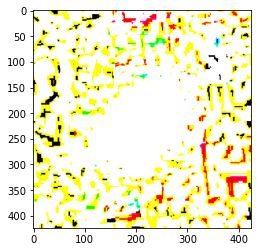

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_24148\3768173621.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3281.)
  torch_tensor_im = torch_tensor_im.T[:,106:106*3,106:106*3] #crop 424x424 -> 212x212
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 212, 212])
torch.Size([3, 106, 106])


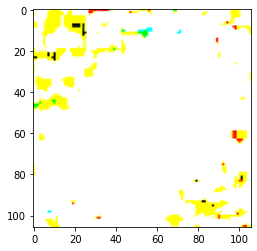

In [8]:
# Print an image before and after preprocessing

im = plt.imread(fetcher.train_path + '/' + fetcher.training_images_paths[100])

im = im.astype('float')
torch_tensor_im = torch.from_numpy(im)
transform = transforms.Resize(106)

plt.imshow(torch_tensor_im)
plt.show()
torch_tensor_im = torch_tensor_im.T[:,106:106*3,106:106*3] #crop 424x424 -> 212x212
print(torch_tensor_im.shape)
torch_tensor_im = transform(torch_tensor_im) #downsample
torch_tensor_im = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_tensor_im)
plt.imshow(torch_tensor_im.T)
print(torch_tensor_im.shape)

In [9]:
X_train= []
y_train= []

for f in fetcher.training_images_paths:
    X_train_pics = process_images([fetcher.train_path + '/' + fname for fname in [f]])
    id_ = fetcher.get_id(f)
    y_train_values = np.array(fetcher.find_label(id_))
    y_train_values = np.resize(y_train_values,(3))
    X_train.append(X_train_pics)
    y_train.append(y_train_values)

In [10]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)

In [11]:
type(X_train)

numpy.ndarray

In [12]:
print(X_train.shape)
print(y_train.shape)

(60067, 1, 3, 106, 106)
(60067, 3)


In [14]:
X_train = X_train.reshape(60067,106,106,3)

In [15]:
X_train.shape

(60067, 106, 106, 3)

In [16]:
def ConvBlock(layers, model, filters):
    """
    Create a layered Conv/Pooling block
    """
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))  # zero padding of size 1
        model.add(Convolution2D(filters, 3, 3, activation='relu'))  # 3x3 filter size 
    model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

def FCBlock(model):
    """
    Fully connected block with ReLU and dropout
    """
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
def VGG_16():
    """
    Implement VGG16 architecture
    """
    model = Sequential()
    model.add(Lambda(lambda x : x, input_shape=(106,106,3), output_shape=(106,106,3)))
    
    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    
    model.add(Dense(3, activation = 'sigmoid'))
    return model

# Compile 
optimizer = RMSprop(learning_rate=1e-4,)#, clipvalue=1)
model = VGG_16()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])

In [17]:
tf_history = model.fit(X_train, y_train,epochs=15,validation_split=0.15,batch_size=600,verbose=1)

Epoch 1/15
86/86 [==============================] - 1595s 18s/step - loss: 0.0934 - accuracy: 0.5858 - root_mean_squared_error: 0.3056 - val_loss: 0.0836 - val_accuracy: 0.5636 - val_root_mean_squared_error: 0.2892
Epoch 2/15
86/86 [==============================] - 1595s 19s/step - loss: 0.0828 - accuracy: 0.5878 - root_mean_squared_error: 0.2878 - val_loss: 0.0817 - val_accuracy: 0.6541 - val_root_mean_squared_error: 0.2859
Epoch 3/15
86/86 [==============================] - 1594s 19s/step - loss: 0.0798 - accuracy: 0.6424 - root_mean_squared_error: 0.2825 - val_loss: 0.0785 - val_accuracy: 0.6350 - val_root_mean_squared_error: 0.2802
Epoch 4/15
86/86 [==============================] - 1594s 19s/step - loss: 0.0777 - accuracy: 0.6585 - root_mean_squared_error: 0.2787 - val_loss: 0.0782 - val_accuracy: 0.6168 - val_root_mean_squared_error: 0.2797
Epoch 5/15
86/86 [==============================] - 1591s 19s/step - loss: 0.0767 - accuracy: 0.6635 - root_mean_squared_error: 0.2769 - val

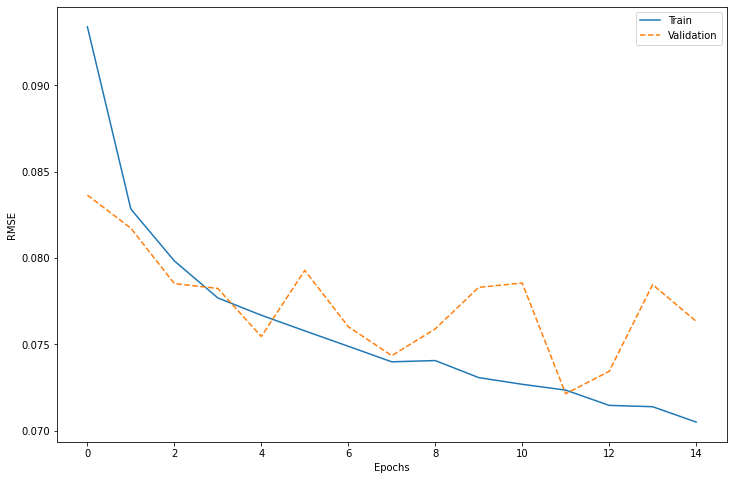

In [19]:
plt.figure(figsize=(12,8))
plt.plot(tf_history.epoch,tf_history.history['loss'],label='Train')
plt.plot(tf_history.epoch,tf_history.history['val_loss'],label='Validation',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [20]:
import pickle 

saving_model = 'finalised_model.sav'
pickle.dump(model, open(saving_model, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_10
......vars
.........0
.........1
...layers\conv2d_11
......vars
.........0
.........1
...layers\conv2d_12
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\conv2d_5
......vars
.........0
.........1
...layers\conv2d_6
......vars
.........0
.........1
...layers\conv2d_7
......vars
.........0
.........1
...layers\conv2d_8
......vars
.........0
.........1
...layers\conv2d_9
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\lambda


## Predicting

In [ ]:
# Load best model weights
#from keras.models import load_model
#model = load_model('tmp/weights.hdf5')

In [21]:
X_testing= []
y_testing= []

for f in fetcher.testing_images_paths:
    X_test_pics = process_images([fetcher.test_path + '/' + fname for fname in [f]])
    id_ = fetcher.get_id(f)
    y_test_values = np.array(fetcher.find_label(id_))
    y_test_values = np.resize(y_test_values,(3))
    X_testing.append(X_test_pics)
    y_testing.append(y_test_values)

In [22]:
X_testing = np.array(X_testing).astype(np.float32)
y_testing = np.array(y_testing).astype(np.float32)

In [23]:
print(y_testing.shape)
print(X_testing.shape)

(12013, 3)
(12013, 1, 3, 106, 106)


In [24]:
X_testing=X_testing.reshape(12013,106,106,3)

In [25]:
predictions = model.predict(X_testing)

376/376 [==============================] - 26s 65ms/step


In [26]:
from sklearn.metrics import mean_squared_error
print('RMSE = ', np.sqrt(mean_squared_error(y_testing, predictions)))

RMSE =  0.27459997


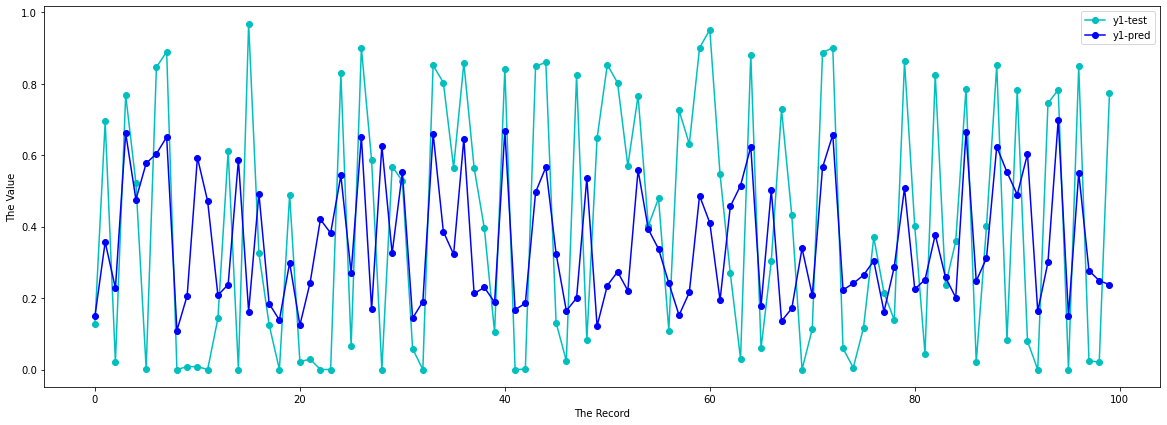

In [41]:
plt.figure(figsize=(20,7))


x_ax = range(len(X_testing[:100]))
plt.plot(x_ax, y_testing[:100,0], label="y1-test", color='c', marker='o')
plt.plot(x_ax, predictions[:100,0], label="y1-pred", color='b', marker='o')
#plt.plot(x_ax, y_testing[:100,1], label="y2-test", color='m')
#plt.plot(x_ax, predictions[:100,1], label="y2-pred", color='r')
#plt.plot(x_ax, y_testing[:100,2], label="y3-test", color='m')
#plt.plot(x_ax, predictions[:100,2], label="y3-pred", color='r')
plt.xlabel('The Record')
plt.ylabel('The Value')
plt.legend()
plt.show()

In [56]:
#files_=test_generator.filenames
#results=pd.DataFrame({"Predictions":predictions.tolist(),"True_values":y_testing.tolist()})
#results
#results.to_csv("results_80%.csv",index=False)

Predictions  \
0     [0.7584406733512878, 0.19941730797290802, 0.03...   
1     [0.370310515165329, 0.6068045496940613, 0.0248...   
2     [0.14197103679180145, 0.8470073938369751, 0.00...   
3     [0.2952916622161865, 0.6863579750061035, 0.016...   
4     [0.21545793116092682, 0.7701448202133179, 0.00...   
...                                                 ...   
9732  [0.27114489674568176, 0.7117834687232971, 0.01...   
9733  [0.1712183952331543, 0.816370964050293, 0.0012...   
9734  [0.6261817216873169, 0.34251174330711365, 0.03...   
9735  [0.13472551107406616, 0.8545970320701599, 0.00...   
9736  [0.1157846599817276, 0.8745192289352417, 0.000...   

                                            True_values  
0     [0.34299999475479126, 0.5389999747276306, 0.05...  
1      [0.5, 0.6140000224113464, 0.0010000000474974513]  
2       [0.023000000044703484, 0.9739999771118164, 0.0]  
3         [0.8460000157356262, 0.3779999911785126, 0.0]  
4     [0.024000000208616257, 0.9639999866485596, 0.0...  
...                                                 ...  
9732  [0.23999999463558197, 0.859000027179718, 0.028...  
9733  [0.10400000214576721, 0.9509999752044678, 0.02...  
9734       [0.6000000238418579, 0.210999995470047, 0.0]  
9735  [0.16500000655651093, 0.8420000076293945, 0.03...  
9736     [0.0, 0.9710000157356262, 0.03200000151991844]  

[9737 rows x 2 columns]

In [57]:
#results.to_csv("results_80%.csv",index=False)